In [ ]:
%%capture
from matplotlib import pyplot as plt
import numpy as np
import imageio
import cv2

%pylab inline

In [ ]:
def image_size(image):
    if image.ndim == 2:
        return image.shape
    else:
        return image.shape[:-1]


# Lab 2
In this assignment you will perform some simple geometric transformations on images and see an application of these transformations.

Instructions:

1. Proceed cell by cell. Each cell already has some code, but it is incomplete. 
2. You are required to fill in the missing details. The places where you are expected to supply code begin and end with `# <---` and `# --->` respectively.
3. Please read the comments carefully to understand what is being asked of you.
4. All the images are inside `images/` and have already been imported. 
5. Make sure that you always do Target-Source (T-S) mapping.

In [ ]:
# Load images
import base64
import io

image1_str = b'iVBORw0KGgoAAAANSUhEUgAAAgAAAAEoCAAAAAALBBbgAAAAB3RJTUUH5AYEAykTg53xrwAAIABJREFUeJw8vEmvZdmVHvZ9a+19zm1eE/GiyczIlplsTTJpVkNWiVVSqbMayDIkA4ZlwI3ggQ34H9iAJzIMTwwPDBjwyAPPbMOyBEuyDBdKXalcYhXJIpMsMpnMNjIio3/tvfecvdf6PLhRnt5338E7e+2119ftx7+TED3QrcGWuYvY3Tx+/aXy+L0//mTyfrELATSIBAlYSBAIOpEwQ3iZ1zdXy8ePClqjsVnGf3k9bZhzrb/zWSZs9V//9qdfWD56Yf698fT1WzcXJwWCPphrkSELBX9GP+y74scXu3oyd3ihDxnFWoBzbM4++PTdt/7aibHYtCtWLWYNjCTRZexXhpy8FshBLtu/tKXBXh7/0QerMmg57ab6Aq8s6/XHY1z/c0//4dW61kL0eQ5ljH2Ocr64VehjyCIVQkQ2JZUpSAkIgrJbGFMElN2X9vZ//t/tvFiJ3Hzrb93VePbDL/9g9+j7rY6DJYa3P/i09kyh1k7vqWwzSYaZVcf25PjGJz+8bOtXT0rbIXl1WJZqWPgTtnExt7mlDDw61DgW30bV+Tb7WUemaoZiuzhugUQWLdzSfJ5WyyUgseYk19F8wVVCAAevbIgurzLkthgFyLpWxfL00+H1m7ePp09+78NnU0TvEuBJCiQBQEkRkGhIGJVuKpri9N4WqyYTRGn3/revuLLLTz46etxKZP7xNz50LZ+iGD87jLIdrJf+wUs5G4xhbNU5+XFYXB5too0htzJlRVJpKLbK49j+4t1fKSUmVUem3LxHDK4asLLsNEf1JrJj/ldZbbdaL3/nvfVCB8sPldEevWbbOl+spuFXF9+9WJhRVDYgBz/cfLYcysGAkpOLkgxRkTXA0NAkGiTR0E0SJCBBz4vtL+WMRC+N47UnP71od9//J/d3wzguSoWyvfuN8mmmoDAqjL2WdLTlpDQ1nLyuH/18p1uvHtaLWDDazXRZdusN48BFWLE242CDVbOWywXmpa643jZngAQ9dggumlJ9au7VfFMWMkLRzVsVHBhiDh9qYGt5VW0iUVJFpgDLClc/v8jbX/zS8YMffvwoLjZzioBDCRNgIgWAIiWQgIQGM4Hzop83G+bOGolUgB/85Xj27iefPoZkspx+/qvO5rvp9sV4+vDks+PD4nGwvFqWNGME4gzdFKsJ24NVnxdZCsLpPidKl3ku7sxvLG+fXWeChSlIrVWYBRNCoVhMTDgj853LQ9se5viH76wHFN342j+Yo+yuDqYou9Xq7ZPfe+iFcIQRzQ+GxHitlwMjJfSiDCcUUsIhpGcSlEiDW0cCkAQgbXhj63WliVxevvEP/yfSKhbXKrBMY9Td5Udvnz4NVGbzgdmcGCfWJvXAevjc5fc/FV99ZTy8wCoiqxarabnaTevzQT1rxZQZteyeDXXji6EHytC2vsAsEpRM82CQPOi58zqRh8sMWtaMRem54SizLiNSk+Ys0jKzVpYSvRyWy0f3N4ev/dpx++S3H55tclKGSFIJuAnBJPC87IQJUJJpBDqG6tawUJ+RnZZZY7j7v3/69PKy94ALgt4fR52trsWn54r7d0aFd/XDhys3SjG5mdD65tpWtjl6slktosErRZqRDfKFvfXJ5+pmQR8UBtETHiwSwUwzV4YlnXP2Dy8X2dca7v9+qWx3tr7R0LsurOTMdueFd+5dDV6cCc2JcVGmbssYhw6QQoR5U1H2lGnKOuwEuGAwiSzeQgKogA/5xtMyrLdu3F3dvF/W7kSpLInijeH25MG3/umUpqR7BpXwsZVNN2F86eDuj841vnKn+rPLcoVaI5exOKrP2mYolbEdoW1BXCWeHi1cl9XUfZmTDQ0EIdVQAjuLPmAXpU9x8yYwa1F8thLNoXkQsrbUJMzy4uitcOvrsqTf/XC48c0XcPaj+xe7lvMMGA0EgpLDQqInLNNA64RcKQIG0CzQgVw2s2yFDLjEq+/tpotJXhjMpN3fXW+cXJfteHt+cc2nkJdrH2Uo01SL+fZwMzeZMazGtOoyQ+kcg/IMel0tl9tZv7hzp6bMW0OhYkA4TE51GybULiH6h09Hzt520x/GDZ3YvW9dfC+rM48On42Tbr3+s8ePUdwd4DT7esUcYss1uiCjmGbh8w5dEJeZOQuDkJQpyU5YABBSdMYLTzN2OSym5vXxegWyZIyJJIZtmvkni299dyeHaabIjrqY58Xc89qb9Sc/b3nt1XXOuQuoVu/eyxwrVCsN0XMYqNliR9v228tOo+Q2Tzb0bXYfp6zJnuY5F5xNA6PUIgzI7sLADYZWC9u0MinneTkwCttkunIW/yu+fumtb9588L2fvvPzx8+mXYNRgvYjHzRB6Q6AFs9HgEOCkwDcTOa0iCalqXgrCthuc74VzRnpBNW/eO39G9P6dMiqx+sbjwa4Yf3+kk5FjKshqIOd+dA8xma5munFUkoJVoqxiGNvT//e5nb1gh5yWsjkgKkZ8/nWY+Le2YKkdv7Bsxf/9nvr6/fLK1fnDqu/PH4wL659M+4/frIo1eFozcfV4MzO0SWALSDKFC0kYijobt0KCRAIgdovDQCamelvv/u+McoQdvRr/+dEK26iqYKGDi/Uoy/XR/IFUgEl3NwmeNz68uX3PhFffGudTPllWwwM2KjUtGO2CKiUrMwYmEb1wdPkBtBS7H0onlINEZycra7GjOFgvay2bVD1xbQ9ch8NmXXNeburg4yYIxLVIf+P1qu+bSf+090Te/2Fp90gI7l/S8EMkgbABQhG7lEAaQREM2SQlikg0JQmUY4wwA16Pkja7V//3deG+6v1efDJ+Pp2VQbF+KmcDaV4dFmMEXnQnBw3NnavgPj8gGfFLCcvzh6/v36xdM3gGN2qxHQP0qo3Zjg43H28KijYacub//HvrS8eD59erdjz4JXj97Z+8xvtw/OPFkMtBmjSsDoMzPOiqssYSSSCkT2YwmCITGYFAMkAQaTkIAwSTYf/3vfP1sOZfOaNr/8fpVYXjKq2/w0vivHe1+YzBhiAsg6CPPLmy/f+8IyHr7zsxsBh265lrdnAsU5XHi0MWZGBYpJlyvtcSgZjZvWmWmfaHIUuixooLFabjXa4UD+fw8ay3M3LuXFmFwv7nNVkMHKgFRSi3C8HCzx49JXF4/6X/t31P/tv05X6kx1AIGnhFtSffKR0ptyYlJCiKaSQZSLdI52w8D14gohUkuWjA81Hl5FDe1yftRP0WaonZ5FUjhGDaFNNhSf6QjnVnkCxJIlOarBd9zx89oWr373zRZA5AmSGjAkXpM6kUX7/6QHN8+pqSfzyb//wxYOnixtP2w3u7pz8xHA5bJ5u3nev1ZkdMsc5t/OQ2tcTlg0MKGBIBZBGDdaZBMjAvkNEUYSUcXv5bKEObaDDy1gDKIxSereks2B2T/zsl56dAmkI24MoW1/khz/b2PVXbw6bAPppX4mBlcFpJbJ1jyxhYLKsr5hlbrjI6wuFl5JxMM19NU0s5jHsDAU0WGNdZpur9abRhzhfLm1uzuBKZ+SCSRjhqHPPPFyX62cfPTu7LF87ov/pa/EXLv7nbPAATPtTFQAsAUs9h/4ETQCYErw77XlrSCL3uMRhpoSRSYFZ9AkO+nz4dHPjtC3Or8IKsNDhszbU6tEphzNK9mFTIwfFQiLZilEqZppZZlXeuPrS9//ZyZGlW8pSKPIGs4QAp7XlvXtDiZ7RP7hxdPn3D155drGoHD/LP/3Z/KNpcTHXJ/PH80EtlIS5N3qf6hohEQSoJCwV+5dMyACXLClPwBg0pmV6ZpLsfRg+/6MaC07l8tbjUkJ1KkWNlpAqm0m9fLb45e9edCoRhbIO43p7SXvxpWt1G80zhjq7E5FIzE9iDbJISFPiKGJjoCc2PDEac/YhJywwk3Brbp69jqkwxnY3olglxCtRCapZ1dTTiw5621WByTJef+kFf2v65JOYpy+effrkV9+c+zf+5XiV3LM7Qnv+7/uyU2ZJmkEAUgToMDX35z8nQbIYAafSyQRFGqN/s18u1/38Wt/sdkcGi6sHP7tbl2YM0c2SxTOxnN0qEsNkMshAI5VWqk9OYAib31hYWbBDbihVieLMWY6K42e/Oxzs5nGOn3zWWn11ezVqJGPz5HZ/J7W5eO3O9hfn62EwEsxZ07zYlbWQNFGwlEBlAlAgRXeYQEAglQV0UpJZGgK+Pdwt/9qHj+Voceff+n9/VpNygACd6SkfLd3Lw9XLD2SNZtUU5iVB1lu31ph7IHvxaUElzXNRP7x7fmjFlZIibcglMlgEz6lUoplXBEVQXorRHLJhsYCSbSoryurScrMry3lmguoIMxRbzLuWYcNqvPmlt26f+H/z5tM/mqfLN679+OLHN4/HT//B4cET0iCRSoIwJvYISPv23vc/QEl7Ei9AAmCUnEokJQOA/VfdFHd++QfXYzgb6tmjxhuXn/z4neXys+tDHdJo5jTT4RTtIMGiKxw0kGNNIhoFg4hQsZXGXxkGpwFWzKBMg8jeh2q+5CdXD3F0eNl++vHByv3GZvKF5Fe7xb2zGufTybp+9HA5jsUJqW1f/82f18V6L+tYGpPKzBbMYrnHeE4+l72SZjAmQNIzDCoRC/7gS9/8xa6X+Np/+OO/i0GgYPLniwQvlpY7Pn79+FmYu5FSIYlwO0Y2EVLYeDhtbDnQOd/9eDtpWenRAoAVmysnGKIZYvQO1Zy4UJiSBWDCzQaXDWXScmEOu7ngnLVEpmYf06cyXA7LiCm6spRy7fOH1xr8P/nF1bun8+XJN7+3ffb7z9753/qNo4fxvHCC7cmeW4IAUqbnMpBREmgyd8JMBG2PE5SljJGeeK6dgJIWf+b/+fpnPrA8vZjKZ+9/dnrxnRu3BwNlDrrS3Gzry5hjqJMNBUXM2Sm5MUAjCeO4ZllWphX2DqMJ3pKyobAOT47Wj95bLE5P3vVlWaw+A1Z1wuXV4EX2bPela+Oj+6uFDySRkTr/TV6OkignCEBCBhHmCnhxiAaTXNoPhf1mFwAkUDqWtvvJv/HKB7H6i3/x7/4vMKtIUazy7GKhW4C9GJ683U5lBd2ROZZZbkzEJJ8zzb1vuV5my81HnykWUxyyW8oYrllDPWzhAVPOWWAtrLCkJBpLpkZMnnCqw8bFwutBnVXcxL4Zl2k0bTQUpbpdG/rhrZhtebXx+s7Tg49GG//UH+4Cpz/dHR88eypAcKQZ91TwuRSshAQDISE1nFiaWKzQEjKDpRdQ/fjWAluDkQRohAL9r3z/Rt6vu35x/KS2trj+pTuHt26fnxloJjorrWxs6DGUYWc2pGCSsRSQSUrVMzEcrIflKLhFIww9C7s8VTksnpblxU+ffoKHq8vdG+sbjwwdtV1tliWBp+0Lt/3Zg3E1DHIqhG76OLUXfvfqLtMynLAC0GoBpecWgFLaAyHbEyGIiOQAe3Lvb0b/Gy/+D//yQHJ6r6nB9q3Dwq7MWoT+6O3Lq6QhUKp1Will1+UxowwFNPY12S8/OOsyxa6O6mFIpmR1VO/hEpS9Wm+2ULJkwsIt5FNzF5XdMsqisQbaudzo5mvNHHwXA6PUaKv1glOJ892zm2t/eHD6pR8OjN+693CGn5wsTj8NFMr2BxixL71UPAUBNCYE2uLaV7anAyDa89bpwjC6bHUDPScKhuReMzfqO4/PN+8+Hl+vn3vXjl798pfeWvrl0eOLUipqNYilZIMPcix2UUqzEGCDISapgBQqWApEIuqfkBJkKEdWLpbPau3f/6gP2/Ntq1deLk3s8zyv0oBn+PK1+cGTxWowb11SpmFkY8BklAocYMhNRsDGATTQkwmHCMGMku0VYQVIYSjJ4cP2N9++/9/fHWsr3smMIsPzw1JIs8JMTruvPO3BkFXLBqOlWsI029IJqHidHtydWzHQcrsuOzOBMAATCpqYxp5N9OouMJNl2RNDSVvkoiZlvqRZrWV3Oq89hxEDO81Bd7Y+5MHCOUfXAB4v/O3h2Vf/wHz3rXhv9j7F6ZOw3M892l5y39N+U3A/A0kwvKwOt4+nbl1MlNKryMzjm5XLOB8MV5a0/XHJhGe8+db34tOL48P10Yfb4zevL3txLS7nYagDWKvB0OhWdopVly1mQWa1xDQzixSoTAdTpnSiFUu5lygMQy11/bjW6fs/2a1PJptc4+WpcyzonSxzXuiLB9Pd04U7em/TlFuaj4XW0XPIYnQLIK0YPJ3aNyXZC8iA9u2wLylBaX9CFk/A3n3tk/9xZ4taXOiZGhGgBBoIeUFOVnlhX73fOgbr7KqWCksSZPFqAljPPz5DDGN6ocd2Ocohy0a30i0ijdGh3pdejL5n2bDRPMw91HpxhptbH6cdvJZh2MEyvVgydrN4eOuwFG6NZW1V8l/6JF69v6ntK6/+5CprbrII2BsBRpG2f22jEgYz0EC6G9vVWRe2JMGTO3PcPhjHW4va8t7u6oi2bQX5XE8iwDz6zj99we88unzw5uX99Ss7r2Wwun5qTkoDoMho2VezOOQ2Vg0FqUz1XpgoQQCwuVAlTEDxlNdMWgGLHz3Canrnnc36xaudhnHVvJQqKEtK09XqzpEePFlUzFNvOYdwMFYz2SBLr7BqMoAkmU7bLzAAIo3Ac6DIlIlGiHLusa4B+N7PBsDKbGp7yRi2J0WSDY7drKGEPbpz5x68Cx2DtZSssBnolSxF9fzubrksJ8aSJHa6PmRBB4MWnNLnXrKDQg4jJ7gJoJiYGpmRsMHkbrB1m6Fel6FgKunW5ottH2996fOb0BxeQqUH/d/85OarZ/dW7eg7f7RpZZHdlcY/4fow0uCkicTeEaVILyYkvVmMnqt6tL41VHHz9NGB5yb7wYHnpiYE534Nyf6Xvnvrzst//OPr1+OzeLMuD0tGPLwcjPTBiGQ7RORBczi3vpD1Xr0zDW5wwbyIZPYw0kWZFN0YrO7l6FGs8ns/v1i8sNt010FNgmltVpLT0+XnIx6er8c+98yGwGpcmZAsVk2saSais2YVALdSEgQ8IcgU2Bca4F4eRSaAlFuCjpOFYhy3XSZLgZ5W9qDCK9G7uUca7r22eqIwsbKnzEBHGOm0hW2f3ce1o8WylNFTBu3q2iCCVGImkxkeYrLU9AAt6RkqkWVAYFFkCKs+LjB3NlthBmUoFpxO53H5yldeWc+7aRZ7bycHV/B//+j6k+P3RvDP//hZx6/+Z5e/MJLPhe/nOICxJ/rIIpJMo5TmShuK5eGLQ2E7rRFP53ZYOO3a4pWCyyT3LWSgAf0vfLRaPn726BV/4aPtyYGrpznuL6wURkowuDdfqiSGhoEdcJdchBVjkeAOy5m1Js19gtIESAsfLzZr//E7F/ba2eVca5m2xeSta3bj/PT45dSzaRHR0jCnxoNFdRfMSUslISPolORyWt2rPZRZCinYfgCoIKXM6jTLPG5VgMDr3YlZmGmZKSTdlJYyd2TAXCie/dGX49TThp6gzAArHgPNPc4fng83jlxhg1uKsrzwNV2BAiVKlm0jTUxfYZFzsnandYCFgnsZ6An3YWibMJ/dq2XCjMjsSLz56q0bCnTLNsOGxfawbP/RS7s/C/Hx9nOf4eTXfmv8aHhyJTgEEfa8hHuKhDrbAMHYlTBEuV56G6aw+aNNfNkxztrcRjsfTk8jIJf2T0lZYPeLL/7E3tp87867v76+fLyeD0Yf7frH/dVsFQ5JGSORNqEd2DyVXTWh+oicSZIOMjNrSkrW5iDNGgYrHC/mpf/8x+d6deMb4aif1+3CdmXOodu2vXBc++llaegoSamuD4gIGEGmSEXx3mTWhKyQMbIGLYmstvW9GiLADJF0E8HZvvPiP9qlJ3JNt8mkYhEMBw0ZLJPT1GQmwKCwYX7n69uHQGekqbuTHDIGK3r6oBxcX0TTKNNw/XyrGPqj5Ys96xxKui8fxmLqHOeyyMWkoj4NGVpOM+sFTSg+9wQLdldpHknLoau3IZLmmod5W7BdszzNaMTZwXHzX9nw8Vs/U62/ce3q+Nb87ncf3b7xwDz/xO2CCEB8zgqMFITGxVDhBze7b06fXGPu5jhYqm0jX5p5hjgyTrZnT0QSIc0vfPu333D86M7m1uP7/sbhqrpNw+N5GArdIDhNRNFcYnHecpxtsRrdPAuGkm00a0mRdEV6cO5JE81GLLbT0t//oyfxhnbaliFbxCqRMRh4dXnzBvpjjDGzm7eww4PRjZJnmFtiqK14psBGAuY1W5GYMqYJLoiigaSU3M81Lf/6S7vX/thE8MZxn2iqTgmFckJMgSRjTxqsw2B2ml9+EOhIuMzMACyil82zp9tbh8VRqg2kFe8JqLfKsB4OHpykY/Y9Jc/N5a4OGfQwR3I5tYCZ4IMZp01zd7lRhhoahDQEAkdviKMOF6fn3bnDyegvlYtvf/xZlM0LL/7jD3908E/eb9Uf781gaS+NwEDsjUBYKgXq4OX1YhierDM3m/lgsN3UyquDPc64Pk/bzOUS26RAWcos4bLFn33nOPIjvvnB8Xv1CwfWo3M171bmGuRmcEsjvNdpdZX3f/HGcizqGqpnRqchkoaWhQXZEGmCgbawut2M5dF3n8yvLT9ZPYoX/AKjxjrNoLWT0+VidXXfS58yojDLjWvVkOEQEiaSWbJEqy4ESRejyKQskPd98gdgpJkizUETK/7qzQ8v37ugQL326iMVllJqECItahSJpIJiCRSXRQJ2fvD5e/l8b5BCOr3n+WZ3cosVNpDFEmneFHC/OrBIaTj0OHi6KwLJznn2iCrzEgRlTGgZUAypmi0Wo9ewwUl4N/aYWuQ2XeN1n+Z13N8hWpvLNddu+7XFe/CN/+V3zqab48X18nQLCUaRJEiz55qgmICv1wNZVy2fnF1eGzDvVF5gPVNc286XvV0r2k2ya+gbg5TjckqQGbj886c7O3722S/d3Zzn7Qyy1mpP6sLhcKNo1pXjthM6Xf+Ll49QxkpEi4Sjte5IaTUsZ1MiYTBZLmzIq0VcfPfB7uXj9zDH4Kcw986W8n51+7gvt5/V6h6t07A8XO99XNuXJy0BeHaaU4LRQm4E6QpP7hciQcH3SUiYaRiuf/Xo/T96dlAno3a3EOY061HkJWlpEJ22N1VVxgGtwwdbPHrx6EEQJN1BppmrKeI1upfB4CVV6EPOQuSWh90wLqbd/Hg3Jz2RFo1p0UfPKJ6wEtUsU5tcNpXsabnMK7dU9Cbmds52PrVF5a113Tzti2E9X3bN+aLfGm/M3/pXw2u//u07H96b6p33/OJib37sE2B7ZATSBcIzVi/7mOfbA/OLXV+tcroiXlU+UZxQm8R6YLsEXxuGz2g3Tr78t/6D9+4WIpH57amdXV989+s73bx3cHQ0DIUTHxdRxczVLVdUjjsTePrpJl+pHj2UATmRRmVmGZdzZ4EzzJv6QWN5svDTP7y3fen2e521+MWfuq/uRc1U7cZ1i+mZVRCmjZXD5QHIpBE0txTT0ojIQmdz28sRSLiFKKdsvx1AYM/6CNPw4uf6YflwOVTM4HT51d6MhFkWZKVkKZiee8jVXC2tDsG6+PjLfAaCDuXePzV5nhyU9CFl1QKLwsLISOKiLDmMj3eM2bHMrCos2tsgo2FvT7cc6tyYHlGUmTM59d7T6mwleiwWfZ6Xg53HMSYNq9evP9vO7datK3+lHJ/c/tpf/M3Xrn7/4mlrb33Q+p64CQaQRreEGFS5fXQwxO4o89ku14toF1ZfHsZ7bAe7tu1xOPi2wW7XPPV2uN21Nv+n/85vfeH63R+6Jw18+fMPz9rJv7h9jqvHq68WzR159DBZzPa+GelTH4LCYmNfuV0IiQh6FgMdSWIahW5urYM95mH90cmmjBd/+PHmxmvvXY3FakzXngWi2o5b/8Jitz2bCzqpnmV1fRyG/YNQjEDpEtyVEkuXw2T73IdlmugwmlHP7QDupR0D7Fqxx19dfFrl21Z8k189785MElJkqZGkJSGDGVx9zmJZD2vmg69d7ASYzKVqglXZdaMPYimluxtA53YukC7Hyl5UuMHx7EwD5TZ0ZmC0dKfoO7pCpUM10bZkBLO6FYtIstTNReE842wcx+Wt41qOHj6uN1db/3Pf/rW3q9/98TufPDq9jP65eyIExnNbPwmkRV16feHFMez0oh3UnLaq14Sn1M1puuz9WsV2l4vD2c7QXrZ8zLxmuWl47dsj++MfdJeIuvrOjw8evfjxjfXTs9DLVybn9sljrDmYCuDFmJurz6yPeTiV66t0wCA3sUQ8tyPDrDcXTAZOi5s/eyV8sfuDj5ofPHnK9jLPgx8va0c0bcdXo/XHW4TvujGwWt/aCzck4aWlohs4ZjIM6GWIRpGW8E6PPRu2vfVFOGEJkibiKpbT5dubhwY2qjw7+OITsMNImMoIwYoSpIj0jBalWFlbQd9efOuTXkoaaUZnZ1HEyo3dlmhJytAXOHNmosdiaFwWleVcUw4AyM40TiNUPemG2HpJowrmftk9WdMph1iH0ttm13Kaa5muvnD7Vpn98cUHT6+v4pb/V+WzH//gjx/szh8/fBbIl3ReLOkEzXzv1dHqK4ujtntC5/lOi1XmeZZXy/DI5wPltuVy1XWV5dWxPIpczrnp82KteaPhlxfI03euTLS09hfuHpz1q9O331lxd+3a9PT9nz364OKo0izIWtkR0/Thg99/dblqZTnSaQUydloCZkFiKE5RqIyMWfdfGmjzdz/e1vHqosfw0oMvXsbYUkAe2RuYN/eaoD5JFeNyjBQHSkEwn4NLpimoZDN0M4FBCZkkLH0/+40p7F1hK2GKmP2lQ37u7lUxbp168PpLn6Ca2f7vE1Dq/jINvDBD46KQHBEav97e62AxmFxGksbN4GFupj64DPNQNuQMqfYYBWtjJdOhUBoKexJIr5ZmJkTumERk69tWTCZ3d5JeuWubTXLOEeL58evjZvOLH/3gmR0dPnnpyG/yAAAgAElEQVTL+YOfffro4uHTZ1ed5v1gfOLmJI1KY+Do2vLwYBiyP3s8LVeKDfzFRX065eHVdCUdj5g2JW6bnfd+Mud5xGqV0wTeSFyh/MYN9iffO/ckAX7nQX2WeO9LH1Vt7P6Pfvo+fuOgc1EWaSNdPbfRd6P+OT63CJZRxX1/Fnua0shiZh5pgClAUa/GXPXdj6a6zFM5x8vgZa9ozL575bi1y0dNaeoazMrREQyAk3vg1xsoDyutZ8Ii48pqG9lMaqRBztLFvQqYhr0aCpkSiH79DZ9f+aSlv3LWPe5/dTjzEpFZ9wDQIZjJUKj0oRJWGOjXf+Pu77qSLExnJAG3Ppz2AxNhRa3XGX6ZlRaEYdIh5M1TrhbqhbQSIdTsQ6NVbzW8ck4tNcm9kF5LKQUshu0mmyeqhyX5+JWDi9//6ZM5zJ99uPD1xWabKcrpljVe/agQICxZfTh64Xb6xcPHwyr7BFzrdp7x0pTngcNRbUY9ki4t3vR63vp1xa41P0leaX51vXrW8OuPfud//XtPkGRS+fqNTXnx7A/eerJaX24/3eV48saNrx49SdJrsd0Ep2F88W770lCbr3q1NICy0pgN42Cp2PNSZgYKj9pM/fHPtlja2WS1TD4+C7ZCTfMri9auTjuVJaMMwzgeDLIIiFCRoKDSOVjvgKCmDteyp2UAVBpomTIYBVUg00SKkBk4bF9a33vx1kerv/7N7+2Mm6e/OZ2XyMHTSRsNmAuSKBbpe9GvOvTam//8JyMq97esUmljbeHnT28P9NFYOhFuPa1xGQFQsy/Ua7raTuDYDIAcxoCNHjAOixqNW1p2M4Q4qoA2z8VaQJYgpQzT1dWN8x/sOto0bbXz62nFaDAzd7J97mODAuF2++jo4Npmsrw643DQdSZ7fRhOe6wSu85hqbysWO+0Sx3s8nJGOZS2jBc4nnUcx+6yjx//s3/18y3dIIV07U/94IXLR3ePLtfHj3lw4623v35dBZ/GMAwwyNzXCju6cXNxULsNHSY2SaWFmBWKKK4Es4YSRWNJfPTuvfNYl6uMUuYwLlvNFkf2+fX24ul9Zw9Un21V1ytaRv7/6SY1kOnOTKSkzjoN60jPDJGQgUwgzYsprfSAzPa4nSVGXt1/IS9e9c+98HfPlWan7VsPJpSRMi9DGbJbQaRXBs3MbDDQv7b4xw8OSzUEADOItOx9d3n8cpaxpNLJSI2Ym1nJbmBMtbpEpc1L39vxICwMOVgKntHlBWYhJqYpEqa5J6PtEMXAoQvNR0Vc3bsQpwbN3PhLrHuRhyCh9sbDwLBcrW+eHHQ8/cUTO0pcJl5wnPV2bWqbKVcL9o3VmzPOvZ1vNvQ4WMS0pZ80XCXeGOqjrmVhC11uL72aMWUG4Lc+evKjz8JqlEu+8dar18eQxROMbglUmBaUL4eTRR1njWgCOhOJArD4Xo1N1MgUjXAr8w9+sevrxVU6ewDWWdKmy5c+h83Vo7NhjBZDwlZ1NbrQAlb2sSUKe/FMkRlE8+Ei+7LsQiHqeQytk056yHwPQ80IsdYgZ9fulb77/Gd//3RkJvjZ8u0HJPd8kCzhnh2DRFot5pVY/cr939mtx33cUlnMTWBOrc1fZAGEHA0Imec8G0pGEPC5lrSUWDRxsHBrpQbEsCq3im5kzmQWGGK3c2t9nml9h9TSaYLIkax6OBtyO+16w+CvmgNuJETS2km9uPHSYuCTu20t7WTH8ovsLw28nPPEY9qpXJ/tjKHtpnN9881f+uv/9k+mZc9zxJvD+ExtGbvdxHqcvWXve+lyHyjrf/Xe9GD9lfffevLipr167ewApfhJnC0GAvRU8TqVpZVqw2WvlCVBh5FldCkhizR1dIAQYyorvNuWZdquurW+aBnh2ly9fO2ybT+6GAoyUVEPDlbFILeWZqa0kBIFRAIJSr6czln6DgykoAQIyVgIC8G6wRAESHeyiJCmG3e2l68/2bFyTuDuG6/dK7NY4W4NJbKhgMoyFBQyXvny778TVpfqoLBPG4LaYv74zWu9FGbU0rIRCmQYszCl4K6vPNlYTVMtTOyBEASFObKUHIfLTYl5ZASiwXrnsJ3hdiVV9ZpBWNNwzjE30zRPLX3wl/aKn0BJunaCxcmqJTcPTTe6LjNfXi0vp1hFn3ssDtC2HbcXPEueTc3K+F/8jV//0uH33rvBetZxR/NFi3LI2OZ8IlzIZLY3khJkfC199ZL97JtzGZ8evrwYls6pPE634jChDIZeBoZjdZHj2DSQu2LIQiDh2AdzECGZWRexuHV2f+xUubZFNCd9vrk4OtH55cdXxzS32HG9Xg5p7GlIlZSzKVvlPrLSScKXsbn10hWlNTsVSWTukzA0dFJGdoGpYgL2ec3A5eH11j//0ezsYex3v7F6CK+F6GAzTMTAQCnCUQv++ur/era8zAPfXyuljKEyX9nFB7ffem7DuyG9aTBKhurGObow20rdTORQI5lOgDYnEL4QqsmiF0wzTEmI3sCM2cfLbsUwoJcoh5c1hwP11rKHL8eF35EMAQJWli/eVHt49+7meudWcZv1ssUx56ttXx5Fv+j1xsztnHdcV9u6sBKR//rnYKc//dkb6/XDblWtb5MnydPeX1mvzlBgz+/TGGH9xi9/8GKLn+YbGzxpbxVLaR4ezNVpGGDVtaWVuiFqVF/2YtDyzpW14lDKHElExD4nx95XR+Qrn5wWW54NbEKUbA8P/rV4dtaeaGl0zbOv14M99zRJRSIjMyU+nygmWd1evPJrfrVZdC00RxJkwmumQZ3pRHbGPjssi8xM0DSdvTCeHr708ZwlgrZ79OeuTr2oJ8Axps9vRO8oRTHsbv+lT/7v4fB0t1pk0JJMmXfbTUt8UN+GWUPCzKQIAUimXGbzDi6bNVQHySKasQugKR1UcRM8zGtvgEgVU8Sgloocrh3PWRCtYnl7q6jrmEkbfBwXC39ZgpnV5bWTRX326AA4Uxwzdy1uXSuXG9bl3Deu6+hPLT93sHjUYuy9T/QKRVl9Yyh6/AdjbDcT60HyCvMtlVPEtWU/a+X5KW7sdNriN39488His3e+0erp1Rcfhox1tXuyqMXL/ratUb6cvVQpxlx4Mo7rrnqkZg7WJ8u+/xcVtGA9rky/+fNOrB4Xb2bYPlp/fdw+Pb3KatHVtVgvB9CqpRIWVJPURQECEkB4bOf+xtd6IHa8Ksu+v8ILFksyUkYQIYMhDdz3mHkrbpvtjePN7cNPTKW1wqcXf/7BzqPLwPU0EaRc9MzpG1/7nT84OTy/XC61vzmR/P9oepNYy7LsPG81e+9zzu3ffV28iBcRGZFNZFZlsrIqi0WWko1IkaZIk7RBW6IEDWzNBMGAJoYBGZ54YMAjA7QnBuyRYMOgBqaoloIk0FWmoRJZHYuVVVmVWRl99/p772n33mstD25weMf3nI191v9/32IBuOh24Im/vUyOBhJNnp1pNtXABl4UsRdn6rT3lZEBKJtzURDcK0rR2GWgYIjmnMsZCZFU2KIQKoZRES1kIRNNPY6JBgAqC+ddjnw9+91xUeyNuqurqzovlRq1+awaulxhmxtwywQb0CW7jcb5MAxRyplpA0hsOhz/lSrr5mtFpdICLBWvLB0si8torsyakMyMyJBV2Cj+0pNZDPitL6bidHNzaUXBTvVyhkyWkYxcYSmUiZzDSB4VPfjm+hlmBQYCUxMxU1VEE/UzQOa+8p/+vDQXxrkc1rBztzw7f5EwmaSYKBQjZwwMhmLoMpVJBZAYTNCEUMVxN0zev54vrsZl12DOhqZE2zaY2haTBTA0QiOlLRRBAOjB4EpvjjZv+CeoWonhM/eFp4MaB8jlavTe5BxyVWTG8S+Ef/F0359ejgKyARoCqqmu6sN0fouPnM/ZEOX263eaNCCRhwQIiMzgQRFMUigQgbwSAjolAkMGVRAhZgvae68Cqt6IwFLKSFu+CIueyKKHVVcAqgcKji3lrncQynHmyytFNPIxeyoiWRg8Urs0R9okcH4YZi6OB1xPjYHrQ/XKkBCMn15++oOPH9BqLxfiexpB2XDNEoxqgO1sMiMSqoKqba7GqYRQnlwTS2eHk5gdpNJlTyRIxKjkshgiqjfDzGBm8eTmUxYEr2CGQhhtm+MWS7FYotc7H95cPZmtzeXTyRfd4/X6lLw5ilmLSeUosbjtMEd6ks61HoEQFRQAmFm64foX4FJScw0PO6EmlBm2DwAIgiIikjBnM0N1ZgbKaABsCEAPr//U8Pjd84/L4+JHV+T+n50PviGMyu7SfzB64BSj583dn/3J123qn6U5MSQSAiD1OSWpavhb95OjqFAo/+JXDlP+TgAdsFNE5wVyyd5iBspXvogBBzYJVe8jEhpbUozkBufNVSxYsPWxkEyFAnIsgrToGAHMyiqb40IYPGKWGHNCvjfp0Wmbt/hDnh+Uce20SLkGWSh2yY5Go6bTInapZT8T3Zhc42KjAYzF9Edf+979lclhxDbZfqWbiLxQqTHvCdaE+sotkxwbpuPXT2vuH+r75/bMHXaSCXDnShgJnGPOSj5akSFLEbXaRrXY7CdgMNQcRQGzqZ7EwOVslDOhkXZ38ku/SEU6vfeV4sHF1aYoVFXUxtNRpcIsyKqoJprUlDwiCKkBAlCZVvD5e+uLTVulPO8mVxRxTK8ECOSUiWA7tLFXaBSgEigikmMipRQOV/29szen9zcRWB6+v7MicGBO48MBWXLWz3/wtT914E5lQoSmikimGGtdr9ze3zv4g2uq5DzMf+ev7Plq+qQzsaQZQkBjEy0sGyIkLJxTBXQeJWEGJvNmuSBkh1RYBCcAmpSUQHIgHGNSoiBmeXH41qgOJCX7A0uSNBkj7191kwKG3hGAAXDRSp10V2VtsovUZj/1Q73GMDPdmO1H12S9NaV+QNQEkldNBwrD9dl83QL6IUaJ1yLVKe/s+CYGAAQTA3SMKvOf/6bM4PTpl8/kFI+kDJ7YNw2RB3AAiuxyLCWiTDsrXCZQQ40HKzNQEQNVEIsXX897OC2yI8mY+gjHLzOGdOe1m0+/d6pcjJ0OIjhdjiyhMQOCGmQwYxULYCYoTIzmbWhmX7jWveyEoRoaX+AVqzEqIqM5MiBE+sv/34BRAc220S8GIAjd88XuWfFW96AmTYTDo6/IxmmiwncuC8Xkf3n3n77wQ+p9yWT4qmKdh4HOny+/+g/2/idfGTLKm7/7VsWqC3iUVXthCmAIksChKipb1DkpKyBZcoBGgQAVaURBgMS4VCKDZKCCJARUqpjHBr1Vt+bjvToyEuTdKzAzdc741gA0MmgdAbokeZmwVlkw1RF2D8vO5m2RrAFdGqxteK0q2j47afJABmJomojVdIJ1tyK/MKkhHRi1knfm1m5o23xEAFMjT3/1x77g7s8/l+vc3N4r0CkIno/IvaIxOAsHThUXmc11krP33BflBkVVtklcTt2ntr+YEiFGU8ndZucYqzTI+Q8fR1dUVUhRU7m3qwrZUybWJGqURc0QxUBM1TNAgavh6M1R9aIhh0rTQFhKG5KvVNgcoDGKAQK6jAYEjk22YJg5dmiAeUjDpphfVP6HiSlnoM3lV5shB6DCDx1Cd/23Hv7bAQfjqmRG2p4koK2Mrh7v/t2/++Af9teyd5m/8tvXAqoh7G/uZzNzHshEFJwjyBmNDNQzKpCwc04NHaIij0ZN8l4UCX1hIpiFNKuYkQmRTzwaHU99YeX0pBFDugpegBh8ya+3iLdG/hJQzZLlBVkrMh27uIEK6/oq2Q6kHvRQXd3Zwse6RTcH7QiBsveICIoA0wEbgiXwJg+H14pmjc4n6QswBLcFh9Vc/IXvf3wwuvqL148f53a5PCMUpp37VWC3RTEBLeUKgmJKVrRG5JCwP1r1sEW4DTUNQz+6vQxEA0GEgVW7af/PfnR1UuciVKX3HCOExQizMjGpGKiAqpkaE4iAGbIZZKrh82/46qIDCwApHXQBxl1ic6SougWDyWDrBUMiMgU0NHBIToGcKBo0docfHs8fAmFSoDP64kkCcxRjov69n/v6t9A688RlAEACVcT+Moyac/ff/uY/+x/SPYeA0y9+eBQMgND88kUdDRkFIyI5BjPOimOFuvBIImTkICuiX2QJXEdwQcxXDESggGAKGS1lg4BZpovZ3AKnTWWXSUvHo0lKDBQK/nwDUHWpNRLJhDJx1g22WEraKM9MG4EJaJPl+iw0rRZlzK3ZvsBaAZ1lBc+CArirWMOw63zs1fs6XpEuAeoAYkRmW7DQ2a3jb3z5dOej8c1HLHTcFBBPX9yHMfgRAyMEX54+vdxNMfvcY9UTkyd1gx5emW0xMBNRTeu3FwEkGqkhuywr+MkzdqH0wTlyhBTKMYuKEigJODFTgIyMsiUcnRngup188ZYrXTsp1Jw4Se7qqAkbkQEDkjpUJJAtG2MIQAYExqivTrZXvxLQQtq302NQEkV6cvTacyMwS9n/6s4/ve9i4sJ7Tw7FyEw1vaDdq3b213/9f/l9fW8MTHev/9n8PVUCA7Dx9EGXSzMFUkS2lBAtZ+MkqfSKpECSzAhBJEvugbKFksiBgZJBUuBsJOZg4sej+cRr9FVNcX+9ogoBFr2yL5n4i3W0EdsQyUCJ8vRwLBdkobHG8r7BJue9SdkP4KDJHfMiU21ygP5KFQFB0djYMO4rdNovD6xfO1mKtpyWAJmSkQGjGKJTgOmv/qOfaw+eP/n8ZyNpbnfrJ48envWLJSFpUYwrAv/ss3xEg/NFx6NsboupNzvYEw6CpIRdiE/G9xyZimpJpEwGcvQiFiWFwrMDUvGlA0AxMgEyAUVDEURTRDBvLODb4fYH08tm0Bu/u74YjBOCMV5rbp9gS4UjTYBoGU2JMAOSiaEpqpEgg25HMYjCUheHafP5y3MEyIT68N35eXSc+8Nfe/yvO5ezcx4LzjwSSABZLjb7K/878Wf/1z/b3Nq3nC7qU3h4e397YSbd5ftRNFsgIUaTDGqWO2bstAASpCxmHlV6c8IgaKnwyuiAPaiamIAiEGiafIFHFRk49X6YLF8iBC9dgZkgM9/polYVpo4BXBYtJ5u+NVki1VmX4OsBZ/Pc1YILsTXIYcS1wPX5eFU7YGbKDogBdDkt0lq0aK1zuqtcW55OnTZICrCdwaGps1/7f/eplm9/+alN1iv3fJ1dgL0pTsop6NDGRP0JHYxgzKHTwhIDUyTT5vg8phwcgrRuWI2w2lUdhNGHXomAXHHtPriSHRG5y94X2bbjP9Mt02+kyqwKDsShaugbvvd2nNtLnf3N16/9uBvMGWi5CCdh/wxiMDVFFGVCZiNQQhMwNfhLaQbjXxKjTCeTa1f49uOaWRPi8OhnrAHNn/vy176FMKD36IIYZ1lmjVnkpMDbf//8Ox8930zuseb4LPI03n9vbGgGgLx78tDMQiHIiASYBa1DLU2zjg1BXaKQSZKQC69aq4xEjpAQFC36V4oPk/amQdyBcTf2BAU0CSXDUY5ganxPBwgjk4a3APiwTNSLzhHbCDvXinSF3nd2hbKr1pnsFpOutxLq3HvzSAAcGBRzmA6pyXyQsUt5TNz33egGDisiRDJAUgPDsv/VTy5sevHx9ViPc/sWnTn0k9cOQHPXZjBTxke6nINQWKfgFRA1J4NYzE/ieeVRo9CzMClfzsouE3MSEzVEx4v5p4EdAAG83EwYGMEcAQABmoEggFMANXAG7If19P2bm9Mz8FnmR/efX2lGhtLaR8XL3dlZSJm9iJpziKAKSCSGBkDAREjbW6sZEpAzyOl4N80P7g9WFZ1he/nhamU/P/3nzzkNLjB6r4hIWmjUVJ43y1/8r/T3kl0O703BchP3LlU+lS8wgCKaFXsPG+cCAqBjJshKxmjJ2CIWYKxsOCrFFAKrORNn6slDACIUM8lbmS1C7sfXaukdh5KcDfN1B1yAjbMqKt/THqnKOUIJAmq2AGgyTEdeUsFuM9QGB6KNyb5yHmyylLYz3I02ZMaogjhajqFJNkswpLwD0A9x53CkF0CzOvdOUQ0AAFNmM/f29HsHf7H76eTGZbukF0W1e7R/AF2X2ACRCYmeyWQ/GboesZAAmgDQbHW985RGlpN/wFUM9nQ/YUGgwpYyF+R0Pz9UR6TV/uk5lciAzsyIiSJgBtyqO4wZcLm09dGHQfuhSyO9eoZ/fFYlQCp5VXtXPr4ZasvjAhOGVzEsALFlQCBgRCBTQAQ1dQKAaDak/dFHt5efFWNrtJo9dj9rX3n4b6Jl9Z45sCGSUh7OPRTNw+P/8m9//7/DW83Lt262SVAqlKG9dzK+C1syH+ejT4VUVBEZIJuYL0kMAG3wW7FGGPsQxTKQbOXFzrEjr54U1QQY8yhJ5qE/KIkIq2Qd0ng0OELIZdtjFfkdyJ5W7YYxZjQzWTiIfRpfJ2limiVamywZ2h7298f9JZJrtXF5V7EZkAOx5MmYaE26NKxznhd+6BDnQ7dS2DfsgpISqRkQkxkvvvr77/+A9fxmY3bn4HB3VDCBErGwQw9k4TQVNxKhA+NqUFBg0ygp3zn1NZD4p0PW5K/4fNcxokouitYzZ7D9yx9jaSPd4adGpQLaNjYwRCA0QwMiRJJFJenal2zw0PkUChqerfdzrVhiPShAsKd3YQXgM9HWyEfIDFkCmCGCgFMAIAYDSgSIpuwkqa/fWixftH7gin989M7Xv7OADYZAFEzBgFWkHgqG+5P//sN/8j/6N1l2jjV1lsu7Nux9eD08Pdo12NonDuIjEUQ1NcJsgIS81dPkVJVM4kbOZd+ZGjIRiZKxR3SsxAhgikkGRePcSpVH3VgzMUoMQ1uSZLNeseS9Njrdff+3rl+224G3vx7sErXcpMuo+4qNyNwXuSEq1mljsKdQU14qdEMaHY1p7fJcYW26gzJ0Oj+e5CtNOwNcEc4JOmEBAPYMbIJoxV/7wy+cXNzsrx3uXe0fDGkriDEkRwQk5ouXPV5L7BzWVjZAxjllOxuv97l23ykPH5wVxWSju1rDPiIqRP/Bg/MxSiY+ejCMjullM38+lDhW2Xo/wUCNwV4x/g67Ia6b4sbUvSBBF9mViBMarBjWPUF0GvqXb9VDF0tQ2sqSEVBsW01VAaIAArDNkwHBDB3ByfL1TX3v0X0fNgOF/rPPzvbzisYeGAGM0cyk2UxHdvbkH37p9/4JvRfYTYN06OH2e3545wW8WT54rXylofEHp8/Iu4EHYUfgPCp77BUBUx6Nk3EFxlGiGTkvhApKpbHzDM4AJBmKORTg1IL3wNyWSljLfh81DZ1ZlTLPle79/b/xH3155xu1ghGoLgdZo+0ab8R2iGKHk+sYa9O5Qg2ya9gPMj0YpwvlHcO12hy4HWS+HMGJuuIyXVFeEHUwlCOW8wJefTwbqWfNv/KR3jnLu7pXbPAGATK5qiQQZGQHknFT24E3M2ylVIKUBQRTP75894ff+MbLiqtVmadl3FzriwrBEO5/6/7948iMWB09gsnabVLbHHJGJGVCMFNDgm3XWTHkxphdN9x0+VQiCwSlyaSecNMqiZG6TP3FO23flYUKEAIhQCbeAlJIpuYwKxohEBgYOoCUhh6qlRydh7iOYjmEZXsZxsCO0RgdoqR8DnvW/uSrv/h73758fd/1A6iR5ckb1LuXi4NF0bfH2+6pUTn/SesHBXSsAowKCYiyIrhozOChsNgJB9aAJt5HAxsRuEIZTAFMCQEEOUd/PA5dzRMNSnK6MsQ46LRPwsecjv6LGYn96ar3RWlZdqI2SXcQ+pxn+5VdAlcbqTUfGnVJ5iOvjfFsEy9RDgxaSFMHQyfljT5eoi2YGo1zB7FO1c0C1+ZYDDEjKkIm/KD/5L2n890L3jOZmZSaq1EBSR0CUxL1XVfMSjH0nU1MDRIAWnXu7OXlH8Lq4mbhzydDOxSTs9NdIiX7gz95bV5lLMRsQc9no8KdpGb2+gvHDpAlb/tIDEBoyVX9hqdo5qPu4mowcZqxy9lD6i2hKUVnCE3/5qoTB0gGRK+g2EKAlM0AFYDAEA0IiAE1O6N0niefvlZ+dtGiJbfjhmZSKTpCJiAzSbq+uFbKafflP35yOn+XrxIqmAl2NTx+fsXhcl5dhb2tYU1xgWc01lQ4UyIUMAjMWQzN97lCmogG76aQAZnUAFGECgrklI0NBrVXkgdT9pJ1VHg7u2zP4oAuedbEwkem9U8dCoSPnvQMgyTYYexbmo8gD2VVtsMa82HGlercaezy7g2jFeQZpDrlOeMQZXJcyTkPs0460z2AZkjjawVdEM0vY4+FiCFUEjMzmbv2/h+97i/foid0Y+UrSNFPR/5SyBMEP6h6OvfFNGoe9+ZALRGydRK6k//j5/NlbOOyDzHemFyxaza7hmKPcfHh7qogFtBFjBXxJbZpNqznAJwzsTIiAxCIEnZ94PNmCizno2nesBAoicb+0oohmRmaBkFc5Xur2M1ICMErEyiBARJlQgMmZNj2MYgATQqnSM2oe/n4e6sugNrEJRgHImeOlBkk9YZPRgdQP58O6bT7gE+VcjYE161O1jHIyeVlIvDz4lXOz0dq11NHYMFjIgDvQTCrJbWIk0IAxVw2zeQME3hRoxLY0bYv1CupAYAgSjfvO9gZFY/P4kXXJ+jMQzJAPhZI791hx/efrCwRiIzKlDuojgtbuzwZrDXdBWtjmh+W/QWmYjPUmmfo2kTjmc9rofE6N9AfIl1JnpSWW6CbQ77AtCAaAqZidP0X3sUzRoIBy1/+P78I/hz3frKLiUMxK3B1uebgyaIoEoXneTxPiGUtEkLKllGjzV/8m675jZ+8/npzetA53riUXB7qPcs62rXJh/XATElw+WLIl5NbT1OflzVrAiJjVXSoPMjEDejbdRqcTwFOrlurXpGgKteDDdOsYmCsjILYwptng43N1AkgiCNTRBTnmcwIxG1BYDbIxkbm2NUAACAASURBVA4NOAydrDpzFhgq9uMCnVOH7CJazjQ62dws+xfpzv767HDaAYioOG5zFG99sgFP6jdT3A26vXb4CTdPGwVwJgCOCYCSywMhWi7YfFTK0mdDBXbCrJh1zIAOCMU0C2YDUCOIaX+0H/See1x3g3GfuchIAHws1B/fe/DNr/3gamOIZlIdFuFyosVlvmzTgqjOUk0Brtjv1LEmPVRrcp4HS62Mb4Z0BXE/cZNgidD3Nrpd8in2005XSReFxZbf/Y1f/vW/6r5Tgyki57/+3XJSncadMu9dtc8eNk8fvexHASlQJEKAyvxOUHIpSNz1LScUwcI1f07l83fuTnf0qp8r5J3xg53xk1EBFqtdpc+/7MyJqB89ujrb9c+bcrTzNDAyEKgZEluGApMA9p26CZuQrt+Cxth4ZOtORXgyiJICJ59BXV3ceGGqAREwA1EBZgbMW+QfCAyY3NaDQkPbF0wxe3EOPflRORq5bWLAlh3G3lftk8Vu2ry887rx4vbAoAkEoR8GWcLJ2izloGEGvHjVQLGJu/8oSShQB/AkYqzGfWIElFjAoILQ563LjSmzgywlYwgGjAaa1NBA0YPl2a2r+v139/5sE3HPtfu7GyJk4iMA6z/9l9/94dlKySGi0rWUN3nYR22SzRn7TsvrgS9QxpFqiBOHQy/TowLPSEMjjdb7iG3WYu7hCnGyGWpMe866gfzI8pXd/c/uzuDqo24DRo7iV1/ef61D3uPPnpyvlpurarycT4NjzOYBgjlgRl5CLmIuijggivqR33l2dvud2aiYH718vES+8ENpcfZst0y0M3Or6Z3nMYYMVhaP2quzjSxu0PN+SkZogmhALgbZDCo6if1MN8Fc2OQ7WTLOh1WyrDBMMSYiIyHKZOFsOatzWW6pYMKtt4XRBBmBQBmIEASNI+lqUoAQec7oXCimRRmIkMkYVWHdjwt53h9h/3z2JS0UXak2SELDKrc3rr1IKWlMfnh0cNC5KWyfKig3DzpxDk29JVCCyD75jICUtHB9cE1EM3XYkQMlUMHgHHgDQdNBHJoaKHBMV6f00+/82bdzvD5ZN5P5WgEA+RYYrpvYrTtAZADNMo1SR5mzdVFG+yWdo03rdqOyS5CiTCcmTXZ7XdyI7hPGfliWlvrk75BcpGFXYZXzqNRUo7w+9s8g3rkBtPl01ZmheDt6+2s/HbHdzE7ffP94uuhuTSvHQDlFIhZjS+UOpLk2fnCu6pI3dZPKcnP2C2E8mpVugbMG1E4nPIhe7RZjR5DPbo2eG3AEmctZt8m5vF28rDlspU+I5NBkp9ZCLE3TqG9lAlb2/lZFkVfbIZjBeIiKpE4YDMA/PZrVaayCvJWHgRZBKGdmYmEyAlQCB+0qcekJUX1WhKIMrnD4yq9sqro+GY3z6tnepL+8emfhTleuHxc1ZoTRUdN//p1qqCXmcjmynO/w5U6xVa0jLS5OyGkyxiEboRJgwZbVAAakr37uYTYkV01Q1bxmBoshAGMHJRpiMkEDUQBXmhvt/+m/kzTEXhsVUADwfA2Nqa0jgBGDV4A8Zx4GHRWWe6gOYr4EXRo1A1ZBZaOjY29XIrudbszmSH1DOE6xxn6ySS3BDtGg4nYrPCdddHmD+YNbBJOnj7vtazP5pX/0wfnuwfx2cXOMNZy8lhkUBRyRA5DxvLHCd6WrqxxdGYWmR2++1w4P+nIyLaFyGnZbGtRKndMqNvG2QzHSi881J2sHqW2X6yslzdenl5eeA5oSGSuiZtxfSZaM49Qj0ZiZzmcLeJFsUKEMOBRsJmzOwEcUChd3dWMekuG2IQiOMhqbI/VEiMjOChFthlEpAcWZEYNzSGCozIakAql/Lkcqz9OhtC8P3ih+fDUFjjOpQ7m8Beufnl7pTrfm5e2pM7mqbhLOtru5AEfz542ZGvQtOiZyCAygEclo9av/zZvfXROU44KDDQqo5ESQ3TCUYetTFyNQRQJ0iPDjh2FoZNAxBSMGIORrbAxGRuhMISNoHo9ybK04GvMl6KLJg8os2JCsOvB4ZXlWxzXCAt3QYzVRa6Rr15EkL5gHgzDJqTF5ne0cYMGQ+/T++xef/sWj4aWIGoX0a9+Yf3Lzmsux24HsPhuPwNSIGDGTKpUWCdvS107Vj6bH997Yiw+fPzmfxXw4ccicuzAUIqI4VqjWfk4K4Jv2C9//v8JR+OjPblVX0aRfzuPTxU7L6JR4a7ysK1hLdjjqW8fDyEmq2+NnXaRkKGZqeTaIESoLQyJjffm6tpNpHraGFCATQ4QCidSDIRpZNOnZVTwWZEJi5q19wtiUgiQZUnN+VKWLk/2qubIP4IcXiyAB2kJ3ry9ltZ42XR1m693rlQ+o6eJd39e724YW6Tw8jKQ4KBggCzKoMUcz6n7nd/VauN/zbOtOzWZMQBEgcDVhQFNy0RAMyYxd5kGnl2tBIssAqMrIfINMkYGRgEHRzKRcMm1Ap21bq+woNS2OJiCt0bGm7XFQa56UMeZsuoo5e5cMyKoKY53g5qQ811T10sRhVNLQ+vDiX37t+9CfMxlC6H75J2exv4MUN/tg3cU0QGJjMjEEJqxijRhD2RPsv9tMDjcPPn6+vnyp1NbHYzQIycpyPYSNm28ER91qWpoR0Fl16/+WN/13/sPBorwcoPUH9gTvrKw0BTZT4wSbGXSEE2EAx4mlheG6SquU1MyAxDkRYGXNQVGwSKt760umSCAMAKAKCh6EHDJ6FG+AucVRNfKIisiEYCNERIdgxqq5V37OR5Be0M7Qb96o7uN16Rhd1onlF4/Pz66Onj1JJKMSWdlb2x90Z7P5NmsAWtanQyYAtWriAVQzGKjp8Dd+5x+/fOfNdD8yg2qlmLUANQAuPUHFSogcByVTNSAI4KxPEhyDSgZQRhzxDQMEeqWBRwRU1DtkVxh3FbvBxgUMg9kbgS6hHw+6MawK7TK4a95vIKW6R+cQiUiLOeAF6u4wnEHcKbHrsltka8ryxTONpxcZEYjIXt/7zvXzm37tTg4REM7GImCaxZDFA5W4olKncPft5wHr7nnTtuH0wuFzlzfXRxqtMAxQOyobbBNNuvNZSMlI79/6/Cc3Mj+4Pql0Ix0sxy/yxPoSjAwUNJFlvb7OpV/b1IxpY/s69bNz6nxCAzKgNIouIypmh4mMIDb3Xp7YRLdRAhAJggoB+96BlkQj7LWiCre+dCNDsq1VjkElxZ6qq9MbVT67WhLsHYwvlsf9/XMKSK0Mp13T54s8bCzvztFizyN0D7vX3Nl+wC0cUo6+2QCDahgHsCRo2SDQ+j/97T/4AX/ucNrXxsKo3gCYKXJRCHr0LAyimLJJ3sK5ftSNwE0YQUyNgjcgPjIEJjMENQJzZpTLLvYpL5zFlv0S6RJssZaVyb7T2ENREa0FX7P8wjkgRCOtDu/+nJy/HfhCdCoS21zNNLUkdyblmbabpu0TkWGGYDT9mf/tOC7GM7iYBhj8J5PBbUMahESWnPcT+Okbl+68Ozn3LF2qTh8PRSgcnt0pvXZSJPFBR+u2HoemnaRh5sFUuucf7j2GyeG4cpN4EXOY1QBlbgsjM1RUM0huuamawTufBdubh8/v1jeeIKRiAAJAZ+QyZDAgZQMzgq69c9pNXdRtIqAO0Mh7QdcRY+AkzhWMRKBMQJlBgJDMGEFTH0NIj4u91J36yej1qaSj5cWnq7ixCim53JJmWU0kzpdqNi76flTp0/0bXXu4VeNa/uPvEBJ78gXGKIWqR0X7mz/zb2V98e7haOPKKOikQ8pCBhb6zgcH5MBR8lyLohAaOKeEOsbtTkQfnIEzPkJWYwRFco5nPqNqVVqqqazM1qw3ES4Fl0p9gqnX2OXwRuEudHAx9WKIKFr8wq//1m/8yuNvh3Vus45HruuErmlxiXqY00bS4JBMgJxyIex/6Zv1eG8yCadUspY/thEIEoIzJVdeW8CXXN0+8M1FSFiE2E3PP5WweTLDLNUOU6TrfZun/FK0iNl2NmTDjgw9Vv3Zh5cbNy/BY9k2OEpFAVhudLStBYKiaV+Vbe0DOuyUbpyVk5Nr/VVIgMqKhKijbAYAPlsQRADf+TsvEyXefmyTAiJ7c6KEhCDIudyGDE6JjbaOZVPWLGnTjYOeXR2GfNEujt6oL4ob+PjJWkDbofAaKYsNys3Bawe90cQBA7igz3aOzv3OFoD6V3/o2TlmV9iQHQM4tKH6O7vfuLioLw/fmOQfhJ0+SwISM2USoSwzj+wNAI1icmqZzLZKgZwUUTl4UGUvfIPAEoPNdyZslgcDk3FlQ694dxxWWUd9biRPC8itFkvkc7RpnTqVHYbcIiEj8G/+J7sjuPp6WUIa0E1FBhjujKvLDtBZTEiGYIiZTEyL9lceXf/enZsdN+sFkj1dj8gBquL08I137i277rNHrmsqzIVA8D3Lv+/HAKrNOpzdICnfvFldnE0JuoNNh64vXbwqXUSOvMb3nyhVCo7HTXACBSiv67KIiGqiQKYDp8EzmqMOYbPTtnTzkVMhMNgC1267XQXFGZIR+IvpnRftwokD86rIxI4oE5ISK5u5rVGKizIbADozMkKxlJuXPNPmWbmX29PJOwcvnx4e6WePrxKgQTs4zkqtCPgbbx9ygGVCWoQMDtYP9vbX08oI0z//I0++gNJZjpaRo3nr3vjbm0/TJyvq9L2d2Sff88flIBCZ0BliJs6+MkM2RwrQZyQ1VCBTazfgISkxZOAIJR+hLysbqBpju9r6S4321K817Td9nWQZYBhyNc6wBnqN4SSnA5Au5zBG6c1j9qqzrxjo8P/ZWHUNdliVp5Kr2Dedr6aQG8foGFGNTRTZvpDi+uouJXeyz9y2L0eMbnT01uff2ZcXn/ygHq9iEVIIibgNXKcTdWU50Zoq3uik+OIij6FmLNPJuMaxTdZYXZQjTMD+ZP7mo2STqBxSQhLHBHHlnOkrbzmB4VLF4fDhz3/LGJhy/85JJDWGQCBmUrAqoCCqUzaX/XSzW96f7eS03RSAjIBJSx1cIsyeAQpVtcojKdpW3QOYJfYX6yMXz5t9116lry5f6O2dy49edLIdufRrmMMFik3ffG8pWuJArqgg20SzPghPPn67wNN//CfBEXkiGnrI5gEk9j/zWz/89PwRxaznbxyP4dnF+c4NaVCJGBKwEEcE9IUBZqO+UyM1A9Dcd1A4YJCszCiOeRdmO6PUFDhS6Iw0E4Ddrtx55jJjr1CVSTqj14riRFPZxDhQUULXedwjtwIEEYDlz5To7Btnu4kbyTfQzkRHE+palGXGmgvNsq3OOCSrph/8+9nQ75bl5cRZhAd7t995/91jffGjjx+vo+pIo/fgJr1xB8PVKdTXTXOfdL5erXb5JrOMmvUwmq+e7bm1U2WDboIBWPHl67MnxkUnMh7qsJOMxdYafCJWwmzMmGAROS//6y89fw55nLDdC2eOMntWAQHVYDkzAgsB87C4VfbNm/LpnhcFZIeGHoELUcgOLfhMJA4EgDFFVGDLpGLaW3wxW+b4bDxN8fKNvYvy1uj+D8+y4na0KMVr9kJId9+9W0Eu2MajOFJQdQySv//0+fDmt37/I0VXOEcwdKrEMKTsf/Ptb3xy+UwkiU/Fm/P5s5PzGo/KqAm3Sx6EKZaB3XVUkyitMaComiYgx2qsBuBMA2a+Voxc1kbzQqxzhiUkgXFsGuOihNQCLYxbjQepX4nNAw5Jx9MkNdg9zxeCHBIw/eqifvLdzy5fr6oXg40sD735HbMVxJtuvBkKhe3CdVUiLeHnvrG/OKN9d8UlZgh/55Y8+/h7Pzob0NQwjCGGUhAyX57oXKJWuasnWq3LRvoe2rvJaLROJZcnw0S1D56wafacGUB/+qX+BLwOzC6WWA/VG92ZG2sQAEUhIsQWd4b0Dz4Hb/y7HofAoncfExlDJDXNDogNlI1QPVD1Vn82DvVXXz49TIIEgMx564xXh0SszpSzsSXLYq82CwjkCHQ6HGE+a/eV9m7sNJO99UeftrY1TZrq4VvtiQe+9VPHDAAjnO+TR0yZrIvSXnl/+fhfrBnM/HYLFQmR5v7637I/efmkp0EVQVavH075Lwa6vDjchR7AMSOpBDWEN37zk3NJpkNEM0E02oYIwoMjJqAQkI+SjQA3gDNzSQFYktkSISfgieoG6E5RvBxgBDr05seWWqPjanQK2Q9DP6gxAtH4u//0j77XNdO26Xotp5Yy2jz5TcoHc1h3XgFInHFmRnTNf/ztnfbDj3Ynutlh8Pc//vOPTztw5giUGCYYVVxszdXPN/vkwdUcNk3VbNygDX+2e2QYVq26ePxCqlrMdQP0NjWnybXdF17UxhQZdLNJwzuvPb7I1zVv2xsMQAxpYn/tt5P/V9/zLFZgem3VImcGAaDsUBwCEGqIOD/6qf7J2PnyqHiw3rGMjIgGDIiKwMmRMgTNHrKFnBGRIKkCxciufrGY5+FkVM0/N3Fa7p5/90XWv7TSu+ODy5alfOPdXTVG5tkkUTLMkjt13akL1699B31A9Zq0YgJlhKH7ym/85D/EbtOLRYSkq2v3yumzJ5j7Rg8XTTYWY6eZs1/XT58pkCJ0AowqxqxoBgUCq0PwJRIfqM5Mhyw3llW78ZhaLdFVJrXazRDOeytj2wD5CQ6D8kJ4g3FPYpOgKiG1CJAxFs8/a5uu3hQe8oBhkbjWzRsH1aoTj30aSJAcAZEZgUH+4ELp5h5N4ek+Gjz5fjkLTASA7Evvs8Ggy0G1OHsW9/z48co8trTeaS5Vsbdnb0302bM8hpnf/Tjf6AEQUxgWRTbJ4bR695OIapTWV4Y5Hr+8SDsHK9raAAgYzdbv/D0uvvm/Y2HWOPbV+ISdKuftdhBjZ5gCKPIXXqtfmsryrfPvFcT7vSIgMuCW3zAHpBzSoJSUt8u0UAWMGiOSk+GaSxfdzs13Tl+ORuHh91cAqEaEgtXd8jwGXbz3uUIRiat5kSzHXrgZUtWf1IsJrdGQXOkAOCgADpLtd9795qdntcUhAwqY4vDubOp/0onK2bB3CK1mJRRF1zLXns3UHPbbxZ7ZUA39lAIOSb3XHPhYZWdUdp2UWncZshmC8UK4jXIssB4sjEFaKkaaG9DXp8WJDROKXQN+IakjkUDQ1916E5X8RLWluEe+btPCmnrQsDRK2321YCAayWm5e+dHt4tsefZi16znT8djbwSELjAD4JhFqxgdy5WNF7hznnQ9FrX5SXYYIaYbz769ns44+Ep+uJf6EsRGduJLEET3dPfgMwWLZ2dzJ8TnEleLA1oVaGaBxVgl3/0lPP+fz4Ewq5DPd5+DYUZM2/ktBjRDTssPrjVPUh8Pbj/60/ONuRFEIfFKpAhmTOJiRO3VOmBAMSPL4JxdXIwZNifLaexOlh9cv//4YF9/cD+CgQGxCcxuyCWWcP2Lty2jAz+fYDRMQ25x8Dg8b6+jthHMXMBMJIbArQ03/vPy68/qvDZTQWIviFdvXRstT58BS4nPh2vzeiBK4pKfE5eI5igrtREMyEQB0RcM3KJgQaDIr3VpudChZ1eB1g4AiEzfqKpVQlLJPVUTsQ3K9WpyruT7vklcjE0z511wlyrbQiL+/zzdya99WXbg9dXsvc+55/av+/VdxC8iftFHRuN0piPTzkxjZ1baJaNSYatoChUDJoghDJiA4D+gGSBQISiEASGQXS5UpvoqbKcdznBk9PHr4te//r3bnG7vvdZi8ELM7vycc6/u2Wt9P8IBzLajW6V0eeoXjZZVwhPB7WxdJgQTzWZkyIbV+//sZh8mf76pJYEOPylLJEfoi5CN2bO17TAmpMGTHK5pSb7nsmhWQ1u5aLS5XD1bb2wXpbBMh3fPdXHUddrFeqJoqN3jX6I92n22mA8FSlold1LtFKkugVnNIKOFvfFL//XP1ZghWeb2Rt0AmJ7tASoZk5Hote+M1/Wzll66+OlfHkS/bNaF76pSmYhYhbP3aR0utiroBAhQz3yXtH46GJkc9ucgHtuPZk/TS/ODT5+KAiIyGNjOxroDHNx4fSsCM7npSLKCUbLmhCTtH+Mwu4BZiCmltl4DCoK9+5sP/mz3sbQxsaILTsUgu1eqofs8KjYiravOYZcRE5o5J04Lh2pkLaqBAEHJhFZQ4wYOTNrILy/QuUZ7l2doLScpXQag3K0bHFQqK8Qx0ErjeU6LXiYlxDq7qUid9NZosKsFORRgcOZM2mvjybPeSm3b6NxOR51PO45y61UBjEzYCSCl3/xgSFO/vHe9mWiPX6dJIPY+eCMm74W7NPDJweBxQ1e5Hy1qXLrTUTuM68DiLpzqjZ1AHpNzW+GT7b6M4aejY5EBU+xSWr568HAXp9CAk673/Rq3fPOkYgMSVRPv853jf2wZnSFJBh7ODwjYEMErAiKUasNL79vq6HZRvBo/uL8AGaBMrsdYEhMoCWJyiqvw7hBOGAFUzYBUENv6sL5AUu/PBtIsX5k+G12ZPnl62AIAERtouDk4AcbpSy9UGb2jwQaJipD0hq5f1E/3BalwSdA5Nlo3LTFQoh/e+vpPnkG/6BGTikNNBmarN0c8fHoUlbXH/Niuz5oOHTItzZtnEwLg3BsYsGGJUrEWIw4o1nfAzy+BNsFWbCMDSYUgKElRQFszzCCvTZ6fFEetVpJSC2Gk0Ph4sQx1G8fNWhtP6ByiooJZnFtXxwBz0KVvNxHWksYXw3oVzkZoFawMaCo/vNetL+dy98r+xUy4v1uN2JdOEWFYGMSyFldFxHBwDNcxR7e0VMU2xwunitz5S5emU0fiEjvcWB4+97QefnvxFARGMUoeHa8mPytn0LiSRgsnfhW3BumJVCB4thaK2H4+5T60yYKpYX/rMSZkA1JSxtIszN99Y6l3j9rq6slHzTHLIJWvfWuvcUKWyankzGZUD6aBT9AE1SkwqrNVjnvzsciRbAJeuzw/mVy2X3yy6JABCNFk62o8InAXX79C4h364UhVTDF32bh59mhvH6thAabkCdBMBArTtPPTcv/2o9NUEzhDYUxiqALr+QuJh5+bJ4Nca15NL6AgucWqLNmDI8RM1p71VkTUlzieBOlj1qTENxuCEVDOXQHah1GM5lDcGLRB3eKwyjRq132GcmRWY97MVItdCnkNfVWaZs8glBNubo56EQzJIuEkQR3l/Gi4Ps0yWFIPhhyNgc7ceXxh/PDZdazuv3g4MVD5qtgs2GFGRxBjL8MGsFp5KppndF2wH69wnlYh+WUUcGF5dXPgCgBwCoLnV+uN0/Xn94nwhEFoWK4+XN1oUztkt+FhCeYW88B7vQus7hvFygDGmHriXGgZ2+e69SA7AxRGZqNw6a2qaT475un8wReng2yQ+dbFe4vSMwKCaiKEBFFPcPBly5qFjLyaS0uwk+4CYX088+NXC5KN+f6X96IiqyKD6eWLhycM1XMvz1V8gcNpoSakJOa97t5+sNSSq8IyOADybGAGrO3bP10v/uLLUbcGIwxABAZZzCz2b4xnG6tHoiaZfO4PBzc2Y92fVL6g4BgUQUF7JRMAocrzwEHWLIjs+OXOZOSMWJZ9L9AqODC0meFpb88PbdFDWUDuHWwlWFE6vzk4WVuRU5sdz7LWThy7FNP5Ctou+ZlRI2lqvutlPEpxxbhJVjshVSpMBTWpFuNf+rsX3Pnii2udR+rs08GsAmYjLiQR0wDMD1tfYNqPV0ozt7nAs8Rnm8LQsr9cmWMFR2LZrrb7w+Ry0EqaUAz98QMdvHKSi3ZzABq6JrX1uPIH/WYenDULCwSCJMMegiUooYfZhccOFBU8eoM0/NbNtPf06SpvDO89bQHLGi58t3kcSwHxfLaKhRnVldo87T2qQ3MAoPXSUA4mU0nH/ca1Fw4fbG6Erz/aRzMwYUJx14uD1vT8rRcHgkUZhmPuBclM0bC9/+XT7AfDASg5NsCztBK7yP/623cffvgEFp0mD0iWlCUDAnC5vHRlUFZf1oTATsWF9mh6NR+rgndAJgY8NGoTUE5k4EtQcZh7CMRjfqnrIPVt1zhv7BmEgpnp+dFwEYH7LvVM46yt67ZdsexkYs0iWjm13Pg8F3e6ije2hn2DvgJZU7+t1qa8eXVyeppl3FhtsoXQC6EDA1BFE8YAv/5//WB1xfbShTWb5zsw94rMxijg2AeLaagOwT/LmxMjMGh9qrOiw8oJLbX06G3tSQALP+9GYe0bhLTi8yfPHoapHBSXTiYVAalbW9OWU1ydXKgabwjGhoIKqax66tWGna/iS4+Elci8IuD2e9v25bO2HezErx6bNxx0r7z25JADshJmBTVSFHBmnrkw9caMYu3hcvPfrb9qz7HWx+fePv/44YXn4me3O0STM2dt8/n+xLK78voVMK4KHFc5mxmBGuTj2/dOmdkPvGLhDFAjiAq4buvf3vji3l/URdcYmCl+s7Ye0LyHJr01LMs7e5ZEjX3EvOr9pWHbSxo4FU95651lIx2TZfTIquDZx9p7Kc/zd2CpvpMEFLyZmUMhyTKkro8YRiA92ERh2enFGa1aGXjThm0Mdhzz81vDVWuVz6n3NhN3LPGKH3WrWNFJFwvdAFqhDoeYOjTImAlIlRCK+OOv4uRaQ/3No9FRQY/yTgkOKWekYExAKxsCeOTHebABBcbZ0+XmSfJabY3W2fwxziuW+P/OHXhD2UoIi77QbrrRPToZl4o3D66GBomAPK10CTNfL8urJ4KKiGgqjjBNtVUboWkTr8EJGbKCE3/9vc3+892+KKeLO4/Boxpeu/DFwgU2ZgzZyAgwMwEQGAEAs0KSxbPH7/4nvzb/Y5pYf8LfGx31DTZfP+kJRM2QFS9trxZqw5tvbCr44Mqpj4BA2EeE9tmXtzsyBvKqzgGRpezQzK/f/Ju7X9w/ik2TvplGYRREIJPge9Plc1bx4JOaUIDMULg83D//gixFB8iiN9/cSLsaFdQMXFYsW0EBVAAAIABJREFUBtZriwjbxC/G1gbqCu9AcDLCCADJtCgktcQbEbskV6Zu3VuI69gnPwVYg5ynqs99JU3XI08FW4ubinUrGxtpcQzFCKzGfgt825t3TdcDIAATEpiRZ7qV7wGMqKjXs303Od4bjFDNvHfeiQsQ2qICYPVP6uIqIXjEXGQ3Uk6DFB007KZFP2v/yUuVkIINPgLL3rY2VvdhK3T4nWbvjTdvK3pTQujW3ns59JuzkzMOHoEcMjYD7YvhAgpdTy88BSfoFCZvvzw5uL0nflY8vttwAMyjWdrrufB45ocYA1hiRD2zIQiJVLrVevdv/mc7Bzf95z519Qvbx/LVw9XyoPvm/zel6mZ50GjeevnWMIF3vhxjr0goKREuH3z5mMCYmcmRCZBoUvIm6be/+7Pdh3ehjYDAaIYI0ZC8qafelPrl6xth9uCpAqNTCiAdhmZ15dy6DtzgexekKB5nWCt6EWcGCP1JQ0mvzB/yTagTW/Cw8cb7v/23NveantUx+BFAQ3lTfN3rjLum1nKOWoNsCjY9XJxi07TlKEmNcSNjLfnifLRYiytrWTvZylSLziuRFvumy8hOkZBIjRgRYfrOH17//MKRjpfD+PjpR7EcMXpiQ49gKqOefLnOGmJ1fpYsq070vgtlJylnHSB2ECon27zpVV0srXt4eelv+a9PIBQx7Cx3x7vXd257IUUoEBylcEKbpVsHVEKyLYlsiPOuqkWh6LqXjyICcJi+c0Pr2099eb59+KCmkDNcOhcX6oqABEaYGU2zIJoRgoEZO1CtH8POv/cfwP/6f7/67fixv3B5R08+qsdlJy6LERnIxSvtkWW+8fZFZ+C8m001GRtaL4wnX365mpi6gFw4kh7NSASZ+vnf2vzZ/b2k694I2czIJTWnRhZAVAxAvzcoffiq6wHFHAKypXYvXr5Bx3Lpe3yMVbE6IuuMLWOpKXV1lywNyyetQwiJ0Wt+5++U5p6zqi96MO44soDyFpys9dhJ4VOjSMRCMzhZut3WQIoGIHCUFKjIcgoawPfIZWFNYhwtdb+uEawgb2IqXsyIDY0Eirt/bTU47Wh3J/3BwxWNN4OxABOYEcSBZe7bUhHtxgKZQZ3q6OI6KgAFcdoRPuXhBvs3YgRKAdK1eHTOLR82pYurnXhUViH+85+8/tFAWRxuLdcovUsSh71OFBXciTkgSv3GUTSn3Wx5srUir3bl5elaPn1KfuvgMTASpcFzfNIhu7N6BSj0kJRcVlL1iqKIhunwZHnjP37t4e9/Rr//d/6NRwsgd/vkfNvXoGCGpMbX5s+iT8PnXywVgsJgRr0QmPUZOO3evsMuuwxCjlOmQIhiSFS/+ddv3z99FkOPCBqyMKuSeiMEzlkRkXD/g53eX7+8pOxZ1HmR1LOHT8KLOzfLozjW9fzqQx2uooFPmLOpGIMb9LXxLUgZC41pcmUmBh+sW9SkmHaGgy5m0ia24OZZW4BN83WXZy6vV85PwToHm4pdBxe3i+WJukmWNcg2uDXJIKS+575HADIGQUM9i8aLoGOoFj/+xfh0LYtPT9fLSxc3QOcVEDOZc2AevQhWLcWybOMwgijwGIz1VKacqAej3sVJgR2bsmS3mm5+2vaP2uBy2MGm8GS2Onl/75SQjJWWmWENmwU+W40KYTIwIlInVrTEmlyhVw9AiuId9/DevaPiSvn43ilVHcPmq7AvTI7IG3gHaiDmPMqZB6gAaCntn+Tf/k+v/tn/9LD0j9KLt37+lb+zvh5P2rOLDyqDS+4kgW6+/EJQCsDTGaUIkbnL6Jr7X9xhD1RoDqPClELhg0PvMP/0/Y+PvzotmwgJARScZGAmRCok2jeuj7TvwLBafw6+RxpFYSeI3EdqR9uaNXjwo8MV5mQCmlRU1BS9b2vkNwtcuB2/wuKFi4z88bI2NYNcjXJeJp4prFnnAivI5zcGdW1cijZAG9kidNvTMo5qxXXfMMwBG9FNLzlZc9ormyKSIxeiOAFEAEKw4NW0iN8+ePDSZ2FbBtdqqRDz5hjQEQdTA0KHMU87JPRZAqCjgVpY9Bqjj1wOEmfIw+QdeMR87AYP9/zn5VZK3twUjgN7VMEjee92RCTRolwZ9918DKcLKh0S0ZkFSWkHOwAEzi8ex/Kt8uDRs1OYXmzu7C8FRjFf2+4OMCAG8+hAvCiAMRsaAKCZGgB0h6vhf/jv8B/87zoyrO5PXi4//doVywMlBAYj0I0dXQEWOy9fyVBUzPOxKZCSZAQ8vn1nwaWnAUtgFHTeAJgcpdm/tfFJc3c/rZMKEXkiUDNHaqHIETA7RFOE4+cuujD78igrCbMkCshJRtA/3p+E7Ij8oD0EjMkUzVRV0Ay6lSC/B3l/vFMtJfzSdWxPPo5LQ84xke9kiWGquNR0rhx26+Ro1TWMGyorgzly2+bxqF0vEm4ItNptK0XTHJuYS3KBnKovVAqXM+OZ/3YWUwFWdVs3//Sd+Nxis9hdaolhMho4IgYEZERVyjIUIx6IMiVQZuPwFG2ovnVxtkazlCaFPBmBHcVRfnC7favbOAWIdIJdAEpi9OT8c7cdEZLz1FpshiNujyfgGA0YjIRA+lmTzRXRzlXlt/fuHyeHFydPvt6z0lvpX5wfrNWTkCNCRctKoE6JohKBKaIY10f99n/+K3f+8I6MmCH5Ly5+f/A5nKwA0AANzF3bPBXL1YsvX+ia6RjcPCRRh6gJMD+5+yRNDV2FdUnZBY8QI5Fo/8rvPru7/HPRujelShgEsgCrgnedAKBHBSSlLG9bNYLPjDqXA8BZjtIkgV8eTVspFaqjjlKHwJoA1BQINJPw9UZibk97xJv9P/2Hf7zipbJmAz8D61QnAF2XtyapWwNPDJaad1RXlufnBm2n5rKego0ZaoiDQZJETVRBQofSq2dGSAJESkwAYgxJiEGEq+//z2/j3qBqh9lLtzWqCnBsxCbMnpiy+qJnLJaRfSQENhvFgwvjrGD9Vmc4WXg6/+yPbw2B9n/21Qv3Vy9uP6EFztx0bbVTNAN+8MbwESIl46Krc13Oi/ZgcuF4qB6EFUEBrT+3QFaK+rK/f1/H7C7SvadLwpKB5+Vex6zgSNnEqaoz4AhkiGYIbMpYLzwV71+++6+QwTsttfn65XeP/6l8UykTmTxPR4iy/eb1eWoHQypnPgIhQMwE9ZO7RzrK0TDrgJUCgXYKmGaj773zwergrnQpIjlwYirAmUmIJRkYIYhTtUz+8OVNX4zunUakoOokM3kgyBZXp3HoV0ejSbdQ6AVBAFTBuEApyswvMXZ92xPS6T+/s2pPjw3MLHCeqfW9XDo/bNZE1FoDbiNhY+lcOYi1lGGZhG1TcEV5FkhEu2UtRXDeEaoCaiY2y1mMPDmlbGRIas4xoTn78b/cKS4fD+tTl+XzC88rnY1tKjCJUsjI3JJVfdZxU5AhglaHp3ganA/aDHgdZdBeTbPT5fivPgwTufASxO7cyOWJLXKRzAEjPnt/dYzGxkVR9w2MXTrmy7keoRmQeQXmPJgvLXPRjujOqMIr4/bLh3XlmPxLm0dHykwYSF0UNjXHgXJmQDAmC6RkcaWEq0+ev6mfcBGLUdJy+eS11+7fIVREA7lweb1ky1fe3/ApDao8mWpvjkxVUU/vPVzxZh3BoR8wBe8oi1MfR//Fb5b/ku49LHKX0J91QQHQSIF9yiBOCA1VAMm0KV/jYtp8IUiKLkfH0UpKaqQ+PqRN9FXxRCk3Z70rQCIKBTnHNx2IMRFpH7u2F4WMlBDzLBTtEtkt68a5uVmrMiNOsR1vcH+c/RhkAf0cqAVx1pkXM0cK5s5C2qqIphEwMKIlpqwkxoyYE1KG9KPPFxdDDPS1lLF8cyLOzgQfdkSsLhuOIySyaOPI5MkCeH4wZPDTdoXaKwkfu5fu7H/wbHzjvevnt1LneeGSO9p/zsO0NwLCVfMrd5fEZOCLOlZU4K7fnK5jADA8UxtdXeCK/Xh1eH3QD+bF3tOnrRYlDW5MnrbOsWMvbBmQwJ2NgjCwnF1BUJV1Ak5y9PBX3tx/EivXIbnicPmtdz7aRSAzfGHzsKeYr/3GNPYwCDoeW1aHqBE4Htx9sLBBVo/FgDN6bwBYIMPm7/it8y+sHq4gYh6FrCaIACggJSUh5aTowNIZ+QNHr48Hg/IvOwZgURMArLivMInkbiQ8Gvp+FU3UvjEXwKhAV/CVoccOEZFq1YwYDUAbpTy8gvFY3TBbR7IpGGO/vVPmWrRq4hJo22wJcVSA9JPVuk+JLbgUAc8C8QRILKDgWC2CZwIjl4UhZRIzhhfHH7y52N9U0NmzS2+0RooExo6cKUqRxMYnplw0XKIrnAqyDJs4W5FrFaFoBNfV6vLlm1tXb5wrMFvdS0RHGmgsK5soEjHvlq/cUxsA+ADmMIWjdL6ojjw5Nk/KiorNpZQmTcqr121zeOdeLlqC4vyru4+yOULvkIWBHRgVlFHFzNAB5WSSpFEkyJEP6+/cetD4GkIT2L527936kzVbHr3pnwEbbX1vVvcwAd4a9cKWrReE7ulXT2pfrVNQ8Fb3gYVUGVw/+42vP/zk/OUXb9ZHglKmLPoNRM2FiWZQBCLMipQNAHQ5fjUGd/CIsllWl4w19lj4JIRcHNw7XxV83ENOAoAmBsizLTPmi1ddPs0MRA7E6rPhfTZDsyatkbcTddZvhLJZalk29dLB3OCUeI4uS+67DnOPzkyIARHBnxU1lRgU0CuacWZMGTxlAEiZMGSkavLL/8u3JEIa7T8vV6Z1r6pmDg2RsrF3CYaNhconDExqiKQJN9eSSUeYqK06N1r7owswGtaNO3V9nQRSZt4M9XJ9Um8SGIk8fmXnNmFAcC7WDvK6u1Ch7E8Ag2AmMgPot7PUIKl/pf7ocS2TTv3sxtNjNu/AAXNCRhuQBG+iWYlZxLGT8N1Ln5AHy0LC96t3L91eDnRVNT35e1vvnP9X0S5dXx6qoWzdupojeqp2RphyQRqBYP34sz0cjzrJUo5Tw8XIFEDBbPjjr+5v/fnD+eTCm1uHC+d6BDIQh+J8BlE2co5QweCsPI55vdVvhep2DSpWoEISJDABdqDr9fDWx/vb2gj0PQAoAPv5BoQsvBHqvmVTMhMSLAlI2eUINDPsycZAse/nl1x9wDpJuMQ099p1MPCpT6FXQSIyT0EVFJyp4DdRbgXHiCZnY3REmoVRmDMx++zdD/7gxeyozXE43ILewlkbiQgdI3tr0JmUEDrDSiITGvo06Js84NViUOTIRLWPcctFLFJccv6gABAJx/vpMNKi3tAsCfHxd/vHjIzsqUuYm7Q9dIvH5UANDAAYAVsJTUK1ePRwVxi871+d7B0FZHQOEbIFdWWngaNZ9CABsjI29Os/Lf4F+5yMzAy+vPSt8ecrx61mAPjq6rvur25delqb5Tx7/lzIzDycBksxMSdDPbj/+TqMXZcojAroc1mkCJkMyP/W/rMi0GefuPnoubcmsI8GasCcyMfERgAugKIiGzkFAoCTrV/21WT3LkEvYKZqvoCclU16Y/h611eDQTTXJRYjdq408RD53JQxGogSm4zPj4pkQiqOaIbQRR1vlm4XIZz2CXTTqEsyCSI959MYwRXEmQ0zu5zAOxKnAgBmzARCmkjN+bMhWxNDZCWPRtg7+PWP03rjtPPjoyoNAJL3lg2RgIKB405d6BGHNVIVEQGNAXX0OOvK561VThMvWJf1zEEGPVL4mFZukGLsj1YRG6Z+FCMjtMe/truGQArBL6PvusmE1ntSlImzEZCBw7gzXhh5n+qEBHnjlbCbmQgDGFsGbj0Bqpr2WChAIkBYxW/95Onf7UJMAAqskL547VX+TERII+fV3tvv2u6ThAjRv1ZuEDk/Hjvpmiy5J5Vnn39ZU2GtYjEwQCoY1IDAIfzmybPzo/U5ePyLxdZw/PKL7SmYhCFwqb05EBB2bFmRHQArJUDK/K4vPH/ZkZD0yIgIRAom6sAkV8P9X1y8KDFHISSAwgCIG96eMMSebDAI0tFcYCUk2BJD6Sg3NB52dRtoqrxWnTHmDDlFI7FASASEhugYSYxZzCHYGXQEJgZmyOhUMIOhYxEmRiRQFRy8eXp7flAkCRZwrGLeBApH5JDEOW6Ni6UP3lQG5lBNATFB8WDEuczrc410kfFko7toFiXpJ8+mH4Z5js0t0SYEamvc6AAcHhXf/twcizoKK+rr0RjgKRVIZqBogmy6ek7WXgLWAQAuh3o/O0YXCM3Mm8w0RYjCnYCoIgBpc/knVxf/5clsdfE1OUYyJ3a69+0Xj+4E7otC03N/48Kjf/AVqRHk5yY7cxSaVJR7MTCF0D34/KEQKCMF30VXBaEAWRij/0l9pyzd8YZv6Iu7NC7nb7/SPzJyyjmBd6qeEL95ZlWAMKNFd3zzkgynTx9mNhIA9QON4DAmNRFkWRwOxicbW/2pETEaeMM+M+8UhUmX3YUBnVCaKXSA5rKiji9VdoJSJu0oTdH6rCMXNZ09Jh7RcVYBtEwEyRwjY0RTZjCkaA4UQBAJM1EGNDRmEUAVTEjBb7z2T27cy+Oj7SIWzCTZGZKyOSJwsWwJ5mkA7ERKUGUGk6Q4OTkaMWQ3SPUo+5i0ShvWx5MPn9pR3Qbfru79yqIfxKSyHo96NuWn15+7jeYTlkVs09ptoD3zN449AAACAjKk5qUasOzXZR58d/toZc5hedbW4AwlYpfOtBFTZiKx9p3f3h5/+M+6Cv/G985/0QCYCj1b/dILe3vgzNLbf/vKn/5XXzow0zy7CM9z7UeAsc8KSN49+/jeEYJhxexD7LMVnLxpBjD9Cd0z1B5kfrryhx+lHRcu3Jo1p+ajETkDM0eS0bAoIbOgkBlAzO9BOdCPO8NExOJAIIpZykYIROYQ7h1NbvABsJpkg14RecdfHfNuD3OFurXKUx9B1UGpXtfNSU8T1CanmUfJuF7UDZGxgwzGlI0cIqFl8GxqiGwEaCqAidBlUQM1tGiBGc0rMIIqcjHeufzSK8//d+88461q78J623sVMANCQI/oOQ070ImwUtFmC5Gdmalh0PHBkPpzbe21t5w5p2Lk0+6fL9FT6mSgzcP43tenvUnmk7FXQsTH38bHZA5dCHld03CgB/lysa7szCM1LFzd73ihpoaL3+8/7807CoBm4jgDFoo9MDkEAEBUbof/2q/58I/+geXM+dqF6lMBAMzwYPCtq1+s2clv/R7/n7+/J6amkM8VDVs5I4o9AACz7P/F1+KRfChZYqnG2IIHMHQp/aR6NIqa5ryY6ZKp+Wp3VsLo5Vdp2RCqYoZvoG3D4AWJSMEMHR6+vp0mozt7ZEgJ0JKhGJh3zgORmtha3PL4+fOrDiwnAaWq4w0uV3UrPGRIHY1KtTVbn3y2uKG87mjGmJMSNF3K4oiI+ExuNqGA9o2vZBkA9GxWLiETOsIMRM5MEcE5AzRVNMBQjS69+YMf/+iFo7//aMf8K5c/sJ3jyUASGnsPCIDMkgcZ3bhHyFVMVvVnmDObkedF0UolE8gNIU26AVQddic+ZAhRaS1HG9fvajYU6zZNyYEcff/ghEq0QNxqKS7s9RfmfTsSMkQlckyno8tP/DLfuH5wL3tA9EAk4NSMkbFzZ+1VYyPwy53fe2Vr/fc+GrauesPdfeFycx/BDAG+uPTu7Auc/Zu/+vR//Bd9oy6quTem65PF5XOmgoiIzrdPPnlEBXs2X7Urdcm7TiETESb50fTOcND2WyH05LouYvnw0zRDhLde1kdyJk6zCQK44ByqIZhXA+Oueg3LQfrcMhk6EjNJaMrsLDlHTowgd6e685I/iTmpG2wVxls0JeuSLyrRZOHKhPYIvZgpTgnqSJOh9D226w4QwCGZOU3gyJmxCZw1cxWEyUDPdCgABVeIJgRTcgxGBmJKyqGav/y9n/zkzfwXf/gPPxm+eZr5Ag7ve/SjnL1jNmUmVjH2Kes4kkuBVQpvYuSQVRxtHR+zL9exd8gpwZUYmhFVi6SQsNOi8O4X7/FjDqouxXlmYD3N332gjICmgwycy5N+ZxhWSGbIZyM9eHKO1+E75+4v0Ss7ZueEQmICdSBgSKKERIbUttNfufjxf/N11YobfvtgHy/ceLIHCGwgt1953fV/+7Wf/7d35TQXmCG89EO9e+H710FMxAg9L+58tO9K7wofoE00GGpScIphgNrfuvxpQV0csQVYT+tjJCrbv9qfO1+ce/VSd4iQnAmbEqiTjGqAJIpipkdvjnE4v78LQiWposXMpgbGSTJ7yJayVfSguXV1vcRyfn12vOSrWjkV03IS6BByte4VWAHIkS8UO5L6uMHgyHk0VvDOG6Aj0kyqBGY5u7NPohkIUC0BoCqaGQGrkiiYCJej2bVv/+i33t3c/fv/x0ftxfPcyUOsjua+39tyA3JInoyRQ8jmxIPRsCVwMGp9P1gHb6jqwKtMv3bbq+kiv3gCg9PNYd4ARFfsR6DoxBuFwzu/s3c80JHv+7ARwRAPt27dEyqNyGmDnOtmZwTl/oAU0ICICeT4UvOu3FPnyDNY4OjBhIgtM2UgADAEBGp2K4f3/15dACrjcsr3Zje2b9dkBIbLx68+/+3ZH/0Pa6ozQdLq/LkpTr6z0XWgiMgeHn/yRVIldEyYez/ZHCZnSuTCQMnkYFjFOAHCjptytBxYUoLHH/E2YnX9JXiW2IuyIzSlLJAU5My4N1pt3ZLBCD7JAmBABkJkpVk2inh2Ku+RUpTj4qbD0cU8a4Ev5rJUSZGvgywxTxB6QBqwEZcuafLaETESgEDmQlDIFDgFJlIzEkRCBEJHkolNRdPZTwIl8sZoTIJUDrdu/NKv/vZ3ry0//dlHe8udIIejzxNIKnlz63BchrIAUkAuwRwhkQ5y9r4JniNGM08BDJCAOMZp2p1lK7t6NWmfTdI8DDOilqcg2SPghKuj9V/7NFpISbu578x5/+j1wSMgTkxF7Mzqdl55fthP0IFRZlLmdlHFJ+SBgBA8AoIoA6PxmRiIpsgOmt1V3rIPV+gYnMF66vD+tavVXXGErLx/9AP57/+IuW5BRavN4ubk8Y3hWgjVuODVF5/sQlBkJEiSw/aGM0iRPQeTAHkJ45Q3Q5aWqr6fL5qOsjiOH+9tO83jV19tDjADVE4EEUmERL6hGREWbwceDj9dqZ01w8zMGwhJ8vTNATaABW7v4ctX9zI8PXeOr4I/N/DHksM6dY5LhpQZMLMYLHowCMiFgUrg4BSAOaphCpgxGwCwqvHZjYBsQKRq7FCdI4NsJkA4OX/x1R/89e8/33320QdP98vtvUM6HZ/I5rW1nA4eb1wU1AEPM+RMcFbhBPTcCo4y9esMYzEZikMxNBESNz5AxkG3dkgNbI48VQfFiYUTkJms4QIHf2/83Q9ZOho060sdMAEcfuf0gFiNtGpayqvN7WRPmqICEmAFKMlHa4MjADJ0xB7Um2cgRANlAEfAmOvjk9jq5Xn3YpcJNbvDiSwOr77QPyAl8EN53P4/P/egbWaJxdy98sZBP+wKj4a5Xt75y9vqgErnCxUxHW4imvRQ+uCQfO6We+fyJjlbFC7zeqQPfEIO4PPTL1dxym7nndFRDZazGYAoYHKIJmdrqSfXbxwNJv2XhkDehYE3wqiiyjp2kaJKcD0DSMiP6BYftmXN5/s86WQlftM4AeKAIDoRQGZlFEBCz2c+2dnrQkYgQyRRMIRsRIKsiUBAswGaG5CR86QG6IeD6fzl93/jx6/qz/7oH9/r2+7ya6+Wu/sv2HKRJhjdfL/y45XYkR+qEJGZOTQDIN9DGIrvwEElQEXKiipn6lqBj7bWhawGRWeH7Mb+eL8M+yC90HEqz/Uc7Okrlz8TLJwXubIgZreq33/UwIAjuNkKuvXgOsSDjgrKTs0RkoMSyLGxU+dQKQPrmMQp2pnzzQDWt+uTVjHmnd/7ncEvVD0JNnDl9OTVa+tHJMP3b+zZ45NCTRUUdVvdLTqGAZHv6+NHj754vMISDYw9tgyZzwUCMUdlEUyoODg6TP7SAFgKFE6DokzDJCwumt+/020UAMVLbzVPzpB4IVNiBPWgiqiaulkxqaafrJiEAwgKmSCoAzXEhATeqZrzBqtjPTc8Pmz4sqaBk5hlRGhNhCpZTwaVY/imsI6kkqgwAzAgtGTMAdSRGZoooJChsyxsEtCUVY2TGLDbnjz39g9+6+bF3f/tH33cjnbKNhyG28df3bFH+10YX6SFu3SD1sNRLovDCxk8ZUQyJjORooNByIJV6WPVI7jemyIyeOf6+cFyuMvBZefrsvLLqjjltULXF1A959R3i/GHPz6oOXvHHW3UziEfzF69C0TmuSr3+rX6re6ovhh9+EYBy+xNkZzi2Q3uyZwYmZ6djKAKUiPtcS1A2fwPp9f72w45Q1fMwy69duHx/ss/3XpSGBOKGSVFGSYZ0Locrlfr+08ePdoVgCJnxxQwWjbvK88QgfyAOHB8+mShRBeD67b9KeXxuf1C9mqX1bIzj88+hgkBTd66dnKIBpnozNINjlTU0NzRa2+qn66+RBRyHKNlUwAKYALCCORQqQBzA+HVo/kL8oyvOay8xi6FKWDCtKrViQ8DLwp2ls1SMDZBMmUWQyBFJgNEM1TSs1zm/z/vAwaKFMr5xpX3fvW3fvlKc/eTP/ts79WJY4pRefHw4e5Kd853dZrtp/xg8fVqsl3jsJsTZAMjEqJeA1e9C9YaOExWJZMCFRkIUm6zcVBelJq4Tf05PvYd526ykLE2Vy4No/ChuuNHv/uZjiA76UajhAbuyfPb9xG8Yh663bYyP3u2OjdaVkLOVBGA2YDZzsK1yCPIBJDRIJuBKcvamqNaFG3z8pths3jhwa7PTqEL5/je/Pnz8APdm//wcGmWA6g5So6HO/3xpHl2uLc8PhEmJBTwrFkJldB4YIbGziPF3UeLngtoZ7PhEZXJAAAgAElEQVR8YUornZ5PraenWyJGZqxG/c8fbVY9+xvvlEeNCXgCVSCyZGBIqHH+OnGYfLo0UlMQy0QZEbKxIaEjM+SBQ9Xc9tIs4DV+rnFugFYb+lUH3mlGJNEk1IOBIquQJwJWQlWAjPjNARTkzICkiGCkVhqYA2UoqnE1u/z6D37y/etHDz/4y/tPYnd/KIj9yd5+/fSkDehLfmHLDvpCTnES+OuR0gLcWBEIWAMYUdZRIuDkAQAcFq1fD7PLlGIySOB936WJrVoALzvzdV+Q4aimS1Not9idPpMUTvz7n7AjbBKNBYjYjt/KTx2JSHqh7ga22lidzM83dWUEgIiAwAw9qzpF5MJMTAn6sy8+9Oua25M2i+nm1e++BUfbg+t/tUAIFOswbb+8cGMcT648F+OjnEMlQkFX7MdV1fZNzs3J0pwpO+eZ+87QoZEa9xZcAgdp/ehIDD2Suem5qfk6bKdc9T5N+hoZMRsR27Nf5J0sPH3zpeUzJa8CSE5VEBBFCY/emufB5PALB1myEpuBZ0vmmJ2hFAxnw8w99kjrw1//9/lmNNhIlLx0KZopIhEYJc0A6LOhERoge0MR/eZNuCJkQXWmHpGJETyCASANNrcm51/57o9/dMs++vM/udMujGMyPLHWPXlWQ7j+Us8S8WJMtcB6Zw5Hw18ffpR79OXcyBwSoAoGh65Bn9ETo+Yu+FakiIGEyDku/KJsfQMRi2WxutIEmbSkI6Qw0NWVQqFWxY0PX732cWm9hBanyTy51er9wwWweqiv78aBLbvl1riqpcKEoMjm0XJGQjIN3ilbLLMAOgZjbPZcWnaSs+5c/+V3Iv5pvLq58YEiGcipH/b3r3YLd2H687sHuQtT0JQlajV6/Y270stqv/dE5gZcFCkBIjEoIuQ2uYClq/eftZqFB6iFvTRHn3MliFq5+qsOs1IALhAA88dfzWeRbfbOzu4SVcyATIDBmBB4vfEy8aD6qEGxDNIbOSVkIIdghAkBNQOlrsvVeuM/+l3gF5Olro74/9H0nr++Ztd93yp776f9+un33HJun5k7nTPDISl2SiBVzMSxY8BBbDhAEMdAmgMYgpMAfpkAQaDYUZAgdowUCA4SJ4JEySqkCmWLpNhmWGbm3pnb7+nl15+2914rLw79PzzYz95rfb+fD4gxxjoXVZyKACBwBAtgIACxqqoCqKFAoHRu+BMgBDQUkCKIc1mxsnrl1c996YXi4Qc/Gae7e9OjREr3xsNpxxycUu+tV27ZxWED2WqcnZn1jXS43Kt62AzX+gdFr0teiNAIWAEpfMNZAIhGvXLslqbOjGhQY0CFC8bofcwiOC/eykCpA7aG7qhZd+a47J5l3v/kK/OnNkHEqoNkE+VT99LjGqyI91u7jDKrewPE05QjKCIIgQAYZCAgimkAE0CADMcozXjuytqLt6sXP/36cvLu6f5oc7N6zwaM0xcupeXop0n7Uvrud/dC6S63GBUiCfd6J4+1PTsMjABCljG2SAYhAyEgxaRgjPO9SQtRVR1AV0YrttasjRAHpoZllxYK0TpBJAAzfmc6OCmL5M7rYe8c8q5kg9K5FW3+Vt5mo5NHKqiqaJyqoagGSRoJrSYgGhcYKUw+/Q9e3f11vl47jNYhWEeslNQ1w88WugZBSVkii4AqqmowqKSIonjOxgUBDAIuHQyG/cuv/twvvNa7/+fffLDRXVk70uub+4flojchwGpNLtbJB/fjo5I55A346aScbPWrnnXVp1dzPXHeZ94ZFIkCiN0KbK5W4LwfE/MKJC8jGpRAQBaSCuaZC7jUh+vU8xJiu+hPs65OzLN7bbDAbfvs3z5k0lyihYTQcnx0+cZDQAx5PRw8TrStss7RvF6snGug5ZzwbwhFg5JHlaAqGXEoA0xEmyDRb19/9a3p/r1FFh5dGV59cAhl85f/083fvJI8vfmWfvM79fQs/NW6tEFMJKuL6XQ2W1QRCIGRU66DVXYEnEAgwWStMGH3sBTQKKDGJgDljrddjr4ZmRDsfL6sbFCWms+3U9W9d/C2V+h97NrRRIyqntsFERVpfPEKmCJ5d4lojWpEUFaxEU30IqJBWFpFFfO3/8PBe//tU14n4kTFkIUYhX2pTgjp3LUoamJAhAAMKiKB8dwC7lAAlVUVwZjO1nBw4eabX/nkhf0//to3j5/OX79lzazh+39R9FZ6VY18OK7D2MCe7YT+IFqOJ7Vjt/rkST1f2Vr7/YejwxN99/iWmBYEhAxB2tjCVYgSjAhi0xWPsTszBlW0EceQHmoeSHzRnqwddcVjvYTVOdknPz7AKERJs/5Ev/xe4Dy7ZBrKIgd1+6+kz1DAm+VmdcQetua+lSmMRBnFsBBGFuYgRkSBAiICYLnEpD4F8VFa49xq7+BBnYmUp7d7l//idO0/+isn//Pj4cnV6/jPdpP9p4P/YPxBdr62Q8R2FsCrGmsJXBajsGWQQMxRRSlN4GR/5kUABDBQgaHD2aDP2s42HFGI5e4yFYEQCUFZQInmj8cXbA3m0pvZYQUBEABVAQRRyo9lMes+fkoWKagBAQxKohrFKAq4BKVnjl/4r76E3/r1o8hXDTPGIBqDaMTAlgyCCBoFiYqKoKAgACBkyCAAMUfFc+4fp8PhcP3m61/49LXmm3/wO/eWG1s2hrNL7bv/qgwHeSGLec8cjuss2/FhYS4HKMtpZnGweiErRyF98XMf+3P/3KO7z1q+eCfVloDUozHWCLjQOBMEgYlt6Lax1C6ati29dzYEI0vcda4T8/1Lq9Uyq6DJxYfmYeujMbjDccPcvX7tB77fW9l64QersSVjyrNPTSbM4GB+6ajyw6+eNqaufNKFQAgRIRKr0cCi0RJAJCWtK2er+Rw1Bq/G1o07RBcU+uvTS4Pa/b03v/tff6+vV/vvvFN3nnzwiX/nwxqsgBGv1hInCXl1WWqtLWo0qiIIahPfOsZOQqdHlSpogPNzVnh1ABcttacuZ4w+pkK2BMDIRKqsJGj0w7vFyDfUfenF+W60HOK5JhURpjcugOmZD5YUFUERoioImiCIgmRC66Fd/pu/ejF87X9ZasM7CBKIFUMUAkUiAlUy5lw1ERUlIGpA45BJBZgCkhgCskVCw/Xbr332S7fgh//8t/84WAXKeV9850jOVq893l2ij8uDCV+9WcyXoHXHD5IT7OadvkvEx0m6c/kHX5+16y9PpV88nwuJiCA6B0kNmNcCdR0tGTZUU76o7UgxRvCGooGmmLVZU5u2WvngE6cJlcK59tvmKHDhsutv0+mWjp99vjrM8ZUvld9OUckYmrQ/96RRAxabMKvBvvlY2yoJuVFEQQVEtSIoIMAoCChUNpmrm1mLIjGCMz52V6VtsXNn/p7dSX5h45//j3uuufWZR89Iyrt/7dWvm64AatDorEPDjslSkmcWY3Q9FsDEsgWyTL1OO50HhXOrESigCZ7j2VqvPmbBdBlGNcp4BmqcAqiCVbAoyOPvj7fyJtLGm1t7c1RGRERCooV5JY22/3hXg/go9nyFDSqCgJFRm6TM/+5fLZp/+n+HNgBfPLdHkAIiWWWk862eKqh4cYgcBYnYi0HC82MtkEv7g9Hqzotf+MVbnQ9+72vf3L32ZfdI625dL4/mVVXuHx4+Ou1ud2Kzmm79Wyt3p1mnOFGRpr56582rK++fccIGVu/9dCE5Tkad7eubPRBWMEhEBM5bTMbiQcgqJQakcYaMZlVET6TWGeONusHUtdG2+28/hs6yZZ31tZx2Nf+Fl+t+Xstpb/yVZ5tffeX4GyfjlG1CxCeDl95nMV4a3p3a5cbVh3Hu3GJgA0RGYARgiRDJChIwxPG8j1VTLzxGH4mtssdXm1lit8+ehsebw+af/n+VGHOpyg99OPhr6R91khIEKMYOIUGWuoiUkINQeuwPQCVPM6rBJMDZ9GwZAUAA4dwYCwatLrP+gSUJHnKUaE/KIqCoY40KCoYBwOi9n5iNWGNn5wV9+rO+WhCWeHZp5ciN8AeNtAAGQ1QmVSHFCEAAOn/jv3h1Of+1r4NERL6IGlXRUVSy0ROCiqgKAIOG4EgBEfH8ORgEOQZjVkaD9Qt33v7MmxtP/+CPvv1nLk9euvPRgZd8fX9J/c1+Nj2w6Wgjs2bxwvNnZ0/Hvt8Zi+mtdkmSZ+8e6UbGT/BgkhbNSm94aTMMVliYWMAAWXZkWFGpNmyShJDVi3JbQJMtWUNInDVKIBQ1mdUGknTX3xgnzWa+jOVG0PnGZxIb47AIRVviz39i+94fHUxKlzoVY8ze9bUPSTzqwX0i2v9Y8njJXSl7SmIEDZxP15SAImhspkcmja1vyqARUMER0STfAJLpjKB+3P0/vgvVoJe/efE7PlusXPzhqvEJGUfB5z0xNvFziKbfq2feOVR21rCtvDUQKB2PYxsCAiAKKCqgSQHRtdaxmGm3ixaPWVtFjWKtOEAGMApkiefv7m/0yyNde+3a6WkkFUCIIZfT/FKWDD44UWKIPjISiQIqAHoFqr/8n12iu//duzZExMiXEQAMBbQKEBEhRmAFkEiK4omiEBEoOROiIqYb3c7Gpeff+vzbm4f/8ne/eSjuEixOV29++6jOEjeFixudZCe/fPEk+HIaR3vHR+XZrH55/R7vPPf8c9vj7r3SH+x1Vk+Nt8naytba5YHtmEYZ0YAaNpESwFQbTmtIEyuoHCMAaBs6ukDfqbrGMmrg4JO9adUrQ2yS968mcQX1WUuDjtt6vhtTbX6y2aXHWG9c+9F3jvJkKURonAU4eLPZVYnNRzWItief2X/m0s2w7EeIiAaiKhlApGAk1NBMOrZpmqZSYojREBDwsxd3zhrEAO3B9w8ltisbn73+r8oLON2aJKSeLCBwkjn1jpmNWXH1QnKJUTNmCqGEPM8Ix7OoAqRMinoeUnYZMLMfFUCNK6zzx9OiPp6ICAowUABDEJVZ0emzn/gaGNzOx/vHCwQSUEyS2YUXjOnoDwGjArBTABD2PkLsZAv6m3+773/rvz8DNQRk+aIBdBqRokhQMRhIFYQRCWIUQsMxgrB6xWS1Mxxu3vj4Fz91Zfb13/qz+9HZRRkX6Wrv6Y+TO2Y7Hs/r8WT1kzdeurXan0xZ4Bix4WR09AuDbLoW3//R/fnuYrXIu5G3ju3GjRXts2kZjDWKREoUQstWNZ8G6lZMMYCIKkL0Nap2FgGhG1lqQBAlCyFrlwkgmPuvEC4XiQwggTwrRRozoNz1p7Jy8q1ypbl1tMzQogVHy8kn9+dG589iiD7z7dXv9zaTODZ5QAuKoIIqkETQWNrBftNBH0LVoJUYoj3X6zx5fRmMhLZqGvGV1JdufCOM2nITRdFYa3zlGAldh13u08SVcw8FEEgqbRXrgJ0sPTqtfBRRQELVKKAAGHzqGMgMtR4ksWj3W2xHY5+0RpA1sKqjwAgYDauZvXN4e6X1Wrz4YnvYKMaEw8YNzVc17e0tGk+IDOcpTAUAgmrz7/2SOfy134DEeLKAyFcEWTyCr5QkxtDIeZFX2EAAJEVAVhROO6ML69svfubTt9pv/8b/+a1Z26Hjs0Vjh5mv8peOTnftwQFmmOj06sr7Kytt9SxfjVnHOhiEl0ftyezxk9MTff3LJ+PNsbi0u3lxYENrEzQNIAgyxSASMUlERGaY8sxCYAxCioYJGaEdNq7KEgpyvpuDbFnXWdK0meJHrz8tk9qw31031PHw8Zt7KLYNT7da/PC4mg6P82gzw6RwaN/8MOj8iRILuLOjk253LJ3T1DArqKpaCgiefLXROTnhJIa2KmMWg9C5Lxy53nuFqqpsF7WPEsn0n8hbw6fpKK3JEiS2XZKzFiyeMjkuZ5MIDCFJVMkHL0GsHp54UEVRRhFUUCBQ4dpRm1FVwCBNyvqIstZ33FzbJroEiI0moA6Foioo0tl7tGaq1qy9dfHoOLFePvmVwfJgs+B+PjlojbJGQI2CLMG42c7ffx2+9w8XX/ncmze5jajKW0LiWVRBIyjYBDyQBfWgARDRKHgi21vduvTKa59+vffeb/6TPzwYbG9DW2kVlHHJuY0rH/MTryTBULf+i2bzne/9+WMul51uTyGfz4/vP9md0BKu/uL0m0KdG5cu9Y2LoAAAc9v6xCoCMoF1NjG0zBZCvdoIMUUhimxE2WFsuDsTk9QYmQmEg+YPhxUlMUmkXFyfpP15GG3MEwmjL2zm/r1MAA/0ysF80twaPONu7IiLYrLTjZ2P4vEx2nN8D9yYEb55rxoZgxqVQAlVXSVbbhLGaKVpvDjTAMbzTAUSzeeb47GfNxIkxqSfm4vXrhU+C+myTpPoPVMlAmaBRSqzpRBZjRqExUnwoikdTSSCBCVC9RFBNUZEFHC6YVq1mznIZJJnLm8lOzjA4LJWNIANqAEwskZGJCp/+nQ0apvorr0xWiz4Vz7VsdD4dZP0Hz1a1yaoikQR8eTC4ov/+aX6n33jb/3N1567cecTtyZnqLzONkQijxjVGBAkSs/9YaqgiC2lg2J1++Wf++xba6d/9L/+5vvZc7fT02Pk3Hsu+kWRNGvcQexOF8omv4bhyB3dPRwmN5Oi1ddGu8trD6JMwuWro7Sk43Zr+8Jq4QIHiREadhWIBWcYLHpxhUWUSMkS0nxBhEIqpFYBMQIiQdaqJi0xESKoouK8cGGJjc0erG6GJj3ujXz05UvXvazFKiZ5vszvC3Z7V89Ouk3VRU9FEndfdg+rQ8tBoLg2kL8Uj+z4tLYrMQYiRWDFbG4vh+jGZ5ZCFW1vg32aUa9CQEZAmlIyL9soEnyxtn7JfnxA6w1vlNNgbdCoEOoiE0EjzaxNXJq2Aoho1deIBhfRVwGN0vm1izBGBQCNDsxaGzuxl8g0TSPHKgM+c0lptDExOmkYvVElIGQiRNp9J27buub+a1fo37gDLSTtQWdgkwtr89Mao8Q2iqgy6d/49wcP/uH0V3eCtFHthZcnz5RXwVJUNYrIrCKgHFUjKQAicmdw4crttz/32auzb/3Bn96PHzx3e1ImZj8t6NVP3bpNVam9i1srUH/vcadzga1fno4tuuTs+Gp2qGn75NEZTdXjW5+Ii9DvbK2tdZ1Rr9KiRjImcocZUmKvGRmbaCtexIYZdKkhVGAMbI0qISGQ5ZjWYKxnJiIVBhiUS4iGo8b0vdt190lxumdNMTm52EVdLUM77Ts7smXdXG/2OaUAtiDB9uDt6aNjNGo3b7QPy/CFo9myikKdIMpqEgR/fHZF0+LsdOGgUeh3Qazr76zNPOD5NzDPp02U4M1Lw8kXPv8cC5qVxcnjsuNVS6oFzcjEDIyWS0k5VABIIkStuEyatq4jGlBCjMQEqKDns5wKQ1SoumaedrGVsjOoPE+aJRM4S07Oed6KYM65y8j1vUf9ValaGL05aL0J3lWHFzJn+/25XZtWqDEBSsrB3/0qfesfXfo7vaVDBMTY3Xkw4W1idCAoNhgUdoFsZPEBiLv97a2br3/689f1R7/7p3sRaVHm09LM94YvPl8ufqnnjw+gu35Hnvz4rBoOzWK6/ET6OF8f+HG7cXD61385+drSYH/U04ufgLvNYGhXCoMiEtEEVUXiuDZwQgkqYJEzWwkIwWvaRjtcBraGAAEkICMQAVoTsoZtGohIkQgFND3B6GNeKNL9j+1yqGK2ctD5cPEciXXTmrrdB8/O7PZwe7S/XLFLMzAKWizqjz94hIYuXRgfMS75zUd1pSvzhDQCB4Xaj2GtZ87CYUvRZP00COP6jq+C9wTEqJh67yG0nTdXsu6vDENlDVDxgwm1lRjxaIA9ZAyunAHXahkRRUEaSRM/r6IPgIqAGBEBSSUqMAmoxkFATcCuOjJNM8iQg5kfZd6ygMB5HAPRGFACRlFE3P1RPUrH48QlDlvPcf44Xc2dz1/Y2j/KAJRFwuu/+ob/zV9/+4XbaIkQoxL0Zk94WwxGIkY158U0BlHTG/QGG7df/cTPv9h5/7f+/H23sW72H5eQR8HYy3b3862jR+//9OnazZ7df3DEMK3q/SaEI0n6SbVUkM/w146+G2y3t3Xn0o0raldW02BiCIAIoC1ZIbLQZAM9H1cVqUMkIiJxWNRMncqa89sRnj+/EgIUiVZYXLSWFFTBSUhgESvq4Czh9uT24Toml89C0v2g2EHKp02Ji+59655fYlcfD4I3KQsyJwf569+ZJ3fSxxMl9gcvXHgwg+7KnIOxStIMLnzY3fFnvjqKJi3WEhSlm1dnk1a5DkhMbHLx4vnKS+tkt8NQWZHY9R43bLDGnLmDiN1Yqy8hZr3cSDQBCcS6eh5UogIASWQ8n9XFiIggoqRGrI1xfQTatIOkUXOSeD/wwhDQmogGjbOgTIhoCBnUVD95zCsrbUlpz0X0Ze+4P8ihofXVRqQSQvil//jq5H/4x89/LL3+s9+nAPD8Xd40IADK5za0gATCxcaljZc/+8VXhk/+xW9+42x383b5dEZXJB2GK5fSJ0uTHuzW2YPCmnxZpcWjsBw3vpFJas+WS2/7o+f+yhsXu4ePEUAvPpeWMcagwVNgRtQYBAiYCCkhqD0AsXKaEHIKQTWwdY10YSFKokSqGEjBqWJUwbRqiMVpFBUiYYl8mjpOokDs7eavxrqFs+T2i+9Ot0bxw0noJe9XV+4Xqzs/3ih3u6rSJFCQiXhyc+WDT57crVXFcrX/Mn1gi9s3dgsCjWFzdLw7GrVtKI+5M1wVhZjeGO7frzIsqFIi1sQF9enrt9eDZsUhjyIYZlhJ9phUkjQDkb6pGkSVbtEviqTfrStGIVzG6IMRUWCM56RRUAxCCAIMijUgk9AmzWKBitLEMs7HTYsxA6mU1CZgVRgAUdGQSgA4/VF1yZrGc7ejMhrUZ+t5WooWV/hw7urh3/obow//we/s/PJrw8Iokpy7SB9+l7cNopCKImAIaF22cemlNz7x9tXyX/z2776XbPziZ9++dxaaq9fxoG2S5sVnU6sXd97+wq3qQ0jH+wdH1by31p8etppImgRHxa3JcvrH7w6j769euTmM3vqy9SKEiBJD/Fn3S1ECMHEb0BS2282VfAwVcUSxs+hiCYiigIAgmCREViPHyE1jO6CiSCAgxC3TIqRBWouU/vROnG7P/Rc/27+/COt33+G0fDD8Yd1olj7srI0Ps7xTNUNlRscHn2q/twsQm5iy+qOPfcvcevE5fEJNNHdWFnsnm6PKLhaL9MIqK5jVi8vd+3WeEgpVDMQZRj94c0NikqemOthOgVEZ1uujRp1yT6SbxliFckZZ7iaL2LFUKyaxbHwIwqDnKWrwonp+koMSgwJAx8bEhV6rXQ7Ytrk52G6ORrUagjqkxjrQBllNcu7BUzVC1p8Eh5ZaSfsDjvlhs5HqEqOsXKv2dv7Ol5I//i/vmrd+vuswJRVEZQD8+j1z7qMGjQIWu3nvwvWdLdv67//JFNbe7utoOqOxbsSPDp5kOk/euP+TZOuXYW941j2j5Qwxna99jhZ7K6kAUtcud0b7Pxqd3qeVdm0zIUIQbEUVFSgKihExSBjVgyIJSZU46zJqYyONj4k1aAOqtMEhMiKgqCfjEgziRSIjObGMIErCJoiKazZmnjuHQdqAg9/664NvXv7LN8IHA5q9c7bmsvRHP+Ijk4dvLmLeEJIkMu2rS8Ev3/nqR2fCithiDk//0IX+itzcvW9XrkEVPJmKBZPN4SAtvUlXq2kVXIfRudCpCJh9s/mpNA5D05rQa//sizYAqvInjx8HF8tcEwgmaRvquWwavLZlJxk0EpcxBhBWNEiNMAZFESFEAvnX3UMvkHt5cC0NVs5cx5cd7a2zoUyCsc5YAbSqHMGqQFCr3ggN9Nn1Ztxd55iml/r7/tFekc9aBFz9/I0vXmv+8f8m7Ec5GqkSAgGMnP3gXxJvoSChSYqit/3iW1/6wgvrR9/64YOzuHZhu3mv/saz289Ost2nAR6dTc4W5d7DjJv99/6iJ4+ctInIlbE9+ejDQ2/SlHrjs1h/aC8MZbiznaUWDSKBtdiCiOWoJiHrVBmIlRGBjU26zmUEluPyKDhmY9BEbqrMaeaUAdEgIIX2fGgALomZmEAKFAEB1KtYOuxQEBF2JH/+3O0vbc//7H2bWO1L+r3O1g9xdSn1zuRTefEgNwZxSZJyG5NJ8qm708hoW3ZheeCxvUZN/cGFi3HZuCftRa59amStj21Ix4eVN/0uYWjXd9yR4UTM6y93fVplTX8kVaeZbTMiESQbTwIaX3U8Y0RLeU+iD21Utsb4RVV7AFUkQhYPxEBGReE8aomAoIq1dcYKj4yJNVAbe+FkM34kQAGsAgEGh8EqEkakqKpIFMGXz1/I4rThGLnT7bjD/khCkLLJPrd99N/8hmPHay+liFGZhdHJ4//prOTLymneW9m68eYXPv+y++k3/vB3vj8uj/Yf2z/7yZPqWNqf3K8295+Du40LeedilQ6G7rhOH+7WrU1rr4fDswlsFd2iu3PrxfFhGzazPHR71hCKRSaU0DaRAzCIddZEVeOY0HPibGqwY60zJJHqpq7Zsig1oV8BFjUC2WhAyFiKqihq2GnSquGIIqAggm1jSbLyDCAjB4qZ/87FnenXH+SFTTMyxbd6N5+Nfnmmt37Mo352VwoNS9AsXYgrZW98pdsAGTTC69OFC+Ww/fDBxqXKY/Y4bAbQzRF3Cpt4lDABLqispum1693JnLj36m0o1xbMbkNm0EvGtBlUEaXbPUpyQW4KWzkiF2cxQGq7qqY9q0OsBMict00iCBCSoCEgDYAAqohInAnFupvV9cAtLJeSDXTSlRgZGAkECYwCsldCDQFYIivEsNG29emkNFFdd1gvh8miraf8en//H32HQR1W19ZBMfhIWH3nf//dpxT41trqys7Ln/7cy/n93/v9Pz3SwcWjRXP4+OB+d2XNiOB8NqD7D5bkuqN+byWzyY/LOWkAACAASURBVHLcpMC9LnfnZ0FZ88u6qN3bV92ldx6uXtre3igyAjYGUTU2TasijJFRiCgGMhYFBZ0zDpkt51YjqUhYaEM2iipSWlEYBDaKAkREoCAalZxDcDUQCCAIBImGLbNCZyJ91G5smQv88fReWeQZWZt30lEz7Ry/tm06o7J6Xu1HGyH0OjLbwaOqW+XRX9hZGfT6K+uvvGF+muXzIn22fzFtuH9y36ywrjPlEGLakKK4tNqoplufzKoEGrn18noOMpgXQz3CCpzNzpKRIKvGwfLU20ItcwPMEFAGW/00ivrJzLdNjIB8LpgEZMAIgGxBQBFUBUEVxaGN4lI7Yk+hTTswztXH1mJqBRiQrICRVkk8gTCLYDRY38wCuraaeFSTb7fLoWnHK6/nh0+fPYygTMvFpY5RBBj/6f/1hx8t8ELCv3jn4599dfXpN/7fb/wQMOWVzQvD+T45s1HYx3XTai53H22kHi5uUDcv4/ioCo3Lyun0lF8wvV6+DJWZzud7d/e9Xb240XVkCNiBIEkbUEnP2wVETEAeOSITa8Tz/wEZBAQw7XweypSAz7E9dVtEMiSsQBiVUIgJjFVuSnUABjQiq7GqhjEaqpUwQBoRIZ+WbjXzyWyDfT1wP3jH7O3Ud9J35WKavk+2EJRqevtkfd5JrAYYrfVX3CvPd64u9wse+KfzW2qDnz/urudbSd73gWycm8RDrcz9S3dcu+jMdm5eG0JqZFIMat9yxExseHzBIVheHvfSpUSbmrPSZtJGm9CjZU/b5bwqFVpFJsIYVLygISEhAoEIcp7aUMAYOyaqbdZXIrtp03PY7A2mj9GRWqfCBgEjeQEGQVXkEFkVtBxtIgFRWIyn3tk+J2nRvyJ7y4weNJGR3OFe1mVoHvw/Xz9uVkZtxvxr1/e/8Y1vPjAf+0z+o6V8ubf3/odTBLi+wz+GoKQh6Q5X+/OLLz/Zo+pkXLbVdHYwz51ceq4+iVNGHpvLdnX14ioXLhFQYgDRGAlBjBqIgKjMxAytyQEstxWmCbInSgoyKIJpo/XS1GRt4tSS5HXQjjiJgS1qJAU0ZBlbTCat79UggswIoNBGFzR09CxrFWORB3JhL9dkmmycJOle+fxq/Rlon4OV08PtFTodr5BoasaHi/2VzLGJTRt908hFDBv3QtcMH1ZfyZtZDUfD1au5saVzAaVvm5gmEfTSlpYml/xmB1axlWycxzQMOwm6xnDwPcL69Myb7mrliXkcGVVD6NRnLcPRpKwCRkFrEwxBEKIiIAoAK8YIKIDn1BoICkFjO+pZnmuC5DyYjl8TTxQBDQBFVtAQBIkT8IoiJjLIDQuAakBnB8fLasUo5+2zBnx/79ATEejp/Xvv/fhPfn/XDZtEl4dj7r9z98lgrfv2zd97yqbz8NHdhdvQ5MbztDsB0xu9GDD/uZuE8P1JnJ2V48ViWUWWqb2y+mBWSFL2+xsX7Op6ziFjFvhZtlYRVYQJRQMzAgUl0iRlR2wtRs057SSpUwASNKiyLEkhT42NgDEN1HY1ADlRUI7kSARAtDOtbTcRFIjICAwKkSJbTRZ5m0InabJYmfTBcbpWmx98943C8HDydVxz7G7Ycg0Whw4UGQblpXWbWAYgJYqu0+Xy4GHAMDhZ/Mr1B8L2dq+fDkM5XGDLxdw4TsWElztVdHxq14Jfo6Yx2OnOdfM0eHWGuakW6+OTSgkh34ClUA4BSzU19pts7fFZrTUrACOzYgQCUUBSUoIAqoGREFQAlAjBE3u/qVPuoWidbNYdPZ5GMOqYUAFFWgFAJ4KKAdUUIjTd2kqMSxyatNDHi81UNZYLi4DtewhABEaf3n92OpTAi/msFOWdA1iHs3L6+ye3XpSV9bVXEX7luQ15eH9B3GO4UL3Ou+8dz5dVjHF5VosW69fWemujyWRZpt3R9sUt9cYRsmGMkjDxz9YbUVlBiAyRkmNrEC2zY2KWQTfJjQnABOrRorhlPZXUFIiIApFMpNBdgIlIzEwMqIRa9fycsqIRsAaQVVGFLAiBWt1LgqVm3vPcP8XsWcmTy7m/zPeOP3h55dudqiu9o6G5cFTlSayL2DnSEVkCa4iy3ArYqe8cgF2cZV8cn0Avppe2Mm276rBovduMaoL1rtd0rLX9Mkt4GVcySeIoanBQl8aOk1iHhZASkOCot1SXOa9FaKtqI310UDEKgpAlAoCgpCLA5zxZAZBoSAFRUNUMiEWaqhlBkTmu4uqqeHDveYwI6oVVPIGXSCgUWKQdFW0qc2lWbhCiqAkVOl1u9BHBBSXE7vEyEAGg6CjVtF2ULUlgx1ebteFuPXt04nbPLly3ZXXcPP3hewe02s+2Mw0fnp5eOjqazed+uVxAujJ6/g7sXDhdmI3O5s2tHEJZUlYkBg0ZQGsQFEkkipKz51DaJHOMwMbliUtFjaWiq17IkEURX7NDldOq9ZkpkkRBgUMRqYXT375mmRgBkTGC+tzMEfIIoEwKFNBh1CDRsEQ3EfA+cpCQmWHSOdrvhGujpP76Zv2FC8mm3t+xoeyr2+80kus6Q9Jxzhh2DNalLmZwvLH6EdNZ//Lddr3stjAI3G3btOxbS+2678Yup6mD7eVWk+Yg5DKBQROhsZ124NDVwQ2BAPl8sjdaDQugNlJVQXvwaNx6UAAUJEGDyICoTIgkIZ7Pu1jlZ/7JPEUG8G1d7Biy9XyjL/Zsd6tsWYmjcgAONYdIjGCsT4sZ4LTxyP3llSQECVXdoPTevDB1gOyqWk0eP2istWBsdFLPK0ESSWzk27fgvcqb9etfvvDeow8eTo8T+2DRX729eXLom1lJVN07WS7L2uNgfW21+8rzV67ks4ujre31wvraU54kllBU2bFhYlZRkZ85ay1yknJo0KWpc6QGkcgwQduCJUFVFUwZtJ2etDgYdBAIAUljuuCzw1ln1VgSRUAl1Y5MQHOOGMmoGIgaPQQIEoMYY06HJi2Um2zuWm86eujKXpGZvdmTua82xzKqZL3OTkvpSZZw2aQ9ZcvoSdPCsG87k5v1Pi47OV/9uXTpXPQZlmGRBrHo0IbNojvAsOxPYi/hZpG5ZF5bsKhrY67TdJGs9wSInAEgIkTu01xQl3PVqlJpGDyximoAZ/Bfv/w1qgIyAWhUBSFQYDRZBmUbELYKXrSFJa32j9bsbrAsVqNi1BAQECKqib4u3n7tuf64YZ3ZTdDQeHa08cbwow/mQ1gWBYio+WkVu1kDMbQtCLMqZhSU39zZr4s7b9/Zrg4WdYWqi/Tq6/7Zsw+O6vE8+Hq+WLYNyPBGt786bPRsdShi8q6pmyZSkmUJNxEFMTJrSwCqCIRsmMg4BVQKMcszBpcYBxpcxyUmRO8BnYHoAZwj9fViZY0xYUsKQCw2rd97eOXWEDEIk5KKzXRGmKQtgRjyUVvECBiEPCsYdj5ihpOeLixaKqCbnh0W40HZa8MPnj19yN9+ablcR9AJBkNN3d2c2ISdBko7Tm1uIS3Obhye+PTKG2/2N+9zP2+SFmZdY20/Gt9AV/tuVfI8ZmbsSreUJte5rp11ls5UHNaHGtQwiuJ5w0h4UJyNrXBslsGTAzCIAKKACUgA9cQkSBCAREFRo4Io2CS/FExdLyuiZlTMsYO1iw1D3j8CIwykhCIqznjJpPR19dm//wsfe+tT13dP2lju5B4dQ/Hi8+29J/XTneKkzgrjfdIetRp8EGILSFGIQgiGL9xr1g893n/38eR49RbXPp0cLA+fLlBF2+WiaqJNBisrEVZWB+mVKx1eNN6Ar5xzSWbP+2hgmBMTBUkjgonq2ORspapdN2MgIGcT0hhDy2muEEQEybDEpTdoKBoQShkSQwhoOAb1xdnDZLynXcMGWQ0lWNWorqiIUdqoIiGD4I1CC4YMos2Wbo6js8L0KGnqjlv09PAY4VZ5GC5dOhps9C59p5vCsNlNM9DERWmHCQolDpkNqrMOyufunl7/6kuMLtnvnZm+k25aOxfpZKsTm41mNJOtTt3kkmKR+zRloAW3sWyywTpLGwyinIOyYlTAtljH0ups0QYhEbTRk0ViphgYJTCjIp1n8AHovNyjaOECusKPQ0Le9Ds9AEDJV+xRbyHSaCTSaCQa5Ba4bnnn3/t3e+KVd7Z/XNqwvdHP87T/4urJg1nm4lovPfXGpmKSd9tQCxpDoKSRWIkV+DnGmRnfHYeys331CobGW/fu0yY0bbOsAtlibefiKDAjct7PxagyAdg0JWCNwo6DQWOAjJgEkRTJJBbY+1nTcmEosgOTGIwiQc6RXMbUipg4BZ/mKUfUeWupzVINpDEECOrqlcFhaE4OF74J1fJkSrVh6dpFC+JjCIoCQYEpIqRWFJlcWCYzE5ISi1nqKh+9heViacwP8q+uvGBec5DYhqQ35kir0VTFshq2ibOExjJZZijq5Hb6n9yMbPZ+Eh3059F5xTDoRgfOCKAPPWqp0zigYqk2sJblQGI1WitijFERgYmIVJQCKAKs55Oz2SykGAOAiqAhtiRCDFEBVVHOcUSKooCiwOoNGI7UKGIWLveQcN5bzfD4qDD7E1FQJKk1adXFtoyv/KWf/ziqgKKuH/9UG7kQG9m65fYOAmMoh32Gpbc2J5awiAYsa1RARCMUxPDzTXfgu7deuDM9afwHs4m3xq0XvvUhms5oa2sgzSJe7Q1vXl7JagnAJrGoeO60AgFGi8okkTNmQJNaZhcjYTMDkzIhOkJjUIMBSqyxSCA+BCLLYDNr1EeYeGtsSjqL1pKEKIlSO7jYRpTZsZ+VT57V6w6N1SVhpKiEjKwE3icGgVgFlfKsbrqwBI0xQ+uWPVem3ckecdHfqvW6/WGvt56ThEmtLCFnDZX2mZFTUuKUTGp6i8Hnt6Lz3/8Od8pOy3MjEdb9IrVNgdj1vdCPS5OJFk0WO02PJAybstgZgpeoAIRICaqKYlSwbWtjrzs5AtIAwqQCEEPwAEgoghKjAJmIoAikAHjOIs2cWvCl6KDni37S1qbTp7aattv7zgTwPmibFKEJKvHjn99Y7yvCOUfhT1qYXxys3dn0+8dBDUynnW6GYRGYkpzen2KkhFogRsHgGJh4M1uVDUgWdysLEj1ZlLbqXUlitr25ka1v72eDCxdW1/uoVWS0Di36AHTOAjFMgEQ5K7BBZ02SAFFoGpJak24/wxQ4YYfgTV6oSTSgAoCGKGTYZQQelSjmmnSM90FSisLOKUWGYmdFNQGLtBAcdpwsRYwFZWNCNB6CzRXDuZsKGDsizzqSAXJTcN1g1lpbDc39euOt6XaG0u11AnOww3m7XichS6jTDi1wwozkIEO1SQ+NLSZ/cXoBZoMK2jgIbdKizVzsphb7zqPrhsMCja0gGGw7Y03WNtFHwKAawRGAhwhIurh392vNtpP8Gp+oR40AEBFEFVQixgCoEhWMPddDI4ECKiqIlrMWmrpOkoxwrYkFlF0zm9rofOvLAOwTrivfNhSvfGElH6YIiqAA7Z8uk2X/S7fSxdNFC44nlWR5YUJzSlbcSJdTAyIRgUTROlRGvuEni8Pj2WGlFIIH5Hz76ttf+dxmMFg1MCg2tte7OfgYha0S+BAjEAGLaGJasGLYARLnjlIAAFDgplXAJLPSdnNjQCModVJpIqpFRlUwCtGa6BWRFNnlaKhpASoSwyRthGicQH55e6WTOVy9eHlQTUo1DEjRqVdnAANYjGIoEiliLKnja+fA62oZOmrY9sG2tlje41uuhLMh7xc0P3NWpy3n0oZ0MGmzJDPIRMz2XCInZvfDx6N82ulG2yuz3Ng8SUygdFHEIFnTjOaQJLnUSaNWAUdbJgQRFRXE8yYGMQbVMuzPX+4qo15bPfJGIkkrACrAqAoY0YkSGiGNyACKKqJAqiixLRexbsk503KvEPD+9MyEZ7Z7//+n6U1ib7uy877vW2vvfc5t/vffvpbdI/lYLFbD6hRRpSqrypIgxQkSINM4A02SQRBkEATpAyMIggBpBkaQQTpDshDHSuIkhhEnkmVJtmQJUqV6VkeyyGLzyNe/f3fvPefsvdbK4NLTO7vA3eee/TW/by1yJBcyVbrEhH/u1aUdFd/ZiOns/z1f3/qNL+r990dWUWxskKNZZ9Iesffy8jPv3Re3EDC6XryFQJ9aLMtRg1+xWko7eenzX/m5V9r005++f5oOr754XHqoT6B9XA+vRs0pJa/u6gaNgEouvaZMZhrRXHMLkS6iXyVQYESGTYbsdCirenhQidRcHaIwgrXiVPvm9cf/pz+V6aFquVsenxwfLnUcsNdBZRqd4iIuki3EmWmJDdDIevBQtlb7ZfE8ZJnGYi32VvbO5XG5GM713kcH8u4jdg+2msXR3+tkuFYoEMmZoa3lovXD8+vdtl77SLvpQFdnWO/VOnOVTTc/izoftGwxoF7u73GS55ZbD4iSEUnEItxpMXp4Pv7kMyoFZsfXp8fSWUWYCAWaETAKs6qkcDqIgLtTHQhRwscJkOQDbjK8XW6Vq/nZ/nnXrzlWb8wG8dUv3XB2MxcCiPSj/+f81//jz773/YuQgTn5EK4nsozK4ZzZcfLq+GETMrykCBIUvW1n/VfPb8vPVFv3L339SycXf/Kdb939Rx8sXrjx1HFx0sPpFtbMGluIiu5mqLuozMu+O8hQUSkEEbnvy+CTS+q1pHmO0ORSurk3U44AVABAU0bf92aigcgaydt2Y9vU+6CPv9leSRQhR2CYbLLaKJ04ZYrEBEoKyy7ZraRwEYIoZJIns9oNnA3zzbhYbIaL1bTHRb7z+Ma1h7NvDMvuzfkf3V0enMGQD9K4Zw/LMgtEFdIipEipewbvh7qdb2t0dU7PvrgwsD0YMmRZZXBszCUN8dRhqwEK4QQ1BBBYtCqRcl6diABJWixvLx9FNA8mQETDhCKROkIlDCT9Y3J5IEIooRRGSz3qXl91fzmURVffP7xyd22XFsLkEZbK508AXTIIEPibb/xb/9rRt/6bPyhXU4OqTcDjk26m27rgY+0aDr5w9N55n4QIE3Xz0Bdz6jcvPLHuSXP7yd13/vD33763f+Xa0zfn/c6pCGtu5q221sbATqlmTkXS/LBPJatJUhUwkrjIeD6A0vU59wtVkNC+qG8i0Rz0Glkbt1hIybBGaEo2DHUzuGO4cWUM3Z9du1k8kjenhaiHuyWACg+X3W42IzKdEtRwFVF3nVl0QJ0O1+tVX7G/zCdxMdvTuV0sr27LBwfLx4+QP3Uwnaa+uzfHNh2f7ncpS7DV1hQqlgZgc5Gzeizsyvio29/MYpyF71udx+zM6kK6sS/SH1/H5PAgrcGFcFGqeOuz9KCAGtSIoKbrNx5uWqUGw5Xmkh2iEYUeu5g3KFmWCeECyI68ZaGwabW8PrcIr7Hi8LP1jO7ZLFSay6evgjZLpCvK//dH//6vx+/+t5fb1++X/Y7SJtpwdVaKZ6pdsDPLL35icw+isgM/iOtzl5/8cnd++RBCbMbTj6ZrL750ONtLId4Ab9bCLVp43U7lZFwj5az06rS0z2YNRARETAh3n8bBkfrFwaxPjFDNZK1talE3WxNFEFGiUNybqwEVHC9J9Sc/vnymy6aS5qvi0etBjWpkc5acdx5ISBI2eG0qqoBrbWDLQkRK5ri7yDXjbBGzAAXebbfbhW/GywXGzQ+l/NjKJ9rs3vn4oNqVx8uM2iUho5qpIiKC9/bXT7pLmd28wOX5QbJLC2Ld63l/qXWpgyDKCqtjtRYRBIQGaGJSr+ohHUIaNYkIFO6BiOMXpntMIR6hKUTCI2PXv3EhA8G0HPWojSA/JrEFRYfz4aWbBKe6Oj72OweSdGrNncka6fqJjvBZAqjvfe+vvvzwf//9zaPN/NEbuLHApSVKOah7aCDaeZTxki98Ib0zqpKeXET1k936vY/uXViVNDt55rnrz1xP7gGaIZq7u4f75E1PPvWVr/+y/WnMOnOWqIxq280wXlgpkUgTSkk12oRusUqUCEnCwVuzEGEdmCVnz0VchB00ObmtZtbM6/tvvX95fG2xHgOYFr2aXOlhI4EwdEp1n2gkI8FFmUoSpViQDkcOIQj0GERRPQn2HrdBGDRpPvXpnee61n/w5v6X9aoM9y9Hr7UcNWo+Pd7xbySRJCOvzp95UNdt9fDa5Ks85Jil2jLbbG864nkxW47r/mbngURDitBwZgm3GhniMIdHEWIn7YYwZSsv7T/Z9OIuCSHhoeqewyFOAoT2qP3GaAIyTMIiJGOYTq6pn2+vHXpIHq89eowmSUSaUfjw6OmUxlFyfvBPzr565b2//g/0ciOsFz97eCOfz0V4eQWL1BRC/8FbKyXLp299+CBK0xBV1a/sTfdX4/niyvG1m4eFiWOAFt68DXAPd5fQW1/8pa989qklyz+sZ8dF1YhuhgFj2JpdMhhTFvpYB/PQnnncZgkbJ2vVpLXWgMR+JpYTFL0mnA3bwclcNh+98bN7/Suv3D7pqu5ldglN6LNZtNEiJGVvsOZM6qISQJB7KepYJ6hDBFBKeCKwd7fOrS9DShy6VAad5pBBpBsvTp689VfGRf11cr1YTzZP64W21G917uFJBRIq1Ohl9tTbPBxzN3XM67yWtFnvWy+XabXOMh/t5MahNROxxkQDhDtgW8oqU2I4QzIjw40hWRAWwZu3zx9KEBkthKrkLhicxCGuc3kSai1PlJ05FEbNwrG7OZ1j0Qo9re+s0r3ssOamBNr4fj4sMpy+9b/+gy9+If3eb51tHzWiWVnc/Y5fX7i14Sp05g4p3/2d78jtftPSU5+7uO9CiKjoL86Oj3x+68pqnnx0GiNSRFRr1Wya6iTw1r72pYMCWtFvbTd7iYHad2pI2mRyZKiEG9owoSJ1RKGVLGgTBKnXxMkldZoUIW59ShePzu89Kfuz8cM3f3QHT3/69vVerfXdLKvJDle/3BitCVNO9E48S6ATi9ySJKXXkVQoSAsRRYhmTQmbhJlsMd/047zeeNwvn+SFLxvPHn9iuXop395EMW4Hguv+xjAt40wXxkJXUDpB3fTrul3tX7SM8+V6Zpcr71abZNe287urxbver44xeZhMRhV6dfGmcHRF0AIkpBRxmzwEzQiGg+7Ll+JOTZICEky72clKWgtvolnPFpI7ayQAASkMJrWLFbs9cdOzM1yUvSexnVyL7wCB049ff/v7f/C3/49b/+btze/8zfPpMhSSvFWb3ru3tz90m8OZ7XFM8fu/dTm+/sG1kzrl/S/sfXCZ6IjQv5zS/GDZSW1oSEaak6wWQx0/fKLmDeHjlWepHsTyOx+0xRxBzSIyimy6DX2Ws0hMQNVZzgrUkjsNm2pKHUzcgNQtAE0sIhbT2YNp6ObTB6/fHa6+8qlnDyWmTEA9ijfNssvMTrrxLEK4taBwkuJekhMOkJFADS21Syk7ctaI2tL53kTxwyp9Xpw/qlcuhy5oaZs2H35isVytJGhT+jCVDSvLXm7zR8vdNUqEKU2aN93F/oebo0d51p0Pi/XhMLLmoebVkGbvz64+3YW3EFYqWzTKbhBbpNNwM0QRkZi2DBHNinm3nIJkBG8/83DjGmSYhjnYyEB1kKH9fPDWDW3HLf24OjTDtN17tkeKs9OWo22OntwlWJOp0c2tnr7xox/M/qPfmL3117+/OF+7hBMQ1iwf/XjbXXlY9q3POP3Nv+st0p1v6jNp8P7FW4/uh4OhX8Oun1KJiNYEIvA2NV+9++jx1VP9S08qfep/jrWJRnf3h9EfaOmSCGHAGAPI3BfdXoqWTryOk7c0i1BYLoBTWYWSoEUAD4ZMp4LH79/fLA8/8+zBQjypRliiZ9klCEnxbRSMDEZjOBMoU1IHw7Dj4mVRTQZIDiESWhvqVH35qB8Sp9noOu7no+1sKDGt6kFCPZ0vKvPDh8cVm8ia5m3a673z9YlkV4EKVIYki31NZ8xLdKdeV0PZajl+tLy0aCk9vWrhzZN6U4FBhBIoCarWohF0iy6zVaSSqFpmC59cGOGKo5c3D6s73MwDQnZCeDjgYcybamOEBQlEAFCdKvHsXIZ1k67qbDrE6Sw8mQktmtMTt//sf/6l9o2/8TrOq4bQd8aSm9SfXWgvV0KXj/+HPy5TJOf2Ow+f2xus3Pgs3pkKTH8lQczZhFO15u7waXynw1t28kn75TfGl+WBtZa+rEwpNOSPRK/2SUN6ZYa3xElTJ1aRe7KtzRFTWSYlJxoFE2yyrsuKtt0OF56TnX/w7t3T5dUXnj/qNZXi1IgkhtCok1PgzbwKtBkjoAoRJtkhT3bOqWsBAikaJUPZwsZq1uDArKVSdZv2zrYHs3G7x/M8m2x/6lfDw83VflzslWl4c96HKE5mafXoyuPtwQRXCoWavCDpPJ3P5TLms6F07SDcjsYrl4knV8SMEfTJRMKzhEgFQ8JdcjM0SSrJRqPkFOYRWlyquQcdnm+vHkxpco/QAkPJFagtnBhNcqsucCI8AMKkIFBP5ueec0Ny+nT1UR0aSEOES8R29q//G0fr3/5fkpxP4ruOFxE5uWV58NZabmdbnH97OAcRmfL2690zNurilav3zkvovxAjWKeotVqdvIZF1Hc++ZVrX729efjs7Av17e2Itn1tGcogyjf0ie5RE7R5shYtb+f9kpS+p/pljdrP9pfzCLOUQN/WnFK3KAgZNp44PPnBmw+H5165tVcWLIuicAWgEi6tprpptUULoUtqrsqkyEhi8fHghQcSKYBZaLgqDDSn1yAzQcxXsamlM8vs6rnk4QATej5I6+wyzPpBhdv3/apf656a9/PH3eXJacxCQpUpVKAJimWs5+PUcPN0vHqhl09W42W6uj9rjTBNcKhGkP+UmAtGoDKniCbKGJmEaEFhF1EbQAolLD3z7MPTmEJ8FyKHTBUknGxDpYqISMTHCXGmLtk0HqqmxOZ7h+snx+P7qQXZnAK0yy/9tV8t7/9PtSRi9QAAIABJREFU37g8H8jdRBd2NSPCXOIjPBcfHZzc/R6oSHDXsx9cPNMNY3nls9s7rv/i2LbRIsbm+Uas2yTR5PiDvacenj3042nP37jQ5ONLN0NIoP/2440d5wQlUvLJ83zS1FEKxWIae53NJesUCi0W4qqFsdF5xAAZ3n/37nD19qefYjLPOWtCkhA0kg6VOm3H6h67MVRlJItd/VVhERIkO0nuLl4lRNsuOV6mFq6aELukbdetw080LdeKvTF6vVjqpo9hMZRhkr2pBaSE7tepx8XAzlaXswVFVEJEchJNWvs72bIst4uRng3rtPesEtKQUqZbFkRIC3pNYHgzcQeq6cfrRqVzMEpgbIOJEJIoDLPVS/n9CgkPBtzyx+EgcHdxpgNB3zGD0Pb2Z6uzkyVL2uLGlXh8Ly+fJB+tUWmw7b/8H+zz2//Zu/3lYHRzERCgGYSizd0e10lvHg7fqgFxBaH19R/OdSp5/7PLd/SLUwVj29/8zF/6tV9Z/+EymgD+7P3jk/300Uq/ud8eFkq79hmHg5y/9/04PkgaiZS2tS7SqCWLh7SpRcfSsS9wh/VAUM1KDAcdNg/feOejy+MXXrzRzz0ilZzEmYTNiSoCr5OPW/MxqMgSZrUKLWcwCsMpLkXg3sSZsPvrtJwYFq05IvvEABUBzK+O6Os6j/NwNlsNjfOpy26Dy4M0tzH0vt+scbU3nS1mMuRxJVlFKEiRGA6kw8fS0rqfH9w9VUN382BHUyJQK4JTCw2jN2EjNMO8KF1TMAhVqWNkoQmdAMQItADc+hdO7l+Ku0uCwJ0qEAkFswCIgLtH7M7yQuXIx2uprePg0C5tdXq0eWyTg+ps6d/+V+fxd/+3aXNRdUcaSBBEgEKGgd6J/OrzXM6+98B8JzmG95evt0/ljXQvvqBfbjDXX/m111651pG/N81oGNJeu77/5INLf+4P1j//Zp0F+p+P0ORM45+U9TVNLAkVzrpNnPW9ultpDUk7QLxKyeLbljKmbsapvvm9nz5c3b791EqARObEbJeZoc00Ea211mrEOEzjRVJJItEQRRqQaX1UlEKzFO4pAoQTsRPSmtfqEDGKtIALmdBh6cN48xS5k8mTa+5aitSX8eRs8eDJ4XZ8bzs/6lva20yzOqyvpcvhGAlU0kQJQK1ku0h5cf/hxXNdvXWzM4NFIHYaWThEd5SaXBxJIqKIBlyo3GHZNNOjJIkAQ5UORwtxu/ri9NiQEt3cnRBaqIVCSQbQWgBCJ+L6xdzHs+PYLGZOzsvlRwfyoVFgxstb/+mv8oP/8e8NUUFS4EqNJnQKVcCIQGw/d9yWq7s/MsTONibT9q33nlltRK/rVwWLI3vlebcIyd968mg+TR4rnP7kjW9OfmX7z3/+t7f7QLw2g7dEyX/Ei71FJ4kG2WtyuMhp1ierETX3oqjJwaJocsEZtNYPfvDBHb3+wrPHKcw7RUIrORgukZJK+GYzDQ02slabdOwVqRCmQkFK0RCR2FrrZZcYpXkoYSHsUmsatkuOhkSkjsG0YKLapaa4vOzmS+FsDJ828zjQvDkPN/vJmw/SYkE+uDaW6UDzef/RfEVVqjEJAFJ9cV63c2qfuHo6t3BLkGZuLXblfg8jnQWBZIFICV7QoOESo/lO1E0BZxIGjVtqRDhi78XZYyNDyLAdKbqBDiUlDOEIkTBGW69kbSyz2Sw3dBfM2+1TG8Pk9PUv/Scv2x/9Vw8XD4ec2BwCigFACCkM9cDkU/osZB9/1qKB4e6hI9Od7+kNq6o/7/rJF+/i5UYEu823L6bO1BQf/nQ6vv7s/i9+av3980Wx+rkrYSqMxbfXm+UiC4m+KLv5vJlmVmZFOHPWPMuRCfSucecnb9/l0889f7LMDBYhk6Q+12nYlq5TkOetbQ2GaBWocJXcFYGNmlWyBnNGUJ05YTeNpWGFZghwllp1tZAdDReCLpqodiLTZX942mabqawnz13t6N76rj/dl3yCBw+Ga2fc3zOZXbSjRyrdflws52gaTAqmICm2f7mdN1kfXOtrRJIQhsHNE+hGIhwenXpQ3XNohI2eBCYSCFVKsMbO6/NGiUrzHQoov3D90RqOTKN8PMYguntqtxY7lyA8pC165oUu5j23p7Y3983Zob03QNv4r/w7R3f/xu9dri8njabiQRKubEgEmgUbIKmcf+aw7S2/fw8W3kBFU3Guv3vnmcWkX6HvHb135TmAwe5b302PPavNNquXPv3aF6/aq+99Y/bdfu7bW6+4KsnurXdSW6xSonuK1PnGnsSsRExQIKkUEjJLePD4zTffbTeeOdnrE1VJMITUTKOtbZbIJqmNYpZyqj5K7kqCx5SymHpBC02J8FBC1B2GELX1ZlZcNEQ0qu36LlBVc1UtGghl1Cahi+lMk8e8O/f1bLR4+myv7T/Oc9lvy/OTK/UEaNDZtCjstktezJNFJhEhKSCAdOOUZjdXkZPQLZpLNQeEAJxCES+ZDbUyh/tobtTWKLFr7e1Snsaw8IAZQ72KhiDaldvtAT2CpIfmoJDmUS3CsZO86QH3WU5ysTpoF7oXndVu5P4HKNvu3/2r6S/+u79YbNcNSaJ1cDjCg5HEIO4QIYR++uzz0KPT72NHeAcCEUj69ndXV/Qr4Xl5cXxdQUF68Cf91Pps17/22VduLbServ/7e6/97kkv9eRLlQKgnP75zfFa0TxFp8m348VyaEBfCE1lBivMun3wg9c/qFeeffYkWdVlTxCaclIgweiiXSmKiLqdrHU9NkafLZIHwcVCIShsyBJIFCWDQYaKRPV37sx709hqn93UHAgBo+msVwk0qiZuJnbis/lWRapuqV3d7zIuxpCTKjxarNDznWdauumJeerYeN6eLEvqhBCAiW7qs7j7zB5D3MKmBiRUhwRgFCkMhodFbcZojdFC1CHi4VNzkrsXMqG1oISzQUQLELSA3FreHdTp7oBLi0QIPIKaKGEgkDJryTRrnayWaGFxtt4etidnT/21r5/99u/0/mi9k46rJzXZTT0IBO5KcyJa1enVLs+7Px8tBAEHJdERuv7WkxQm48OTMhYIxF/SPg91vLjcXEUlVvLo+UeLpYnpT89mRBDtNtm1ragprEvc1Ee1LWCdeVaW7BePzh6Nq5MXVtM0tJKFIiYhImAElOqUKUFo51PGVumtDd43akR0GlBLtMxQ0YgUgIsaA+ZiGdnm750dISwlNOPUvGssCQ6FBUwzvTlQiohGvvXwYkO9eZpPF4sLzDps+3X/ZM/jxvZt+1Su+dRlc3ntrK97q3V69HQ07k4NpdK7y/6ztaaAQQLJYgskBKGEMHxnsjmTk0PxkKKGYG0RKZwRDoHTWDFnjG6Ed2gRdDpUvnTzD9+sKUIID20IB4SOoFow3FMytbVL4v2nl6WinUddXPnoQXnyhf/wxnf+1o+tbaYICZdQs34+RjY4U2uksrqEhGZ5887huj3z8h8HBIjdV4DAlvUf62v01j+V+30iAvnvr6e+W99vr3V5/fbdoefFxc13Hx0R9ReOdiux+bubUWfZNJAD47bW2TohiSt7uXjjhz97svf87adXGo40y2EikRAJHqLyMQ9BwmkYmR19nqw2lVnXJbtwJBNRSRQkBXbYZkDVAknCDDn3V/qga2kWMaFT6URgIk5pEK8mNXJRJtCjn9UtL/uWFps8Rp62R8xCLeUQH3x9pYOtsZi8HS7vy6qdr3aXcqhbOP300qfaCy0DADycoLqKKCzcNRQtZSGUEpqCXhkGCxHs3uOE0cyrajN4MDyZkeGOcPDg+fZRU2qAgghKUHZrPA2MEGlEGEqJWO4Hxu0GnWs927767+39X//Fo9V05hIQMsKKuCREGOkAuYN+i0lr2+Wr3i8336476hICQgHoUH2NNnV8ky9OBGP2wevl6BTZ/tLizu+9/v67fvP7b92Ke2km00vPBoREtzn9WT9X7ZUlkZux9ueairfLh++99Wjv1svPHXW1ITPELCShiYuAooEmgubuRQNqZ1HHebZRcr/oBZo5MYUzqwp9J2rtnqKSSKHT4cxxuFSoZKlmLZeeEAlAYHBkuOVekzJhHOvo3q20O956Fw3YS09wo7Jrsjw7x1M/vEhjznVWNoskmxxDN3QlKNwp8+uzjdToSuzslWag0gAYEE4EBk4GoU9RUlCthgosgoZEfAzdhjVJ2SfSU06dmgVCNbVGr/mFo/tDDqOGuaQcobtjWoNhlDChWU6ScWhrX3R0pvH+r//Gj//LP9ivlxUgpREQQqV6BsjIhKibaygMCL18dcnF8s82DS4UhMhu9gmiv2gR5+98qJ8PEpLlzsCHq25288of3C8z+eiphW6f/kfzpbfrn9oZlN1P/l5W5Pmsn6kULbJebNHO3n33vJy8/Mkr/eS5U5GYWJJsBGOi5gyRxEipmZPira7H7egTMWy7OZ202TI1a6lfqpmHeiCcqhEiIREiKt6YEFHCIBFjkehQpIV0RAtNhGpYFMm1WauGpoTlZXe/zg5Ol/397LPVY6urx3kr0s3zG3srYm9j5VIOMMjJtp1foYJuguHxNoLauUuii3w8IWPeHEW8hnl1JoqnSYr4VmWMCIaDakHdvSoEETmlGOnsMgEL1Y+VbI8Iu3Z7+3iQYEDo7hCEiO9ioiSoqK12JSaJ2f68btU3J93z3/vdo8XjcZlHCpwaH0eIqqcEZ4RaSDCSBIA4ON//xLCY3XlH3QAqd6PALmH6ZSZUU/18DhLy5O47x2sVHHXfTBaS58ePz1652JaE2VckIqCRvzEu0mKeKEQNdsPpRw8uOL/+87dWSSGivWyskAlTVIoIk+acIxo1ABWvdRyooSU1cxObcofUYT2Zd9iebwKosYt/qbsb3DWzeTBEN4keiU2b7hQ2JRgCCwZSDFUkao0IuAuEIkQZI23K6SGkb3mWhi6GpR7Y4bPHV+7WsuTUMW/b4bl2XB9SIBzOLgSILA6FIaAC+q7+kRgGRKNKX/rFwWBFBpfqbp6KerOcc0CaQaUxPGq0CE9o1XyighirCyKawRYvdndboSSA0ZQByeEQ7mjtAQO6HJNezznnJ6NMPP32R8dXXzs4q6nNrVKlAUE0OrymImaN2G2MNRJSh9p9dP1a981JA2GAfXw3pegvEuaRp08f1NGL9g/+dD8e76fZ0RuMPIsbtz4cux/mDEyvLcIpkFLPx4O9nkQ1bn/2k4dxcHT76cWqEMECC2uN8IhgpiVNUUq0yYsiHEGZKgeHxTxj7ZTkWsCFTJfVmGM7Di5BEbiFbYQiqkwQwAiVJNvdRp6LCSTMRNzGlqmqbcTujSpRhLugckrQo5qg1x+tclPvc2QexNHFPsr2ymJYDuPAfKE5bxZ80mbZyfMn4xTMdLbWDEiwcG8tJDFpYoQAkgtloW0raRRrVpkoyc07Dd+1ZCVsG0kKRhZx8UCIhApGsDmjSjDSUzfur0XNd3/KQJi7Ao7UDHTGLn+17NnOTvKdsc5Xumnbz/7K4v3hEAOJyBEOpYBhSarCU4RLOEmCq8fXvrpYLr9330ycLiG+s91Ff0k84F5vPD3GIFmf2L0Tdqm88kEuXZLPHr9zcfI97QT189dNE1zK33m/LmdF5PK9n91/1D3/0uIAZT5fdCJSzRoiNRdNAMQyNSvMTPpcLcgs9bRGKwylV5lBcupSymiTi3aphUVlkWCrGtklMydEXsR8FDKFwiMxYywIR8pChgcNNG8TEkQ8QnK4JcuSkjRVzPXxZlVbJtO8dosh14MBYuMHzw7hfVJF7LexJtPLvbJ5uI4gxVtzFaq7TZbFo+WiSSOcDEDgHkWE52yjuVPhbjBX8zBGhLf1puxnmaJkZYShlNRv7w3qcEkNaK50Ob5d740f3ykhaLshOEQgFCGIyMqNzcu1Zx+9yyLerOtlI5/7gjw5W658CqA41Z0pBYrUAAERigQkPK+f+jnPq0ffDfun/kQig+r6taie2Nrhyz5u8pzbF77x5MrY2avdhxb1Uy/L22ez8WIGb09/0kCA+ezbsTc9ufPB49nzTz+7X1i62WwvgUp3l8bUJMFMuuyJxpRFYEr3SHI5jJuqIqkspJPaWlnOS1JrNkYH02ij+wWTRyA6REoCoppu/uuHn6kRnugRIWLhYDA5CUtCt93Boe9MArEIdhIuUUmZutl844wur7ttOFKcL6cwtPrih6qYD9PyrNPw1bAe4nQKaApKgit3nc2MZkgdHRJNhFAPRrPMsyGQtju4j0VYsDURtmbh1eadIw9eCGuaqSE/+r3vyo0UTtRSzDUYKM8vH1YJJkEQLUgBdvqAh5hohkwHn7+9+dH9VGLy/vDaEr7d3vjirYvL7pJgTCqVxA4cqww3EA43RmBo55/vsZf+2Mjk4SCp4aDrV4ywCJbPmc1yJxfW3jVJuPnqUvY+86qXR9+eLd7rM3zxz3gQ4jLbfPj4Lb1x/cbMvCuLfNyLkDWXBk0RVKvIhMI8yJJrdSdgroy1ANqlxapvY904paTcpzalslUEc8N4bus+0yOoVGGYNdf05O8cfGUQQXiFZB9dqKG7AFMYiB1z2zKV8vGkaUgKkG7myrRo270Nc+3Hcc/msT/00WF/eTkttw816zBzecjsmpuxU2akiCihmWEsEs2dPjWRnVcr4aYNPkyR1z+8gUKLnYbU3OlsYm5ainKomsxJCjiPv//73d7FlSOL5B9PfsMj4ukXHl9CVNRJUcZO3I5wmsExz8PVv3zv2/fHLtMxv7JPybTTJ8tbr15778kxxgg4ghJGd0dBuOwmHxPp0l8ef2K7v/ejO4hopiEqIByqX93ZGhKfn6Fk0XG79+ixKhY3jp779PzOtWH94+nlHy2SBL+cSEJk+s3x3nT01EwwVx50Ok9mbWrho0aA1ekhhl1fBx7ebBZB0aSTaeQ9EW3n22kTlJlq7mpthHQ5wg0ROuRUUvGsKiqAZHqcvPYlm7w1M/GQqcCxS7XG6O7ulLCCSBQldm2/ogpDswZJKWWmXBtqkVA7iFoM47TRC7P1Yc88b900XK35QCFcOgiKfExtElE4gmxgdneYuDf3plkmJv3ZX1w7biRVGAFvXUENTK2bF5EYpeRMSpOM+Z3f/Nmn59P9964fkMCunWFBYZQX9dGk6WOMr5HmYSg1lK1ZjouLn/z4fLGQav1BqklsfX66ffKunjz/abs/UIFQamIVKGrLIjtZKYweEm6vebcavmOo4U5LkgmI6NdIIMztk9dEk9Af1z/bFCE/s13nD7y19Rvj575bINPlLxwHALL/5qkdPn1tPpspUjHR7cN77uF9SFKhqGNnp3gLcd/tfhRas2nohIaoEtuInG1vT0Lq1koCYREmNBdHn9W8gEUrYRTQl944UCgadHcmzGQHowtRCaRwqZ53HyRS6d6Ctk0KaTKjDnnpp9eW01I2ScbHOcdBs70sF21ZFduo2s33mmlCUJx9wJ0hSS3cmqi7p5xr5NRIQ9YWQIF8/4c//5wJc7jRlaB6c48pr3SqGqLZ3YGupfSd/7l7brN1eXT/2VWVMIO7dAiHNHnu+t0Nk3sLC9IniJoEejOR1rxuZHy4Td2sh0zT9vF5Y6ubB9P+0SvLt/eurJu2UPUAxQlnakghpLlINJy+fBJ7yz/dmCZNYIg2gNSvRjjC3a8/TxGEnt37RisS8dLpmaa9ce+lb7z7/L0x1e3Fiy87QKC8/Ub/1DPZKJI6XdftPT8jooj0RVghSYLNszJEEOE5gV4nD+9ztYyQaFPVg74j6iRhLRFGbSHwrNWjiGWWBNCYKIC47OqzErBJRVJOBpHwiMgKmnlCSEYTVM5d6taaK5EdCUnCJlHZ268x2tSrdeL7dSMsbfQqm1LKuVxT2VpwgokEp5AaiS1sIkOaReReWrM2JXWHG3MJtD+uX1sOjM6qlmJem3r2yX0mQx1FW4ijSmbk9n//w0/sX1wO1eTMVgvAQVEaAuGM6eiFi0eRPeBBNPNQm6TM4BoqAvWST7fLlbUNIkXAXDM3p7p4/jPrO9t5rRStKVFUnS4dJoEkdxK6NP3itL/66bsCSdJCjOJw6teJnT+weiUQhK7vfk/pwPLKyVPfPH4lLd/+x59a/lCRZtd/LtxENJ394Swd9NIsqSJvBvPJ0Kc8S+6G4mYWTUpMkN3vMaJBw10yoZO7b0ZKyQxjBERTr9WsSilwc0ieZbLmKCqCpHQXtQYLFZh77lIuGWGqMAsRM2FQPSmnpGE3bj0MM6Qkblq6puZwpbvOYJupm6Ra2tv2YxnFe5NiMsnRPKx10QBIkNp2yTRXD3eEuYogWg2wBxBwyZI/+NNnPw/JDR6OgtFVVGJspZ81w3QqChiaS9K7v/34yxePBreoTS/sznJBGMLMRBgqGMuL5cHAAKBo4gjJwsHArEc9oKOn4UlFy8tlyhgGLV2fh4fj/Mqr6aO9UsNKJAbddmoyHJrMKTCPs5/PeVm/adp2znMLD6p+fZc/BPH5JELIebr8aNLkT/+V6wdvp0XF9g/3X3j92l6K7heSCAHmJ2fjESZ2JSVWbsOq9WpasoRZWIW4V3EvHY2kpjomSKFjmoZGR4jhsA+3qDlBwNaieW+Th/tuvrZk1cDHrGASxrBEJKCfJYZHeCjZIjKlijf6lAiLmp+/lZ5cOiILAAUgISklJdC6XpC2Xd8w1W65mV/OluMwt+18Lk1qkYHQ5aKvMJusK6KTN3WQFiMTxCJFluBEpAx5/fu/eKuGitfJksJa0KtXSIemOy1rsgqw4/f/9uHLP/goqTIVtOHSv9tdwQCNaCLwiDDoMyenlxKKGOFaZnuDysaypGwBOFwgZ+d7eyQnC+1KpmN893Hsf+b2++8cLtyoLuZBdwlXiFsY6OFy+dSterD8i1OYF1q4M1xDf0lpCIbg1RkIyPb1g59kFc1fmscC2WTx5+Wr71tJMv3CKgQA06MHd8u15cksLCUM8Kqb5E0jCRR0VlcXBVQ8KUQbSGoL+jQFUiouounybFxEZHoL+mgCNYeLaMopfOGSWurCgmJCKKqQKrOO8NhJxNYMIF0YUyQFiNT2P3kl5PIxRXZzygAoKe3CFuIxl2Z1xmVvdaPiI/bE5ge9Q4O+RY7l/iKGaVJVobunQlBQoUrSqC4tzFKSsv7T9S8vpmBrTUUSaoONLSB1atuxtMl0W8Mx6c3t3/onr9oPhx3SBoPIJMs/D3vw4HHTogiL8LDJls/YEw+DNZcYZ228rH1GZKtBqsDIeoauXni32oNN02ZTF8OTsXv2lcvzdIadJZZAF23R926hEZCY580veLd69y2YizA8CSOoX99x+MP9hRMnIPrTw7tnoph9YW/44LQ7tvyN01/78UcHGfUTz+7uW91vPaoni5LhKmSkaezW2Yq0LosPY22aw7KEZjS3IhwhiTmyWrVU5uo22jCOtRRaVRIIL4tk3loiMmEQUwXU4ZptDDWjoksQRcCoFta8BQMSIQJP/P9pepOeybIzv+//DOfcGxHvmJmVWVVZM2tikSxOzSbV7Za60ZOI7rZgwQvZCwOGAa+88NYr+xt44YVgwAsDgmEYHmBLaLRNQKLUIiVWs8gma2CRrCrWnPObme8QEfee8wxeRPX9CIEb9zzn+Q8/kFra4y8twDndo6wSsStuAKt0BwUkso5jU857VpsvNmEdfnnhyezEZAyOoba5g4oEyNG2WRbkKIUKR2fOWZIjRU++/8S3tcucIJZCrSeckt2IAtzOwpwRLWn55Nv/tH3jo9sHYEqKHhJ9Xxfj26coGibVdi81sfR8+uDuhi1CxDCEbJYLGjwJAnBkppVh/YAOFizE83lndqK8dSuvfvPKL+anJkOmI4kQYOuCyMhkZDt9zpaHy9c6ISOJGMFM8g8AJEW4XX3BQUD5qFz+eBLJT9557talI9ocvfHz337w/t6C2uWvBgOg8u67dDSWHDRkUCXb0EbG/dUwstvGVZKyjLyzegPwmXgoNPc2J42l9+2aU1nqQil2PABUuHtDTVGV7qrOFKQsoHQoPIVJiIlZMimZYmeyAGemJwtz9qk/84JQOvMtAZI4U8kHuESImiAFmbSvt0vlGUMdtofj/iqjpwYjEuyExYlvmZk8o2/cwGJBgxaPuQfvimAg+uu//fazrWcvYFgSIpGZvCxAnSgcSmZEtL32+P/1f7x4/ZcP91gEXDw0IXW8c3T+wcefXP3TxycLYuYUgXv40aPn58jEQvfKxverEyfSaoE7imaSzw/7grcXZ6nqRj6dtnsf2t5LX7jok5uzRaEMTRMypUgmcEQ/+8L14723bxPIg+DJkZB/sFMeEzh8GSBA75wf22bS+PpjV1j3P7H6vdMrj71H+5T4Vg0AKHd/krRcKHGWMSVbLFLHQbQSdapLSgFztkxWr0BXgGLauJNKab01GcpyQVp32h1MgqhEJJVBRkSf3bIkM0DoyZLGI0syUYACJSPz7waESN6tu2Bzv/YK7bagt7uKEDMRJNGJkM4axY04cnmIk6Qj3cyHx2JeMosFomV2E9/4lJxOs6kbgZpQpMCzOWmJpJQs+NHJ39vvLUx6RgbgvblzyeIY4ApHIGRR/Bn+p2/9TvlNXwxiBbCSZPPBcNs3z6zbxUcv/N54J1MQ4KDI3ub6FO5G0dHgzjmSz0XNq6QlIav0udnJtk/OAlSbPVeX5M77W3nqSzc/OBjnYDBCICqcNkjmDotdvzsM+/ff9rCdMYyAlD/ygGRr4fZbBAbL+rPL63/DY778u+faDo4W/+znXL77V3lZs716TACRTN/fnze8GMSgQtKzcCnDgoBWD5d1jpSCdZM67HZyqiSIEB73K9bM42qsjQtpKAAKr5w5OdQVxq2vLd2rVjJFJJwspQBCYYXZIsy8p3IkA7sgXbBi6njq8ueOjnutCCKJOUqO3okixJpGSJGIupTtAtv50mX0mcmRRukBAH24dBroviOsnKm1AAAgAElEQVTcuQoVIJoIRSdMWog5cP/7x19HhxjgCEr07CAotQb43DpQEaHdXvrgf8DLJzdSFC4kSdjiv1mfTzP69vrd2P70q09/mgokwsHprXk7XvRxbxOZOae5Q4i856IzgQpH2JzT+TBmJk1Nh8rB+4vbt+2Rb4435g7nna5cqrgnigUlEPdfuTwsyr/fpkGUsKsz/YMU4e4SxF9ZgQioKnd+Miy4P38YD+mvv/cL9ntfuXb7eEHT4y95MkujH158cv/8qf2BaEBrE8qAoSZJDIWtceUg0pVWo2LgYcjJCcNAEVMfi5AzRBccaJNKuvpp38QgSJCE5RyNVFWSI8CeqsosCMaGySyaZmHYjogY7oUjkHMnfXJ/x1KT7YMOGIit6mgW6aEeoArrPTVwuLj45Oix5br1gsSu4TOSwhevvPCxc4A4mQGGRCCF3bZRk8zgqO++8eoLIRRTUERyE05s2rYNEpvtHG1mNA92h/3kf/3qs++uOWtSMJT69un//PXX1hk1e7l8W+cPnj0dwO7WrQW8NZ8uxv3pLJjazC7dFRbE7pJR2dP78Mil7s3VzKRwpE2zj0f9Nw8Ovn74i+F47uDKkMrdOQ0iAVB2+RqWB+98xkrhSsiIQf6+FHJQJuWzjyaSUx5w/Pr8UO79u7t//b0ffP/9zXJ/OuA7eyO38k0wExX7f/hBry9fxqZTBHHICGEEjXsjW5cghNZkYRKPyD6nIgS+vZgpEwMVgaZjnr0ktG4eKlYKX4xqiHmb0N0ynNkgRQvcJChjo5HEYCEGiJMdRMSOKjkRy+NLYJfDuSuBZCEhZCpHByMjkpKSPDmw0Kt2kV0ik7JbUlj3af+3rnLe1L4QDpCog0KEyI0pVKpqUPv3D/7wyMVAqULkJlhvt1sPyraBcTaUMBnEN2//8u3fWvzc0CrEC6aW/J/9wf/y2rJp8HB9My7u6e3VJZOdBNitZWLeti2GzekwXRThTISrIsBJRGnm4BLH17CdoUQc4d4tVOz+h5/aE9/a3tou4QMzWggyAZeCYObTr4/7q/VPA5m7EvZQ+UOJcM3myCvPZaai3PjvN8++dTDg4o13b971aLzs0zfXsZeYv3ZEUvn8f//p8w83jz2j2WxZah2wpxecqmNl7xktKTm67cwBPZg6MMfAmzOpqlIiJEg75oc5ZC8Sfbm/F6QQuDI1961CiUHBEA5KZwh6Z5ZwApFSJEDiO09mhvrsYL4+Eu+EoU8nzqyaSIpuLQBBcCBRJFyo91x0H3cvcI8EhXnG/u/smS5vzsEeTmOBFS6QgRobeFk4uTz84ZW/V1saSKVSTk2XzYjJnaxHD7LYU3TV7e3X3o8X7v9aJSV51qT5tDz3zr88EU4UXbWL7TPzGX/1kjtnRzRrm5bNKC8+vJvYRJKweaYoAlVS3ITdvE+2OihKF1u4p4xDEavUymJ7c33823pjVbcN7J0oMhEwDAjE+fUv1HF8/SGbUkRSSlMJYu5ZkH7LgsQpr+UP/6tXT2rSYU4BLvOW/v7TH90Lqmc//q7deeeNdz975PL1y68MrFnrKClcmtnyYpXp0cmRrpapER5Cku4mqDmRHtXiLikJianNE6kkBWJcxNzEiXmYTcs0OFVhApPtWMnCZmALBBg7VkoRNwSrUTiQkbLj7yUA5GJx1ktKEhAcGa5BkUHsKSxAhgMuSerpwUKWSE97YhGI5dX30bWHwFFJeYotJSrIkKafvP3q896NUOA+t4ZauhwFTQ9DyTuTDN17j2Yf/M38xdV7PnKhiXqlEuPXvvj6yfUb86TLfafTPn/8wnkrbz57pQe3Odkmisn277/RxDLK4BlESeIZvGpmoOBuDOX7ZSg+XsRBFeGq+dCHQ4mip2+evPzkX795xOdQi67UiEDZSpmj/OA748H1l26AjSQtk1OJ0UkoJPL+vEiAsHjpTeJ9ORgj+3laje0fPf//nh9LJv1/r+evbudw+frhvmJSH0C9x16ckmy2lUth70hNL2xDJkdaDZeo1LrLKBSRMvYkmz3D2ATEMRc/i9SKzDBSl/1GbaEIYu8HlAhyqrmDyAcHASCJgHTnTi207piL6BnElAB4mevVXqRnyQbmTG8UhBAwJdJAStkAC2UnTXgmNBYUgD/9AXmnjATBIoy5ApkuVoYfn//+/mkJyW7p3gFdaseWqykxSuVtMiNMLn75i+XLT73uFagOgNDby//1f7v5x/3sjK7t9dZoKev5t1//20/v/DF1ppidh2m9pX6qctEXGtAEqzFZZp6HgUpsgplo7NPhXLJMm+3VYql8IEWU4csb71z/1n94+RezzcZgJ0baaOgilT/7+Hg6+NZrc8AoNdVX8keRHglhD35hn1JEefOOPvm+Ha8Wl8uZPP7Mf/w7+au8djwMxfNuPDsNL379d9Z/VS4PyzGocBi2a4pTH4DeQwQgVlbOtJm5BDFxnxAQFhHlyUnOPBKl6p4z9dR5gmkZSATOUkqJGIqgVPJKnAzKJLBnoDPlrkitAxBCisZOzoC3LwzYPbT5dN6vzswc0SPJJTNEKkPQOguBwyMctVJ6OkSoAc/qNkXL+XbLhQjh5p4hJUQomerZD1e/y2sNYO7uaaTDqmZ7+MDPREs3ZgrScPWTn7535dnpNw6WTGysUlef27989fjw0vsvv3r/ZL0VJ7lYHv/a7tt1axZzkq1bbE7u2v22GCgjWJDJBHBQSRHrTEKUkNn94Xb/bLM5l6LjsJCpuXVox+nZ8utX3z17DheB3DVQBqNR8c3Bl4Zx/28eJEcQUDW0kxGJWxb4yXMNmxsffnz7Oy8d/eKtx1eer3xj7/kvD//ju9f290tYjoT61G+9dH31l9/432hxNNS66Yupouesm2qld2JKZWKyCNbO5BsXFnLhOoLDPeHivUjNKWfdZo0wyQE8FEmnlCEm5wUNSzIEDUEJJIlm905M4hAhD0cVB2cxdw1N78gQ/vx+Cxzqsm9HNxgWJZBwBvMY3lq4UGR4JpCUc3ahQDhV9tLu740uz9x2ZQljZCu8YM+AOMZPfv6Vp+HoQehACfKBYo3Za+NyUqDjbNSTmd5/C6/yyewF5gUhhEjzi//Tv3eweGNY4d6p0rYvKX7zhac/iJ/Tt1vvkW09dzt5uNkWFQ5BBJNzRkICXmU7iwYAZPKp8eIelbJ57/qThdy9Y3WpxmNPzqcf2fX/8rWPas25NA4RAnt1O378V3dX7dIX3ydnjzrm3DS0hDqoUc1fDp++d/PD+9ee+tr1u8PRI0Nk9HsnN27cPd7bH1E30WP+5n8CMr5ytvcqUWeo2mg9EBeOSFuwJokDnTmbZ4FToZ4umj6XMsSZCSjKCjrNHI3ULZi5dO8USWroIEKpHOGZgiAwGOlJTBbEDI4UhrBQsJM3LtE9Qnd9qbsnlsu1cXNK0kCEcHAgtxEGAnXeSUnWUxSc7lY5OZ2ACPYri3PRNEpnJYpoILIhf3Lye4ezo1gjkUAIj54bGXTJU51aH/IBxKLK+sef7n+B3yRSj4AIBopiPYal2U/ef7j8+ZvrEbVvs5p9+OLZ7fzZ8uWphc3dL+5vthuqiC2DkWGDRRKImbdJhUgd4hQyrvcQWjqd3r37hX3WxT7yfK9Ozgf48N4zv3vtnx8e3zzVCGHmCADzlU/euLrl7/zbKWbWISeI/MNSmJEEUb3zV7+5U649+ZVHzn/18epLKxoKyt7eadbV8dEo4ozQ469YCD55J97aK6xZanq1sL5FJO8tC+9ijUaR0AU3d/duPbq571eYaQkGgeHrBBcQU0+HjMRoJYKESQrX5dyD2XejYCbt2qUTHF4iiQskUTwtxko7F3iSPiO8ewtivHknRgko747yDDC7gxAJYQoLIvQUTslIkiRqls/zFkuG+KfVLXeWBiYKLtD5X+t3qtE6PUEDzS0I+7mZV0MPoT6liIbBpNz+0UeXnt3eSEZ6qgQ4dA+Nqhrr+SHf25pIYYiqs7WX70x+6+Dwwbb1OL21OZ+0wCgjkcmJnTdQZNpmUSVmJwH6XBbbCLFNxPnNPFpKwM4fNl7uD0z3b60vf9UfnFWCa6DU5KLtbp9WV4+P3ribVrVNQMifceyq/1WF5fDaEHvnJ5OuLoFKgY5LHvcPDheahEEe9GpfXBIP9cPlJ/XwUDtroTRyDyTtlZTFQrBzNCQhbWOYNyFlz2ggtd6BDAsPdVs3KpxGkllHsS1TdEeyW6WcLCIhop6KBCUIzH0auO32u0aaPiWgNecWyYzo8gUGYTckPjiBGElJT8ogsOgOzKGZYEtkToBHrWKT95kkIvN53mKPJfc+60hhJ2FRkAvKp6+/+Cp5nyk7wbO5FLepbflQNtspy0KiuKUGf/LDk6cevbg/JVUQ88AULGIVg0n1cT2ha3X4orh76n08fcv6nUXZznnrtk2oFM67IuQUtQCAKps+1oEU4J2pnxU6TVYoWO3iQsial0F0EKTq6a/u15dw+9Le5JkKuBRr5ejBl59dLW+97cLJUEn5k2BW4mFQJTmsSaPIYqEDpLIsDmodGIVINesQNNaLZ6/7vbd++kncqdeXRqui2UK18bApy9RGJcyRebqsHNQ6ZivjweCytySP6G6ZPVkJU3cfMYEzIjBNtaRQ0RSAbV7PhECWZCGKJGIiidYHhHIRpoS1DEYy5mChsEQMzwrT5xD2dodKshBcOBUhxBVOEVWRsKBAwIXYY/bIhE9zp5fpgkYBhvlOOgcpRbOIov2Nj771WO/RHEzqohkS0WPuxQFSloCxU5T+5uvx5WtnJxEQUFJhpxgQWisZQPMwXFQyUJTaXbnX08NLd6idLu6+uz6bmgj1HdWFiYkjgIzVUeuqSoQE865HMiy2HUzwRfXTLcZhuRxqrvu0mYnbvXvz6qn5RlmZQyM5I5LW+pVxjB+qe/FWRpU/ZiURUQKreEjRuhxZlEsdlgtGkBZBinIlFKyn9a//xffeOjtvN46eGubK5F4i5nVdnq/GGJdjyWgZuVyS2cZK1mU1GB0Un2wQT2JiKjrLZjYKJhm5+rlmtO1cB7EsnG02b8bY5WwYCUkCiLIjRUsGjapTBAcXcidkTsiyWTzLn08ByfxxRoK9plIEd6lsTbWJwCyVjEjIyVv3TGaYOXJ4Hme8JCYqb5RKBL+YIbnI8x/h64sN1kZEpWZDSSFy66jqyentc98K1v/+3StftE/ve4HUNB6QXIpQWuEJbEb7i62ZE5FCYjYqfOeqnuxP7z+UaNPuoy8VTpScQR6djx8hHj9PyCiJJDGDyEO1b1HR4ki7yJCwZr1L0TLul4uJri3mimBOjp6Sazx45Qrqb+4mR2gZq/wxlUK5Y50VKboYRCmL1loKmUgtBNVxZM85vXd797PVycUnN/u1x45tWAVoYXObaSBfhoxLgbsoy9JaeMYkpJwM+MUmKrVtemqhJHdpqyCXUQVOB4MnOxxRa04k4NY18nN8MCXxLic6MVFydGVMnqUmyDPBGYGIGJ6jv5sDU35zPtUEzKFMBPjcHJ6cCK7kEym3Id13nl9POPflSzjjoYLt4N5psmCmQTHQ7R994RVLDpfMjBbG3C2986IOlOtdRinmJnbjh7defub+jXNFiAbCJEg5RcMozGmpXTaHQyOSuurJCXgtt5+Zt2U+1Amauyj10ImTKhuRySNHjMVQQMnEKpwOIRJKIMNN0qnUVbuY3aIs97ivN+u558O7Xq+8cufGamwtM4DMOu29mEcnvy4zGx/YRv6UJdJYkgctpJoIIVEVRtAOCZtKaj6vezKbDIvzi/Hq9WvXHlnSMliH0vpciHdf78IJA5PkHPBJh4BYRnpnARMaS0TzSUadfNFGHd39YbkylpnHhXJRmBBzxmTaqhMzMwhMSSDKTgICVG12EFv2TqrUm1WOZstnaXcCgFFu3nZCTlHEe2oYIoQgnpLu0aOWbNItFX1nxOzs+8/HGekiiaS8lYW8pwj7u+9//XG34LDQoTknO0VQ0mrIMOfK0mNwSqEf3v+jxVs3UQ6Q4aKUZOFUXXqUdPE5KsdlmdNp2CRoOVLArL2y7QMap4IoA9k0fRfvsHqNjRelqieCmZCWICZO0BCZVL2UJocq5/OikrXWpnUzBtet6erLi4e91yCAmM3Pv37pSv5tI/eVm8mfl0iwcCEpwewgYdJaVSpSKzMhe7S5ffbcr/cVstjfO7y8f3BptWLf0yzBblFXi4KRhLkogZST3DxQaRYkdjxFSIFZEpn5RBfnbYAHsrXmB5o9h7IopbIyFDFNMRcWZVFh2g1R2LVPMmUt8A4tHpSEuSGR6ZP3w+dAhJ0gyA9ucHoSc5gKW4qyVuYMhEe2KtYpAjDrpbRAFI79522TdUyGH/56TQYZoNNr+NaqN0OzLJwmXIcaPSQre2YYuhFlb8HtJxf/+N5PsVgWJ4EihSMV4WHrjqnA50xHxKq3BXcMnIhz5XLuT92fu9SMws7kBEFALCiFLu6dy5GWFHVIZjp2ggeIS3UTYtFHSh3UTu416o3rwV4xDx4XdnpPX3755vRonwlExen0sScPVr+46etrL7Xs8hcWWoQpCDxyFlCWQYWJtS7IjZhGgmjsPxDuVAZ21WGpg4yjd2GaUbjURRno7N5mqUTM6OFNqlqzQqVwQpOZMgiZVYJmn3tobjst0cr+foYXHupiKSCAVH1upYmqSkEQJSIlLL15lEok3gCtCK4REYCtYR3Sjp8m2lFZCRTvp2MoFJ04k6gmITJM0pxRGD0MMNrBrmuBZrvytF+ELJOB6p8VgTJ99rPrr3rrzUtv5DQOLIxoo5Rife7eZxJgjhZ88jfxxZ/9cm+1JxkNJNZ23Y+s5qnig7AW6dYPD6eoagM8YjsvSPhc9+6xAw5KS0FKcKSl+Pl2k77RfZBWCmdzUVaCM6d3WsCN3cg3vJq3mzvbg/2izOy99Q7F+UcXR984vHe/1gYhSsfX9vZuvtHNypXNJH9IUpJRpAhHAoFRtFARIk5WTiqRUgcLbE/17KgStNTlgos0EzDxAqwyRm8XF3ZQIMwxIUk9yNRCKHnwoIys6Z7J3DOGWtQsV9QvXxqo8rCqFVLgUqpQatsOUBUBBSRDvCAiKpMSFYnuAFqokrl7az3I3Wx76dncXQGQDPrlOqtmExainCkRniUsQVwF0A6S6IKEu6RFa3z5eq6d9kFIHHzSHNx/+elXH3FujgiQRKnm1lugFModETBJ0sOgH75+9fDtea9kKnGilN1djjkTWytliGQSaqJ9a2N3E7WEw5mV7j4+nCRSKIhguT9lkGexhybomo19sajjEBm5A8gTiJisl5oJ7NmlZU5nOpycjGPbTF1GgctQhuHBXbz4zD0fZ4d52oOvXjra/E3DqT6OE/mjwlI1mSOzORMFRpWWSgFJEDOpfK5WH/e7jzmXKrVAai+jlEJcweFxcW6bi7pHzEpT05o+IRwu6o65WSaEHCLD/DB0WcvgzmBKGWQcFkP1DFJWZObu3YvOtNglvQa+dNA7xCYpSYpunB5ZyKY5EQAQzd3tkWc/79cEh5RPHiZUeVXQnYoEee6W6hQWRoHgDNJIMNw8wv2R63nR6YCiZC4X79E4/S1+W2fYTHuLxTypSPY2d3IMqXNO3UIAYp+G8pNffjF+UUahpEJaJCqcOZnJmlmqke2AoYvofqRrqwXZaMF9rzLmB89vOu080qFcGlcPNicgk3k+f1j3q0iN5NxtBpHJQui55KBmi81tR+l69sn5alRdrQ4X3maY7pWH5wdfGz7cHjZnf0T1i/sHf/sw/IKGKv+oEogzQiQZAggrp6p7EggsCEs3Z0FJPDaAmFJlUbqMypWIumS2NvXSJlmAindD8WAWUhVXgoOGcbWHrjWLr9sw9EHgXA5q3VuMRWCdklUzk0DE4hBQ3y+5WywmlNFCZ1OEtxaMBMK9OVG2JHQkGcW1Z/Jz2EIS+NYdUBmcCUVUhilUwexOCRZlc5L0kuZJnD2SEE9f9Quj3dbh/P6d8+1Pr72IlKRaKnnjQpRtG5CF7vXezix3jW4+lbN/dfaNjz4biwK6DJcSkE3WbE3U071IBMM9E8S7NmEXIkOJTibOvn3ppIc5IcBoEgY5azWdkh3seHS/c2FOh3yueAmBwGacBL9YG8dE4XZ/2l9UCuvCzUUFuH9fnr26LRYFl8vNr1w6/PS9IF8/cUX+HKBKEOmuVTgCxMpMUKVCLAREAEQRRLWwSlEVQtdRJD3JqXA0Iqg/6AVwjeyJQoQmmqUIkcjeHsvWDaNPNh4NWrCmOFrur6rkPFM4OzOCGXAqGpTAGFQ4O6E680SRGaJE6USIEAqu3ZIpncxRyKlffQIAdvIRdPOuibo5i3cGLVkyECmSibQIE8xkPRLsvQVg81fo4cRxISvmX/7ySrkpV69AJVKpb3tm9gjrwoJ9mebMBhFhonT54K+fevSdB2Md2K14psDSZ46qKZpG3VmRuRCHekgBjrkJ3JVmi8Yuej4+89kOQCwg7oG470PtIEYSCMcLIRYpnC01dxvynVboCSSAbkluRNuzDHere4cLb9EylrppwxP4dKXRLm49+tSR/uoi2NzlL5g/zzlpODR7ck0Q1aKEnoUJQWYKZEgtIkMkpzAxSCglOCODqm8u7MQGZlXpoohQIkHqDpNF4edNnNZn9uhxocO6WQwHVTklgUJBBEhGhlAKeWSqpLMiSjiRO7cYQpMgfSJmyogIdXFK1NQUorm3J54M8K5bCqB8k4gNSuEo4g5DkSR4IhkwBzinQPe5mwUy/OnyEJlUV+3H9/6DFb1wElk5vds8c85GTITwHIao1r3NBK3Wadi+/qtv5ZtaiZGmI1UWQrFOUcVgu8OnUkhPJs6OITma5DZEIpPLECLt/PLBXWbwwoLAsjnBuNIIJkvxpHpMAVEex/Ddn3KnfSaJ71qO2QNM6awzxsVIBFSbx739vaN9PNxcemQTc5u8f+Nw+dYdKzmF/Jmnsgo5VIQoMqkyE6xHMu1+Ts5gC6gqQEaSQSRMu65UNrFu0zSvZZMLJR2QEUzQIAcbUQdMyFvmg9uWw7KrlrX3oXaV9NgdcSxmxEU0PUiBJDRNDiFkTwgMGeF9VrdC5DPIMVhnFRUOhpu5PfuY0e4JEPg3TWSsDCgz9oMI4aAMyQgRi4D1oFE26RJJgfal4cyiHC9OP93+bpkvX7n2cRPmOm+Tww2UbOtTrETifCbMcxktguvt1+g7H3ygg4ilyh4g3kXCgsVCCe7BAl4Stw5FGBNa1KNNIw8WBKJFZt57KU4qLClS+XRDmizzbAYmx+LyULRwFqUld+ZdF7FQJKcyE2kGcSSDSlbeGNICfHhQ65IzJScM1y7O98Tuf/mJ/ZvvRqH5kny3VAK5u3IWRQJcd76qzEQlItDcvSvvCHkAUkaFSHiAWHM79UDMhsUmeYRWZUEyXIizUSFWJkRr63ubOFgcaBWd1xcxJIVndyUiOFhFCOSmlSlaSNFpY2ABlFM8o0WImwdxlsgcKRmhCDJ3ywjXfO4SZIf/AUB667ywcvaUWtJ7s+4QECwYzTMzk60lObGSkaN/WR4uLu25/3L5Sr29z7n/5PpMckvLMQ2Vi/r6vixVmm2YZJslu4q/9++OXnzz5qJoMovs2KEzGOY0oIhT81xIXW29EhmlQVid8hzXz5I4mlEKEe3nrSfaBhwtBQ82zJLqmwhSAdO48IFFCxQiIhEAIYnATAgQAYEMZHBROcB0MR7XUsZS+9ZTyurKsk7Lq/0hpvLycbyldfnMFfmuMMgzgxBFCRAVAhxahASUJmgWpMLMJVKUwBSMNOVpgoVbGgc7I7e5KmWAYBfwDO7jUolIyC3ON8vFwfFe1YzYTuNeUnclFnEATEV3FbmhbjYbsW22lpWQAY1IJu/UTH3QIGJSQNKSqRu1qUtQ7j/zxEI4sbsHEOrdG5697T9ysoJbuO8B4kkEA3uKiAVLy6CgBHMYfbkOR/avfkwvPL5/swxMMT453Wi+ZO3jSqv0s5P9EmcnoiROpUSC+mu/erS8u6kpgwWCS8KCKOvMQrs5nVyZgtyJ5POuQaP54t63XjyZxDlCkth9E/HM8Wl4uszuLhLsW4Alw5nrQlzKgjiSRaSDkblLezM+T0FmIrzsrQ4OVZKmeSy+uThfX5Tjg3Ecl74JO4pY3v7i44s3uz42PCvfVfCOYy/qwaxVPVV4Z96HAB6kpQoTEExSCEkg7r1NloHIHGUy6lGHdYwLdQoGGYxWUkTCaZQuJLzaW+67hKHNqXPHMJZBdieAWTIi8HmrA6dW255vujBYpHYu6i7ZvI8rT4gqUyTIUxwtIgWW15589AozAbu6XIDX7/X6+Kvfvv6xIEFEi4Sg7JbC4SA3Jeo743AqjPAyuvzk51v7k/KbxWEkKOWpvZsOclT2tp1S9nD6vh8SK6IRZ33w/fPHzk9QI9IdOZohzZK9K4XbwFJ0r46NyHjgQE1OmHPwMZ3x7SRyLiWrONLLWX/0nkHWG13AqXgLlmipAqIyZOSYRqREWaWBEsQK/7z9ERQUtL9gqLRnjiec3z5dn209gDnJ5tkgdd5/7OyDJ58/fvvs5e2VM/lTan2mIBCDlRIWO+hFgqBkzglSDgNBuAlxJktsW1gIs1nqsNN/lMJEVklClByqLL0TVTJKUaRwGbqVMJ+56DwqM2fAwt12CVXLcJgWUUekrdfKzEIICaSEZ7KQphUl662xpjkQRvBmey/sL35dLwXtNgG7VuSPnvv2N56QH9xnTjCJB3tkqgWFG3aFraTZ1MFI9tXjuT/+1WeX//SRj3IvS7pT4pHH76w53Kb1FKncH352fKVy2GZyLvru9w+O77dKiVyUoNIzjAgIokZMTI1R4rBNMDl4PNaLzpymTCKPHHz2KRWXBFuGEzF08+DK4enmjPb2jvbmHhkstjlY0KWtizpRNJiMmSxQiaQOAgSf2yAkI7oH+KwAACAASURBVMulgz3BPMWyma3vt4PCCczbKcHjKA8f6nB4fvLqI+PPjl5663vy+z3Ce2JXUtsZGZpMwkFJSCdQZLdgYSiLSrhbt9xxMo2KEixZzQVJjVI7jSLhyExWjWSmlNjMuhyRlii6N0KWQ/088lUrZUDGZFVnkPCBG9I9jAolU2mEWdwFUHHKlMyeuyyfK7kHAY8+F/Wjn3/paPf1p6TImOcnvnxZ8No7nERMyHTAnT2GkZAWlmmgnjyEqLu+/Dv1sv/f6z/7R89/2PbvNi6c4IiDZzYng8d2PVPp8+2Tq5cKM7kr2sVPfvElutWUko1DAQ4R7kzELsgyyyIC03ZcN69DOTrfe9wnS0XI43x/kyOSIz2qzcHV0wj3nz/9JI6QbXn8YIZimL/9373yg6uL8yzmDtt1lKUQl4FtDgLtzI20kxYv7+t0NjWyDkvf3jvxonW5GmhcjUSqfL7lg4erxw7v7r33w7X8QfNuPm8NPFCXzEGVAaeAcCDDdwickk7K6ZtphmYPEFWYCSE6pAgNC4rSInMohc3BkrspgmjqfULtC7TUiWXFzpSFsxJJqUiVolR2Nj8mpikopc3NXHVvQG4dph4SYEcYlXDvQCQ7+TaCSZ56fLv6+Gh69nCnkQCEXG+WVwrjrR8sRYjy81+KI/ngwc8e76lkgo5M1kmi+Rd+/0uLevt/nv/J15Yfn18+yX5QkxKg0KeHG1uUiSPjne0jKy3OaIq4+7Z/6+4dFKUUEmmcUtHZjWBNRVs6rJSwWfbjEi32Ln9p/W6BUz1Qtgsfk6A0sbJzpgp8oOnul6x1itkPHs6Vli/8R//Ftaf83z4X2yR0T44SYFEh8nERht3EBeIkJiwuy7Seadg7JLdu27P1cOVwVZZjnS7m6ezBw3Pr86p8/PTLH/yzN+fUtStN5/e1PPIUCzNTQU9OinRKZ/YkYiuUxGw8XDRkeFDhyJZUNRsqJVu0ARLLTbTc+a+Zk8Pgy40HmJmtIKxj4KZDpBCG2FpdgAmZjXvJaUhhsoLIAGcjT2p1gbUDLWgGEVskZgSC02HUpLj38bmjtrrzysU7fwAiUAJIXNhqKWkf/WtFt33xNLYoYCD03/z1wVMFPTKFIp194ke/8bREvPPPV//kWt68c/2WSV3HoMjgJH7l8EebB4PND2/tXR73BdGl9H7zs4PjX5wrVF2F1BSjN9dk82EG3FiEs017vQFcLo3XvrO68gMlkB5MDwnR21BbWayL8ZgWiDTj7UfffOP9puN46yKcfu+lP3fj//TjH32xrd25zb7iowxm5qobvbw6m0gSOWQjhZc8qdbL6nCMzTTPvq2LF5/7Tb3Ss2PeViSwiumUD85KvwAg3/Dt2bz86p12axhKTTCEWJk7iyIbhxShcHiDCLWupRAHkJUyuTDxUBJC2atcbGKxITCKFgIo3FynnpxUhmHgdjFsStGCrIXMo7eMI9mIWXTR7euX/6ePf2tmowwzS2sOLdHNk7X27qGe7kK742W3B8nI7Htfri7T8+t/8fGfrP7uC9CnWI0c9N5fzlVKJcvYGcsikfO1o2+1OZGZGQmm6fC3f/cKyF/7y6//xVW9/+njJ7NQThebIOVMgh9ev/H2xeWP71y9MjJX8Nb357c+PrI7piQiScoqO1g0RQGXQLEgrZmEAq37i8uH48mv/EfZfbmPi210hYcXphFMhWYEMmmGnuiTt86H0U+2BvnVzReHU75zfbk8uBXU3XvCVeHEJMUwDFMUDuJMzhQli+Hw+pH6ZlpfnLYnfv/43se/vtV427sLdSrD/vG1R65ePv3xz25ElP+fpzdruu047/ueqXuttfd+p/OeESCGQxCACBIgQHEQRUkhWRFpijRjKUmVnEEpu5KqxOUqV25yl2+QVCpOquLEiaqi8IKyZTPWEFmWRNJ0cZA4gyRIECCI6cznvOcd9l5rdfcz5GJDvNlfYK39dK/u///3k5GmTW0vRzlZ7vdNMIIUwQwJqzpUlGjhjIw+gtpycC0NgxN6IJoGRwkhN4lRW8PVDNRzbuqBZBAbDjBkdwXl/Z4LkJrAVJzTso80Qqrh2v/r7pHff8evdK0gtUAnNskE1oSgZsfoNHwOBMawIMRgNwPu5gb77zo3mV++9cevvK0DiCBEqGteMkR9+c8jt04bCUYijIqdQLWLHztSdnANQohq73l234PmL37z408PcOeVt88z2oVcpnY35WUvDqTLT3Z/9kK9NDAjuo2e7317unJWB26wJeNsdWLmKNSCnMSta5ayuagtdHPJb5xO+qNzl8+mCXzkHJAbWU3NI8gnFGieQTy6VxZvP0vlDIbYffy5f182d67di09euHbpazdJ5qC2Hg93QQci75AyHxdzhGAPZjLqDi/hBuc6bjb5mfc+8b0XxtDXN5d7XnSLldf96c79ozt3R0sJxcXauYPTR1/baV+/d7YnfUNwMqYG6kZoQRMzYlRzt22N0lyZtjk9I9pm4lChrzzEXBcXRmxlAEUXqxreeU5e85TJJGY1MgsZJ87sE1Droii49gWe+O+vvMuPFDQSB5BDr3TWEzjr1tEJyiFREZAprKhHh6VMB09eouz46l+8dmH51viPGHlJaAWfL9zSRJIIkMgNEEoDuMeB2pCADauff9/bMTwd/8Ubv3m1F//BQ8NidTIvu6XNZRwnXi44O9MnLv+Z9oVZlUodbj6/d+G0DggpGKCr4QkqgDOGBpMaglViywJKCZfT5Xt3VHA+Wvgeb5pCs2BYWXUv5r1zAuMwIoOIH7/jgevdwU73oU+nv/5/3igN5tzJA+/58O3/92W2aq1VHxJnlshWl4t7p1vLXGbwLOfPUSM1naaLv/L08st/rQyCd/xdu0O59ZM799sGE0wggo555Kcv/pfD/d/+QvfgePeBc8mBBDFcEVuj0EgpCQRzFA8mogBDBk5ZXK1Fh0BMVZUdKZypBq2sSq5triURRtCCaTLLC9VqGC2IO1SCgmwApakbYzf84tPdlb7W3LDrZOvUgdDUk2TAFFCdA3BI6hgcgWEQQFpc03sS5s0Pv3B02Mt78/Yy6IxWAqUNO2+8rh1IkoxGaAGUowI6uEY4WVWz9vTHLgcB3fhz+9SjHcGNL716/S6tDnoE6PtlJzGtS00RdPkdp9r1RF0Yv/jDR/l+P1AiIBMgAsEeCos3MAQFjoZMuCBv3TikSHZWRaNSN8OZE0YLUJE6o1XB7SYeMcwjkK3+gl84eOgffvBLv/fte9J3mFfc3nzhzWf+08OXqkOoIjA5M3LqVPZT0uScEjntXT0Md2s6jm/78K/N/+p7jsJCGW798Jvf+eGrRy6Qk0WH1oBak7PLO+95mF954bFfuEZNM0GLjNviGCoQBAKJtxoAKI4ciRqBt2LA4maYIBiF0INckjn1HTD75CjFAYnmhtbvpCgKqaqhB5iimJdAaNTybuoygLNLdZCUPBADIxzwMHA1GzYiac4IFSslCo8WwAjkCLJ+8V362nd/6geMiY0A0Dc8oDYfyB/6OvMyIUV1BkRwdUfiomzhWj2PD37oIQ5Ev/aV/Q8dgMfN37+/PPuJpf3Lu5f2FgvpXNt0WvbIa9o/fz9EY6T5xfL07cIhFXKdIVOGCN/wLowVQ6oLV10MDZFYm+0cTuVCG8dzFfZyt76+Yx7i3qlOgWSCEWSzRJUo4QrEi49t7l/9R9/6x0eL5aRDcI0cC7/+jx/6B4//zz/NGcr9xqy168llKL5/aX0yu5nw4VVvGAixOY24+92v3kUgCRChFsSZiJSZKeUKjIYdX51+eSeWX3vDnrl2ZSdhl5GIwKGcrEIJWJAw3MCNs4uAgDlkK2aZNLqEZjmLhBPl4jEtnNIyqwflREmtVUWRlLXY9g6PrFW3GMMc1fJqd3+QxJIFO4SWoHQQEY6tGq4c3J0piMyDtAAik7ltS4itOYvFHXv5m8fdEqAMzxIQxUgLUKWeMPC7uEPhIdE5gdfmaBGGXESDzcsznziPBDy98dVLH95zizt/eCJgGmm8e/OVH7302m0F6pY7SwqUG392Uo5rb3D3hby6sUkCicAjrDkDNXKgBpxkG9VKVhGqQFChp6f+wTtXdIb+oN1bhxABQs4JkbpgCE8wQLhFc2BsS1nSG/v/6I8/612yChxEMtQsIfe+8ezffvkegLa54oLQmSDQmPPe+XOHB+cePi/Q0Fo5WdNyvvXymLFPgNyjgboRRA8gQESulHISfmL99ot3P/eV+sCNtLs3ZDQgIK7kHQVQikjkAGHRiXQUAMoZIhILo1of0eGA0dxSBtASvurCCZAWWaI1JyDJi7TNTTREEJybEqVu5sXBub3lQrL0mcGC0Yldk5k7shsEkgA4IGBdAyCgEKLNxIjeDDnCmwLdW1MSjlKW7yEOKNGZYc6Ejv2PPE1IiBTRWvPkZogG5GEWtf/4L2Vg4NNXvnjw/h0FuPv5E2JtxM4MWjZ3b7z0o1ffvD2zYP3uH/609fU448uvHeqJ55zRCIESm6NM6kym5FRU2LYFJIDRF3yx3Lm7OaZ3PvziuQlO1TyLgWKvkJCAUA0ogKVomGhzS7G61v/n3/iDRYeIuBrIIDG4MC/hy8t/8MMb5AauvIwMKZhDJDyI++zaAtzXt0vK7kApdULCzIBUHQE6TJmNg6eZ824Kfspf+tZffktJNiarIYknCg4BEEJkJWEzRAakBtVJOKkFECGHUo6goKaVAUUNAackAxVPjpOreUjuIC2Qm3moQiMAm4BsSdCthk6QMwULxJaR1QgKISSMQEmS06hBEASzASIDGCIgqCaOgKDmgUSo1RPXBvtPU3Cz7JTTNhycrh+hpoiGJw6BEaAkpupmDuPDn3kEASnqG1+6+qvQOG58/r4gOkmQMJVijp7K0e1Xf/ry63/1JVjeXWa4/dLdi9ORZElMxKwhUmuorThhBePASglrhppTOFHMqhO1tVzffeB2ObVFh60RI2iEmWtTUmCL8FDIURt23fnw//bkn6z6wOxdZ5nCLVyjB+cf7PzOV0/ZAihyxzGIWzApQcTUPIonmO5OhAjIyIkJEIBaaYLMDP3QGvSgTZGTVX7OTyYniGRzXRz0BGohDIbEsQW+K4KH6kIaClpEQsGIEKTktKXrCRiWMJRokdCd0YpbcyPIHTOMa4BqYURazGjv8BwnZj3qBiIADFMIR0RIzGOAowJjWIVyEowB41kLYmchBAVOBMxMoYxOIq1AgM5jjb13E2oQC4shICDQzdcAKfLVj93adERhZKYGoCGqH/j1FSBy+K0fPve0gdcb/+r+EO7WScKw2lo1l5g9pWgv/0yxy1PcfiUuH89d1xFyaCZjx2kmAh4jzCxRQww26AwBydFsOu3ZwWN6/IeQsXcl7JBasFg2dYhw0FkJEKQBZjlPpx995n9E2DtBWm2jEKQVyQHJ5Vu/8NEvjoCg3eVRNLIZohJ74FYWG3HjuEMPAGZiQzSGNhcblmSRhlIwUXWNLgH1/LQ04pOJBpw5LmDnRoxaPQu4ISEagzNJZpAhmRM7E4gE8naOkhKVIFAlBDLKgBmLOZIEc49B5Io9O4XOoyyWh+fSoqfFKse0yoG6BeRhAANRUGtMQGDeLELX4EEQJJwYMZqadoxIAAxGwJaYmkN4aR6+/wxCkAhsG8KIIfX5aPTUr37gx99nBtTi6I6uynP+xHuJmAJ1HN9+UMKRvvbTpUPDjOBWtVT11hz9JEO5eTsO0mm+dzfnxei8C0jRHIFKgVIBSK2jZj6AVkR0NPFAaoxaCZxSkghcjwm1RNdq6hESc7gtIggYggLDKvVJu+U0/Ge//yJmQcnRSiMJbExIkLAh/OC3j35EDtDv37EVoQQakUkEGQqT3b8JaIZGEuzGSOqxWEjWyRc7o2FmwDaV1Uq444/0FVbRePHLLxhc5JULMlKlcAjwCJOMAYGo1KOFcEo9oQR3aIRskQnJRVJHlgJY9wcz6ESTeJAzkiAgURh1dHB1P6+WfRZEAWMYOiQkUEITJCRmBHV2AACorUZFdZIANkVHtoaUewxENKAQdkCvjTm1CgB+7pltZ27r29ly0L+hj//6+w6/+4dGNld38RYtHNuVv/MQECGAz7XzCECISzeqVUIg8qptagw+nuU0yPTK/f1VwfUb/YPDNI6tI0BoET2HAZ6aECeIIFtgtUgMlSQhmElE80Uw0V4/Lru7ExB5UEYp2RGn2kIgDPKsCK5qwQYHOr3/4PMMyxLh7C5Dr43gLZHB0J20T/+FEjHchkIHEUQpA6cIQO/IN9cxBzoygkmQoYFAzhuLiVcx5b2uVlcFEQ7i/7iMdUia5jvF+/tXk3B2JEB0V4StIjMUekeqxkkYwwOJUnClCAAm5NQT+my5G2J2g2HokRAzB2UXaMWCcXeXL0huccBNAzAw+plSmoATWFgGxAACqKMQugYFJCiwFhZClSRNEbnb7dgAzQIpAs3Ng9BLIEW0S+82JNgSHrdDQP3OL33kfHrhn7sEBlaoDYhjbh/8W8tgQgifS2y5UgHpwovOCZD9bBpnFeiOpmXPy/Z65UNpJ9OFS/jKaOiJEwJmTxlOyDCzsIAiAxRECEcFhGhVINwBCXeSj21vPrZ+IABAL5FxZjPuY67Mst0DBIbUg9UZfOZrP8ZdNOlxqyE0Te7YaGHhGj/7jReuIWCoASZqLhmNI8ycgOvdkbUldCQTiorhYKZWxjnvGCov2xy1F6gljGS8iwbSTuGYmelo1zqisNwcUQBcgUE4fGZAQTYXIDQIcwj2GjkjMbRmTY0RYyoqwlAxgRkmdNs47O8mtJ5G7rmHsGAicEDMPb2lSEoWiABGGKJtUZ0V0MkijEIpGLRfOLEFmDsghm25jmwBDhUgwj0EAOMtEcsWgVz87/REP/7c1DlPjAFBtYYuP/Uu24YaQ6sCgiOAIzz4oS8sXWMWn1uH0e77zjIvTm5d6V67faku9oajW3NvpRcKADX2FuSubJycESeZhXKh4pAjDHoBUvbIZLKp3ZwXm/7gToACL9tUyHpFM7MhNoEE2iIo5PJdOFh9pwdDYUhTXSY3i2Kdix4PubUYX/rQt8LdudL6uB12HQTb7ExWNqmOBE7O6ErolsCwTbSQNKZh8sU56QMwUYcxIYi8RHDYh647tP2ujpIbMQJEJEMlhAAwRmZ0RTRmMNxa3BHEMzKANXRG0GzripNNK1C0tIcempgHzoveIdi7hWELJBNywKRRhryBXd9Cq00iiJwEk2lQBGRqBLSAUImwnKJG0xrJHQOCGBCsIXFFBS0gEsHbh0+BCAHgTb3ruH7/X8wL6UEbkqOBlic+c155WyN131IIHRCB9N23fpzJrM4qSY7v0wIw3Rh99Xo+voWtv303D8aLhYQjdp5hTsm41YwzBwJSzMLSGqW8QcqGFmGUlrZmhiayfzT1ChJdSI0lb99g7MADkMHYNbR7cK37rxwvk0hzG7LPVVLHGtBVdiVISs8/lxtSGLd1pqmrlChkJq9zE9etZ5cKEzln1dkM7Ljudcd97NY0TItalHho615kxSB1PSQMLQkn9yQcABStMUckc0J39ISWtgBqINFmfxPbAchWHUmWOAdrF8fJJJCLNbV8gQd2dxYE0Ckl5YjQzpA8yMMwYAvqzBgAYJEgLyY3Ai88eNfCSyZdVIICraQAtVbTakKvvtW1qxZ1EGhaKv+cDgBkAfOU+oTt5u+1AxIzTcTFQf2jH0kgW9IY4FbEgOhA6JY++LOTpK4houujTnhXrpOMP3Zc3km7N+aEAC0RqqWU1IJLG1o2FikqpQMLbQCGtXkmI23EsuOn6NEIjw76g7MjMWDpJgJP6EkB2d0dYWT1hHVePjX++KkXsAiZQB2FUo1QRVysIaBRJC13doYiGKiIpZ3FHiEn9LDSwhVQsChChBJJBCHldh8XixFxb89yvYg37lEAD63NkhJDev0aS8wjLdcmnXglDEXErhmRNxQAMKcACGdlmJMAefMCQkoFsyKYAi5qf0ZpzCLh57r8r1945D/aNQplVBacdWUSbMFqggFI4Z06RTC+xcEKROC8RvOI1JnxUJBZuCHrhiVxwGwsMG7XfmCqYYEI4dUNsYfAtzS6DtEm6hPM07nnvtagEuXwUKj7v/EMbLeK25XfW+cNGAMd5N5XzprieG3vynQ8rhIc+D3OBlPq3tzfPS6Lqh3N4aELjjaLQYvZRGvhEBzrQL5qg2YNxPAAI0tBYcPu2STcNuni7nSH2byGr/vNctfUA7MZQ40G4d44ltw+/CLJmBJEjkjOVBN7asOIyQQ16Nbq4jEAsnMbSzemDjUNsglkhxqZ3MFQ1BvmxI6E6ud2bLiSzrEvj4ezihEOg56dSu/B+LafTrZ6hxar66WhhlmAZwnc+lYgIpw9wsJDDMQtWojI9sQ+tm1sotpg9lolXRzO90d2JS522b2WjrWKQAfKyV28QUQwBm0ya7jnnhBbAHIYOwMIRCLSaNxDTxkIItI260kiYTUUBNEQqRGFBUAYmnH8fAIgtE1aiM7O8qmfnQY6gLlQefS3LkG8xROLiACajy6TO3sg/uA77Yy43TqqO8d1F/uDo8IwqvR+94H+tooH17RLORgjbM5VOq5pdlJDjNxmdo0ZhjFICwuy5sP7Z5Ivlr4s+3tr3skHp7y8GG/O0uucj/POmQfgVuEFMLZEiELLNUbWWEQFBA891zYyrInFpNfW+pM3Lm3uOroFIliMnaVokRKGMw+k2FuAeoODpow8ux3uug79AiPmla7BCNFjkBBIzLbz1OvLK3oW3M4uAQaGBamHISsHmAGguIIHAkSghXNjbw4mpALztOLAUmd1Tec5tb6PgvjMB5eEYAbhAg6GGuhi7lwhETYImBYERhkJUQwQo3QWyp2rmREZQ6+QZ8EIEtbmwAkComHOUABDAMAUwgBQJAhjWydH8CmtoCh31HY/8Vk6E3ZSo1/+eOdMb/m2yTxAv/jC378YEIH6pS/we4/u7Hax0x8Lw7nFrbETBUxzfXA+gsyO5MJYUjbSyBOvWDlPDlKTM0dEMjhbNm6NsVkMi7P7cxv+7tv+6YlQkJ9NF3037i8/0GFZv5pLPr/paXbqLAjCDVhALMroWZJFQ/MkXnwVZ3p+PSfufCNIlWLvqWuvODpmyeBeBjZP/UwciJileLg380GaCoL66pDLsid07N1v32vsAQRMIT1QRnzIphPenatuHAx4cggwRiRpAQEcXsk9BCMFUoAjOKJ7QHgL5UnV5m7R4zLp3YrDwVCxJ7ZCmfoohuIuFBGAJqjCDK0MsjQKxQXH9nI3jLpAi3kICCbMx0yECJSwAWlhoD4UQowEipv1uYBbTeDRwqysFNwTBmL4JvVaqfOQON176BV2cbTVf/BcUCChI4ADuMLRP39j/4u/Jarp6PPfv0A/eqwGvO3eAOQX4yalkS2G47S640EWIbjqazgpqEeeArD5lACVwpRRhCfv82nqINBcrD+7P179rz/E0/+wE7rbZruzceheP7ty6fawsyl2uy6QvBEiMKqz1o4lwe1lW0oLbxK5Fd+/NZFdG4xDNWZazpEWq55+pmmLTm5nNZMjD1WRQTPMNcicUqogYEbFx27Y6VdgZnVze/0WWRcQ+ZMpZY4WJ76XllPZuyIIEUzIjuCEbsHJnS2YkkTmAELAoAjAuXODNs2Ta9o7f/7C7s6OHx3rxd1egmIUrwIaSgiCybIwdl0F8ISADBlygqaLLf4PmcDMHFoAIgVFOTtx8xVJtrFCuAGR0WKHlqWJFxeOVtzdAL1iGE3PXRkhAwEAFu9UIWenyD87Of+CukF58u89gc5MAQQQABb8o9+7/wCdnjwB/KPPvbrr8+gPnbQ5CXXnpzXgPq4Tnq7q2bZWTJLEFHlbdfeOos0rDcdA3jrlDPvBWgoqbnuHde1nH/rv3qPxmP+kK8CF2aDExffdPUmG7qnWDYiKI4UDNw8leP/xa5f7n7AOKkEI0XkACXBT4oZmeTpr73+ju7Sj9zhTNxAjBmSSWGn18CB3h2gwLK0qBPrIK9rpQATmk83RzWnbkkAEAP44M4Knad1L6sdHadgLYAQMRCQ1C2IGNRbKHYcpEYqDAzoiQpk36+LLvb2D3dVeJ6mDTUm2HDJrQKMknSFjiiCvruAe6uTBkAAslFkbCAcCI4JDEDqEzNjC11VrL0m8jdpaeAQKYRSSc2V0ccUw5XB3beHNZj+9+lyXBBGCQZsY5oyRYX0Txr0Hvw3hH//tQ0fit0xGEB7+hT9IO6p+bXH5O39UFmFp/2gf3lDkndXJBEQl8sl4eHZC2R0xCaJZQiPcEBQvZJq7MFNiQgtoTbVUPlhtLJZLx6n4pU/+ijr5u994BatJEFEc/q35eo8XPsNTrbDo01wBECPc1JHh8c0dfc93orMslAPJ2IAC0ZC6VVfQdc6ffH5vp0/rMxIZIBMCLxJxokitGqsZmw/UOm5OaBCr84vNuOhb2xwfF/ctSIkQkD9F5IbaqlaGzWY+2BMOQEMAM/RE6GpEQhEAlChBBAYyetXN1IKXF6/srYauH4QhwpV5gYOA124ogomSYxiGORgRWBN0pgBobIjJlDOEA4ZbQERCsekOYlXNnDrG0jzA2VASWTiaLi1agcLkwODVAiNUnR5937svdYTwlmmCRTjA0r2fnO13Fx5rN4a//3FB2n6RBEZ44Ok/+3fnqBYDeu369x9eT77bF7h3OAUf5BOgDpvhNbgwlQEasmFHzsHqqZYCIxdSstCEBAiAoY6Skyt3zTl3O5tNk+W6PnDJCdNT3x6zVgLp6OrVLyTk9z7zaLc+mYbdFIUBKLSBKw8w3dkc/eqLR51I76yaEgFlUBLI+UwRoMnbn/sa94s9mlBQ9xkIRRbkJhY+KaMhFurbaIIItRj1uLFl361kqkC6PSrFQAD+JDJjhN+7AwRtLHsXmZzQBWZlSNiZcQAAIABJREFUAoi2FVFW4Ajaxrq4NTubavQ7uxf2DwbLHQuTQoMunArDIhlY9GTCAI2psCIhJ/Lak0Wge0SwBId33IwYAm1rDrax3oYskQVQsDnB33ywq2YOUd6sW0AFBHALdzBzt+VzT63o3uF2/kOwMAYE4A250x1eZLz00CefDmLYSiQAwx1f+92Xz3mgRfjZ7Zn3j3a7KJPNT5ydbxtRhCZ+Y//iuiVyIyJMQZBttLqZqQECaCCkhRZAUEdthKkLTf0U+xem48mA6N4aH9tRhC9/33AMMuQy+bp98ODSnlxKr98/x5YdHK2FC4ZinJQJF09+MwGXgYhihUqg2jHqxgjNy/pTx/+O+zz0dzBtzv97fF/YwgVSTptoRSi8ee1FVYC3uC7gnd1lbyPdr+iAW44KAvBviIBJtjE/PB1Qi3Q5g3sIOgDxNkViXhnQGtZGEm5nm7M5DTu7i92lhyClRqTEKC3l1MnZgRgDDhCQIoLRydG56cIAkitQALM7JTRNjNESJAhBtlorAXfIrBAe4MWTgBHQlgkB0WwdzdAxg2GgeYCD24PvO5zs6z/9wNYX89ZtQKDfuKMPXBnU7k7vvGS0VZEqYrgDfvX3bL+BKYg1NF9f4bW2jefmV+42aGA2nB2fg9OKDcydOkHGAJ881UVu3IcmwRRKjYNMkcg5Utf1zCLeymLQUnUsfHW5+b//vzpNRXK15Hqy98DD73PWzcH9H/MqaThoVEGYPdA+EPfS3f/w+arjtMgIAm2wqr00bkmsRvjyv/iDN4g6/NktrIaPXT0ugQqy0uYKukGeG0bptA0SqKpGO4cDpj5zbZtJEeDnpyD8mw6SJWxsG4hpJLiyYmIgDSMmr4TQLDA0lF0z1HH0ndXy/PmdvhtWiXKWEAqjEK7WI5Gc7IAiEkfNMRumQEFTrJQVW4SHUi/QgkErIm/zOobqHpwyheFMwEGCcyMOwBAUD3dXCjckcwTD0CEtppkCWnry6crTvaG+9282t4EQjnb9FOxK1HY7XV0ACwQxOiOAx/wv/3jJrQU4hwEy+fxwm0+5Ez65j1Nig3Rcl/fXwkAgLALgFuKUOixaO1bHHRYBF4M2aCsdJYq9TB2el7MzY50peHXwOi/0f/r6/gbCc2aowXT6vkfzTpwa/uBnnhqRJZtzLVERdO+Tp3dl89iD3+QBOkbjhh2Ry0RO3ErMWj+18y+LxubFaxyBdu+JvRvOrfMlsqPi3JCVOHApzM4IaHIuIbUygh+fte1V2bZCB/wZHNAsWj2Zz86qC15cAXE0qBDsmHIGRU4OgW5KTrtXLix3DpZ5KTmRGAQp9AFiONfECBBHkBRJKznWzYAA6MEIEAShIKCc2DWIIgTJIWrDWqNPklDDosSsSFv2PxkxMII2IUIjirbl+oRH3//utXcihe+9+5HjfDc9+Jf4Qfv5240Bev0+Dbsc5fbhQ4Ik4cwBiB4mN//P7y8p3IEIDAmDfK1X1sk6DoiBj3vONxnvdUNySLQkAmBw7MBSmFrrAjJmJAIncAWKBNB5zrU/7Nd1tl6bD4HMPr785VPdkBqnXDnqAutrj+3aWtv19BMHCwVmQ8qqjc/98s7xswfHNz/28v3AprFsmJycUzCEQa1QH/z0Z2+AzydzAlEbjk8f629xMsgDUIROc/YIwA5SVvDW3NPhxrw6LyhajQCCiAAABP5N02ImWq8/9LdfbRdj3l1kg8ZuHIg2MbGIYrBtfHnh8IEruymoW4iEWZgZWsDxYBxSrAuWonW2QYZwFJnOOPn278jE1WVUJgASMGaEoOqMur6XdyitDAIkCuWNF0gQRBHBZAjbeqJ580RqCChszgDzl/D9Wurhs8Pd7uTBi//mG089sx0A29/25gkdXOr97OyR88AkGom2R1lBf/V/HC/MgwiSKGYyILCqDxylKJQWM2m3fHOnjTkhAQhoE1VhVbAgd2dNqfZQW+0cvTYh67KShK56Ptful0CfAdzQJ9zRDbemJsjmNWEobVZ7CLf8oRdfLaiec8UU3TT57v7jD7351MOXdl6Sv/vNEyDxqSciSYuwoNBSEPG/+dpXsBMAZhLVoJv5kbgTAShJgWvMhAYsEoHqs1nz2A/tumF/7+4taI4BEURI5M6fCjO2CdsZX7y23Mv52XGZEmggBuk69dJanT1hetujbzu3JDDf4qujQh2JwyiNmdShsuUhmuG06QkhMKYTZOFE2205DsGmjGicItgbedFSK+WD5EWFsRUnArNKIRQOvAU4BQA7akSYqAcRGITVAsv3vrNuygNPpzFtnuz//OvDE0/9zQkHAJRXNunCgbejuLpgJnaS7S1BUPmjf4YJnAwEHD0ya0LZ1XmP7lAqBXxe3DrbmaZFAg3hMONg8ijTKFQiAiHhAvqZE5lVBWEEXoClFg/A6c0zCFAkBnaJ3b31aQFyZBTCDLKKYW7vmF5eDes3TlvtdWENiKa1XLhw8PDurz22m8/vf+2RD3/FKZgTO2L11oZcdVTUv3fvX7QOkTgjUaghXusqmBOTKEZLk3EzAIumUTk1RmbyzYRL9FXSAgEBHkyIxJ9ujdEVeD55c++JJy+161d30cECDFGbYJ03sHP53OXLqx4stE5twtwATdQoMwAihYyMocLEPp6kCpxCQ0/yDlGCxhHIwIjNcsxJmE1Dy1xdehlSg8gs1CLMkZuzpiYMxNDcCc3VJVjN0QAZNATFDAFrN0/t6rNaiJ/c/MlfD/HoUz9//DC+cLq8stvmezuPCBOBM7sjekS6+X99dYkSYcy0hUdbYBYXjY/+RLBpW9Cb3XBfQcIj3IPRJBhqUIhIJWDkfnfLa+a1k6BZD9JrOj9iK3UzTuiYcoACQqoUHDUtYkhUEETmOLn+0h398UvVg3QquiutbOT8+eXlZz72wGJnd/+R6//2wx/4q8JAnqwyYEWfEbXCb97//DqBAgEJOygm1tcPHsfjLmS5YD6r/dodt8sSEQLOLQ7TGSz3DutdTWOJgCBCxBDhjzqHjeBw7vymplO69PhChYFhhjaOiLQ6f/XKucMGwtRabWuXzKkjgDDIxOBBa5Sa6JTYerTG4HXIZAnOjGZJBiAOFKIU6oIG4mVsBmk5dCIUlFY6beXzbYCGwqFI7hFJR/Vt1xu0ArOHOyXy6hBGPm7s6nML8cWD1/70RYZ47Em3rTUoTl+Z+4eGOp4+eB6ZCELIg8PB+fn/5frghurEnFjABdrO/v7q1GXcf+pFQhvwzqqdYPQeCBqBQYToOmEXGtCcONkFMIWIhIbEtEBmBVqds6Mp7Z0WCHIwIQrEST2MI+dI3AoqAoQer9s1cT/cuzjO88nom/XqETz/wPs/vEwZuMun33v+7e+/eT9j0sq5FGLSZpP8V/rHJxwalsi5ldYEUSo9+raTCTj3KartHZdAZw+EYACYZ1kM9ysMe4uy2ShUCCAKJwTgj3sZx3J8ItwvFg88tL9Y5DiJV/7k3ZvJafdtDz/w4C7LWccqaIacWBg9CUBgp95BQNOGSWbz5Mzq1EWpkjBT2dz1ZY8iTghqNBP7hqHNM6IsByiJNKFZBt+EMGkQJCOYGpcgNxEoM0KgQSMw34bHmdDNwKwxIBw8e46HIf/wz68nwPnJx22breTjFyd5ZKmnm3sP9sQUkTCAFQLLX/5vhczDKWdwcAtAolWX3OdufvVBfj3nsh6OSwcCzoi2Vb7mhtnBKEVBSUzdcuMMiDJs2DHvbyy6fHG6X9VpUwVaCJksSjIkMRPLgMxBnMCbI7GhdQ/zo++4fbi4cH5a+/5F2H3HLz7XZyCm+qef9fju2Ucee/2UgKMIzFyns/oL/3D+3GkYACUk1vXY0AIwH42Hh3dCMINjWcP2HQskJTUvDbsKOCxsyJnKGBAiRIAELuuw9ekG6t0L/bAPomnzg6f+8OpjV9Pe6twwRPOCavl4VZcQCRHMjKQhB5nRPPWCrgFpPWdsSoaGk4FrI/e0PBnSZknBho4RgGV9u+/75SJrcPAyWZMpdkgDczS2iCrgycfikYnAJCXaymIaOSd3gCAPJPdImMCaDxnLne/9cGKjBsmRIAL49s+kXV7N904IOyRQ4QBAZ+frX36tZBSIwK02HSFYcRpUIObUvvxb5bX7Ge/RMjCcCU1qqkg4ISiTZTXOHEnbXBGi8zIBcsv3YuikNRjR1rPGcjabZNkKYaoZWI1kOblTDmWLGbq8p+u7O5du2pNySW+9FvrVe+9+z7NXiJAgvfy/f0kXe8Orm1//ne+/dE+535gd0YVf++Bzf/pZXZQCAaQGk0Om5oFp+UZ+9pHXRikpBrXl1AiULXTQ1swzme3OHUfMoIUVkGU72kDmdnrrxEHa3cWVSw+Y6XTr8U+fu/hLmLjFbEwAHjlCx4EYA4as2tgZgBTZEDXAfDTUEIuxI8eCSYLdud9dEqVZBFIxapuy6S8OSw0LZAdGVTFznDNQuAGCzcIYGrJzYoROwV1DhYRF0CM8CAnUATBDgHvQ+MJzZ6/+4E1OUos1hoAIgJtv2Hjlwtndh/fGJynChRwxwthe/t5jX1BARAI3IDD2CEVlqzZxJJ3/en1ntRkfHBsEEDYSg0LgzlAiAzfIEozhiCaNQQmg5mUKMxnqrTZz0BxYIgKopZZVOWr0zqDnNu6QoDQtQ6Z6ujg7emI4Ol/a7Tefat+49I6nn96jBMHxJ7/7KmU7WuyWP1p+4nd+cP3026Wsfum970/P/6+vImKeoWPQuWECCBHTzuWVS+/Y3BrXq953tOzct4TOSoCZGqjTgFnbwMPtaZgCCF0JAYBl9pvXDVdczj16+byXo9Ge2N89kHD1ZhxMNQy8MpTMW/eWgAZjQJmZB3KusyTstEDo1LdMvZxIImRVuTRaOHPSM9Oe99IwNCeAJkyopEAGKGsV4oDQ5BKePCA5sPegAFzKQhi1QRJ3RA1yDiBydw5A0Z/eHW/oonnRpigQAeB3X2u8c/mo/szeTxjOAgbojlS+d/yRaz/dg+KZwSsxkgdCE2z3whSBaP1Neecr4/n+hHKtitDPPWpo4squgOKYskayJAVbXwrVblHFJnpgdb0Yj9IapUYG6AgYvk7IRsTR8rBuAVEMogFuKqPulOefPTp6z3e+yoc35ueeenInmADu/NM/os4Q8GzdLe597pu/+sGH/5N2ctqu/ZMf3ZufOX9nhkUDjWqSEEOkBDXB9l2v0TbTMm12T3fqRnssCKrYXxjevN+dl2NdHGj0essDnCQFNEgu1PBQs57tXqTrN1rw5cV3frFWZvMEBuBYrOPN0QURIvAtMsgj4VyxhzBlowFyDXBipYGlFXKRZNpqwpyKHevOnvOyc0JrSiihmmKOTEAxk0Oe/n+q3izWsiQ7z1tTxN5nuGPenIfKmruqemTPE0l3y5xHkxRNEARlGjAMP/nJr4af9CDZEAzDsEgDkmVLlikKVMsWTVukKEtik2w2u5vdVazuquoaMrMq55t3OMPeEbHW74eTZcBPBwfn7azYETvW+v/vt9Y6NYKn4l2IecBdrAJJBNGkVwKCHqcIMkmQOshHT4c1MeuwClD0AIHu30D0lx/evvfMxxgcbMBG9nv8tfOfpAvPv9NpVIiIRw9SKWhCHhRhaf1u/sESuYlIY4Nv5dgZl8RaBwkv8yruXno1tEqjZnZNRKnYlDCusk7WawULAcJByzSlhKZea5rSqlpxWWJi2dKS0mwpp4tbn7rw9T9Z8t//9Ac/fUHQkdKf/53X0qZZ0fdlfMA3/ygdHMyOTh4VSdG++7GVFNU1okKEslbnqJRtXHzt/MGiPtieTvuRFpVdI4G0+XKx9JPpjFYPYruW0kLAHOYkZKN+cZgVrSs+q+tr1+59/GefGo9f0om60HLdUDkOy2Q8uaVqvRKIPAioNTMm6GIIdeKxEoVo5aK9mEjLE87rJB4nZTHWva1eWUMR60UnEImQRiYOgjBRIqCZ+tDHdFUnianygpUeB8UL6QYdCuKgAFNmNCevLUDYDLZHF9H68YsAvXczFgcX759dfvjpLEFpY9KM4FvfevYSmT7xjUGVmVXzhHQTyccgaARhUrp68dHVUxnZmqTd2u/fxaz4hAkU7CF9D5PaooFDCcjNpdH1rbv3y1RjrEKezAJdBiEkJ28zQcplYGpC1Tta5mTBabooq5jqGy8/HOiHv/j5/S4pUv3tv/1gSiQiJFfO2bIwoh3du3k0QlUlj+XJVdtqURvAyOoRJRhCTo/+s7/+5gnNtAm1obozu0Alj7FuBHDe7mZbMap14QjhCoPoZ2JVIQcf29391WcmN9/95r94RZ+JTou3YbVcHa9ldWs63L61XPfb4E3/kJoYKNU2UsoVBGbSJGTTpApm9GKkMfBqUSYzuzBnD0kBC1omNnXPpB0RDQnj2Lci0WuXx3VWa0kNzWOAsjOpB0d1j6DEoZs/hhVoJNSQhJi91RauEjF87kzErTs+nNuiGwdPnVd2TuLMIgF88+EHt6r5nXL9u541WzLZ/uD3E9Em04EzPIvurE9XW49OE5l6HfyZy3uHth2twFJqDR2HSxZUn2Dy1EONNSWxWV6tF5xg3kiFE1jAIuZSLVpSvlzWylJoLCP1tKhWUoyn5NVXd95Z0MUf+/c+NFdjzff+638ciUVFtJvY/PSUNjTylNTA1g9pyOdWw4TKUiwJKIIFCIi2YfwPr32zhk0VK6+tFEMr40b+XKG4tD/tFsdlOQwuRBTM4azXlrMzZ37mJ144ufPg3/wxd3ePV1tPqqXRSOj26XpcH765/v533nt1Z76n6iAASk0QBQqhygTKJhVOzKwlmanxUNaLZtsH83miXEmjJSJmpaSaal5HByeqAbKkTI0TOzp0lKL1NVjGIYsjyNfOzcOJwzEJAULciUoFgXVzp3avUUrU9pn9uHl79DPbJ9OXpjshIYkgRMtHW8s/6V9Qt3p6VPeuvqbKaGe/+DPysjA2MPbWUMir4t5iejR2E4w10uGT2ffurmKrc/EQmRUF87gyaYT8xb9saaKmnPXw1FSUvDJa4ioQ943isNOtybDzqOu9NPIiUltLFCAh1JLHRbPP/eIPPWVmIulb/+WfzXq2npX5yReWb6/BgKmmlBicjZqlR7vTU7HBVdAJGnMoSDSrvvnOg1sB7Xgkci/O0lx7k3Avuh+otdU4HD2ESSIEELbPP7/zevAf3KHF16YfenbvK7cmCi1Z69qHflZOtr739jfXY/BRGRPgEPUQLROuKgnEMDhzC+0KtUidMUmLcUwTmhhJ6ZMi6SCCKEImhKrJscmbiZQbm1ZxtKZz89RY15xYaAWXEBGNDfY1gnow87pjCEfHFlSqoBpFdbHqlgbQoxtqu/wwHr2IUE8cxOyHr9343CvPnq2cV+/Vs1W/rP/zxPe++Knzr/+jaF0/EkcRCGNskfTczdvX3l40arS92776Bb9R/KI+UkjIZIBXZAQGqXnx5v5pZzbslWXlLjnQTnnvqGYyTugwOjGzySD1tmA56Y4GEHdYSd5kAwI8FM8/+eXrM2UXxD/9B8M+bbeaZLw0O3m03KgbZUKhodzIm1LQGx85e+g7vISyhTS4qnMW2d777s2UooySpZkkCutBQWjUORF70TizXNSITRKrQzn05xbf/N723Udx78FJa+/Z7RveP7ldLaE9fLgayqPDeG05uhBf35piAWlEQoJeVFUqJYgQi9MEzFOCQZlo7KTLNLIZSWXZ6LmpsG7E2zzrpQUBMljfRDmkJx89jZVtaokJOkpyYZbWWIgUlC1BwBAyrQoGG0Oal7FCqJYOUb4wX77bH6Srh1c/HMxuAubQ0//to92dl3bBSx8OZediH0/XNz/zKz+w++ZvjXlnmKQxnAF4bYS1m6zk/DLq1oy5XxwdLvfmi+rBbilgtQVbM435hfrkOx2op1JXZmUcRqUmeTRuHD2Mq7PILI9jmU2GUq0usksGh2h00ao7yuhX/vqXrszNIOnk7/5W2h3zXFVUrvcP741GyZhUVIyAnEnIiGO8OHAuRspUZYYg9iQpC5lNpGjWrsR8AK8tOYRrqCKarIcl2XrVsTsYzBAB9PJRy8fldM39+ujdY9x+yO3y5RrKzdd5oK1X31lx1zvj2fl+G5jFK2HQCTlzJYXCIwhihadCvgl3q2Esgi4Pq6a0hjIpMaORUCUJaSpRIjFMyUIQJJNUV96JgIFGsgJHCAC22kLAWxquzS0xFWISUBvBlao71VrcJNpntxaLi+Pt60/viXAYg4ntz/P5m9MXevDR3aPpzpkt51YuPv+lM/bObz7safuP7187DVaE11abN/i5drK1ddJtp/V6SbS1PaF1MQkwiSbKpiJEtJvOHd3LLFfynTWJlGV1c1GHVcolahSG83y3hiRfhZfTtSZkGyWxTJu3ErWAP//rnzjfq4ml11799qIgCfHY7U3vL72IkRCJKSu5SIdMTTj1J3FtcXqRa3OgWVTVmjQ36gkTiE+2S+Q5FmhNyIMrZWV3Q1Kenkt2vBIhIQiBWX9xd1/fPamktlrK7nx1ZPnMFYayRkvD5M6NsaxbIYkLW/ucqIwxWHinDRAKYQ/r2CWsZXVKJA52gkpDMES7NvKECgFo7OZwIJyFC00khFkQEp5UiUINFk4C4lUzqgzl5gQKYiqVRKK1dfWcGN4aucOD1VqNiFrr5zu3+23vSmcb5hYFD1VeOz1/TdVvP/A0OegDaOv+epJbv3mji6ar7YunbBxRvTmcQ+rZxdF+nvHhREftrkxLm1VyAlFEaRMQVc2Jjn5k/5XdM/HodkkMR4iy6iSapgp4E5AbbbFzgn7mTrNAjtKDcozzUmrz6rHzcz/91LYmhsQf/eNnP/7EWw8uT4739uoVvTOQAMlFhRWIKecijbl16vC8vyi7y1IbAyLTUTpBzSKBxLx1kK3pcFKpRuLCymxRga2dNkQ3XZ60HNjEpRPr39gXX41ErHUZMh8e4cz8SeGKxnL43tah2WR1ykFyEHsz9srSZMLihMZlNOJETGKhLsoKhjZlV4t1l1TE8N5qosR4HBu4zNn6LpijTXUTBtrQmuCIZipVkiQRiiA7ZoOSe0AJotEC5F69ARGltiCSIqEg8gqxqA1fqHe3nuw/mFh4o//Td//4DobrZ0FHt47TzsU9wDG2fqb4/t99a6It+kvbqybiDmUpzm09uTLXO0dbeS1btVyYrY6rpLVYNBSNtRv5iC3KMs7eVMBPWmZJjtTCSkRPbWrswW7oEncSLSb705uZcpq6a1MS1MG5RqMXfuWTF+bJWHX42qtfeurS8o05DcudTy7uHZYgpnCbehcyCYXQoE07CoPn0zOTlafBK8hmqRVVhHTags2YLMy581NoMeVKTFK9mdrUooN1QyOSjSgI+kttqMNSEiVfxHpFa51MrmdNMp4c3a187aTP5dH03KWnzl8+yJskORJ3WIJHXYsxCCBPQ1GRunFwETPlpBI4Hem4N9nEXLGaibFEiDIJlUFCBWKIxOstlVGENYg8RluIkkOkmDmLg41aAxOJSEQwohYm5lK8OWu0IL043L1y9QyJMDEzMfRbPdcnum516z5Nrp0VIHiMfiql/pOvZYuUxkVpTgx34rE2t189ub8uY+FJ42XtjQ+XGHYndWQHrEOiQJpLm7h9P663u0uWHsQgT2GOHRLmdbD49jSl7QlWfr2emX9tmmo/GwAnzcmlkWuZ/bUf/ei5iYmSvfe7Tzx3UUa5cHt1rPOObq07J/boGQqVsAyoeYpMwyQH+OhanGhGCbOgcJOApiDlakyaiHWC4yG4KjVmaQ4vvczOnsfD7Os1NhANJtKfjqhHS2ICHwfZR7lau7anUhnHl84tfDrTbv+l5166cnCxYxGgmbgyjMpoKfVwpgAzZ0HyyBu2OAepEtAYuu52iCNEwErMEx4hCKY0rhgk4sguW10NYx4pOVyycd/ggBEQCGQjgOmx4CtaMnYPNI/mESBqDq5XP/1g50NCIhvrvxy9MsxvXLpGp4/ueD5/uQ8GxxrTHkONl554dLxJdCZBwc6Hr7+qtV35Tz9x9g9Ouwvjcdo/7bYO7q4JHHUycFSdGIuopm4UQcq7Zb0CM5pmaUU6CpKJkNUVNdqene4YcRTdpdM7k8UIyMBt7HsyalIiDn7ui0/tpsTE9p3/7lNXJnb7zYN37KhMY5hOp3tnaBXGkS16YlEJ0UTRWE2q4tReOGzat0oV8EhMY8XIikKmbb5DXD2aBzXLDYLaWkPm2mB1KGshsAQxQz+89+jrb89ABF2vhM8tXezCQbCLT/pJKbtIz+xsTy/mmGURIhKlZFWFhtU2RTjIhKWRt03Oc1BCU4pMTIjkzMEGMYAJbCSNiFMK5RJ9NHMQQ4ERidgnqlC28FqLaCjUGzHAzXKTjh0cLVgoajT34IhkQQhx/9yLe5+7qhvuC5Hb2y9Pbh09t3P86NRl59IumIliwDz7OGo/e+bTB+8+IGamtVz/4o994t3XfP3Z3zi3ODv5s/00O1ps23l+p7ETcRu6aRGj5KHCyV0Mmfq6cIiRqLjILEFoorVZC5vtZU/Za1myroYKETZaKGqfxdeOWOJDv/Ds5X0z4aB//QeTL+d7j7qLf/Hq3fnVYRq5T6O2Nk6dmQkJOjaOVhKb9Bu969HupYfjFpcSzKIqIWZJuWqXM81mqXaJfAypSBGSIlpDzntTBkSSxyZfEdCP7dQ3zhEhg5dDawfbD2b76TpHYiduvcmwsz/fkmknKYkIYNKEl1kkW3jzTKHwBC1hqYVQEAjMIcQMrEsehuhF0URZjFrztt7gRR1gMyHnWjo1pUzrSWIEInLJCxULMKOiiBqHe2fUUYFkGmrbqBrV1RsHqn12/2NpyvK+52ksggf2XLu/9Dq9eiYBAvCaZtbGNu0YyE9/euvukTKe+akfeW766j93+smflyblyePX+un+3XH/5N6JEgnDY9Z4JUsdAAAgAElEQVQN1kkZ2EmEktDsyfVpALqmrOLoJDQRGkE6ltyhCXlpqsQEMjhFRNOqHY/NaZV/5Cc/cHliIiTl9/7Jz/0oLV6/uJWX73z2iQtvbM253WVEDXdidQnWWaFg4gyDhiUWv93vrRbByRsbspKpqjva8wcnPaumPqIVRDTq1MWTsHQHpY731WY7PgSzUED0h+f59knug9rq1PavPP/S8UTpWkJLydOypZTOEGyWrUY2YRJCcFRKiGjZW5dE2Eg4WzgbBQsLh5OTeStDh2gT32ImgZp4NWpNNRgerMJiytJWfZckJZ0YB0RGkkgLJgiDuFTpJdaRuDrDuTdZB4hJKRwyVnEedj59eXhxi3mDtiOcvPrW9J3dCw+XHHbuUr+ZGdAQUxqqTgQiFNF94GN2I/3MT103v/s7t/OHf2wEhcWz370/m0zupMmhG2mC9XXEPLxfDRkikVjzuhVxbYU6kBJL61plbpK4DhrrYiuNtiWFOg2Cjpg6uW67z0ot64Of/tLV7d5YRW/+4b+8+JS/vrt758zLb3xp8b0J3z4fy0kfNg5wY255nWXAmljAuxjIVEoSP77YLwZMLNSUm1KtddFSd3xfE09cuVpXwgMAeOREW7SeNPKROdmwpMficP3UldnqzVR9FWeeePap55/befTI7OkJu5CXIQnvJepiKoiIrMrE4RkaKqGqltSDmeCuYqISahSkcGITZ+TcyE77eSEjEAWwkCAWEXdO3CARJDFOVJCErGEcmMMzxRCdsobEMtjHsabElYRZJJpzVkaEw0kCtH76V9++8CmBYBOqKsMfbcub17oHQTS/sisEZgFHmVBwTozHdqM2/cALH/9oz7H83b+69OKinK/Cd3V27S+8m+H27nyp09GRU6V89dS5MyWosXSTsoRXsopAHRFubRh7rbWtq3CAq/NkFVUmKq1SA/XVNbbqMHhdv/DLz1/ZmpAqxev/zr/8qYM7lx5e7v/o9Ozy1ncvPf+NPCzrOp+uCnoN85ZywBA5N0YfGEUmpK1bXPBx5BQErSx1HV4tJUWKBBXiaXe6HhtYhCJEYnQcTBe0kjSeVicmCIce/MDZ8y8+fe25D3/0qfN7s5253H2gfmbPmWutwXW6nqROK2oP7xOTAxwQNWNXEQAsSq7CZuFhFmMYIAyqQUJs2fOESbQFsSMC5D2RGMKrhwiBbO1TVRBCuDCQiAZqLZNWiaGkaIBKa6EJtbTiHARvTuJEtQ7jF35m/vR5YRWFEGDfxtW3+ydOF8bdhfO2cUEQR80kljZwSgIJoo5bZxVYf+VPrz/J9NbBrt/7Kp09s/11m6Tjw7MyOsLWXK0+QgZFROLYkdHDYkQEiJMTV3USIKgMNYUJNeI2EClBRyqhrG0U6OhRB/rCLz5zbaqqxHjr68/v3/3aXz7YfvRX5eIT31h99I27+mBNOyL3O2hHWsxUU3Nm6YjMg102QDDio2u1NxF2hZe6ViIeXLObYZZSCvByrLACkUDOXMIKcq2WfHCwgsF6/fN73cFsa2e7s2S2uvHqPWjsnHOpzdu9t72zrY7Yeeons7liw3QVYUEUEIFY2J2TMrOjY3KIRnMVqcSiURtgSNI2xL9OiVICJHG0MSVSIeiwmhXO7iSu4axjcKIT1qKV0RKC1RqTeK1BHCAHhQeHjx5j9/OfV0kq79sIh/em3314Ph9V44OLc5eNWYgZusk73bwkEBAxSpeA8s3f2X0ODr/9hIAvTvzK8ub+6ty7pxd8bSo8gmTY7qiMEOlBWuHSIhXW3GkQNa0dM7zBwEI1V6SS95fQmJ+aamMROKQ2X537iR99YrdTZpX16zft1v/ze2+8e/PeO99JV7/6l5cuHp/cFcRU64q29nYKpAFt2UkjYWaIjDURDYiuUZSL7rM6NgWcxR0kE+HI82wH4os8GaM6EsGhTKjNSgzS75JmeXyt0v/qkjFpJ1bK4c13X377ZPTwnacLx9juPVivVhf7TC0pV5NMYIqAKlWnyCzJXKkScwt3MGWpYKpRa1dYSDjGRhGERI0VAqgbETPCG6lARAkFyhGSSMmppsSoKdcoRHCBDtkkbTQW4iEUrAxEq/AwYHXtl591tce1JbK3v/fmmQcHdcE8v7QrkJDHFRelx6nCmxPQW029wgc/9/yd00koPTq5ahfnDnnm3q31k+n1uLCsySaNWczXarUDZjoA7o0xE7ATfBh5Gmyk3iO1IM01swcPBqHSMS2ZVMgBifVHfuFDF3c6E5b4v//+P3v7W3/63v4EfDKev/j779T0ybmON6IrSG3hu3TXrcUaicc8Op/W/cGVOCiitGh9pb017xThcJbSRC1l7ShzGaYRU3ZdLWVnnmtlEPnEOVWZTCc2SL/nI7GQ/ueqSrE6ufmdG/dPy8g61mj0BFgqlsc18u6WtjbyCF2bqoCZAlwoBSUwglksSFCbt2hRYHAT6Qx5g+LJJjrJCCMCQ6JKbYArwVRECDEahtjuNqGPQ4HUB2+8eus8DUwhIEh2J5AGHhef3L3WYG4+jp/42V2RDUqEmag9/Ff7w8lLsdTu3Plug5p+vAMQHpf+8WcrXSdo6+j7y5/YXp4gp5vpvGuI8ZuvQj6wWubZOoQchuw4l5d6lpdVahVEZLQ2pOLe3EvHDabcyigSXDtXRqPGsh86urTRw71F+eSvPH1hYkaSjv7Hf/ogHS6F+yyMUt9eDr56dH545WCxSvPpupveR6uoFYWIuxZ1xNi4Q/A6Z+qbhy620xi5FEKsAiCjlrYw0EQnW840pHJEF7rsTYhIyOtkC+PSbZ63syCcQ3+DxuObb94+eVNS0+3FKM/uHP/aZJiSk+OImGdzAFiVbqK1ZwYRszA6ZiEEoyg7iM2SGQPG5Go805yIIYpQkTCqqoAyK5cco4R2SkwhwkFsUwm1OkT1tjx859U7i/MvvrR/uk6y6SE8znyGRuBxLH11UIkY6cd/MG/qT0wcsuYb7f6lF9J0d767tTEKb5LEH68Cet88Bmpj11MUT0kt6NKzWydHlN64sNM0P/wHf64237303nzOx9qUNNipDZJ22tq5KUDIdaHC4eMgiZXdhWgMCibBKhmvRXe8UdNBPAhAC/1rP311r88Waq//zZeZ3KbJtddFSqutq+NJuf8X392eYZlOVbYWp7O9riozN0pOoZxUDLURZymNWyvz430s23RwoiIWQt3Zg/352CZZB11Xpe1Ybe3o0QgSYtbS5mOik/WOPaxSqTnpT9y6e3eF2brvLdPxaufL59/sf+jqo664oJ2AvdthVXiyFpKVKUIIAQKpEAk3COWeWF2zMBpxiFQYjQXM3jhTrGxjyxYBxJMpBTGCmBmcKDFyK63qeO/7f3Vrcf75l144n6vVdVbiFkxDkYhN1jOXJmCuYUrBZfeXXgoy3TR/4HLru8ezf3m4Zbnvev3/FXyzAIKYNhRJKUPfowyYqDAFIAdP92+tcePJLr/6W+9ksgXo6Te3Ji0GUpABng/iJBpC4E2IMpCgoEHdmEEIoxKASmWt4WCGVUcbQ2BDtLO//MWL250xqf/+3353ZsFQJi4s4l7LEtI8ykjd4H3ORTrtlgAZhZOLCeXIrSphBYlCJqzHB8E8cE1JIrLAJrs745JyIVHTmNDy/uL4SCiz5TzVaCQxtIY06eY7MUC/MHb3D0/qGR50K+1vX/zh8Tt0/cItWnFfyrBsYvsdWBjskpQ2ryK1KROJkjBEVKQRYTQhsnxSepZYBrmzoYFZDUzJwSQMVhCi6Ga6hsb2OIhoOH3nlfcenX3pg8+dnwY5Qu2hCEQFq+AGEIhVCNFqGRpLtDh96efPRVLhxzu7vfnK3mtfacMb33jt1il1WTcp6O/7BXlDEN589ZpzG106ZpLHVJErH+DD40dXv/qVVR/GeHjzxcm7824xchY1Yau2YPcqQSaZo5FWr1S5kmYmxTzGEVlcY6qemRMKZlo8BGgRL/7aR85Nkxps8Vv/U+mXiDSZgVNUa2Voi9aJY6Jr6paNOdLE2/nTo7peE4OceBZMrkwtWAMMxihYnKtcosu9cGJNhO1u4eMkeZtndFSmj05CaAP/ZOHqmqkukFdtks8cFP1Cb7dPjrcv57OXL13cl1tPTV8d9j/wPRGZrQdfw7HVm4IaKbORobZQyVzVRJvAQ1TAJFASkHolsC6FgkU31ppVy1AJImIgNFhbnSqCsQqtQxu1vvP66/cOd1/8yHOXMzASISCRTog5KNACRMwM4tIoom+QCIz+6S/1nNg2TzqIo5evf3veEcdw4zt/8Z2by/x4ETzGx/tjOA4xU0lWmlgihkiAhIi8f+rZ+Wv/5jvUB8FF/NanHtapOqs4nD3WW7MTN3IBEAijcYhkPWQu1a1EWztl0JyhmkwCVBMVCXGP9oX/4LmdzpSoe+vv/WvqmzUO5WyBxmUAJZCPpkOORYO06WVahVspyoAoq5p4hGiqmpnEIyEaVZsuaSZWebolSDv7O+NJodEYXe4yY7adjHJl/kAq1paxBTfG6gQiaUeKmayOHs0+eWDmZRx5cXh9dyfd3EGEQzRQ/O48O7RnatHEoUbOBDdGAEolEOCAxsjZAyZtbEaqoGgMiGVfETU1D2KScPSQlgStrTNWh3S/yOzK/FwfLK1VEReIayBNl04kFkzM5EEgAZioqaLW9fYPPynGLAzPAUgjufPPTy7TMYfRxOL+zT+b7F95/tJ+x+7EhEaGx+c/NeMmugFGbrxGgmDHzhev/4vVEg7mmvr1n3z038pk/7Z38NRVbwzPNkYObjylShOpx53KbjqpGWWgxp12DT6hccO0n4wN5Bzl4GdevDBPiZTpD/+HZT+ycibWklMgVUsenKObsKJwCJ2TxUOa175srYVbA4uncAixNAO7ktBOWzWVwzNbXds65SLSSxgtTxctUbEUzYe+t1zWhjkV/9hX15zGwJA6b22Q1qie0x+Ne6Nd/KwJBQjj/e0nb273NllRUGrrRWWfnd9Mj8VH6YE8VcArMTFICMRUQMVFKZkLiILWLJSFwxVEpSMyTiIsThxAK2Nmc9y5+Qf/6q37N+nCcy++uNMJhz9GN4IJLCx4xApiRHMmsG7O+UQeXuvxlY+8qEllM/tFiDO++r/udC+fbY2YokY1qg/efPkvvnOzUd8HCtnjiguCiFXfPw6YwAowM3ud/8ALi7tukETo7ssLL2O3umT1EKHRt7olgjyU28jkqciidTtjYyqYcEtbhHCBdwxjp3DXMWr5wG984uJWMiVb/r1/YKruBnN0olIdZRSwptblPkDrWR/jMlxSKvm9sTUSzZaTDiwQLqoGAF1aTqUZD08sieGIsZRWHi0KQYiyhWxRS35qWrlxOlmv3dVb2Fj6aS2wFm76H1s7uPriPvGmq3Mizz28OdmlR9vw1OpqMHSddeuoDQ2aqvYBjjoGRMEeTMysibhFSVZquAupV3FTEUhVDndTiIQrBXFy71MnJ3df+97hycXrH/3AQT9tAwtVNA9i0gxwkMAfiSFEMKq7cfOkEWioxcvyEy8srqswsxAziEgWv/vV2YU/+cML5wsAaS6cOE0sjt762tdef32vM33c/yYiF2Z5H5XGBIrNLyxEfvCJp0/vuwaM7d7lna/phbpOXYG7Ic7EaW1gTmBCc0pbzjFC1hWTgYUoWiudCDXX1BoI1ck/9wvP7HXGIvbOf/OHE2VsUIVIPrY2DH1jYrXTZTTJCeiOVt4NmVLz5YKCtOdJBruASbSpCFPyVZXZcmlLf/KRb9kjr1HqAGOCoFpPkD7TsKbdWpy5P1zGej0qk/bjSM3rONl2/S/2Lma+nhgERsWWXyi3n5f+ZF6ZdXVYBDPaMiYKbsKZTIk2YYLGQWQUokJspAkVYaIgAaAdszd2Z/ECbbLR8CMRxlYP3/jG94+2rxzNn7h6xrKyu4SA1VSM4CQEkPNpS+LhAXgjJiRyL+4uZf2lz+08Q/a4xQMQ5J3/5c6O1d38QXWwRphanwSUgy99auvhs/O6ziZEYGyCSN/vEBPx4yBiIgILOS58/NqDRzAm5Vsv7r1RztRhVGmGoHXLQqyEGPuAl0DypDRf1OSTaTgPDcAUhZ2pQBta2f35L1/b7pKI6Nf+1mvTCBs9RcCCmKnV09SJsi5jl1jdec1dZqBNr+JkFUFZMJmSOoGJ0TYob6SafF2kbY9n+jWuxYMBpSFqOALEE6LUdeMgSXkk15S91eLhdPaZxeiqjXNb6t+gfneHlRUE4sCD/TN//trsiUHFBSg12ZVhlkYqOpS6WOxkNCcCRMldCRFMuhksJvIRxmCKkUHcpGNC4kDirguwKFusbn//e++eHFx/6qn0Vw/PX+sfrHaZG0JEFKxAdZhwCBEtqjGcqXky50CA4ERSTn7qB6hjYWGSzSFOX/0dnzDHzhPVqbmTmogRKfv8M//+vP9gjT/7P797D5aybq6C/9/98P1FQASmIBIhp6ufOP9KdAq0G9MXbvvZQkyU2ayl3ZgIDCzSVmytaghaI0+dBlq4cmrCqMFUc7TaXvi1z1yYdqIs7bd/80RS4pEADzCpijurqoGGvmdPXgqnhU1tyM22V8dFA4ApNMCZguEdNy410Dh6JR7S4Xa3Xr/43oPREd6cutl0tsLMIGmaEkfS4rqZhzsooeXkx41zLAf9dYco1EBKHmFHM3rdrlxcj0TabL46WtS9xpUWq1tvvnKHzwg8nLmJV6shHpwCAVEQhWp1Yxd27ThIyHlNSURFg0G6ePj6X94cdq6/+MzZxHU882S/9eZrV/aIijqpuIM9ZEMNFGqMRbYmIAou2ISFRzTC8c9+CKrM8rinD1v8sz/bmSs7jzW8VhI1IRWG2/Uff+kBTyfn/uG3/eFbr37ze3ddrCNiDibeIGX48TZA78OzwKW78kN7h0u4r5ZPnO1oNoY6scCLh63chNBaK+gc4hi58VSFBTUnVSYtjbW1VMb47K88vzVLwqz3/vv/3b0zQbO+ROYQrhBEpDQ06Cyv1iQaTSuprLdTeYTsUw4n40JdqkqNjBC5eYhW1zmVKNGdnEFdPntrcCa21O2e39qJFbqUKs8kap/MuUAszItRebhcLKMEg6b668okaYSGs1rS+cs3XvjoZfjxHiFa99b35nLQpfrgtT/59vfeXV/e7aTAuqQtXFJlAmkjoUbSiLQLbyS+jjFzzaJCTDwsUeJ0dfv73/3++tyTH7q2k3IbRqrd7My5xe/Rp03YUycBCiIO3rwGelDzgcyJpI4U5JW5FW+J7v3sC6ymHJsVgJCbv/3ebpa2qV40MjNjZqLoP/bl6Y0p7U2/fiNZyuyPbrz8rbfuNU1Zid6vPwGbTjK/vyWohz394uTuekz96QcfLFItxChcEfVg+9gDXAdKJVmLaFAiTYphQIYRG0KCvJRxnP3ily5vZyOBff1v/eUk9ZkbuQlIzcKkAjynxdBctKAW2RpdoqqdGuWTmPEYk9zVMcwEjVtXGrPBiKK4SBtmVkL5YCjp+j2nypYmu0JzXw+dNHUw5xhtXiJRT2tKVBuPq5EBtJT1PxGouB29/N69dZ4Y5WtX95Ja3A82JEp7Wy/1h0f2ra8ejcR8fX8b212wNzEJGZDAmzKTgoiTJocMQVXQjRbEdUBdtcO3Xru9vvj8M89Nki0HBAEySeE0/eTHZklEjWtDEiiD4bxBOTYpZGggpQBIlBGm/Y0f+6iqykb8QQSir3/FezIhfkwkF1VhEcFw5vOfOn6wgyvxxy83YjOylLU8ePvlb3//TtVpEibaTDeE30coM2/8x+Tdsx+c3i6Ti4t/d/9StxKIelbnqCRF2GmS2l5EVDWYJe08LNsqijMiWmtrjE/++mcvTk2Fxf/hbz7aUnLzRspEFTqiAxRhq1XzxkQrm7o7kzYemFrt6+CpVTWMbgHSaJWDzMqoQhFdHmW/VW/VDk4W13cfjKNQsh51Ky9HNpJUex1r5C3zRmRrZ6mxlhLKpBPr9T9SZWcrt44fvndY5x1YWDlodXy4TVy3LnZRc1+Gd5vAcWF/S6wlFoActaWkYJbN80POKo1jjBIjkiKmimiP3n7jsJ79yCeeOUOxGliYU/KqJC3Eo+8SqwOQIkkiJFiaMYSEzE7JR2alSgE2QlLT1z79Ragq64aw7LL6P/50J2tKIPdWWBn6Pozw2uefPVxP89UHf/qOKicOeCgpTPzwzVde+f79dXR9q0H8+IYgj4lEHEQSrc2f/1C6e+vrQykX+2OCRy9Ea7/E64lWCfElW6CClZlWSZlHqrCoLSiqz77ws8/v9kmU7f5/+xXpQI1YBqh2YxNpfRQhJtjp6NzYBkdtkqYyLIo0qSPXWe8rla6brcjIwMyC4gBxW3Mm0LQ1jexPdI/uPTueOCvZfGsy9ZurNMutE0Z1SWGd10LaOKNUD4azalvpj6YUyq7qSvXw4WwrxARER73vCg2rE1sel3T7xjr1UW13ez8lY3cQXP/tH12cryIBChewMEDiRJySUp+nZX3y8nduLM5/4NnnzqUyDsWGSSIj8lUk5SaEPokJCQWzWwoOUgIHhInhvFo2MYJkqWATIqn+/A+pbXS/xE3/fOn/6N5+9qDiHiCxpGKdMljqxR+8dFdsb//Nb9w3JdYoFDBRCGXTFPe+9c3b7715gSwlgFn4MWKSiRkgZqq+9cGr79wNPu7O0JrmEWAltwGl1gSWMAkyZOGkJaFFEVMuwiW8bP/SZy+f6UyF9Nt/81tnOMKzBTtRi8YJKgwOLhxJ4R46QYEppboGBarTWAuSjDJc/pCuo1tzJBFqZL0HkVFFNHQyyuTBeWoPP3CnUbJ5x31ePhx0J8JmkSYWlgbdWsA53DsdheAiYdu9/th6miWg7V70oqvDyRYUzrpYX2jEZNrtdg/uDOtHi4V06K9uzzNcBQD80f6TyiIqTBv5KlcQlMeipnH/tVe/ezQ//8wLu0ao8BAzzRCp6ajxu9bE2xRGCKVYD50FkRdDwBslJiYPWkgmGEsLF/WINrv8A1M1YQFRq7ou7/5fPpOgcKZQkc5EiahBEQefu+ps+/zKX50okag6LItZkmRCjqhP/vgLhztpevurRfokm3kDMfFj3QgRcaoXfvB7b5EfTy6UoaZwAsdyenZZOQDhqFV795BIRk4eQtG0ufD4gV/9+OWtlJiVf//vFGNvHBGxaVuQcsvUFKFuDYwVRQ2XbMKtrVO0CBDPD+rWZFkQjRYxRCNHYncw1xHioeTZXevpePT/9vSmPfel2XnXda217nvvc575P9Y8dFf1YPdkp2mP8RARG1CERORAAlEQQvAF+BIIEGCJSEEmhBdMDhbEEbLsKE5iiOO0p+502+7uquqq6pr/VfU8/2c65+y973utxYtT5hOcF/vsfQ/r+v2up+c2P3Ohq7tnQ1uX220fzFBco4rk3HUdmxQJTxsQC0W5Wo02sh0HErIQmvL4u0fr3rJgvMXgMRLTxx/hhcenF1tp5XAg6TBF67D4MtKhmYpZ9jw/WtcIe8/ev6E997yMuR09ycV6VuqCUKDMPX7v6qf8gfnrLyaUQTXk0uZ1EjsMiggmg/Ngql2thx4EQfjJ9dmxiQAB7JzYffvPTkoHoboYDUmIJJ0sbfjqs4YaF9/7oKnSezoPas6pEgi13J383Ofntz6Th+e//cbX68OnXnjiZOxI5Ccy/ewUC6+Xv/L7SvZX4uG8LIr0rDEtIt0B894PVm21Q6+OLayD4VWW7Pypf/PFw32Qdvtr/6s9nHy/2dCSLqVBQoIIgVf3JRZJ5ISVRHZPFSklWePe579x6Ycd29fpbT4MZAw9M+bCweFFicisNsnN919+Z3P4Q6+tjizGtd+GtUsZmya2x9KQmA+PrhYcYMLhcFPmaRhHdf3rKqsAePtOZfSQDe9vP3o7DnBzxETl7cW1HmXZjNPzn/vac8+8tKJYthkExUVoJBhRNBaIu25373/vu+fTw+c/9zkL2ala0sgBaughksG8KRf/+M7bf/DM8DvXD3XQ/cHr9393WQ0GEYp0liDpve66GBgp9GT2g/dvf/4AGiCyzQf62m+/fWbcr+BUUdRaDCIIIfPlJ+C71//sygDNZU7hUDNRSyEklmd//nPnV2f51ON/+vZAv3j7T//kO+/2Mtb90DCRTE3Ut//+N5ZMUm75YJ6LRtOU3fXZapPBmFkOs1Mp3JeqNURI7KaH/95XH9yvRTPl8u/8Q2MLTbpY48AGSDKRzgxEAM0bUoutnvJdpznj4GigHd3ZPrpaztY5r3RqvVj0yBRXA2IwB02V0RYAtcmd6eJeXZpq37zz6HqaobCiIbslw1q4SBvWtz1XUhNj6jP3F/13YzgOik4hGw82zG/8o1e2OC4Xh8EkKH4UK9jzn3/6q89YvQ8x8SkgGkGBSDEkM8WW0h+ff+s7b9/ee+mHP3V/gM+AW7UqkWFWkCEFqdoj5acv8PST3/zBT2GNRQ0Rb/3y8Xvf/uClpBhECNsPD5c0QSZFYgbruf34iy4QgSdx9Ru/e7xy01QqQqyaDKsMYYgeSOr2wfTu997tyvCelFKEYqaFXDz9M3/54Ye98vnX/vkHatBhXZaLt7/7/v/x1nGUKqFIair/4NdujuddmsF7vXe9SAGAVCk9g51DmQWRqi5bglGXjHnXv/y3vvjcPS2SJt/55X95EFV6RJ/EXSTnAgYOEFKBcMm5aSBluIMxp9RErFaSRevJ7tFGRtyKZErP2GlNz9SKTOx8WGmCaL0uLAd9GDdXR31dQvXRZY/BRFRlq6VbYZuKHcbO69KLDqGnQ3pc69/Q0wJhtsOD+aYtgfn1N89+9MPvfPrKajeDm0LujgfD8fp43E73KZI9ukAcEqGFXdwL8+L1b337zevnvvi5l88OI6ULo4hWqU0YrLFohigEaMOshwcPPj0MJ9vnBiMS3nbDoV587llASnwS7hMKrhfbn/bYo1DfnPBS64QAAB7DSURBVNuPuOx3aDe/8/+0UzqYWQgUS1EyYBqpVko56BeP3tkxQKqJ1INBhaoU7WH40l9cfcR2cvcb39xULSWFECvkb/yAv/fmBzvVYobh9v/+55G62ngh3R8ezs28kz3qlHfpcGWnZFIzpMNmX/UePX/mrz17ui5KUf/NX36joKbPUcPRVFpPSKJGUpoDoS7NxH08uU/GED1jvdqlHj6xPb8Mp5c6+i7QkhYLeh3QtacjVUTJyBHJttPrOzZPhxfgeDh81MXzOHsJppURNafwOk5utU9lbOzI6ZHoL52epIO5rGx9PskUNz+ITXwn7omOrTJLn+8ccz48DJnLrRyJCjxVSmuFaM0yTK7f+Vd//L3di5//0mfuaIu2iCSUxconj9EqkF0A4d5THmY61rsP7itNxD3j6Bn7wtc+65uVGDJVBVBhr49ryUSAEm393Td+4fCpQmT49e/8g8s7dGoQlNxPdtUcEDErQ7Aop0YTpESIqAigqiKqmfzsjx3POT+Ir79CcVhQjQjF8emzB5vbt7/z7VffnbD53v/1GtH7MGwDEN+dnXa37hLiHNd9ocRoFgVzKyVd5w4PtIO/+bMnDwZTUh793V/djiaR6iaZXDEjrPZmNTqlBxCcm84RZ0/c3K7+ypfeuZlxMC55ZIHbbbpl83GFWfsksNrEjOhLh0UtzUYkpC8L0CCbB9jiaFn2nbS9rIVjlVgfYeP5/eWQ1TZTZu8C6Yu3Qv1P7rkLZMGq99vouH2s60u998F6N5xImZNRjtAPtQSvtJ0otKQVCd+tvM86tsv3/+QP/2xz/4VPv/xkpc/JjIHOAmi3iDEyk3vPi2hAKoLVQzypJg5y39+6utMPVhyrgEhVETDTy8Y0KBnCvpz81vlP/I+fK3X66PyN//7imeMeityXTCphIlQzlbLHw6QWSwh7A6C2R+iMiaS2J3/iIFWOHn39TYVnLcIs6NrNT/K2igpu3/nOH/3xn24KE8wht8GUud05zCBj8aLsPJyz91YMO6J32oLouUzP/adffXBmFaT8wX/5RypiANXQTYQSomRWRKcggt56i+zZz+zyi//BT3712T8g1ftqdTp/OPdMU3Qbc9U3LKM5ygDErquGVgylUwLOBUJXv3l2upUBtcnp+qKfHRlUm/VFo610HAzBpQPdqVgCBfo31ymR2ccq+f7C1hxls/3imzfb0wc9HGSddmMWNzROuh/QpwYuGcsHj/70T36wu/vCSy+drA4rWwQzSMId0vcvvHsYI5RgwugmW1XMijpSKDC409PU1FerQYrEPuATSY9ypUgyEzILf7td/me//utnv3p8+cYTJxMoxVWEqVq8CMxkHDIUQohqEgGVRKmmg4kgRQIiKj6+fEDffO9fXSkEWpiwop2pDin7C0ZRUiidYoGDZSGRN7i3EuXiHLNLLR1TWVIkk0m3JnXp9hf+/c8drguh2v/+f/e4iACZ8NZDmAvjzxvuIyyntLZL4+x+av4Lf/2z4/zi4TfG3XLv6d3tZU8JiFEmjpo5Ho6yLLTw0RdbpakUa128ug0lRXrK5n6/GWvPttLLJz69W6KpNZil46iq9QhpIbmkiQdH6l9+khHczMdd6ptv3dWZs2p59v0Tqw+iCrKdv/uuLOuBnbFrZ9xFyQzG+++98r1H09kXXnr5Xq1RWQXKgGWakMmSKkBP/eSkQNLdNMmAcUoZLCkGZqZSqBKog4hkiCQZTDFKLiEIB6Mfv/Ot8uj7n/vM65/iB0QqWTOtw5Q65ggdCjMdVkkRU1CF7FlpUsRBpCmJCB70dnbz5p++G3WvLaBIhYdQpQohQcncTxklQSQPNwsS8Xh9WvokxGE+uFjmgjmK7SLdqHU7e29Hv/SLD0/XqkL98G//n1qiCDUTooaEQ9VUlTFOtUaTHi1U3HyJ9tWvfqWEtpduXq2yPt3ctIhilhSXnnlwdtB3Ox9KjoolAUuV0oTSVbqmVKZZH493S30sGFa7J+/hwnkKSBWoBAQodd3bGI0igMhOf/rJ7auH+p6fqfbb22e4k3J09/SN9/s9P12reGzeeHz5/tHZ2mqW4faguhR//OEr3zufn3zpyy+crqt4lFqlmC9OZ91r7W7FNDP6oJSEkKQsWjLFhYWN26RFeCaNIinqZUhJdQckRVKhEim3xRCpLP1UHh3fqbv1c/FYPJMOqcosalY4aMfgSJJKiqgiidYzYYzmvVda0CMyVBiPLt56/aZKoJQi5sEehJBASbNUEWaKMJFJhZfh1jMC58Pd1j1l/sKLH17hyNo+qxa6rzDrL/yHP/7E8aAKyrf+628eShpRlKCKZYqUFBDsbdr3bgjDe++mOufm6ulnHMkvvnlzdnkzZ/QineGBIbc41No+1lPOIrr0JLoWcJHWLaalo2osWQ6mJ7jkUTuoy/uXN7c3G3356Q8CLkWjHoXKoquZsgOKEEh7uMkhXr8a3p8vLh8d3bSHN/3yrbd91RZ56xTIYLjE1lPdN2P4vL18v+HOU8enuVtu+5vPn5mqgWhMZvYwDQkvZRpIspCZXsVTgqFBJGWWPvOffuHTe8ER0FhEUqROFA8oQ/aNNd1d2BWqCW7u/tCn5t3ct5ddgEytSUhWVZEUpCbMUyNUgsjw2H9MAIqEFO4948oCV8Z7KINREd58h5DOKhEh0SvdgEaL9NQgCc08Xd7uiczX+mfmCUP7waYObVNOrpsQYGCGuv7ELz53PJZkaPyzv3O1jj37iN5Ns1NrB1kWES+7WSkSYm0hI1KG9n7++sMnFsXBV/6s53VVkU64A+o+PxymgQd29HixDIc21TlWzqYbI+AIJmM2fe9l3/DhBx/fXvvlbMP2d5++lic8FXlp5lu08fjicHhTFg9G1b/24af56kci3+0fnfnyx2elaNy2wwF3nvQXvM3zfJ4x1TuW4Y+v3n3lW2/JC1/58nPHQ9vuNhdf//YPryGU0EAEYaLRncIwFYkkSEYag7KgpEsGMhFT+xfjizSzYtjXrnLUTggClCRFyIzow+JggGY32w/e/fj6tiWYVKipKUUhFJMsQAghpiqIQKGLmqoWFaGalroXgo61SHpwXKlZeiTgCTUdnFZQJE2SCWlkIiWR+6TYybwJpOY2Xng3M6ade+/r45g6IqHsMZ3+2//6g7tjoXq5/tVfmQuIvRRr8UwskUmnhLBILFOOvdgcNu+jGEgsLV8e0X/9nz2allndhYkAzEs5+uwdGqrGRYNMXc1K6UXI4vvGKovc27Tt6vmr0JO3LjZN0RLz5Xz/K37TLTQrdx0OzGPrXcJD9aU8f+88Vr7zgyN5bGMmuW3Hd599dvlwuazIdnPLJde6feub331tu3nmxz5/X5a5C6fl6n/6vZMvrESFEAGLCQUBK1iitDVdsOyznu5G10RIJtKYxh9+WCtQdD91EXFj16z7MW5CkBFaIN6zFBXgpGAoiQxKQmstqhEKqwkjSgSLkPuIqDEjNLWooEeyVCB9GaqaIXatpVosGR4gAdU6VoioOinIZHcnMoD98pUU2MFmBhIuh+PlQRcSlk2aJEOH5q195j/+1x4cWxFRfePv/kOOqiqJmnRYKVFCggnNyJggspImjTK7olMEsRpuBvvs+f/8Dy7a0GunOnN/eY5crx6fxM2oc711gMAYUUowmlcms+ZSVumSOIijs4/ns/HD9IQzTGS8f297FbXU3n1qDdY8trZ0EejfwqCTM9jt5qpt6thleOqFpx+c2R/94bfPXl6KPt7p/OHH77y9qQ+/9kWrz4qgdX31N9+8+8QLX8h8isyOzOYjpHN2COCcL1erJGF0eFolYelpICQJlMO1kVAgUgRAKgSLaGZkCDMj4QzljRVGKtWXnmKRRbQMVdFTqaqkMjKJMKRqQpiZQVVJBjwk1RKekMrMzFgoKiqS2B9qiqCop6eAFOsUdjAZTAGTqloUtGFqnsMvfCpz14RdmMrlaOyREb7kz/2VF++MVUXE/9//5lWVKiAZS4cNBvXIAggKHLKsC5GrRYe4boj68GjykIOz5a13fut75ztSso9M6RZM8Vg8z0SpNTanO1c1CoWDRsw0i1RLV9m1FaOv3703TtdP6UeZ7CLjkDfbB6fXM1Jvu9Hc6+oq5WCZSOpfcvFbr1Yz15i6jsJhXJtIX+df+jEd/OIHt+t2efajP/zUM4cHQ4mzgZK4/M/feeql4f79Z+6vJGIJTy7Ws7nD2FOir1Zwp8BJ/QTe2b9KEXttiiCspljK/pOf+1qGTHpbmOKJRBa5EoeCou49kRSzImCkFXWRDJWEAi5Gqvf9giK0VFDghWJme3eVJCqNpWqhNBhDEirUUdTFzOl7vnEfDRMVUkxE1YJc51W7+ze+cNibTrtQFpd0BlsKpvEXfvbhU8WEKRd/7385XxvZjWmxwIp0qEeQQWtuAGO2EnCvMzt5em+6TSoPfHj19csug2ZG+v4wVEoj8uQEhwfTUier6crBmFowRRaJbCTZxbJXiS7nD3W3/cJm7l1tPOjmN3pQb3czBjKGrkNoix/68quR0J9bF78VemjqrmE3VFHUMRB2+kDefe2tD6IWzYfPjDYOveL8eEwy+PK/9ZV1kR50GIWUSBU4RMQU6TSLtpPFVQU9hakMJVWIJLVpGbJIB4MSSArRWg7ZSnbvtVikylJNt16I8AimR4qq0kjuh6opopZIUaQZkp4m+5iQCJnqWsQkexYzikEZEHoi4aJIGVSGqprpzgLsmcUUIDJFwCIQUKRScDyvfvi5x48ePq68GF0j4dHjSPp6dfiLP/vCXR2EWr713/6LokG88MxHkt6LJRog4UZn+iLFJ9hcok4FXRUNvtnSa9ajbVmu52pZmyUz6zh3ZNHeY3p3t+y0HK4+Ho/dxXRBLD2h4hhaqkKKFVBzw+H8iXm3/dz5hFQdHNbO67NH54l67NXzuO4OVrurv9redOov0a93K22yzocbb8sxnKihrja+csMnP/Psus3oq/trEd+u2ofAChry8KgLoFoxm0RWziFUqHBf9ydlu0h4igIiURizmAkjEBTREBWCFpneqSKAoXgXWixUYmlMjJQ6B1oCoAQEWgtVMlKYeyY8aZJQRAVS9+APrTDDQ3uawMODRlFFKjJaNDKhSgwjoYxAdicVcIhQ9rSQfPKjKkwIgnr6JC4fPzqO907qxsamTRFgj3b27/zkk0emEI3f+tvvrkOsbD79xe8iMjCa0603Y0G6YODS04YqvSkzF+/ZZh2kHB7dx7sbcp2b6eBuo479sMc63FSZ3o4qT6fdMGVZcrRZskc0KAZXGQihS2ksPQ4lnj6/xYOPp+wUYVg7P5SbReKOcyjsatY39edeuQj98nKT49p6Md2uWfph9lmqeyIyf+yp0zotnGT2h0eZ7aNxnIGThDtcGkLISa15JVHJygiyz6QXrWMEF2Ep3TVJok8j+ydJC4q5+J4zJryQhFh2N2/zdFPz1guVFF+mRkOyqHdqrfQgYLYHiCr3sjDpWpCpdGoG1PueJEhKjU/qJ0l4ZiyIUAEGMxY4RenNQd33ivx5wI2Ew3SfFdWM/f2QOe3myX9iL87bGKVpZrTxeHfxtR8pKoQ9+pVf24mkCHJzYTMSxXu6l7J36fGATu1Wy5JdZCemVhI2HOrRC/7hjSoGxtnEqWc5qLt+mO4qRUSb23DdxnVsDItgF0W4UCi0QV0lC62Ckks7aDy7mXLL7kXMUsvtR1ef/dIbVG30qBbZ+2uf/dI3mv40UuvQV4fgcZvk46MxMa7Zkjrv7gxFw/rjpeHOAVtG3bWKNdkS7pqW2RYblFWgQcnmLgpJHSqpYp2hGiHZTVRFvFc4qTknFRqBDAbEyVRCApIoyjbtHeFSmXJlqfu7uUwq0AUpZDeh5KqFEqJYDJ0V3TNSq8ChxVRFs0emmBKS8cmnXRFpJkyme/SAU5JkIigCESniBFWS+3OlCHS/tqQ8/fnlm/3ZWyREm5MlN5ev/cV7IYVf/6/+aC09q5LjaNx1Cey6KVtKR3cZEj3FRREJLUErKouMq3HU46ubZK8ZXVa++Nj4YHd7fw5I4bLs+oxhsxxqBIKLS9mbOIRiZXBorXXOEJi6jf0Zu84FTCvJWGS4/vCv/kfXb06t7HIwqvrh9gc/c/uq/nSpdoj50Nzs6vroQxYt283JkrGZcq2SHHMzx5muJZeLw8ucy1ACCEpcvHeoKawUdJFIMJ2QpMC4LGFlQUVGMAkV9n2SP1LRQSYtRCIji1AzwtHUMmN5PGVzVINqity6yB7ph5FSZpDcu0XA2Nc3Z4eJJLprKUaEazUwvXtvMEuTMEFGj9BCCaoKo3XvjdpTmboPAkUytNAyBSJmoEZQLSEBs1gi7p08f/5qPbtG0vXs2cvtbRkfvfczxW7+t//hZuhhxULHO3k9zUu2UE3N9cKmQuzFg8DsIvQuEEvFarDjB3zrskOL9LKO4zgtM6Zpips83bGE0iPm1cl8mJJ+pve3Gb2hFFNhwKuiRGQYmuYcGD960GarZirsHeLafv8rX/zjm6bQKhVb88OL11bX+uNFKzcnsWhb3rx6AZvHN48/06XP20AOp1lVD0qMd48tO3bZPz73i9XgnXH55vn3n+tUChhLMW+ezKQyGOIiimYtirJawmrspOw7p6pEFM8azpD9MBdUUwnLmJ299ahuwWLKLn36hP8XkYC0FKFKIiwFzBSpQK+WGZlSTaIFjeGttwDAopQiwciMIKVTZVAiHQhAybRQKZGijFTIHt4zgeyBJtV0IsSUIXJ1vHr63Y/L6Q2JvHt4vcNR4ev8ye//F78J0TwgstbkbvbOgRk9cwh0g0vxyGQm1oN7ds2yYhNZHZ/23faSFIULS06w42HjPda9bcqBw2t6+LLdbQdm3caP3nvECFikWCY6FNmCiwrqHCn022fPtThyMUZmZpXfe/WjAi/Re2u59Dq+/dET+jM1682dmodA3i5PlcPh9N6Luzk+vrmcLe7kkGarJx4ezVP+4HR6++q9V/+0HNxx2fQ3Pvj4hTOkpDvBVCKcKSaRImakWlh0+WTFZw8Ll6RohNSSLMh9+hKiTvUmjLb40jL9SFpXHSM8C3agpGaQ0YyyTyJlMKJkwDSJbpqaQOogyIjK1iIdRVXFdG+PZEYqCZinJURiD4SEAEJFWt2306WpSiZBoXLfTsAKBwIkp+3d8fjm6uTw8Yi83m7m49upnHygf+/PDmACTZWhzJslZ0qRagFNp9SGCEv1cTCIT7s5ZQX2wrIuZ7s88p2lRwq2rcmyY0AfblaJ4dTHnruF0rY7OZQf+tLj3eubjTnrQHgpDUWJ9NJ9IUOkL9tbXz//YbZp6GD01LFY+5AKz9onYlWK2zg1/QvzUI9fuB2zO06m4x4V+t7SfvDq29fG5b6NSctlGlcfp11881uvvXu53L9z3/7lr8oXnr37BOvN+V7PFF2U3nuVZAn3/U0wk32qZIp4ZoGQmnlLQGvTRFpXFkK6wEWAZuJ1ZTuu1jasbAkztFslkkGkg55pTAoCupcHAfuglUCSRqSIsQcBSDGCAjIkERFCaifSpPW+czoloZRPOknRlggWqlKRJlBFClNW5uHCYDrI3Xx24Dk8/VET12lWTPpUPfjBDSkinPPkwTQvYCRj6g6W3gaHgRrFOgw9t93JKDSPQe4dT+cfHB/dbvcMukNZjnddj+rReO9aaikxz+GgFsujs5Pd45w3w6Re18FOE9Um6T0FWqv06WTofVzWpx+XVqSLQ2SgQ6mS4aWIHpZtL6qzvrC7y1BpvcfJ1XzUnPPlWM/ff/wXv9jO109OR+TSeu96tr1465XboLbDJ8/K8tmXB101efd/f/QZRRE0lN4ZFCUSk49snswKKN09ImvBsBhADJaGnCmVnkJCPNxARAZs6qLjCDsYIWKiwONUQQTJpUh42SdAxSQde9Kz0Y5SGBAqIfAMElKEBNQYroBkD0I9YMJ0994mlkwFMggHvSddqkGKFIeIkpD0TIkMZmZmBzo2gzz/9kEbLhTWTEmXHrctWCLkeMDqenEVhoA+K6LDoTkgUxypjN6Rg1DD+nCk5lc3y7ZxPZG0ZNkGd05zFH+8ffiw5xxzIavSVijnH3jdI7mKQZ21dO4NqUVXlr60Q2jCbg/rzoIyzzokomnFnGSwqpp0D5L6cycDBbI0HiwbK0JmY9759NvP/tDRB/7S5iBibosPu92j64/7XEtEeer+6s5ZFUvxPHnxrpkhhdLoTXx2ExvVwg2a1n2nppwncPapaXpSYui7gMgnI3ftJEpkgFj6OPa+GkexnWQ1t8C2qe0DHntHBEMsmL3D9jjXpKb5ydupmr23ti8toBkhCSRNEaGhbKUyuQTR33vtSLBvYt+jTameWiREI5QQRLokvHiDRGvMBiOol6dy51v9+PCRwjWonMaTuTsSGA5XN5eJ5sTgvYQRvpKKlXq4i7pCtn3AgTKgg/DZw6uLxwHpdw62S5i7eXPJyHG8ntb19OajeXu8WYxkJEspuhq4vil9UeZqba4MZhdtyypzdkJ9ThDDB0+Gb3x0FaClpOzjOegS6kuktaI/vx6GKlNqTrOvjpKmUzv4+Zdv//FLd7+/faIflZiJNo7B8/eapc9eXjg+TgHTPFbP3BPuoiN75CJWShFaLlxAoauyN8nb3mgmAjFLVYm+UMx7E3ho0voShEKisVTL3sdkdBMtEl0xiWVkwLjvW+sw7S2RlEGFoUaR0EylWCwRhAAmJlCmZKSKUtEVfWFEhnfQ8zwfUCyEQMCTcJgZIyWDmYxE+mAd+78tXclSKBGxeeJe/Sf8gj4Cl8xUWrZ0h905vN0ubc+x73YQTelqHl3QRJQqCEFde7hVlnpn0bzsPh8ebbubdIekB9w1UwJ2fXrVl6YxB71FRtBD5PBr8+PVTaSJIJsbdlJjlpru6lQrTuXC3aeu52UrMvWgd1iGNU0w3VNUwgb9GRysVw61vpyUE2FvW9d89uz5V175+tX6gGfHiVrTbh+H+/J4mZP9wfqeCgkLRIxDnwZaj+JpGl6LUVKQkZkSjOhzWhmVgkqRveyrVpcwr4QUT20RShEE1UAzAc1DtApcEjeBtke5MwVQimRz2w8hvbOSTKkBFVI7kqkiewmIUCBZdV9hj054ergDWY4fDo2aCKI5wjJVocnC3ANCGQSlp2YG/M8lNdDMJqdn8o329MXKvTCL5e5s1fqdijbPiFbE6VOXLhDlnGWnxWWUQgdz6I2BtU7jcC83txFTXyJv10+pR4dnUimR0WLcXsTBzkfu3DPDM/3gTu2rl7cftjkSichIUw6lp5lj0OzBSKrFvJ3vzutsQ5td0PZKnKYlIexFrBTqL4ip7LRGI9jWPeY03jy++xtvv/fx8Xpt4wl9ef/mfOt3n5DjtyYZ7zz34tMHAFIYYGbOrWhEla2aABVNiseADERPmKatTFAkmCUkAxD1EKYirYWJeHobIJQuEShCgQ77+H8EfdntN3hFxQFlRuSsK01D94SIAEB0BEV722PeQorq3hAqhZ5ELNFTQYmIpGmKNCI7urekg2KESmf6ICoJh2Z4IAXeksmITLqQxMZOPtW/yU+Vo9gw0Rgl2nifV1eTe0OkY2lQau5KKxWlBIQJVaBPniuuhKcPb2683S4esbBIYpPpGR5WxhHRgel2Z2dobSa8axXVHjyI66t6dg3OWZB94FQzAmqEZIq4Zxl8wVIn3L09uoZOUBFkkOnOjNCSupY+67+xMhE5QJm1zEVBYyy3b/zhN/woTo9lOD4ItvRhrON5ub+5/9mf+rEfeeKIDCKSkSUi0orfJEyZwRKdDNJTJVsQolq3WQUMo5NdCjpSs5vM4hzYPaOvS4IwZipgkBQNRgqjcwIEUFFBNIE3iRDuT2WSUKVQ0ZpHprtEZECFooBRGJCgMCdHiBQyEyB86YGW3tyjhxNulklNk5Ts3RPGT7aH7ElGD4aiMKnpm6M+jN++/9LlYcyesGz+wK+2N8u0JLBTSBkPai+zjWIzKntoz07O3opZNeqIwTezMzwQVNlNw2lMkSF3pMGbqIW5T/O6+d7HWkej3/IQ58+X92+WElry/1e4A2nW5jTOIWNf1LDqd/RSpkgPAhHJgHpoXySXUReYVSowDPO7Rx/dsajj7eZPhmvdXH3q9M44+EJMdTj5aDpYPvTT/Pljj6gIY3KvHJF9kHIyCdE98SjRKd1FYp/Kx+RRS9CDkZGSGQsrI6IwnbHXz4cyU8TCe9A820BVJ4goDFMnE8bZVSKT2vdcnKuias+ICCIiTSTCUi0jhBpeMwk65JPOKe5bE7MvfVIkszUgapQssUQaqwh6OpCWLTJg0T3gEgFKNdsmaD3f+fTbX3vrD7549sF6S+ldRIc490bxYrloTa7bh1lhgJogCUguQu1NYHq7Olg/ogW2WjRd0QwL1tuhtSQ7MGnIGpshe5k7w9OSUjBTPj4cpnfOOrN0NUfv42wgu4IiGYqj7qkr60s/vnxw3bEMWGK/flHQuKgtxOOVjv8fIGc6ktGjkwAAAAAASUVORK5CYII='
image2_str = b'iVBORw0KGgoAAAANSUhEUgAAAlYAAAIFCAAAAAA11OyaAAAAB3RJTUUH5AYEAykUHflkDAAAIABJREFUeJzsvXmw7dlV37fW2tNvONOd37tv6NeDelRrVgu1kIQsLASJZ4jDH1SqnDIOTlJA/kjZgZi4Kk6oVNkGYgWICwKVRMaxy6QSozAEEAIkkNEsdUuvx9f9hjvfe875jXtYK3+c2yBiFyCV3r1X6vv557269arePvt8795rrb0GgDOKggwNDE57Ged8gzEEMg71aS/jnG8stIER4Gmv4pxvLAiKK+Cy017GOd9YKDKQDc6Pq3O+tlgYkwE67WWc89Vwdr821n+HFeWnvYxzvhrOrKyyOOx/uIP6tNdxzlfD2bNdSAUNrmX1j+r5UP8dkbIV2diGInlB25/28s75s6BOewH/fzDrnenDKPDrN9te3vNtvxVA0XyprIMtYjx7vwbn/Ds4c18TMSEFnezfI8ppO2ul+gnXXdgCqzrRyOm0F3jOn4Ezd1qZRInNhdlPL2XTT+WtKpb4z3+8q7XxMdfq/A78+uDMySrlqUQ+Kt8X4+Pu+nhvy5rBfe/9aEym5C7zSk57gef8GThzl2AZe5R7bvzMfC3/7IXipaL+4vLOa2y5/09mKFDW5blr+PXAmTutYhxYP7UP+Jv9Bk3oY/k71GWzeys88Uwn16bJhtNe4Dl/Bs7caZX3DEp+7eiXb64M5ckv3ey6yfLS2u6ju3X8+y0M56e9vnP+LJy5xJMWrE/q4OmdsDUvlg+3O372ot+8/Mlr6+bn5t/bQ9HopKLhpDEJwbljeCY5c6dV0Ywreb964DO7G9P3rz71VP1AvvO5y3kaLl3F163Uf4WBZGkeAFAA1LmsziZnzrYKg7m8lQWel4ONh7sv1O/6S9/ingldrG/d2X/xV9N/9Hu9VZWsUEIBIDh3DM8kZ05W1NPqlXpinnezxx68/ZR851uGgxde1nK4DjeBnv7E6ze3mrI8CAoRUOTMnbbnAJzBp2YN/O9PJ+UONZdp82npdqqtC/eyax6/vr96+7bGm/7J93YzZ2JCBSJnbv3nAJxBWXlYX7s8vPiSmPK+m3XFn56Ox5lz2ReyonVlODhsn9t/xzuyABJZzqBteA7AGbwElfqOG6PV3dtxOH7vJ/Z3ilrhjd+pGh6t+3bpjn/ANBmEaA+GzEKA58bVmeTMyUq+57Cf09G2DW/cvPO0A/u5lz+3e9+W8FFGXX7tKbHFQd4NVyj1oInPVXUmOTuyckxK8SCOedJ808faiXwbfrQFyAZterB/2YBmIKoL4GBZJcyGA2wTZhGQUM4vw7PFmZFV3hkdHHYPEKz7l18Y8Pp7Xro1kyCu5NQcEgAuLClEJEQM5AYlBW+QRUApPu0PcM6XcWai7AKMEPjCRlh5cPg7zsaHBy+0XaFbtM0hcXxloXgsrzKJIsKqB0SQ8zSss8WZkVVnfRpP4a9BCunWoZtuvLljY4ZltU08t/hlHqsgCAKKByrdyg2OrHWMp7fyc/5tzswlCJbF8vJ3rN+fbWwPsmr5PZ/vaOPN74q3Wy0KrRyfUgwgAAINK2uNtSuuD0wKzi/Bs8SZOa1M68J8bfPTxSWz9ITeOnDll+ru4ce+6eXxPljpzR/+w8VhJYYIgiBl1m0f+VNc+Dn/Ds7MaaUYRTYHW1sv7b0Qrb33Anzh+emgOXrxEAJjMH9ksgMiIGZKYmTE1haZ1ee21dni7DjmWYerG2ApXrzxsOX1lA6eHl3bTktd2omuK8KxrOTYak+kCIVZScJMdm51p73+c76MM3NaAYi8jll7meuq9gfT5nZaXr4+drl4jy4RIiIAyOKwQkIEZhEAhBjd2kpqwRKDBiQA0Oe21mlyZmRFmR+WI4+ZQg6+rbn1crmqNMS2YY1/mKoguLgGXzlnX/k5CbBnPW5ElAY5V9WpcmZkhUmuqrHPkgiAsCQPgysvSGDf9qgxHUdCF3/Avy0rsMMSO+4tAycBOn/VOU3OjCconE24YhAgAhAQ4Q2emygSWRPzK2H2VwS1uBC/zDZU2WhU7teCggJA58fVaXJmZAXF/ZjP3XwgwMIiFvulfUiUmJFEAL5cUAsxyZenL+joxV1cCV9kQC3p3DM8Vc7OJXjtWjXKRo1wEgEiTG79JSYtgIQiuDCp/uj+I5CF+X4MIaYgrrTUM58fVafMmZHV5CLipIiZKEJSWkt3RbaVkwREwmgWHuBCWwB/FGt4hUQaOYV+3WqUdIYCJ69Kzoys7sl314p0c2UpNyTMydWPHlaQdwyEzGTSIrDwh/feojrij9QjnNA6Bb1dWjIhnFvsp8qpy4rKAEAyuNLmpe6w2espy/PBRF1pD2tOihSi0txnPmgjCTQwkCIUEQEQSUoTCxlFpEiYFYDOM+6JBAZeMwIQEZ7L7EQ5dVm5BnPrR/clyUamb6NO0detONBIealiiD4JGStMCpIQsAACMx6fVEohsACAiAggkTDacnn9DtOwgiIigCDiecDhRDl1T5ABQ4JhVpkiJxTWQVTveaD7KIVroYiBRSIAEqFCFQVxYVcd64pBAEEIgAWJTEwC2hZ/rfmtGZjKRYHz7IYT59RPK9ZZDxeu+uCGWao7UZGcBDtS1X6FzmiyxSAjgSSAREgJgBQhysItRGYGJEREPPYMSWPquwFvXtryeUd/zF8852Q4dVmB5uReuzxPWY5NHVALKcbhslRHHRmCnaDz3LgSjUKEFBAACQFl4RMiogDIorwLCSAIGa1IvbRE3ZV6DiLHMjztz/mq4tRlRSmppfVYZ0UGvQetJPXBLU26trdDF9vdSIYS6MEg04gg+jhuJYhIAGCIkEEQWEQRgSYEIW2u7dTshpvbJCAs53VfJ8upyyoDduuZB5vZ1EdUHlMvg6Fq5325Wvgq6CzjumpzZ4HJZUYhIgAy0vEDoQIg4yZagBSKJmROKe2P0Yy1uoAZpHNVnTSnLquoUNacVkmRb33ixqikB9aHoyZfLULTm3KAbd17JN9hXmgFAIjAiAQoEBARdZZfVJERhb2QJhQxunX7BP1mgTHxuSd4spyarBABlEZRkN51uLZxbxWaNhauMzZ1euTSoeiyhNks0GDIdVWPMunr1lnFya4tGwnAgAkzsZIsRXHzFjAmRKUhJQYMGBWzYlJrB5C0AwaE89ajJ8PpnVYIICwA/Bq1kr7rfW97uKxnQonZw2iJ2tpTnnHb8mA572bRrJVSz1LhJHrRigXI5gZCjxCCJNBt1YNWxgYEEdSaF/8FxIjOFtIFNtppn5+X6JwEpxe3EgAAVHGysaUHDz3SvfaqzGakYwjZeNj5Jo4H2LUdGcPeQzbMK99Zor6tlbUGumgsat0FbRSlFKNnSkCoUUQWFToIgGCi7JRvet9977x41PKgOy+mOBFOrWMMHsef4Gqjjt46amtdaIUpQUrKUgoCriDvg6LYdhEtIUdymZG27iJLUqCdURiMKwpHAEKYQmLWhAgSPbOIgMABbhSmB/jQv0QXq9XzhJkT4dRkpQCAgEM27ifjh0u9np75woFCL4yUmrrXxigOorOMfBfQpb4JuiysjgGIwnxnxi531hW5VQA6t1aLkNEAgETAACAiIAN/0K9cu5ANzS/69die1sd9lXFqlyABADPgJmdp8qnB+mazfRgtZZF0hn2XonU6pohFqUMXXS5d5bVT7D1kufEdGQf9Ud2PHKogalCGpmbilKUkhCCLS1DQtb3rXv5QeFQ99K8H7670uW11EpyarBIAJjCDZcau/9h0tLRyC3LFNpIrsj5x0pqDjyq30YPJCunblOnU196UOXHwJbFvY4aEKqK2QimBZT/pG8+LlAUEAPHAo+awMy9e+OTlh3/iw//qtD7vq4tTlJWiBOVqyisL9uWeLh7sZabtk5C1gaPNpJ41PMgwRKPLrE2JrE5tBJdR6jvMB7lPPWJKTR+U2oWkigF1y1X0idUfPgNS8uNZtWvMbv7cRy4evOsjp/WBX1WcmqyWD3QAuDRs+zzMTRvhUFRqQKItraToB7mh0BuS2MdUTIh8Uwwy3zVojMzmytiCkvcbrtxrahk3g6N9wIwolnrg64YoASGQCeSqLFnVSUPqeea34+8p9ChGt5muzPlQirvCqclqCglhRQsicWJJChARWaIhJSFRPsp3WFdXdT+tlKGWOy3jDLqI1oL3Kae+n0ZjljA1oSxsE1hr8tX+0GoNiCZxilGQBZCSMIKIAMChfSL9m0G1sR0eeJZcP56e1gZ8Q3NqnmDKI+C6iiCoFKICJCIEZkHpaq8sBmdwWakYkmjVbzdxQhnU7MYlBkabSV1DbpIPAYtMQYKsNLHeOuwZkHQ5HDiltFaECCBMCMICOFrNH//5H1rdXoUXDfeTc1XdFU4vHIqQJqUKKAwEuHjbgyRKa27mwSq0N+vRA+9e33r6mT1O0QatN1/G5Ac5hQhKFyollakqdKQzLRQkL4gTKkrdvLdDBYg2s10fQACARBgART+XvWXj6e/+n/coanCnnsX4Dcqp7avrANZM1nOKAHCcjgDArsh1CuC0r+3sob9njl7zzubO3t7znwpL79t8/iDjTPuqDWBtDEk7Zec9WAupbyQ3bReVK6RrusgQ++CMI4kJ5JUGDgJHb7+5rOt7/9H87+q0Xu/l55Gsu8Hp/bqyzoZ6YLsukEoRNLAggmRFjoJukHO/ZS+kwxyhvOcqHL31g5P3/wrz3gr61LPNc1X3jEbpkExh22nv80zaNrDKWAGQltB44kTHzYvk+BVSf/LSm39nlRr1o+4HduV8POHd4dRkFWC8DEYzAmVZ7CIKJyIWa9F3UIxQsw23vBWJwFHU61Y2tBvJpegT+9oOKDZJYajahpzV3Uzpwvg2stXcNcEMsyA+CELnGZXwcf8iZpPf2/P4zmY/k7/Z/d9H7nxM793g1GTFxWhtplJipnyYdOdFWEBEY6ibZAryFPTWx9/Q64iY7KC7ePVz2Q+qA3vraH6dYxn6XhTXlek1gbI22UzaXmBkw/SgHg8tgKA2uvWslTCjIIIIZ4cPGty9tL1U3qn6v/7T+lxWd4OTlxUxmiBFU5rZwBFXomNUlLSQjR4ynffTHjWkKo7Y3Rjc3wRIpRce4lMb7miQHkD93umtZ56aBbBJ2IOVaUzShtHcYc8FxBBUruvQsykHSogTIkl02CdtsHl8csTFzsU6TNHd+cEHv6+sXQ/DJinlh1KdtwT5mnDiAQYlSiWkhrLM5CMXfFSFbpuklVOE4nKDkZ3tfV91zjzzLz6iN/QYVGvcfLbWKXHgSF9403c9CS2TFZ14dP9rcj+dmZUl56EcOmDUGkPbsjaQmEVYRIAZFRGp8Od+XV9ys4PDEDudy//+q8objE6DlPPanLuGXxNOYRsRkxJYGRrRtvNMtpSuUUE0C0gxgMBkHVRVZzLb7H7wi991sQVRRfkyXd420XutkaK7LwlBltAXj39zef3mMy+Uuo9JXCFdgCy3bdeJ07EXERAWAUYgEoD3/O5l2xZz5KypRqZm/yH+dmiVayjAyp7509d/zp/OicsqmURCfnMDo8amTVo7kwDJJxNFKFNtI8o61YSYYxVp/3fvfO99EozKDq7YulRZbsUHzS90NjJgwOHDT4yuHX64NnXTSFKc+k5cnrUhmlx1cznuBEIggCxyzQ8O3zQ/zKVxjc+yOIG4/yvfMTxqso7UND9P8/uacPJRdiMJAV5Thljm7Yy1swBGs0EWIaf74D1kFlTkfOR8PZbZL/5rNx4M/Uv3pEluwbQ4LN3u73skaSVNSjWv1q+pVgWcsdjed56VxuDZFSr5RdY8oAIBjgmy+3fLxhVHvqprHBa5H9xa6/75D0BukSGcD+n92nDysiIRjJOVxquykMhgdfSA0VlQAgU2KXqVY1WxK0fjnHfGF/d++YO3QAV3X0M6L5cHebzx2z+/JUyqB5pdeuJ+2PnkbzGJNGwdBx+VlbpqxTmSRZ9RASQE4AR24/KH39zuaYR+Wtmsj/knXnsYntv4x//DTFbT0GQnvh/fkJz4JYgBUOSxrjO2r1ixMso3bUKGqJlGtu0bGNp2PqfCeV/7LIC1v/qx/35tvxxS3+w/3z+zXdHgiJkwMaZL5hlfZo0aZqnyOHDEnotC5l1UTqfIDAB83NBdxJRP/vIbnluazdeOYhM2hl1Wvfd3r2TbU7Xy4z8wnRyp87L6rwknLivyQAkevI4lHtUjJVpDaFrQfYpG1EjFo6ocYR16MRnUDdsJqI7vPHepfD3/wUfnU7+/BRub4jkY7oGbPWiz5ZXrW+smPxC/lqcUIMuhY9AaQh9BFp09FsNNdOavPLf8Ynl5q20bWlkJw/qLl+Hm6nSV+Sf77x/Pzgu+viacvCeoTQvfdSsEE72ta6cYxKPyAajSK6QpGZcXFWEiaNuUxkqFBvVkXF385I/PL+lmzpmVPiWTjPM+o8NZPcnuZLbmfeUuWI9MReaxQWIJfZJHD/ZVD9Ks3lo2vn7rhd8+qG4/5PO9KpWmaWG9bi/u3VhT5nCU/1j80T2w3gRAIWKeHNlzE/6r4uQ9Qd3AylGHg+Rjp4FjqoOBiEKCRvn+oDWZy90sDEam9xGzoqogPPh40P1TR+OiS0xWx65FRAEF2GUpVTUPVR3aUulYt6HIbBsMFUNq5/CG98WXp8/faYZt2fNA3b+/O/q9jZdev811kGrkRi353aose12GmC5//8X/xBeNLQ9BBYQGNJ1Pp/hqOPnTKhbmL9wZ7OXBDrnDGBWpsqtVUoEK59tWnAldN4WyIImBCtXMK/4Ly70NX0zjLCQxZS5dh4hAAtTkrKV2I4WNGNeHvhJTcOh8lpfS82DzLctV++HfuIXTSd0NyyvP58Vj0+U2W1JkDmli44aqKsK6WyXXHJT2f/peb8KhzjsY9RG680vxq+LkZaWab20ufNrmXkwnJTJ7iiFqQlGDQS9IVreh6spMvAjbgWbFa+/2GuPBQHlKrAdFnxIQAElkpxtFOBj21ru41CfsCXTjO9FONZ0ar6k4mriqscwuhmt2Psoe/03Zu18pwJ29LF/VZdtHJlQHAzqyd8w/3foRyWQOUCdR5/GGr44Tl1XRbBY7A788lLaLw8ERtSoTlQVkNlkmJrArqU95rqL0HgcuU4JvH+UesMlDhD4ZoziyaGQSIYeRkEo3l8hqoLuWJY+pTa6wvup18bblpp9d31Yy6XMnj/igy2dv7z9oDruMpJ0md0Os0pSxdHa5n0yLPfUT8EPT0tVegBaJyud8pZy4rFzz9oPL19dZT2K//tqV57d3+xQEQh6UgdC3UZWjMO8oM+ibzoyC6Lr/VoWiU68htl0i9HUbXAY9M2UtaIiKapxHv2aKtgZaitRJQGlaMxwcbZnBwS4Nm2wWaXxt2tyr+71HYbZjV9fWuZaHuhv5hpUEMrYZxnRIBvAfmL9dF1KwP394/uo4cVkdXuTVeT6jMVZy8e2P7s8/+wcvJaWGLDqTtpqJy1Tf1C5zWLdsbaxj/9pHbFDoo3N+z5NTfdWEwYDmHSsX0AUY2ErqZB2HppdhHltmcqaKRvt/trm0vruFNXTZ0ejq4LrLWpxco3q6fGXiTFeMmL0jkCG4eqDysun2lgez7H/8zy883zkmdV6a89Vw8rbVo6M2zcW0Kg4m5WSYwY1bFgIl7wzGGFhB8BEzZ1JMWicH+/idpS9D7DAz0YvNlO98UoVJsQe13IbIg7KZt3EFuO5RxpztYdxYydvopx3daEfSFhXWG9PiPppdvjn52H233ljNLhRIykz2rt57yMma2JaCcgSFLJlufOT+Sfff7jPQeRH0V8XJPd4gEQLA0n6EPrdNtU0XHto4mO3NojaSOJLKi1Ch0zKfsVK64C7p0bLidvSWACnme8r6TlK+NOySMgr7qqNiUuaEzllHkWwm9TShNT42rkhtH63ppjXMG+m0i20xuNxOjkZbS05v7EtOrshGweVQ1QBV4jqbaqWUBrYpS+rC9/9YKkBgAuBgfGLb9I3ByclKBAH08L515kNrbUjFxkqxdBV2t6pgcwDlnJboVWY4eAbomi7q3CrPD26oErKqFekOgnYUAuthgSkENJBCn4wSTKCtwZTAZp3vFCkJUQCAaNEHGUpfLGX78y6bmjX33MtorEKllO07QQlMREhE6rgvMtp+Yn7hH0tuO7B+ZXrqXQu/vjjBp2ZBgXz1YtneTNMZDArc/9zvfvzzn322tpQggXFaUkpu4CRElUtVBbEm9A18c6mIuQiqnoegM2i7gMORAU7aMvuWLfZ9l7RzlIBLK7M+oU2dB0QkIkQE6HWX3z/uIMAdN3Q39myRU2JJeVWjRSZEJFJaCxIhIHEVNjr6OfY9gByunUcaviJOzLYiRgAollGMv3BgU6Pp1v54tKJvg+l7QTKau551VlAMWE505dE4mtft+O1edxQHt0zfGNQ2dT6Rs8wCWUESvXXYdB6chuiBJpTfhDh0qU9Ii56hAgLCjPfFCHRweHXOHsejMgEA6N1WO0CHxxJMoBQK0Wh27bn10fYHJt85ORrOd8+r6r8iTkxWCJLA5KVKzcZ+tJZDQNtvba22XQucbDKGu1aMha6LejTAismWtm+7112Jgxb1wQ1lTWUGLjUBleGuCegKriPmA9N7Nhn0bcPDHJDZjG0TRC1meoGAiAuZXd2N0dx26zsCNCltAk3UHPRDDWiOsxwoIBICYZW/dI+ZXVQHv3D4w/vj2bmqviJOTFYCIFiURl+8tfQ9tjt6dudgXneiexVEJx/JOug9Ot1XfbIZSOw4ywzF9AY0ZJINyxCKncEkm/ukMwu+6bWG5KMelLpNvcuk66POJFbQrQwUJ0RhPi47ldRP7sn7Uh/srQ2elx5K8KAE9NaBRVaLEQKIiAxKCYLqBOLepG8vHK799HdPR/78bfAr4eRkRQx2MrLqTvMPtOkKNd3+/OdvzyF6sSLSD6z1IZmB862QVl1og84s97F4LepIMeb3/GbFyjoUZqtRQsuZ9m3nda4gtckNIDAYBV0VwKgUIizGWwIACASwb2hEzFG9ecTxYG2iosLEZtoWmhWIBkAkIkEiBlSXnx2NZrW+fNsF9XP5Xz3Pw/qKOLm4FYnYQWmDOvrEO6LrlL33yvvbL3z+9u2KQjJBayUJ7MD1rIyhvvGYDWxs0/hyJknrFEOdpkYLCwBAjL2nIoMQolXMvjblsG+ZBe0Mk0PxPiIKEByPszTO3H9jPqOpj7cB2gtrCrQOAl6cTiSgQJBwMUsHAPFLI3Uw0nTjYkhK+Jfn33ViG/WNwMmdVmLCIyy69+knq/d3OdWiYfjEk+3W5z939DwIYUotYhFs6p3OOumN2DZ0aWk1atU55Xf1UbA2xnnEqLfLLimtuzZgmYXpAWYD1rrB4ao2PeeDHj1qYGFUyMyggn34sEnXW28qVs1E9iZ5HwrVx3UtFimSwQQGOjbok9KqUAo4wVIPmCAeyT83/0EE61GA8vo8DetP4eRM9sQPHV7UBe3k859t/qLj0fS5qyZ2+QP3vI+/9InrhN1BQyiS/Gx5bcgp0KruZpGvGVIqhXLv841iNNC3EaSdd8IFHkEMNleJORoK3bTVhZPoky7tVERIIfYJhAV43JXj5mC1+Jzpc1WbaUkRCxOmx3U5KAwCwpEIBDUlARBBQgEEBMGj9Z/8L7rCQ17uta7H83EnfyInJivbr2y+JAPk4Y5Z/fVnv/WNZXz25c0LWZqWWfXGJ5qdl77w6Y5tTL225bCf9qrINKaO3qgTW0j+1ospUbkirRcNKWS2T/PomjQYuSaJGmg/m4XMLOpOrVFK4WI+JQOiSHP1odlsOLrtJkeaK/XiQTEYXeQ0Px7zRZAAUWIwSpgM9oAoIoKymAUmWdA/4f/TpcM2IjE4ak5q474uOTFZJbjaLveDuk6gbHnwT9/x9qvftvXFF95TJ8JMquyea++68fIX73Tb04BKWondIC8Oo8ofzzAkreoXWvHFuAgiqFC5FrOUOCYxTsWes6HxPmgjfV0ll6vIACxAoBIAoXC3sX6zs/aWjDo792vdbMtsyhSRaBGxQgFFwKIpgdIc1KILN4os5qyqMmj1X13/JX2oAMruPDz6J3JisoprxWzkUs91NRipuv2lj3/Lt19drd0nqtdt6lZVJuaXHnny1v6tL71426q6aV1mk1NwaZ2dsCA923fgXBc9oADYtl1uQoqIEPumihNnoojJja8bGg6wb3xCIHolXwpXbO1WdvaOvBqoNHrNRb4jlwbTvpwoQgBEYlAkoDQIEjI7hUhEcDzJHotbRX306PY3XVd7OqTlvZPat69PTkxW5X2hbDenaZ6Wh43laU+/v/W2R9fxtS+9sPWWPJa9kbqF8er970zP7mw/O0UHtD/bj+8eRxAR8jvJa4Qwb4EYWIbZG/qDo1ldWG5bjyWIxJQNBn2MNle+FiQEReJZRBChuMZzN9zd39CDeTdaGQ/W1UV1a19rrRAR8Hjsl9GBlUoRNIGQOnYMAWB/NWi6sf700nt/ltb29877u/+JnJis7s9b7XuPIeZa2pZy0tv/28afe3JzrQ4mUtCQkG0QzfahN/H+nVvX99EfbDzyrkIYFNBLAaKzSlovAhiDefDfK2Y7X/pwPtDzQDbjvu4kz5VENg77jhQxizADAqOiwYPTncGwbtbR1v0FDeaCLfTVYqoVLexvIeSEVvVsKQTUkFgRJAOAAgKXa+Vtdvjw/vhn6T/m4blp9SdyYrK6sFtUgzsbnW44y/ar3Jv5cv3UC598z+sGncSQsQIrLiEDqs4vbbyxzz5/cH0so3ogLIleFN8Ohm7OUQBUCsUDj2Z9WPmEKygm0gq6qqNMh96LzbSokJgZgBGBAUhfMVsIWy8MCq97vTHoeYgzOxge0CvtHwVEklbITOQTIjMrkGQXy5cG5yvTq9PlzWzCP3XP+05q275OufsZDIWGIod3hWU3lGzaRFLC2kCRFXVK9Yf/mw+8NFRCoCBp6kpGndDYIJDZ++NfvG/iCmZofT6jAAAgAElEQVQDyNdnbWbdMASIiBjs0utRxO0EyTBGyAcq1klrmB0egdGF7snzQLTq82C6vA729Z96ZrxczQf5eLqzttZlpU75aHqjCiyIiBRHaItIlGbKiPicmSGFpEQ4CSgDalRRd9nqjefD6uwnhxoVrBpA0gqVgeKu7+PXFXf/tPKsfLwQhIABgchg6z2IddRHUDD/ld9751+9NAcv1ltdlz2SsCDZRg4/8nB9OSNBAekb9LikuhQCAgc9eWBtIGnnmb4IXdORcY2Qc5CSR+ugqWMzpDn1aCoOMY1xxcnB0k47v6/o5kmlXgoSiNEMzaLJNlhBiVr1sZjEVowLizdqUCIMIEAoQJB8umOyWX3pR9x/fUR7Giz0xrV4Hm/449x1WWGErIMrEul44iliBciRJflEJBkffeiZ73jCOnEd58kjAbMo4pS9NLnwUrIMkIDrtz/y+a3Ytp3ttJFKYfV0lw+2ngXompTlWeI+mDIT36FzUDc0SA1NYm+8jrrL6qWND77rRlHt3x/3dvW4UAZYUddgqRWSQk6ml+DRtF0GTZ9RCgCIqJCEURbyApLYvrz90H1Z5MeqD+DfrmLegg7BMo5md3sjv66467JSEViPcvCLqCQbFhYN0ECICgSzzutbv3D9W17DVcaHuSCQCCg1L+zzj1fqgkqITNjl6t0PHsyeeu4W+qi14hfrNbcxuzMuYl1TScG37Wg4Cn0kbVQIVizxocHUmd4lPX7Lrnbz/KlH7N5+tTQmbVCrOJ8xEYgIpCDJ+Hmei03zhkJjPCmFqFQSWeTMCAtI7Hae25hPyr2dlWbws/F7EJVWnjzN7/Y+fn1xEia7X7paL0cQAOZoExikZGKXtImsRIty+OnPPvqX7olKYQRAFNKoTVs90YZ7CUmBin71F9cem2w+2MDtgzsHL96eNc/v9Fb75eSZbGZS1bEyOkQxmdUpWPY9Zy0MVQqDut988COX9y8/ZS/GuqOJmSc/Bkx1bxARRIQlJdXOqj4bBoZm2g9IaQRhjCCAiLiw6ZmdsQ2t2MyX5sX1n/xb43kHxsPq/nl89Mu567JiYlpe2gHFgCTMMZAmADKQSCc0XWUd5Lj1oU9895PglHdMgEpx3rVHk2KYkBCQYz/afrML1VBl9z/K0B41N28dPLcThzD2fSxLmldeW64bL1luIfjhvXF7/padW1CEoKnfkC00Rzt2cjCN2bJja5KQ97ogjUQApE3CBPt3Liprq/2X4YGBUpw4SgIAEgBBYhAyiluBTg/irH7o2av/6ub33fcCrB3tmHNZfTknICsYTTjvARZpclEkRJKoFDATmbjqvZs1kQ7/zy+94yEaxiRIChPC4RxnSxoImMXHvt+s0EECDMyF0w90sTqsZvMXZoS6yGifdanrKkTrJLRcvOmR3etry9NtVrE15WP14ZUXltqb3/ZRoWJgeKg9SExZHogIGEnZ2NN45wXaMNBByWi1Ys+kFmF6AVFaBE0OWOssxYPoV+YXDobFz01/5Gh70Lvz9NEv5+5fgkjjvB01RgQJiMgAs0KOBTIjKjcHNbOmt9Q+8/wbvx0cCCJCUvnL6xdf0LkoFhDB/TCxBJVDBOMlMDs33IC8Nocvv7jbzvq80mXho0TE2PU0eOP9zduu789czME7M35eV7vLn3j0GbEKdQwxGkIRrVsBEAFNBJFG5qgqszasrFdGgNCwNiwii5QtlRi1G14cooesGh2mSGt3hv2Ff7jyndXq+WPOH+PuyWrQJgXAkoYumUoAMDGAYgSlAfOQCBmpTZrFQDAhzEJ49qNvft89XZTJfBDw028r05h1wK5styYvXh3McsWYCJNKRqQHJKwhLC09AlJPj7ZvthH3AhVZ3NXm3nKeVtxnTJfPVBGuPP7f3VPpzwyXZL5er2Cte9Ou+JYkjpmFtDEqamVh6Q0j28oliQNRwKgBRYEIAKInRZH14NK1PHnd6b4EJ82Qxz11P/M3ZlDWKOOpCaB5MJdXe3v3uyYr8rwYmDxYX85SYoHj+SCCAAiIICDAKCyL2gQIAWTnIy+87ZvGdncZ+56qQz0mIBjU2sx++d2irf+j1p4KRBgRZU4Zerd56bUsae+Zl/12esH75UeWV9rDpzkYZjN89u2fHQxnqRxCgJj6OZG3w67tQBEwIaGECFHnMNEFgBASqiSLR2YtfHxgLc6vibLWqMUUHQHEndFovvFT9Q9XkzSfmVAwdDMwmF7dttZdk5X2gAwoYgoKolQUYUBEBCQAAkAQeCXVHACUIx8M7813/s23PTpsXe7/uulBINnGQEWrw4tVDtAPjjPrBIWZAQAtJGGi1mmf1i9LkM9+7MO0WW9HuX69niuV2d03tHlXAI19ETKyMo8xM+MRe+cwEWlFwKJClvfDidEJyAgTA9DxXK9XqneQxJAiVIgIAsAAQKUO0vjNn0p/K6qVHdeAAwXhFEdUnQnuWrWuTijgREYrQ/GiFQOLAIDIoo3nwm2nP3w8SmB1FGdT2P7cQxfHXKnxBkwvayRkXWP7a+9ah9oJ07Grn1gEkShpxayVlAyKGQHyi2/u9rI7z37qhaf35ugiKGv+ww8NRhWM06r1gyyjrqmbPSZTWmarSBESkS+yGoZkGYwGACJCERFmQVRKISEIIGm12DJcXI6kVdNZ7pa7d77rt6eYWc+gXAT76s5wuHtF4GITZD08vJQJK2QAAETABLKoB8VXgEUhfeKUUIkUML/2Oso4Lrf9GEuotAoy/Zf0fkiKLdOiggEUEiJwsiyKklCI2ggoxKTSY89dx/ntOwf1VDwC4b2Pf2RTwLh6zVbLo1JrAIqjYeYQtEEEIK2Zc6wxE4miFaBSaiHg4yt70YCbhQDkOA9ZFrlY7di06/kLm9MrT/yKa/2QmUHLq9wxvGuyEnCBIK0uS0hIkhZJmIi8SG6SVwqtFn8TIaNYNKV8pvWVh0LX/i//V9ctL/lojWzD0uYbsk5jCgZp8UUzCxABKE2CVoky6JOxSjLVPPORw8O2PuCDyK1RKv6VL6WBgKLDCc7XRk4VeTZc2RhpAlUICAARBmOYtaE2kUFQVo7zZQwBiDBrAZTAuBh5SXh8o4NKBH5fXX1Jz+9/+5s+EzouJCZ1brLfLQSUh7f6zhMBiyABMDMtWmcsziwA5MXtIiFHQBaqy7a44+b1R35TPnvhp+1sII3Z2NuZ8NFG3FsJDIte2OISowKMoskzpK6KXdtNp13ef2pU3xRFZGynEFRX3gvlS6/dbVJhoi5c1lOWF5QVmBSiYkQgSCw5eIfJiDLE0ZgkdGxVLWaHp0QKhBmPZ14yAaKAdMP9+lrd3brn5nDHX/xA+Lt3JKvAqVf3QLm75wkygwrFm9uDw863gkxIggC0cAORFyUvEBQisYiVgC4mgylvXhvz6e+iqt1oWnqfdbJjysOVJA4GEAlFEIDbqu6aqj0IIrOdKTvL09t7Sw/l/e02A8lTO2g4OGSl+Q0/di2aLo0zwaFS7LU2ChlUjiEREYIwQ+ZTJp02ymHvWSURAiCMIAKIGFkIAGCR2s4ggojAAt3qsJpvbr14YT+Nxvvh+37qtjUhvMorvu6arAT7AcMH1Wz0+fbw1vD51A05QRjNCmnUEKoMhJlFhJMQoGIhZEKOlgevvXhw60C12RINohjKPvbjK4P/LJXzcv/mfD7dWrn/9qf75xp+bFjtHHRrl+Fg3sq9qenqOGKcRp2IImZeiJiMmLc/M3/dAZahHGap8CWZga6AGsxaUZly1HmWmHeMobQNW0gmS60WJA5oAImTIEYSL6RQSWJAjQlRkiARdUnGdUkzQ9hYWf776m84iICCk0OAV2lT27t3CepQS/n/5il7d9WYP7h8azvMkyEsJGmplK2MyyH4oBZvvUKAACLggroEbvV2tCbdw6GYkgm/cevOhEe7K8/90OGknG/B1aW6qkDT3M/7bDBK09YPLaVOMot1lxTGRTkWAmBa5kd/Z/NL6+suNnspy9ag4Clk44oQRCSF3jrdew0sICl5+8pAryRCCikSAAqjkCFOSRISHofMFmN6EQCYIwoLEZHZXvngwQ8mzWV1WNbwKrWx7p4nSCauPxzbl8v/ldXtv2yeWFsuhnndqQ4K00dtiH3fx2QJUISPvyaRqKYPX/v5rV+bJ1Zv/iZhIQw/V8vkzeEw/szzChKTQKmnjVoehWaaimHe7h/ghWVq6lCs6FBFLQnUouIGMevfsvbcURzcnxWzFF3f1NlYu1HWAhEComrFhTs7zTIKKBX7Qi9u6owXAuLjIJUYZxWwMChFkJgIEQQxoghLipYZIEWuh0fN2p9/569Sf6FKNhWvTpfw7p1WsfDvXPZ0Ye/Jg93RP9xYW37Sb+1ecV+adQkUIIgwL1rfLYLYvPgRpJUX5w/8swPdarMEqitj/9RUmVVNm7/x+8iNS2DCoUpFHHndKeuwnjWiM07J0ygXQhAB0mFR9wAwKOxnHrtzoUiYPVbHl7qX6nvzLGsYERAJDAof3aiXUdBoAG0BCIBoiI0AsAAQgrCohSsrSRiARfA4BCcsCRCJhRTEJGpnNP8wDX7wA7IHnFR71/b3THP3THaoljakTdft/InXHN74/dXwueV7Hr+fHzu4eWfmu64z1mIKaREEwkX9MDNTm/LBZ3Z1Mjou+5gHkf+nTri26ec72qvUAZPMSUPfedejyXPNmDtqYtNR5lIQYSRkEgQGEDBXtqmZlF2fYGnQN9AdPe8mk8AKETUBK8tNl20kURqSGGJABCRrlCCCACKBoCByZEYVJQIAIAOJCAKKCGiSoIlEQtjr2heb+2/T3xz8KAwapldnUf3dO61Mf+UI97M2P3xu93BQ3Hbm9ucvrl65sPqatppu7e76tg1CSMdvha+YtnEpTn7xOqCfNPCFdxnyuv+MOHPPEt6s/Fi65IRVSgJ0WLQAikhCMKVNISatRJooAsjplem4unjwlx65/o6QVI+1hKXbywL9QXQWFaIiZqebozRZSoKSPNqUUAEjsSASKYiEACQgwMwChMwCSHS8XkQCRKOkkG7WhqbuD6v1zUO5hO0PtT9hXq1hhrvnCfLqhQpDdnEvfGJwae5iPlpGfOoTVzcfvkcdbMY7873dozYBibAcv0ITAOpZet5Uy3MSNjdC4bP0W4cc14oPXyluFL5TijlGZXTKY4xoUz9TXcwdcQKbmRQ8KBCERHL8Vvy6neHORBcZ7GeojvDWpYkEj5a0EiQUcTKdU04IRMFrHSIhJURGBcC0sM8FKAks2p++8vkW0XcirQBJko7VzbnmenjfYX04W+2O1iZLP+7/S3l12ux3TVYY7ndQG7z61q16v77ScbaS5zyvd3uo+y176T5Izd6tO0eNsIgIHJs6IkVIbX4w5MbgA3UOaf5/BOzX1VO/fnFcBt2gN1lk6a0xgWI566MD67BLXdKZ4QiKmAExAgIR0mDgXlz5zGae1dNLI3urUyX1RRHyoBQjAEeTOhkvl1G0CkmpLioNDIRKMzMqEIZFCSsgHmctwCJ8hYBIqCyBhDSN+1t+dWD9zojBJFgZPDP60vYbP3639vds8zX3BLMIiISi37E8GPmuS7JycdIermzarWduRVV1RwcthZc/eeczw271m0evWVnNEFCZbhhaREUoAJBUsgzwCE/0wWd/1Qd9c+UvH1VrYz9NoBaFYRoBhCAHYmYGadrejgruOhABAFK1iyETE77vtw7HcmHQNfOVYldvW2cwKu1zDREoBSW8t710VUgyqeygS1oTaQ2TKmBSqs1xkR96LCIUkBSTgFOktNHaFtp3MQad+5250cFrzTNNtfrk1jMHju7b3I9GAIqQ22DsqyWM9TU/rTqwHNGERFJDkXc7+8U63an1o+ni8MbT2HG7V08ny2sHlz5OPH4Sn+yPdnYOZ03RZmJ4e1QkToIAjcXi47sPPf3Zm1MAgRsf2DFw1MbFg6Dg8eXCCYEZUp9SBO7noVEAgAthsQjjY9f7i+Jslbc2NiblLUniBOA1ijAAQtOXJRIoSEIEizbucNxJFL+sPHeRdCUiQKSoN9YqYO4Te3CZ7HQ3trq8tFl1WDdZaj6ab4gynvK3zb8YRqHBTiAEeJV0TP7aX4IEAhz5iQvVPNjV9WLr9pGqw53tC/fobEM+nWdSvQCgrlXvnR7Cv/j/2Hu3VkuzLDtsXtZa3/ft+7mfE7eMvERmV1ZXdbm62yrU6sYSQr5gZAwGI+wHI2FjLAwCW2CEEXqwXwz6D36SwBbCCBkLg2xsN+pWdberu5SVnZWd14g4ce7n7Ot3WWvNOf3w7UiVbD9lhZvMbK+HHcTj2Xsw11xjjjnG6p3j+4/f0dXip/b5A//0NatFiVBl0OFdKv67j1/MhcHg0xqLlEuXt/IBUABAsIym5gDFGDFq7gYGaAhgxGqq/p15O9mD24exPhgnvnk+alTR0Alyr4WwZTObGQJbMu7H4YjQ+x4jYn9Fb9kKMzPNimg6IIYsWQy5yJvN5nR5doVlOY5nty3vs/7yUfHJGnXgq8Ph7Ysl6ShpquKfkGr1yi9BDxmC2vgxplm4XjUIiHuPRutO8W795jvVZud4b+Ccf17+4f5bh79uoDefn3Vh+IPZm0bT2xmiGPngJQ/biv/P1WZdmjLmEpI4FOtZUwXsn/4AYuQ9ITlGUyCyHhKqpYLB/m9ctZMDl+/H2yPX8tPPR8RAjhCYmRDQ6VVzuGNAzlorWAkJEQCGdQZFFFRV3T4rzAxUs5qZliYpiaHT5u78sw8/PL9aA6vh5YvrWhzFX5g0t1UhR82j4S0VTdVqMuCEfzIIh1derQSBfCzfRhwd6bpb3AVivzuy/IL29HfPJ79K8Wa1UoJmfnfibz+eQUHx0/fW977n/3R5/v1P1vWijimmssqj9kUmcGZI4gXMUWdlRgQ0g/6lB0AgoKbCjKDAzgDQ0EBBDaw4mF7snKwnR0acY6MSGIBJDD0imRATUDXgaK6HLQCYKQKaimUA2RYp6CfcBshBAYlaREIDu7m7uF61ChRKbNs7WOcCoSV5z5NVmxgeyPkc3b2HP1pC4A7cn4wZ9CuHlTqyBqb3qn03yA/iRbnoiqumpDvp8nT5HCpv67UGLj8+/K3TH1zsyGrpHFbl2W3x4uQH039jubi4mm/atMA7ThQaJiFCteSQiCC+9DEDAABDNANVMDVjpP5NCWhohpKJhw+u0WPlhG4HjuXmrtMcgQHYBFEF2XQ8CIZiEs1bZAO1nvpXE4DcK1rNiHrbZPSFqTGjaaxX6/Z0U2egQcki3aYRbmlWRPJ+TbOiuYtQfHjJfmX7v1RffgKu+hPCur/63so40WvvTG6qgYq217M4msRNneCweXr4qFvsuCRNt0nh3nzX/mDvw323e8wXT+/c7vO2/rRq/+XDx78qL/7obESzRQtx1DhFzl4QsjFAPer7HJC+h4aMZGrEgICkvWgG0IBUhd3kwVPazHavF4PFI1/mRfHariKhIZupAfpqJTMn4jPkRF4S97jspYaKqgQ9rF6uTKhzmjKydev53XzVtVROXTIXU9cmT1GxGLI45Ka1DsrmKo4WcVeevlUXn2MuXvnX/dU8rxxWKAaTP/Xtm/XtxY6swyx7t16XZUxBKH1c740tW1Gx4cXR57NfOz9o1zkMbegtDYpJSIe/R8Xk5LVf2X0+P729uHPJIWXLk9YASSQUDAr9Fg+iGSIxqShxP6HraUrsPxR5sHNxdjzrlnwddueptW8/uWibrsu9ugEpVHOdVHfqDSQXnDLodi/opeuVIQD2VZAMEdQsN7Xyi/pu0Si7EyWfsuGVZPNDlDI6yG2EUaNUDOYfvXOnVR3LcbzY/9f9P9yUfzLSKF69goFKyX+hwyF0ixaiSqxef4TdQDXEj19I82LV+MNBl94NN6rPW3BxfnHbqfCk2XCbdoato89/evr5LBw/fvPhdFyWBMrqEMmQ0eeYLdWZe705qEoWA5OsgMzEgESEKkCYYe877/wdfDOE9uk9Ztem31usd3bu398pyTCh5Ul1CzRbdg+KFdUaNBNFzEKSaRTraJaROUWKNQKRAVqux4ZP3zt9cXrXKHI1nMbFIlm3yhomPloVc71W0uwGoXBd1DB9EXb0/rDZW2j17t6zQUSYdDCOwEb2TQ2nePWwmq3cf7180AVfDgZOkzbuje+/ezQaYWOurXUAm00WHLTsqZzx6nrdtm0n4E6mMZKsjq5uix1Yrp6+uK1t/ODtxzuhmo2gjWoIpjkYOceh9M6RSZaXxFIvVOn3FsAM0oj9nnzv7ObRzixeDfyQYr56qnR2Vyc3vf84DCoSF6DNHrxbSZXNkWSJaIYiblSvEzBRDNJBd/HUoycDdtUQ5OzjdarBF95U7tZRVUUHRGyCDADEjFCA5q5p2v1DmuztHuY5dpby8ZO3LzDFUUzoQwLw31B/91d+Cfo7SECfHa8rr5La2HH9Pr5174HdPZvf1IvRvALiOgd7+3HEcPb+iKxru6Z8bZTC7WAQ8xElsIbn9fqyGE6Hb7z7nfXZ+TJf57btMuBG0BNIQ86BCHAvLu/7npejFTNAx0vdKd7632ePBv66flQfd427QW2L5nJRDsaD/R3q5l23llzTMDeTdeRQuE4RDFIHvmq4A0TNlYnVF09npS8Ui0AOlTeGFXnq6mjqCw8KMIS2A4XEDMCImFVVU1KetivF+SeENCb35sHhd/8WjFY7m2KVoKrTN7RcvXJYpWH7t0b3rlcABOiHWO+uVz/5bEiP7r9ddOEfN+2ACgI1nVvjdsLBnklTd2IXT2WzVm1Gbx+cT4dJsnRIzrt/cPzkzdffjvHDxdUVQfALUUTJKqQgQv2WNCBs6SqwXqpCFIW6J3w9oGlelVVDgHbjirKA2K18Fe6KcTXTOFogtATKWpRDaNs4RhHpGLMCuZJl3WXIy7YIRVkBOFZxYeJoQJJS0xj7YlBg10joIBOBab+vZo0BIHt6SnfNwEM7GfiTgVaLT5/9RvtDuANCMIFvaLF69bA6uKL2x2MaL8BUjYjL4TTl29uPnowm9x6+cV7qsklClj/zVszL0IqFMbbd2aaYHYyazYu9NPrl4R+cnWYrqgHDCX/yvu688fAXLW+uTs/mg9h06EsUxqy9nA4Aeu9ZBITe+AER2skQ333/+Ru3r93KoQ5rsfmN54BIRI5hYRflpPIDG+J1yfM6B+hyh0E0IwB5ZhCy3Po2UndHbx+MnGOU6CRAiZSyiqpzRQIFwlwTkzk266znzASICZD8/E5SJNs78SPanD2/7WLxr8E/gnZaXnRcbl719//VOK8cVldH//7tw7vFtWOHYBkgYxiGk/Tcnf+zgXeHTguB5WajTRhow8Eyj3fLIAeHEu4/SAdruawSH4xlU6MB6Kar3noCH/zmw+nJ8Zvv5PzjzdXFKmcpk6o5otzXKPyiWhmYGRGth1Ac/x+zblm3g8mmags6az0zEjOB5LGlHJuWK5rNiqJud8hil4lbsYIk8uTqeb3jsa42qWib4ZtH3rNHU2fUgNk6gMcULYshelGrowIgSD/zU3OGZqqKq8bltd+dzWR5M9eryg9nN+7fWv/2cgFl6r6hs+dXTzD85WrZnn7/oobcT+8ocG7JPRjvj6/Wxuswng5ur0nW6xVwOSCj3AbSctDMNU4fnqzh9IdjGAVRsWT4RgNuReU9OX+K48OT6a/C5uLi5mYJXQuOqd9BMDDa9lbbhXxk7vBRivcu8dSPGpFU6DOuKk6qQEywGPjRZL3BeIYhgrdjy03TNq1DLPLdOS4//5S+tVfgTRLT4exgyGCZjACgdZNyQUgmkiIT5CxYrkTNVKIB9lplFQM0fe58ORqV9/PVor2bDzm2o9OD6YuDX/rJtS/bP86s7D/O88phVaQXv/biu+fHsVnVGZn8pi49Isty+HC3SV2jqQihdIPdpk6aa2ZOS67K252sq6v9H3TlzumVFhGroICEuWs3c1ovmX3A2zkMTx689aS9vf1kOd+opvzyD+CtvGDbW2Eqi+Fbq2VIxdnJ9GbQxqK9LIuA+yrATBgKyU2Hg/HT1Witia6KwX6hy+UyQVje/HT91uo0T/b53HuKbrZbKlo2QsuiUh3Mhi8MNIF3EUlTxpCRgNAUEMEQLKckxISPhsHhRpvm9GqEhpUdxpPi9MH5/m9c/XgOxTdUPvrKCIZBKl1mL3/N5em317vf//69E4zQYKRZvanMxA1WMhW/M5mNfAi48sPKueEuSNN0Xdda0zlH6Yount5SNT44ot3DcrajgyJfPARCqKAp9vn2bh7jhnd2f/WNw2nlnRekmJ3RS8OQEqWLYlAtioeHs9/9pdMIItoghw/PRsdlQQKOzChIGGjny80sZADrOIuhH0yPR+2o/dHddB9usb1nWFqlinAEmpTYkmpTh9fn6WyNoWkJM6EBagIz05Q0D9s4yTeQxA0n0939nYCapbm6bthw6N1oOfRt2RSptXsHcYlOEcCHDABkQNU3QzjzyqpVDTnvX0tY7hxO6+7o8KB64x07+x/PKXfsiw5Il7IJXUWADNWwc7K+VRqNp7led7G5c8RSln7wtEgo883V40CrdoBUHQ/O5tMiDlOm+tRk+dr3xqcXN/bT0cl36OKziw/DXZG7UYMABkSw9mGgarCB2fzf/Bu/NH/E9cVZk4YHO/XsYKRqiFsNA6MqmkcgMDNmnV9jUVRd01x25fhy+tpN2xSDCAim7arAvg5qFjFdXhIoBsVUmnhUcjkrOVYNFcjAqmKmwASaV5IVJOeAzI4J0WlsmVLK2Q+PyC6hojpzoYpIot+QmeErg1VhCa7H9V/N6vM13z82KHSW7lYDadindbDMBSpUDRA5FwRxNls2wGOqSwnt3TJ1S1+FPA3jLLnZNCd6bjsDfHqyqs+aYlNvtII5lBOsx0ezu6cvdHRyPHzn279+1n10GZ8xIqGJ2hA0CTB3+5d/6Y5ODykAACAASURBVIOdmyfPijLW8wv7eJY9p2wFIDOyAwyggADZyAR80XZKUKfsb+RmcHSYHuw9P4stmyGApDUyEQIAaRLmMhR1pISo0hHZxsoShQuXYzUd5FKHPohCTkopZyOmIhAzEUB2YArUGSANi3GMyxoNOgMEI9ZviPT9lcGqgzDcrEZStiMaHB9HBGj4+jqIpizLxe60G8XiLq0AUDIBdNVosrupUxkKcMdV/enmch3BXBPaRrmo5jtxbU3Yq8/sxBZWirjhMG7ienO7vAVvk/nl8nw0HuGh/HL6cPnRZWzaTJ7RDBmYhptHex/j/rAqVPwou7XgeOTdOPcWswaORImxZg8pcohioHG92YyWudl9vGODEXrbuKJX4SiQI0JEZgSq9tRBK9GczWVUWgujcRbyZCLsJCawWwXSpFgAATtHwOwIzJJTBinV+4xFWeTx85u2NYaMCgr0DVmDfmWw2mnauLf8S52kYjQ8Hs1L45FfLMOIIaWmLTfXxfnh7cQMQRUJg9VgRUUy6AhnU+VNeWnleFoMASI4OhzjsHlxy9MIB1FqR6RpcO/ueb5KQUdV3aqjtr3C+++Nfrj/xuwHp4uz06tlF1sOgU3U4OH4h+md5wXGTZcoPGxtN2TLAGbaJ1imCKCxsmaRRv664tXlXL1XTVIOcZD8bnrq9g1M2DvHzgGoWsJAUZbrRklFNFJ5eKIed1Fzlgy4amNnMfoa2KMqtEioWckBKoAZwaZMaVYVlURQdnK8s3heZ08Osuo3hR19ZbC6w0le/YeztIb2dHbkC9BlWD3tVmEAwp4Pr32+w2VgY0eARizJ0AEk8SPJtRU4a1NwMBxB7Tpp/e1k6q/SXYcitjcElHXjHj/ef/755eHD8eoppA6q2Tj8mD+9D88mv/lnDk5+aXF2Np+3da2ISNPJyT/99563bDFmNWtTUYBoV269HkCtSx4SelxfgRtsNmm56DxBp2gcOMC0XW9KTmQGLIrQ67qic9yufvr83mhSRXTdabk32mCuRVPbZqTOsiCiARIDmkV2aIZYUnZMCE42hdZYOk8iUUJtw4JuVi1EcJT/f1j9306VmmzHH7zZpfPTt8iVOFjw8/fYbxzHcQGTvQdNPPen1U4oHABSBmLWlLn2jqVBKKYiGtd3e5YLn91m0w4aq+pmmBy/1s19jhBmhw9/K87ps07zzqDsnGc7OBuuebwa/k97D++fHP9Cc724vFl1SUv/nR/dizVM62ZhVoytmO6FiCEhMxkQe1F0lNGl9bpi9KtFGkxA7hIy4GBIPEizXdgwAZi0qxmYKCKaImJanC/czlAL37At7lYrmaPEmIGIkyL1aRhgmgzMTAypReecY2qB9qtVFFUxApVJxOHOG9fP2oVmj/YNoUdfGawazqO/8eJbT11s3f4J3LV7SJ/+sGNqIU0KMTq6+YXNyYeVGgAoaJETOE9hZMBgQL5wI0p36y4oq6V8b2V3i3JcgxnmtL6DVOOzWVf9K+01jCapWU4cAkI6bexkBEM9Tp98XEymg3clN/MXz2+7d/PTtz56d35tPLG7m5vv64BjR+qBmA2oCInRs6jlNvsyhJGLqoJqnjVRtWnXm+kb68sBIFhu1/1yICGoWDUZj4ap2TSO60CaxXnLKZnzjKKGphKJzExV/TYaKqEqINmmKO9vXsS6NC0HXsCTiY2Gk/Vn54gG35DR8yvjrRhC9+3GaeZ8+N1DhGHm+h9eWEoDpGqwMzi6S58chafuu7SKAWm6sBQBFJMmK52xxGTK4/3jAISWO6EIOy6NnZLyhnfA5WZ52GBIm5uuGlTHiwuY6DoNWdtWckyIWBT12fvykT44/t679r39fyJxFK24Hd5uxm/eHxfEZenVeUZiMq7TTqjTXr26Wx+c5PUyU0zWYYzz+PrDJLnKl9oOGiXc6LCdzpbjtHniroc6onV8Gth5D1ChihiYIroQyKQGYrSsSmwppszbhY0qeO8YMaQhCcex94EEHAEiYdaw9/DosoVxC0DfAGi9smolQP/xyWop3PFswsYyaj//qGUbMRVOkmxE0Y3+lLpori0eP8Hbq+vbVeASTRJmc4qqCJahKCEuV1ivJifD29XtyKV1k/H4dHDv7oPu3d9drMgWvP/j8cn6vBjIhfM+X7fd7qAMbndG7z1ff/rBbjH+c+mjOCmgbSZaHt0bHbTQq+AdERgYupzABHzEeuH3RjVJpAiEyYKgMwjCYRSXG4x1QQxgCpunn91KFdCgnEwAkNgbChMqEqkBKZoBEhkwCihh8IbOMSCSQyQiRAvYkjkSgJ8pTYbPX3+Tfv9mBWUWQEL8etOirwxWtPtXJhdlKnMsj/YgekW9vM6hoE0u5er58wdz5yfxtcvba3Sr4vF38S5uns+XLzKjCppRv5IHgOyD+lIGrKtw/OTF7Z3tBDTkpp7vWQ1Rh7i5bPYehU9vBnyrqhHdTvEislzeHg7Prx+WXftieEqfZohdGvtQlKOi2k5J0PV2VRBq9SwcktzePZgxVJgwA6sgA0Hktik0hGLt21gWhBCj1ufv347emAXTYjyIRECoAgmyKqIZEqOp9KZYzhMTkKPInhEJCXrTZCupRuuNR14uHwKgHdaXsx/Ie89bcCTydZ8VvjJY6Ro/m86pWsngaBTrMtRNKnKuuBvcP7p50f2ovv8997tPnteLnRyn94bdzpjfrH/yzAITEXkDZDOzEJNmLJ1U+9frdP9+c3mBD3ahGZ0Maxkl2u2iDsuYr+oi3vvF4tOPJYsbHkynsLmZL8/Cjm20CdPq6ePZyW0zAiwDIcd666PWa9SRHAkPvLmA6wUfFLVUDhDFIuXcWGx3iYqUmRnVGCXFrhbjUJw4AM0UNFdegVWDWe6EiA0BycyHQGLEjhiRmFvexpsAAIABekjqqbfW3UovDAwzOFfqk9f/oIuC9HWnRV8dy/6f4httLJ6N3e4+r1sa5Hpu49vc1OOjd+PV+maR84vTx3xHuOGHx4k5JrfrrselJ2ZwLze1uPQixi4GDtptPlmkYbxLkyHIw7fOnn8W9qS56naL/LjtmuTd5wMihebs4q2kg9St8XRU31vdDd4/yde8OpwsumzILLF4adUNCMSOk/gCjYwX7cE9bHzMRpRVsbO1i7Y/jvTZEpUyOs5NjpoAd96894vnkFk9w8oFtF7oDETOEQAzmlEIqMZs7FAVzBOZap9xgAAIjBlx68jbQ73fbMVRm9fT6fj006UFSF9vquGVwSqf3F7O70sp43s7JkzeutPFPWgxTCfVdE/c7fu74XjvXKq4Obw3rtF3adKe39GoIsTtzgwh1kVhMRkEyDyWGvzJcbvKXG6WSx3+Ql58a9Lp9KGdX0bnN/Oje03ucjLAz3Pbdtnw4eDzq1w9KpfLrh2+MX32AosKCAleimYQCQmxloBtcnlzpfvDGF0bJYAY6iZ1GNPOSNSJL4arEEAAAdDlyaO9k3XOA4Ry/EwRyaeswlXJgRWAGE3NeTQgEmY06224kQAFt2E/gD6DEdpLXyMzA4DRYp33PV2NHw8/O49f9xfhK4PVf3HFNoVne5vZg5m6suCUEmD209n3Tpr1sKqnx9/SwW/+eIKJjvYQpPTD8bNPKRkxgokzNTBCNAUkRXYpRhqOkhpIUkL8/Lf2f90/+/vnp/LA6c3uhsvha4dXgjlHPxm3ScmxCzB8eFMcYHk7L41avTMqBlEy9r8qvmycNWGQDRWyaoYzES/MjiQSawMA69uUzIyKsjPITSKvkarWhZLGcwiiYWdYBiHfLkr0BRGiGhChqoISAqiZmqh94dsF0H84MzahPrzE8IsttMvxMC5TUV3MjrBYNF/zkfMrg1XYuJMPYQw22q02fuhhnac7Fo8WBzP77HZntu/S6mz6sRfDyf2xusJ11nz0edU/lcC8ghgaTkyyoKfoPBfSrUPMvqxE6/JR7q7m05u84+CZ4XC+DPe/E843LpQCHAQRFMrhdFQ9o+lydHBhcQTqN60RKrleP4pIxAimZt7lWDiDcjA2XzSDSlkTI2QjXV8tZmrsWZrYRrKhgxYrpWA6WGFohYezcUjM3YJ84UmzkIEZqjqAvjSqmQIjEoKaAW/LpRMjVPIChi9xZWBQuAWsZjH6TcIn+OzDr3dmzs/NW7HT0qr0133SlsVlePsHjccy4YX+5Blj6d/a/9FPLj9p9nP43/7Z4vJihuh+7RdvphSF5L0f6k4R2EwFgTFHCALMaGBs5BgxB2JCZA4cxvtcDRkSjHYqu2rrhlId4uNdX8RuRPOVHznQtl50nYSbYm9Td9/1lxvbnxQxGmjvIMRogg41VSxAPOhOjksCobh0bUMbpbUTBnznoNPuIhbrbtZQlVl4j6NsrBrO6XbYWncT5jQvrxsYDVIHDAmICIkUmRDUgMmykuu3rpGxz2ZSQlBjUmZiRICsvW0IJDUn/WM4perhUwBkB0YGAOjc14t9/7mrlejBtdX/1fAKiDxImu5TAC/cpcSldzTd+fwqx8HyR//qB6M/+tO/vz4wOTigEtZumK8+5LIsyASZlFwYRwFAREcGamAKTADWr9J4x2Tgd5pahiPK7wl1q89sM3T7b5VXH1/M9srbzc5QlmF0vK6Vbw8PbaJtsT+qqE/zQsTtVUho6tkEA2VmJgNEEQBi74G0Qy6BUCEglzkKJIlJsiAyW5mNRaCpZpSt69ZBMiCaEPaWINAHiH0hrn9pGNHnJyKZIZlhb0fa7+nYF8G9/ZWIoAa/uryci7ATYtT8datdPzesXL4ufO5uK2dJTOHggbnk2zLVt0vDUM72f/tuVIeF//zm7rufne14gMf3tEhEzNfPSzconCmzE1MqQtK+15DeugWZDay3sEYixODDKCVXBSRt1hk7Xl7xeDyspsOD4vamXa47llEJLO0K0uE8l2FYoqFj3caBkQIzilZOxJXUsWO03tNY1cxqNcDCzc9aW2pwRa6FFAFzJ4iOhBOPklXTyhdtk1twoOBYjQC28T0KaNsUsq0tuIFpbzsCJIi0JRzMzBS3BkfUu2cBAZuaqTs+uDpdW9GBmgK4rxewfm5Y5emibf/L4e7S6kYMioPD5JQ0y90HTxvny6ODYT2WwiaL+sW3/+fuDc7utVnnugEsZqcttN47Q+c85bTunC9R1EBMGNHEwBi34wwDJSQTdGDZ4EA3oYXR1EeVNdF8tXj46PBTmMU2LaYH3VOM3d0TUTUAQ+849fF/RGbMqhowqfcamRDMEJlERKLe5bIsCjtdS8jJK2OHhOzJuuQBrKEWR20aTGix6WSRdod++xAwM1BCAzUEMwI0AzPcViQ1MSPqY+PAQF8mx+EXa0O9hxKioRlQq9PZ+sUdQJ+X+XP/0n+s5+eGVVhUTXVyWioBUAeDo/EGEX27vP7kloBpF/fmjbaj6cNbOi9KM50duU2ZUtW1H7SxImI050gQYkMjFwABCNGYLGVVBjQDNa9KiCqMTIia2JApG1aj6v6IXtwePJ2nsqb9uFiZc1LMT3YseM6dmIFTDJrV0DEpEqqi5aggqRtg/0Mz9qhD75B90WSufOHNV9GxsAKkRCCyhqtrI6oTXOlgcok7BZjSNsfOwFSxT/Dq3bBAXkbTi4kiAMGWrcqABgTYJy1uy9vLf8DA50jVJEqTjb2lrxk9+nPDqopW/dUlQ+ehgBZGR4zoZHh5MZ/jkNCfuHvrpR/ff7yodoenlao93BPmsg27l6cRTxwhkyPI6DF3YBNAIvBFIjSipP02jSqqGWAWdP1bbuXcpOqyxR3sTNvpbsxXE843vnFV/szMT4f12Xg87pjBzHIJvesHC5CJccwZrevEmQAyACGyh+z2G8iJ9yelDw6xq8YrBxEEBl1HphCXl3+4+6hcMNbsJooIqrDlxBFAtyAFw97CCFAViGxLifZyGTAAxf5/tE2j0C2gFMBUDZqiaJYwmtyullEAvmaZ4j83rBa7t8V+Hq9QM5AO7u9lVGrHVzdRHMXRbI8eTm/0cBZ+hDtyft+n4p3dFBTLOPrHHVc7pQNDQmVVIIhasSNERGdqSCywXf9riUFVLSsZsemKiwDk8KjIbZy301wKD2fLBTouWlW8V8j0FpFDYFMAMGQGNPEEJNlYhQqXxLlk4NjUsRID84waMLe3U3lUyDoICpYYWdqWDTE2w6rIF5cPSbpUxrIzIIeqvabFtrvyAGDYk/okgmjb9Djc7mMYEgHY1hMXkMycGSmakZkBslFOOvLd+mAQlrXi18zF7+eGFd8Vf01lyVXs1MnwQZVAsKW7CKZdO9u7oeJk0NzTU/fZd/+Xx4X66tFk4SKMLnZ/z8innW3zUTadGFpGIjQjLHIyJtasYqAG2ReUzVF2lpIwTsWyKrmI4g/3bxBuFta2i9sih/LecVjdAr45DMtm15EBEQoxgakgIqggG7oKExacDYnNnBMwEyiIHLhq4JwaKAbLAYyd15SyMUl4yw5u3rscgS4Xk6ZKwC5gQsxbC7+t+VbP5veSqy3n+TJEuL/qtnZsL9NL0FsfYY99McNNKJOIcqxG3d3N5uuFqp8DViEW3aCT0eK/yU1TdGk8qnG4t8++QVf+2Kqaqarcoypu2mbkN5efPXgv1feSvb7fUGiL9f75nS4ejcQFhwBOxKCrwwRNAAmh5WApKxSiCipS5Mjed41LZoyIkRmMULElbmAmfhQl1VwJVqv1nPfm45a/9fniUTmAyJAItn6jjQXMqRzMuxAaLTlRAZYAzDbtwg27TcyOFi/GhGG5v6L1jh9dDYQ4mfetBV4+OG26392rQ0hhsXs44PMguWzNDNFEDRE0g3eKiMgIgmRZicRbwpJzR8Tb4HMVYG9IbKpGpkyadZvaqUEVWIEdmhsrrAEYBIBR+73pVwWA/2/Ol4ZVwdhB7Xlx8NOHE+gq34mPfPAQWwl+QPWYPSW3++hAfpLGNr/5yWrTBO8NHoydphDc8qOF7vs8ZAJQgKSExISCRIiEDlQUCbOqISEDA5hg2DoO9xHcAACmAKgGFBDHk3bThlR39dl4WiyfdlM/m+SogCzbbGUdcJMHZXbBoxl+oZkTMR8MwJDM1KBQdNDBJA5awtBGbKMAmLa7k0gPp5itwDQ55PMsar3dqPbsVG/FbIZI+sXMxpgMQURAFMh54j5GUQkAAMle+in9C18yAiQkKnbKeNtFADLpZ4n4Fe+1vjSsOhjAbG2u/M+ON+sib8ZrKprhwbjNnBfSqnYYaPzaE5ANHka6Od3XJYYuzd4ZAcaKQntKcFQG16fKaGcERMxGjg3QoSQgAuhEDAkhM1k28tnU1PpIWwJEATUjs6TgfFHko8bNNnLHgv78dDi8nWbgbWMDAISpgE4mofYYUID++ZRBoKgisCCZZjHK6L1S2Jk8NRkm7mI0NoNmtHPu3ilIlS0Pd1fzlD3IF0aQmPtWSQCwZwu2dx6KgYlJCYDITErEIFvHG9oGo/8/0ILoTAXA00G7bqX3Wjawr7oe60vDyqcaNrKzknJ90+0NCHJFuHcY0U/iGgZP/vB86aAMq9mG9mcYfqfdj+uh62j/NW4hU9LNYjQf0IDAkBRBEcw4BO8YBAhJEQlMEVSAABoiYvaM1hulc48TlK0fv6ipkpnkYjzmCa4KxzebvWUBQwwaexk6IHrL6BgJnNMM/EUEvIn5QhARWVREklozLqzVMVZt3rjShFABElVa3ZdUOMg2CIt1oYaK1PNQ9PK1Z317hVu+ABUyARrS0nmGpDBg9zJWAE3JtiKZn6lWPUdPYqqSpapGq0UNBEim9lVPaPrSsEohjldQV/95sT4M80UA57R49MhtYpFp+RmfPetmrsoffOdssNf5+icrW4oPcfTmTFPhIdvl07ojMwUCYkGHpuaLwpFKMkAVUbCct2kOQJJDWZCS9dkOBP2P5qS/OljVRAAkCYXSeGLlY8xTUlUgElRCUyAOjRScNXQEWdh9Yb+vIgYIxqxgkqJg/ZwKus2jnequ6aBMSZyaSEfkec2DQnM5lIUUCKTU+ysj4jZuwHqDj60kFADYgACMHROoIkSH9AWIEEBeXurb08MTsQEg75wIuaFiK9DH+H7F5VhfGlaYeFWGzd88uXLawARz5WIYkEzWZsXT/2GEy2o4efImXd+OqbXnTwtdBJ+6nW8hEJWG/uLzWAQnbOCYidCyeFd5NMliCZKqahZxokCMOEkSBkGTIDAiGfU/gzIq9LOdXqLgzAmSd9iFe+O2LHXHWiHiDvoZI3Y2dq14Q1TgPs+t/4MsZSR1CQE0d4bN9eiowIGWTZLXHz5tm86ySewcI6YAPuUZLTZhSEaKYH3kvLEqENpL70lg6CmHMiuaAA7RsoBz2RS3LoL9+X8FCm5HmKaajXeGq3X6WghHvzSsOCPIcjC+HVf1xXR3UQjR5o9s/CY5LC7f/25Zzko+fKtdzib1zD0LJ27BXU6j1+qZU9+F+XWmIXgGAGSH4CyB+oBm5FlBCE2TGDIaMaGxB+cQWbbjXFPbarMQ0QQUEQ2RDFLbpqYovMEs0yCGaAbWW2aTCx04x6ziHAIypJfNVShbhcDJRwCwHLMLk4FqKK240fUv3D/NTUcZsdYSxAHqwOEgbnI57BSUVREIDIx7IWifcPLPcwkAJKMK0ZpZY0accZ8i93J3H9AQlf7F2w0BS1NVSZkBgEqqmqbWl9z8V/d8aVhll3cW/m9aaC/vTzCZ887f/f6He//royeDnc9Xr9+NB93ytm1kxz27F9+Px7YYgg1Pposd7kIafD4fUbHxRNpfcsEQzDMAOWciUmrUTMRD6yNHO+cJBJxiL2cSVUAQ2d6JhkhggLS3RhJ2HstcV5jjhsSIJCMZILmw4gDgc3bMiGRf+GMVZSEUfOw3KDS35fjBYZtdS7ub/PxZx5ZFgWiDheWSwU+HzUA2FIr4ckjcm9aggVHPsSMA9DNzsKYVAvXgBkMXN3XyRPAzu/H9S3D7dHx50BBIAJFYNw5lDcV0sJSmTzb8Kp8vrbdCpcbDX2wDD4QxY2YTN/I5vf/bF08/nu58HIDw7Loa7F7vNh/8Xvfv/BafxAH8+Tf2b3Gy8e69f9Qe0mQnVM45j3G9pibPBtkEyQA0J0VEYh6EsgqOeFAWwTtGBg6lY8fMzpEZMYHIy5zuohhjmwAKF4AcUOlZjDSJFmZcBmmoLCmnrC1KZK/GAGAmmhYbCNSsuuwC4WA41EGw0AzcfLJSrlcbKl1wpqW+/mFoik1s55VvvE4isrEhGnlOWSMQO49aj6bTql2mqG1CFVe5yeH+0cMHB09mx9VlB4gggJaxf6VSBrCe+TWzrfbdzPoUHhElXo24Hd3pKP/ZFxl1FEuz6Vd1u/5LVysbbkD+dhpBzxibQyUDp/VRjO1b6AtSbV+c/fCtt/3wD3/nxa99ekG5rA7eQHMuUtEswXDvwKHrH3uKsdaR91RbRoCcDEEzOgYTQ+beGpvBIBsjIjKAilCQmIxZhcDUTDUKF0aIhoxIJv1riwwZHZlqQDExQmBCA3qZPWKYE5Ipi2XpUKDKmvIQu4hlqJG413iCSRbMSXK1ITIscauuoq0qDCvLOcWcNW5qCrusHopJwCCucnXrw6qpm+ZlWC9tG3DYklsAfRgifnE9fnGQXY6izl+8+y/99b/792/XoS15UbVfTVx9aVi5zdGFDtFFADMkYxBlz+AGtHYPi7PLwQhTut48/6f5fvsUq/N6TwM+OOQcfOv90w+U1+U67CIjQtzMvdfgSRoCVUA1MMtC/aCNmLnbKphYFREJkFDNCCWLOa/Q06cAtVrv9whIYKIeDXsHfiY0QEZRRWbyhohb3srMKEcPWTzlJOKQ0pVUfkCbqm1u14JSSG7bLFlwCcnAqzBqCkpqiECkYGpAru1tX5At5Wp/zMiZxkFJIdfrVfIlRC8hIoKJEm31hT01gdiHIaIBYv+Q7OPGEMCARR0U5fIvHl/Lnwn/fYI2QPMVDTv58r2Vv3j9PxK72QcDIzMyUAeAXVMW8Yqerqczi4Ohne+EywyP3vgdGAHxyYgzO/P5w0/qtIzJOykHBQsYZSATE4dmQI4QLSdA4G2CEfd3lWZBJlBIfagusC/METgHRoqOI/Qd8FZHRRkQCAn6UErvyQAImZCNbJtuaoCmCoRq1Mdfanp6RqN4mXik62XGXFtOoSxVSXS4JnAtjl2tLnETS4egACZm7G4NHaooAxjvHqnoumtSsn1Z3Rlop8gcRpvozUTYXvIPL2Mxe3LiZ6sVGiKgZUQL3nj1F95e/wM+Lv7KfztY0+7dV3T5+cvPBBP8J4+ev+5x226yGSIj+qX5bm71k91RF5t541uRiv3qBp3Q7uuTzgCJ5x+s2wZduTm3algV4AblJqfWD8oWAJDZkMiyIDoEBBXrfa9FMrmCclIU5eBMdFiKmnkAcIaOGUwFiAow7f2OiQwZGdSAHEUkAgRl0i9STgkMBZ2HpJCyIkq72ic3SDf22mU33GnW6tUA2TOQ1+ImRWmWndaJGWPNA5aMZqrG5ARJNrVMqEJzRbux1aYsTdtD39VU+s5IXYEgSCrmkOBnhMkEJtint5L9DOeAgJDBvLTD2V9+8fFw+mwW/t3x31kk+4pK3L88wVDQSsYfHYv1K50CgGSAo0K6MrBnk/KoaJez88Yfxlmy3SLLwaECmTq7O22K/fLeDge19RpZ0zqOJgOPGRGBHJuQR69986OiauwdI2Oh5NHEiiS+CpoTmmRFTIhg5HgAkDM4B6YiyGxESMQsaka0dZ4C0e0TXQkBgczEB1ZiA3JgObX3V3dn4+EyXfOorGU87RIGaRHWUl0+txZss7F5MS7uYlQ0MVJDVVIVZBNRzeg0a25JEgew0a/4f/L+nbqCoBVAnxBsu1rfS2gAgZQMwV5G1/eq0e2ny5Sy5L1/Gz75bHB7IouTxZ+d/L00unslMHjV50vDSrq/vd/iaNvvGiYiADRrC9GC7YuMjgAAIABJREFUbaI5Mgd39OGRn9+mozjcCX55OG7Qp4Rp1fHorcqVVApKzLnruhwsGTVjAkVHpmCmRmSmZgaUsyYmRpdNQJHZyBEyWM5KrieKjJiNSbI5FwEkG0KJ/RTF1JAwi1NFANPsoL/6+lKBHJxmQnEZQcVyGlzf3NfPzkbr9YUYIpE0rQGum1E7LxMXgLHZOWnOE6BqZlE0FZLUIaKr2ANi6sTaih2Z5r23i4+fpQ4AXAYG6pig79oVSLebqWSA9hJIvci0vwQBCVwXbfzdP/93XwTDyaeDOFq//vcOf+WVIeGVnp9jJrj76cHxWcvbxFEiBhQFITepFpvdGMp6o/uv/QfPPn3/ycHwmZXiYW9KOUSh3NG+ckElG1UFSbvetLdzoenRsCAQdKiGKmJsqKJAjoKIKiOnKES9IsGSElCurfQonsAMmVogIgNQQuKs6raXIhkQa4xTUSNSEyEAMH0ZpkqOukxsYIIiOW9e3/nJp+tP9r79HG4OwuKKBRyj81Mq/LCKXGNhSBijEmlWn/sGTX36v6h705dbty0/6DfGmHM+zVrrbXdzzj7Nvae8TTWW1VgRKQOJkkYM6gebiOAnEVEQRMRPCglB/CKYP8APCgkIfhMioiQWMWiiMVZ3q27dOl2ddndvt7qnmXOM4Yf5vPvexBTnntTtXLDZHzb7Zb3PGmvOMX7j15iRS2JTlCHjRh3Ejk8/9ndvmI6BEwXyolZ1p1YVE7VVrw1Vrax/YBJ0Fy/h4ue3U58y3v/q9lrP/9T1+L/+s3+ED/+H9/rSuJU4ODi66b9gUZmSOYVAjsSmRiG2YFjaBIpMTad3l6cIMn983fBq99avXMh4dnvafvuvHj5/48Qb5sZDTJE5+aMLyse729maPrnzzKFtIhnHJHAWEEtgy24AkWtkYSKiXIqBWHKMDJgSW5aYt8SkRuRHJgsx33lsac5GY6k5XqHBWKI4E9xKKeurj/q42vpdEnWndNKvTlYnr5/sb4Y/xv7SIpP0m0bnR+HzhzfqCp3bcL37hDcrc4FnI9V0cqPctmz52Hsbw+lUJgSVmFfvvXsY9iUhInDJt7GLZiLkxLTQYCtQBdNK8KuAL9gyuZHzZGfcfO3tTyZWpTi2T/+57q/9lfBv/wf/7ekkwhbtdAL1Pxk9/Jc/rVgIePzs4lPtdhG3vROJkJO5MwsTw+FurSgbAv+f4ep23WVpp2kI55s5HNpj+my+OWkk0Ay0IabQNDM1ss6c4rP5GmF9cXIxj1OhEFXdKAbZ1pg+ZHMIw7WKVnyajSUIR/aizGA2zXk8Tk0ECBDlUI7WtsENElCWaFNb/DbE3CEBo4dgEOmPY8AMaVjWbSl0vSoXA0VXTauUqX8s5URJZCXjPKmNulpzrowCB1xXbNAy5wgrXiwetSFQK9d9GDVKOGZYRGj0XkfITAvjbzElqvdfXVq75yaiGHOhAPbpdpx2oBDDvvmTX/1vPr37X84e/+cP/31dHYWwg9jxB10g/2ivL11WyhnA89WfPylQPSkGmNS1PyQKOROZqQpJdIfPJZ6vg4WjyumjB2l3cb2Zt9+6PT6J0raKVQBRbGK2GJxj5M7y4fD8BW9W56chH8dCEqD7vHIi11LElEwYykIE82wUopCRabYozOQ253EU0OLtANIh9JE0IzAINYk5Ey0jmCmE2ZpVM+os/X5spYRo+4nIqDvvLFkRZY1r3sumGcYnNycsueGbwvPWTi8OI7lxHdxKLLO6mUpuyW1ObQ5ccvYQqGSjzEQhZRE1q++AiYhQJYbfM/wJnBgFTeCSKQAUWTC+6C6PamU3rNKf/d+uX3z9/XH6jYv/uPlLhrjZiTTjT8ay8MufVmmStH7+r1yMo06f79sgC+TtRhQETgQmEgAC9+bt3SqEOUeasZLtae/jZvX7H4+XJ6uub2dvTWd30TkIU0hiJ4Hz7nY3bY/btk2BG7iacyK4kxNXuxWCEYjNjURCIFMlK+RwmJZxnIugeuhFULY2iltRXnopIiIXYgdQzKwSIIhYKLdN40WCt6SMoXg2Pha0IzehkETcTfQ2JmITcmef+fx0cKYqY2YvpWSOoSG3ts9SmtUe7mWyB50d2c0aafpmYIYZ8UJwd7hhsR4BKhMeIGInSLZJGzqyszuVmzvPU6SAN8/f++8uWj5rnp92f/3sz/7d21HBc/kJYY1+6bIi8uLH0+7dFKeLq9tvaAwOIl2+eCA3gCuoScoB3q54KBzu8vDe3/z6mw/XXL51mLrQNGxqc9B5HKjkFZEww9nUuuYxHY7bFyV0ja9PO+Ss2SEhEFB0YfgSAWYEEhGzwhCJ7DxP43gs3gAgMJPkMZzR5AALWxZUUjPVebAQiN3UeZo6bpvp2NlWU1PcYTZlmqaUQyNujd/ISTyuIp+/nITZ1dmt9OtQnFFB8Spt9BDhDCE3a4NpE6P4TERRCGRzQAnr0UxE78NajQoxAcSL+3blAYKl5HQe1uNHXNyU7Xj21t2NyAm+/uCv6N3bT1fxnenQH19/86e+U3LIln4y1M9fuqzYEuLhX9+88fnzFye8v10lMTcGxFloobCxsBUK5MIqodEkRbkZXv6dv7f56tvp+DdvdntZd+YSA8HyaLkgpRQckEqyRDw712G/vz6uD71wCC1IhKvYqabGL9RLJ5IAKUwUI4pNh+MwLQASC1hnC0k11L4LRlaza1RVDRYI7jBPTbCZx9E6MrSNHzsqZSzY7tYeOEVO4xhDHBHnY5s7UUPEcLRNmo5OVYxFII2mxqIehqkcfYxn85wclocszrMxjTa0FM5fmkllbwBwMuMaCFz5gCAjcoeEGF6/kPZWXxS4iU+frr5JZ03SDz569uSAx0c8P9XTVTy7PMu/cUX+E0JG/tJl5RP5fHLx1Z/9tfLJp2P51s+0HVThTAELYlwZUUZObhyT2ASaR4mrtv/09/7G41PeD5rvLBq6EGYiz6XoBJYibKOEECxnkkDt6izvx5dHOnl4dpRGAnKu8izDMhsgWtVwtuRgcj/cbWc1iUnIFUS8m1Zhr/U/+bIJcoOagzkYw9yZBKn1Yxm1nfa+6preJN/sp8Lj7cPUTymwFqI5xaE7vjwJjZlL47tR1r7dN6QBRAY27ciKhOJldrcyaRDhefaJxxjtOMcwOTNJxNJbcb2LSWhhuyx15QIzCvHx+p3uylPHYCYpY3h9tTt8sL15+eF6l24eb/WB3F5uj4/G0+auxJf/f23ZxUD8q+Of/+j1n373vX23Pc5mZuyytAVETHDTQMRMzI0yShMlh1ye/OLzX/9kl/uf/W1g8+Di4OyTO+DmqCQBWKt5JkaYNMOd4np1rvPw7OPQnZ2vhWiu273Kk3OgUSUYrLFiZm67u60HSV0fg8HI+FjO5bacg+DKToIq1gFIOEbKpgYWfjkbzaFN/OzQrFJaH8L+gxfjbE+2p4LcNMMwwfZYK8rhdeRdpxx9KKtGD0Nyq2tiImcJCEFIadWFxu3plXdTZttpt4EZzZ76UBRVkOpETGRed5/+PS6jdRLk1G/aw/uDvSBiYcb8X79zu7XcmW24373x6Unm6TLenNPlM/vHv7L/tZ8QPeGXx614PeHJn35r+un5v3/w1nvyeN0zCVRUXcRVnZncXCQSsSsysQF6JYc3/4Wff/tXv/FO842P5u7y504TXAStzuMwoWlTG8kRoMaBdRYh50DWBQY1p5dUbp+92M02GmCQyEwE4kDc9MkNvAj19iMFWp9SSIlVQ7ezTTzSCuIgcgcDxOyKiZNL8iXQS7rdYe5M59FmW533Im35/PMc+bO7h83Ybc9SaU/Jg7c359OTzw6dF8u3N3R2ET5+cdLMnToxw1zCyze++U92n01vE0L/pl6Rj8UNZm0cJqq3+N4vdBhjUhWvBcYKgpu5qi1dqqoDpV/tX/vwvVs/9oVUH3TN1d6b1jUIFxobJghrJyiNZY6/9Gf+95UG6zOiAxR+XB38lz6tih/4X3z48V345G+/F9/W2ASqM1RlNlK9e1jYAeJAx0lQ2kjnx5CCpPBPPH70nWF9evaot8mbREWNyGAjtyEyUyFyXdZhtZ3lyBDZ5GE43j0rX88Hk27d7pquFcslA+bOUlTNNWubXbzvZ6m21WQgiR6xOHc6CMROzE6wUkrJcxEOxE3nRV2KusSmDTM4NUqWdb8uM17IxNAYYa6q4hqYOUQOuMt9hMDciWCu3/yFX/2m/tXnZ2OTPNFWVc2c6N4qxsnd3FQ5Reg9yF9BONwDDOQwONwVg4tJwzpplrZt3SmE6vHn99Ssqpl0deHU/mvv/s6EUbq9NBh/bP37ly6rx0/x7/7mZ/yX37n6ralIOu0ig1m43krE0dVqc20EYkqm0+R2yGXz1pM1RZrwey/PeNNjnIKr1/Qqp1KME5uBWAtAJlXGqcQcSXiO6bTM2T4mkj4gPMrjVlkkESNnBGGQqVtsJHjbQMgUVQ3GQtF0uV1o6a+YCJbZtGSFOhUSzJOyFmmCRDlmj82ohcJAczl5plkIp5wbaM7dzpiZY4foz8bzzoORuxOBfvFPdz/18Hrz1jRE0ki3aqpLZ76IkU1hmCEUoIZ7J21gYYktzSnX2dK97altZQiz0+Yco5EEOMnSclS3PriLqbOkLv1jm9++trSP+Uj/Hy7gj+z1pcvq6eqQv37z/PDrdHhIefVGH2unY+4gVL+7SkxTZyY0NukcpQxH1ju35vCd26fnj5pOtaQ2zHNShJio4SRwyyUyTF1Eq8rOlVmIiWDsaFbh9TLu7z59T99kFiaAU99S4JgpwEUKFxIlYlFVsBVnYWIyXpQVlWO+TPFmAAkJQ92tOKEU73qaAg/BnC1njnnezo/Si0KF2lUhgZbNNZyIQwPOV7hIg3jQGkP+5h+j4+/+/rc9jIQJGNnM3EHLkQKQK1yn/lhKqK4jcFQan/tCXyAgEJkaqD1Zh164QFPszw6zE1TBYjVFGAs4TwYiYcL8rP+nbv7eLIZKqP3x1NU/Ahz6H31SxuNpsNDurvoHrYBQLYorVEUMIrfoMGOiMhVzhJ6Gm9+8Pn34lenq6A/e8hOz2PY8w1gIzn2IAVrFKLSghCBUcY24o4Pm4qqThNN1Uf+IWJgJHRonLSokcAcHNbhxYKstdPBIxFwpo+Ymrz44MBkFT2wsroHUQ5iOCJt1GUDz0RSuZphuX+Svnr5EnjCZILDNm2DqoJCKHafNxgYycXdieN7evPs7H3xr2EDK7OXegMgdZosWS8ltPr3dhhDdF4nOvYV4vaoXZLT2EdF6Mi26AqWtE8yMksDM69h9r90JHKBz1+vx9E/sfrN44Kw/rsSvL19WN0d98bD/VhxYkR9z4oUNR2TmxErCgFuqgAyYOA5D5G497b+lJ482+0H3SNqYCzx220YUK0khRHZQKBViBjMt4yEBgGcJEeboAGUB/dyw2w0KjlMAK2RVVctCbjqLEerFjAAh8KsPjxhghhMTCStHZ3Yid1UtFMjYmn5fivukBU6iwG7Kt28kZdHZUiHXsYMrQBI079MmZRhssQH98K/99h+8bOLmwBgpTNWeywFyU6u8FzPY3LIqRCDMcDDXNogqF5QcRjB1oumQqGePUJ4yq0vF2dTMsKQNAACcRUTz9FOf7B6G7eZXrz95ATB+TDS/L4+y/1vvyXr7+eUHtCEfL0IkkvuTtv7lRgBUzeHkaWLej7HDujle7a4/eLy5WTUS4BCxEpqQ8mApoq5gnLRuWlUYDrBEcw4MFDeGZW2InIPIrmkv5uNx3mPftqkLIwsMxNNsVlRR+ZWAkXmRqg4Vdg/VitRjrskP7OYA0QT2Yuo+TuokBXme1SnCY+nk5Ts6Q8pwDIV1OvSqxMQhjPN2fUqASj073H7zs/epdMlcyrRZDXPwxTTUTdWIwOYOL1a59a/gyyqPwIKPEhRuCkE+dM0meFcGG62JDqZg5gX2veIvqliXu+0uO37Wrco3qOztxyYn/NJl9e+lSOO6f3rWXH52M8S1gAWK6jJeadhORDyXYgTCNMWYStqMIWrsMD7df/pTj7rimVKvuZhEDBBRMFOeFQJikFuosyBHdQ5CEDWTFLxIIDfX1pSb5oKOh8P2hlJzJsIkQbKCmBhzfSfInDEHcwcxAS5LnxNqIjeRm5IIeWxjMYrH4bBWEfM85aLOVFh7uinDMUQ7HBqLIY+eLYCZGTqe93CYVKG8Q+a42qqPTrn03Xbm5bwKqJ1cbbDcMlKEOtsSe7OI4xcnLAdVgS1TUU7iaXNjGX3LEwe2UqxGE9Pikgyiam9Ll+/fPlmFQcOTx7fvP0P/48FHv2/cSqL2GUL/TGjQ4OUzL/5s/egtWTODqMrbeFGGO9zM3cyJcmR0J1GDK7Wr1UmSx48eJCkpBaOEwzQOM0Sk+s4SzEGWPaRqlRGiBCYHwPXuYiEWCbVdlxC71dnleefDZ9vBheZjKYd9WAedV4fdyoeTefv5t/JbnmMQd/LiqPqx/UoOuZGJrE5nptsuHAPZ9aPpIsk+dIddyAds8/qCn9PXrrdU5hAucxxPh1+8vpJIVnY7o5NLfrkX5kq2gUt7KCRS4A/kwXNzELOwSBLAnYQYxYTa82fj2VS6ZdnsvPgQsakDqoKqHeq+utHGfvnrdHz+mr3WXUWYmnvVc7/CYIiYA0FCWV+79jK3ALrXH5abYIhiy9ENhB/N+fV9n1aqF9eppX8zJrfb65tZSlA1b2wRhqtXqYTfG1UD5MQUQIAbnCOnti8nSH3D3iRhN5vGWKaRwKGLSdzMj16b9YL7nuQe1XEA6gkw1ZrWUMlKELkomm6ePtOmTQeRyJkJGt0olY+eF+4m6gxucIdWYR/Y1SgEwiLZMy0+Z+QMEgPHlruO8hBOLBF3ccVugJXMRCCLIbFxkvnYtPFwmFK0SiGu3v1mblHLxssryyq/P5KWV26aoUptl9e9Z8yCRlWkgWi4ORXhd/dXe8s0J6n/Wp/vd/c9CyuDXD2QmVaDLe4e2PNEE8AmDobZjwjJ+r7L6kG+vrjd4vUtAh9e7MJUQtsmF+XKCNF7x1Wi7yoRCKhl5Z4ZQqYKSaKFIzO5lXnCeJhDdElB2EHOxYUXOjfcUQAQEyVzsJdCxG4wm5kJRNyakkiLadOUfNzezO1mHW0KzSGs1Pi4exG+8lrKca7US9JqueZipsQM42Cw4nDNc+HCTZPMwUVinxI1oaxkFt01DA4ohRymY2IGQkqY1yvZb0ExL0wEEDG5wcKQVzrJMuX5d039659hvRpn+a6rXl3cVN561dxX5aC+/Ipb+52rPMVi4+reZYZetWELHmcAuWXVllRLtYqU5iJ97feuqB0tFof96PbQ33dZvUR/LfjLtz0T5f3YmdnZarNc7rQ0jAAE1Yd6vocfUY3GkzlgzCbMgET3OjzthxGBJDJ5Ua3msQG+WI5Vl4LlW8nszJmFOZBlrkpnIqiCSKmNIe8PL7hfyaTYvX/6NWjiy5sxrTuame3V0E5wC16MgWoYBRgzVAFLXdMPlnkS5yYc+6Y0WWW8XUcLBDcyy7ZveE5EIbbrrplu5z4Q15/sgViEQM6mq7mE2hX44tPgiz0RMPrqrrSL8zZQsdBK2qrQCFcbh7BXGzczrCWzqYll8fu7RyTun48ZCKaUe565iDm5O6eV/eLu/ZccclDH0tv9CF7fd1m9/mwIQcupzHMIgXk1eQybFBcreudqAQ0AS4FVtPjejSm6Aa6qmikmYiMzVfNxyE2A5s7cVUGJLfD9xQdagtOIs4MZ5pnrsdYyw0A0LPzKNI1jlDam0YmD2x/8349f23js3zi8//RB2+4CsTgTyCFCpimTBAaI3asnkKsBKihBMcVigZk5JeS9JYoSRmItGhxGxz4WDubUhc5v9+kk6L3YndyJzEScQnvt1SjbvLr1fc9FWLRLkL/fVcjJq0oIr3TO8FnT3KYeqhNNbXvwpQkjr8MRAFQmJUBucx8AS8WFHE6Sjs0vP/+dmRAI+iODG77vsvq8nYr/RWSx4v3lpvXjQe1k3dZEDvew5CUAqGxL1MtrBgByKnUUoziqEVtpXEvWXOAUAiZviN3BzESmxahd1vnLt7lS9xzCyx2bqkcLOQu7O5RbwOa8ojETi6Y+kqCks9c+vf6gfbNxpqq+NnBgBXOIzIt9Hqq1hhNsGranFlXm0OcuHR9id3PlQN6wmityEgDTwwYhFCBIGG/mi1Oz4AuEaU5w5VBCK8dg7uSVe+OO5UxygJBTq5JfuQESqmDQqeqaffnNp24+G2Pak2kJ+9Ad6X5LUBmp9xtFMQeT23QSmD0UEDNYLTflbvNPf/peAeRHt8v5vstqM5ze/mc//+Fqm0tB33dHyk33cF2zj908OBncEZaeKLiDnasAALVHAhElz2y2tDLuFAOlhkWUDE6EbICZc01f4Np8GCORa1688oiIrRQIw7HgQSelFKO2nxIVZ/FHv7TqwTY1D95+fvyw6es7sWqnSEBWCuy2XN7EIGaJAi8DkKw4IkOkn1gPxuX5Y6nhTkQEn9uQXT0kyXrc82l/IHYYnMCABOcgY+oxxFwjlJYL0IH7a0/mrp3Yw3fLqspQ6wFEbEsTxXHoKJxcWXHgLgsWseoiAwNeoV0GItDcCAcSZyIidpIBne4u3vl/joPiR+Zf9H2X1VBum9c+PL2J7DYNBEvdyclFW1qCw9zuv0ERyxM0gwWGLGUl7kROiAhwE5l1no0FEMQkoUmAGdwNwiISyc2IiEY4UDNodbYQjyBiEaZ5RgqwIgLnGAYAZiBv23EmJrzVU06RpvVX+k8+6x5eVmcfM3N2d5tdBOagapVMHEJwFwliLGK556j74Xmap9GI8q4Ny7Rlrp6ZLJPENkzuOXQRwu7sDBc4onNwlWRzM71CcHwBX5ZPlhVR8b1szlcf+X03ToCjaQZOzcXTGRxwmOxeAs2VKPnqv7gWd4GrCDNxxWvglqnsZd2EX/n8o7t/UHv4w3t9MW7FfSiIxtb/l218eX6YaXdg6nsbwzfPZLXkcpBVk05hkIjAS1GKUSCuBlgRZiLiAHfiGIQKtVEtHGTVEdpNub8CXT004sVZyN1MFcxeSs4Gm8fRQLB5uvMmlGFWd52n2ZZujNhVndyop2wxkkbpY0jzkSaVlNhBzYoOh+yxYVO7p/3yLDcjz6VAhq82tDody2Gz/2j8jf1nOY35JDy43VNfYtyUqU3Ht1/uVzaw7uf4nn91E+QuuZl73YbuTQ5xf/6Ynq4y4GYG5xgZxOxc/Tt4+9o1N+k2EoUg8OVUv8dnjImYXPOU0pNDN38r90eZm8cXe2MpCBBXNareb+7Ec3EOgRFl9TRI8EQAmdEhNElSv1699ctv7+7Qq0en+Pfbs/3gX194WvXDgRCE5l6pH1p+sH35/EVYrwdZna5TTUiv8NKrDY4RVLO7uzKhKIVYrfJQLSuMAJdkUnxGr0zEhLTMaGXpdxLc3YoBLALXCDhxMHYtEGGaSwgJBmYWkE0scANlrnB3VkpdKj4hrC0eytXYPbkkC3GaZ82IkZyETA3A8u7MFcQhqM2ZMzDfPmfXTG0020nfsEQJcAIxd0QSQxCMsenWUz2UHA51VTMyY4uZMzlqHR1A7OoU6q0IFU13WIJxQFTzoPkV7Xi5E4nmw34a+OzGlc2wcSNmJwIHdvLlrnRPqkTuph5lgaOZAFw0fSNEbPMYXy93x35Ql1h+yOfWF5ZVcQiVArK/GD7ePHjZkKeWaA/aPDhpllQz3E84RNWKX1UJpoU5ubojcl5YCUuCAgkouExK6iGEuJDYfCEtw0UNxGTMImTLAw+1lXJi6saprIKbG4hdi7HAHMgSAjOMJPRrHmcvFE5jN9xsh7MTt26YCig0raq6sL1iDVSkPYRZ8zYM2V52XaDSXU42N+K283Wk+kEJiH1NLimESNvYdf3uVgjs5HBRDgJmC9TeyEQEV3dDHxObOg1V/kqzDGmInqrCBmT3kMqry7BWFY5pJ1P75tk+z3ncMmoijrCLu1oNN1naQ7hj1lW0msLC4nCbC3mest8pHT0NR6Ss4w9bSvGFZTULwx3S7858M6ntkduTOYxE/UlDqLl439sV1FRGE4arkTciCi88L/o8oBKBshGIxQyhSTFSweLlQIC5Y1aVEIDaJXAwuIMEHoRcVVtXzwwzXWZEVld15NgQCNS4JIFptIkona77lfdCZgNCCCJcAPO6irXqqugODjR72V0QcnfSrtdSYr+i7jCJHjvG7GVmJILnFbswhYD9qgt+d3VWW2gDG0kwsMUQBhkbcrDVtZ9pcWoqX8eZ9xsnDzPBjUCVX7Q0VXSPnBJ5zvOJdo+Treg43JQAMEyY3cwYft9eFUcVrOYmDTAnYmFX2H47qBf1MSbrHj6Zro4m3eGHDDV8ccvezhkRcfxLPB+ihnB4Pub5tHkm0pIy7B4PrakZC2YFYiaDUSWkm5EuGwbneuMUU4PN8z71HBMpljA9rUUCqEGIBag0uAkAKrZAxA7lmLMFrhQVgpBbzuruzGB3cssTFVMzJw6xf1gMjY89E4A8CYmZcyh1c+NwJ/FUGpeyCbNr0Ny/Fpr1Wv3joWn3p4zCOjE1Bh0Sq7BzBJoe+7vjuqZAwF2VXeEWVzYSyMHEVI2SACLziuCelhw7p+LkjhqS8mptXIurPkdRKbEkeXF1HJ2O3g7GcBJRd/fl8sSr3p99lDS6sVSihk/DYYp9ZKV1mlLv7W73B8/2OP/hGhh9YVkxGRqf81948/dPn+xexOawXcVjKeqxI2V4FeQSe1VxCQCCVF47g45MZg6W5bHPQdxgLlRm0/EwbDoAlv1++VMDtIkdXsjqXQqWaRH1iKsRCx8AcqvOHCCuV6AWE1dlB2ZnGBeMInAv7F3YZ6ZpRVoQhU3YikuludVJliMkE/MgxG40ov/aWSvnx3k+dsPwJPIQi7mF2cvxIjigiNK3nd4dUzCR1xn4AAAgAElEQVQCsbODOcSZ2ePZkBFB7q6Ac7WVY+PQtVJyOkxxvW1ncapXP+5biXpUVQEqcYAMNsfp7qAz5HBsw4yFGOq2KKENRIncihF48Ejm4f7so+aM+j5RGply107dhlo89/0Pr6SA76OsrDjHPV7Tv/POezfN+e5wxBO+3u5Z+k1alsH3eub7bxgTTN1JADPADCFgGbGVyLJJiO5uNg8UIpsu2Y20RBFVbwsvVfVUb0ViJnJkU3MWVlAgJmMRmDMz1JiJAtf2zpihxSr4BfdsrjSQD+JZUvDZ6vsDwF4jViW6zYVlnA82rR/sSmx7Wvc5XN5xGdsYJE6eCwM2hpjdjWJYh5hfzptWF4JvyBKjCJVwujU0OXr9vVNKgUj4AYUm2jBsqQ/rp5tSY2yoOhovbd6r7TQRmH1bPEhoeE9h2PbipoW4OLhyRGr2jwNuxpBRA6sluIPBcrJySVHQSFZJSenWul86fPvFD6+kgO+jrMgMI974M9fj7278Q4tJaEVeSh/aPuUF3FuaplctFoMMzsJGsQpjot5TZuBW1GwQK246n7SJAaJQfwxG8DIZ1ThHZSFkuLAIwXxkia5FVwYJVApiIlUIO0REEZjJnRAlkmuxTs1EGGmwnrM3GgDYMDcGFlKtbxfuSsTQKUiXfSbcPo4eI09HuumbdZ5KkMBCXhQOKIcCGAWJhPmu9NFoWSmbuRsRuH8Oi5k5phQjX6Y2iUQpmnXcvrxdlxU1c4MjADhqHuE/ZGdnKEeNq17BhRN5IFctHAqI3UxjxecxCpk6kUzGDEj22olMBmSC7DX5MIw75hO39hf4f/5BVdA/9PXFvdXcYAqf9XefEDf9u1/Jp09+Y/POLfLjc6jef0frdEyoHsVGwmKmBUQZdY8sJTuzWwtKqUxzzNOU85A7L01DxkaVQhuo5IIohQnmTi7i1AaZzJUJzmZNx/PEIiKIRqQSGqErDQ1NiEFiYKgXNYG5FQlwgNEqPDmCOXt2jEKGwBY0FyMWzXEuPBr05NtjTJ+mD9eXY9kcVnv8wcPurmnOyrOzTTNNaRLhu81m1xBkjuvj/jg8fH0YGvc4ltWspY1UYkLu17PQ1082LF30OR8P7cqO83GYp2Fu9ZTjRe+oBGgv4mAhc0Mde4lhSkRUzMfXry76w9zmkT/84yLGa+XNfg6YNdY52TIVYhGhnJ6/9RwBYFT4wUA6hjhFtVYmBg5MnvxP/fU0XV6BjSAF+AFz3r/4tEoT3vzk3+FpztZaunkn9uvN2frys/M4M3moz2HBVb3O4FSbbgIIspzpWY1YxM3JoOaajal4MjMtZPdcR8zkppY5gQE1dwo5g1lczV1VYtcEBbVqoeEyMzMT1JupeOa+M2aYqy19CsONvtuxLIxor+tlIi9kJOwwhwTmGMexWcVuON9ysPn0a31/87l0j6d9wgU369W+JSeBHgOMOaRuL/NWzlY6kLuhDqqcPNHqLPjEzbqNQfSwP+bjFFodKRfAwd1pkrtJm3ERCtoy0rGTL0pZEBwUUmBOHYo6B7gFgQhhRz3mGJPC1IVDWsQlPTV9l2ddXEgXso4ZzLVw1kDEBPbuz9HfuKKLKzaU76V9/ajK6uw6f756+EF/OQ12vNuVS3n9ZDWEB4/bsQkl5GqAWUmyDtTkLIMsXYJhCSSuVCIyKGAOyx5yts7MNMONyBnuXrxekxoCqaqTVg/QTtXcVI11nh0hukFE6xBeskLVjWMqdSXJIDcCszu5w8BeVXPKTJVmADd1K4SaS8khCpciE07L2VV4O7DPfvaE6FM+JshwsxZ5/ODwAQhCuutYQdKsnoXdfnOZpEpEABJTiSo3dHM4zuwcYoy2u4MVT41nJmm7NjK6AnSVfVHXW7W3JMOys16oMsKW1XF6YyEjb607ugDzcNKNc5bMbgZiqbQ+JimHEkHh3h4O7uaVQW/kLotfDh69t/pX7/7HK3RzJsEP2jH5i1v2Z2c7/U+//eApk3s8aW5Xj/tOyHAps6NkU6tJ6dU71pmk7uAr+39JWQAiO1wJVeAmdSudkYjI1R2hdmdOpiTsZgpyBDiLB4erQwhuqjvn1MhcrIxcCkxhWhRIwWcrqMoKlEqGI7/3I/NXeBCBnQJVB72Fr0IkITBxmF3txZvcYShxnGeNsci8loDNP78pgT/8vSTmKMNKFEBoJe/44aq4Up3dlLQEnjzyON+6tJ+DYiM6rz1xCtCNm9lRyzjd9qaHhde58MmYjOBGxOTkZHCwleE4lqGFk7sddHUzk9H85lm4RYFmYtSlOUkIwq53RyKWmZyqiMmNQKpcS8+JiITpo2/S+/hz9j8cOEoxDz9Y2ugXllXT3bR/4Wf/+N8y3NIhPDjZnJ1HD+vLu1MX8WK0iA98OZIKA3LP6yCA3czcXZeJN5i5M8ijw02iBOF7Y1ivED0Rc0gEN7BoZDBgcGZhd4wTpSb4yIzJScjNzUlYgigUXEmg1XOBmGq2EdE9b4WJqZ6ptaLIioKEeNH3p9Ny+8nPhHAd+24Yc8jUzDN5OY2PaHu1/d3tmXgh5IswmxdP8nL/8HHYanGGs7uJUYrbmeGbKVlfiAMRCZuZHrNdk05q8zhN28smNv0WRMSg4JDKKCYxqqe8u7tY1sncojsQHMfWi3inyadRyYoJBxZSAYkwM6UjWsmHexidF9GhUGAv5gwCsfCjg7xz/PTiX/qfkFEEP+qymkak+YPfp19cDdef3fbeORpEmV8jarykeUEXnEDkXs1/iKvRXOUb1wlxFiEi4drusIVGi4YUJUVRLH5Opl7pa8wRru7uSahmBbrVgogsjeSJJXiBxPu8Y/EyKIKIu7lr7emIlo6NUNlfqI4xlQBgy1lqzsQgmBM4hJnH8c2z5mR1/Fsvd+bh5MDHMnfPx4/mw/CxrN2cbG4EpAWJduW0t/kwWSACGbNxO5MOaTrT9a4pEM5joaOaT0OhuyQIjZUpnXRHwfkO9QFyDeAhp2oTGFzJiWAEzR7SW5+ngxnl6zeJg678mstUCEokJOIeUOG3oaG4SnkKyyUo5gSSQM5UsrGgUkDuXjs9jKe4+RNPvw2stj/gjJMvngQ39m903zk5G7v4KN2eyvVNzlHK9dvP+/MBTTaqDjEVdHJnGFyYvxu7sYyJLOQ1iYrITWOaJ2v6RCHwkp0NMzeTCDeiIkxkjrQssdlqAA7FSFSKJRgJCRmY3d1Vx6HE1mvqLJZ01Ioe3OsImIzYF0bmgoxU5LUub0wC3RVv0u6nf1rEn4c8zit+8KzZbU7aYfz0cbt306Icx0GIGEZNor6dpDyDEbGbS5wspEBtHMush2k3FvYp42gSdKLUtVyYTZ0IR3mZKtMTxO71S0hEbuairg6mwjIeds3q4akWV/W7t0OQQuaF15o5bslhwggEZhbSS2rII3gpqwrrh8DF3RBaVClQeLCfx2M4kPzs6/PfPv6gUfcvLquj/ssHP77cvrgm9F9/7fMPt0du7Cq8e67HcJmFmGE1BR5wj/fuUQDIQbFegoBUioxWU0V1YfXUBmdezrp7YmSkUuq5ATMPVAAnWL0oqYXmbJJMiwRBKcwMK1odFtSJmJjrDVhVEQDgS1OxEOSJSFAFaDWt0I3dHST85u1o+dtvvPH54Ti/lDYOs+9piH06XH2n7aWfXU3SONU7VVLTBzm05fnlcpETmUICxemz8dnZUzm/2UnDxCAO5NLughQRLdFmOXuQdWEQo36z3OpbBGadi5GwBym7m74r++M0U5BJgiBPR/WmyTteCbmKBI4cYmqivP7oo76MHKoVxiJYYRF3JZdufagEJJ53ZyGk46qM9k7Q/+sHvMv5Q8tK2iOfXQmVzX91e9c/nRqfjzm+DE/8jZ8Jf/v2l+m157effPWuB7I5x3YquSqTid2LcSBiI/JJWEhroxQZVBjFIcbbSZrjuM6aySM53I0jz4HUnZm1GADmGYCpeUfmCIFNVSGMYC7ieQYLk5NknaacuVMGHMxesQV2JzBqVqoLBxQjqumRAnXAKXg2YgqiMH/ekz4qf/d5Xh/pJOV3PX2wun3txdv24fb0/Qd9JnhX8vo4vf7bJ8AE605e/Nzx3c3J3HUH7ibPl3fX52fboPsDPVWdxhwTURhTMDMzzxTg68tWZb3h/W5G1SnVhsEoggKV46Sej2gpJ/NzvlK8vnrJ/b493a/PNE1lbq0or63EzUkrad1P05T1uDschMosxHnRA8cAdSIEdwtBJlePScp4ezEfeWAJ6F9u5q+8p7Oc3HRD5AlBwX/EyfAPLSsdU7lFc4z/oQy4Oe6lFb2TN9/y231p54dnXftAT9fDHnBIw0LMDjcwM7kz20KvvZcxkasJhBtSN3I+HEsk9gy4O7tzHaoXZQTzxLVxZXcHBMXMnKVWiICZzYpTkxeA38qclU1lIXs6ExnTq3tY4ASDuSHUn7JQL+458xKTsitDYsnT7N72Ojx7eXfWNG32fYntPj3yYQVTNibpkigLX34Gvr2284brD4vq0vb7yIzi4MChaRqm4F5kFQQxiCul1I/TIXPOTBXxQH1M7oBSjb4TCkINk9nBDjzzPLNv17v9DefVeeHUr/vEzhh218a3mnMp5lHYivHCz3S4GUsUdEGym3qZR4XN+XJmg6sXgMCPO/ut+WajyCmJFRL6o7Xwf2hZMU0AHx9cvf6p5XwWBiIfxu78F37rgw+bN3/q0ldncc23u6FkJ+gcydWLo6sznS3b0OpTBqtuYWCvITaqOWcC23gSozvINRDMIFVlwMTV9YzU65zIxFpKhhJYwMhBkFVI7h3ESlYIauwWE1ciA/G9Hkj83mWjXgl17qz76hrJGxuFWnBKUx53X6PSOshP88UhH+1w6yFdXFxbpHq/Wp8ACK2cwtXzdCnZnYhcSlZ3YMgemDgMFpo+cnjnMKBNXjJDXV1znjGHOiZWfvqr0jIYMVFkTmQBcJ9mPB+Pd0Mb5qO98SiNZ+W1PAzj4Wp+SijFiDdu06ApCTMYTPJK/wSHZj1qLqql2DQqyLXbRLiZByPxzBeHX+H/42B9ugVA7R9VpvqHlhUpmjDi5j8J+PgP1q2f5BmhPOefG3a79TcuS8js67A6TvMwm+kMU+d7XowvtmQA3J3uJVNkmesSGRbYVMSzVHwBTtW/T9xdDZRQXWMmgAiKJrDNU7HC7A7iYhKpmN0bHjM5YgykVEk697vK+stg+dScCAQvajVYjSBGcAKHula0ZlIWnq/V4dyFePIJrp4d+uM2nawfh20TRFIKRMdW1Ji9EOtueu3EvOatMrONgzVPkdYtsj7J1HcCVs2qo2YmL8WYXVIM5C7fM9rcv1cHR7ij+m4RsRe9zlbKLLT9/IzH66f7g6nXGwAcUuAJqkaSEtWrnQGQM0isHHMu2QG3XDTPFlKIY47MDrCGToeRZTr7k/Lrz49nOmae9Y/oDvmHllUcBQfZ7L5xNby8jJ7mUrKHyL/26bh56+1+/6T40TSldcmlzON87c4AeTZUzRUAr56edb5hgrvmBGF2n5lhsYG4qRlRdcZY0GYmElgd/jMLEdwzBVaYBhEmJk42kkQzrcoHJ1AIYdFnVUR54TlX/HphSNSJ01UrRwz3jIHKEyQSGRShHbfPNg/6SOrfuVrdfHJ3OuPsNbrUXSBHSHDfn8jsLuqt7cZ4GoobCYj/X9rerFfXLTsPGs2c822+ZrW7OV2dpk5VuSqVshNjFBkJgixZSIHc5JZr/gHc5QrEFfwJFKTcgUQkIBAQBBJb2I5i4gSXXc3pdr+ar3ubOUfDxXzXOY5PDiqnxL7Z0l5a2l8z3jnHeMbTYEiTa7N9KrTufJhFHScVm8ygVFslikDEKbEVteaBXQsPrwXBjZkUCF2pABC7+vleok3Qpi+eFR6lXAGYqWgyBWIEI4QQ20bBVc0hggMQoWIo0yjQIjFp/a7c1MWRkYjKbE1sVV89EUj/zu9+el/DB85v//8pq4xK9Pj5f0If/t7rX381rELi3d7azSc7vLg+jx1oU2hiy9h0IEWSSJE8l4aFiUNN1jZ3qktDBCJ0dVBEQHcv6s4NERGBU7VeZAJTQGYKYVYFBJO62qhXlZhT4rplDMNRYxuxPDRwGDxWPwwEdKO6M1pW4Q9OLIhWSXOUAeqE+Weg0oU4B9zj4dTqXXwUcA6gd7vjefvk8V3ATGTqDganFDI4FEzDuIqxlDkiGVAGDupxbXIa2OYii+CtjYyAxAWckQkDoYoHeriLbXGJA+RF+O6IasDLdd2OyMWaLs4ubSvdc6CYmg6yR2JGECKiwDxVkmgV+SCiMRKFFFdIDJpLLmHMppXE74CN65Q4+qN5fLQPH//W38HMl9Phl6uqby4rbyezF/2vXXar1TPrrw+xDCXpvSdJ5yybeWpLGJOWgIiBIWrO0zRkRjBTCwGgnu6uUCOyAZApgIkRqc9adTpcvWNr2AhXAB45BszVEyq61R01SB4zMSCCuZI4m0wWAKr0wkIDHMBr4NKD1AkflHG40L0AoYY9x0VhZQ5UGxpicDcLTZ4il9cAb7rU6Mcvd3Lx6DNo9Hi6nIezBCqKyFNkU7XheDqsv3OYs47g4AbqRuDzgEXExMBTQAqEUwVekCs46wUBnAPnxRHAkYAA0Ige8FpEQKrFTkGaJE2XAObgkx3oWtV9UmsRQBW8R/CSCeOyS1wSGQkBuGtTsornAYM5ikMRVRABblSMQBS3h+YxTv/R3e/89HVL/MslfX1zbzU2wvD3aPXmN7/7P/a7l824G9szeLZr+qt3uoEasJH30ToCUwdST83WRO9diph9yTGGqummugokhKIGSNXQysUWIVRlrLNBADfXhfxoJSdVxUhkVsaTJjIjNzC1ptNZ3EKFZ6AAAREYcKj64QqELa0wAi1kr6hgYOipMqPAHBENwJACmKuEDpxS93IbUrfJ+6eHL8IH780zvbxHOxy/BermyCkjmJgOr2/LB7/yk8+V5uhu6EkwOExqQI04sQRWMYJGlGOs6i4mdCQCd5G6Q0JYDHdAF7+3Sq6G6szlyXHj99Lz/VpJsQnrGRkJ3Y0jIyKemA0xRndzN7No1fEquGEKTRwAEIiwNUZ3dVFVF6WbVUQgxv7N1SF99ljePP3h/e0Ev6SE4ht1gv5kR/p/xARJ7Wnjc35d7LB+pxv7q+99hFMnlO04HTNt/EBJsxelGFK73aya4PMIohjY1c0MqxzSVM3U3AFNT9y0KaYmumrNkkdCdYzBs4LNsxgxx6RMOmdilmkUTjGYFKt8d6QQgwNgiFzDBREgEVV3ohYDhM2hBUcigNHn2d2SVqSUwE2AKqHBwQGb+U4aUoFS0Kxxj289OdvS6u5f6Hef/uwKhvzB6nlOU4nbVQitPp0/J/js2U8Ttt8d5+Mwrze5MHBQdE8pkqshUwqcUmQ2TpEcSMHdkZiYyR2RFrw2CDY4jE6Jxdjz7BRSgOyA4MgR3GIfwzp0KaHXYzlwiJwYgFwIDJh0VgpszhGY1EPTJM8ldAkxBEKk6Kau4kwpesEIyqFp2WFqs0If41lpf/u9Py2QbJHABgbgvyhz5hvLqr9f5/BbFgy43WzX246p6Hl/Ur748DFA0x7vjgblNFEZFLnLXm8RJE5tt9qwz+Mkjj0TgpnW4BKkURQCm1iIMYQQNU8FmBY+CJESAfg8zAocUGUyE1EVF3MiIkdiosDZKlzAFU63UsMgiJaB3YpMEKTzagrrm/tP96st5VA/LK+nY4WhiYgjTYP7XNoYmAhgzvToCe6O753Ot7u3tyL65Cn9bIyJmj4BkpzbjX3+7H4OFJ+GN3nwda/GiEB1bV2JjXWDUs21zfxhQ1oZaQ6AtvxrFtds2ydnPowCREZEi5lV5TYgYf2LAJGZuc5A5ObMViAlmDK16JrFVNUBmaEcuWVTr3A7AKq5iRh611KVmxMRlGxgRk1D8/X4Mvzg7c9m4IQGwVz9waniF//zjZfg8GTv/0X3SdelJjWX23dfXe1uT+d+u5HLK/IWXMeRWUram0c7ncjBjcGUCCM31g88qADtAZAYqZJqXRUwNOSFmFGREWRyI0BdNPCFOLjmQZFjCuhFCchFADE4gFoIYEjsJiEgeDQDMNXiQMh1A4ROHvNqPuPn7x+h4hcsJzR+QEERAiAhL5pYAGCz6Fk5mAKClma8m5vTF/mnn/N175fNrbxzsdt1FBRU0ACPKx8+OUqgaLtvic0RnMhJcVnHAWPVgNY3ztXjEcOy3bbFaEMetCEBJcftWzJPGsSYzLUOyAD1EndcfNsJqCbxmoODOYWIgvVwxGDGEQEIzBBl5jzM3vfdRISOoMTG9Ul3JjXjxcKofjvCMANxvP5L8uy1UgD8C1fU/3dZwY2kW/78nZsuIbXrZhufqIcvvmC5vkALNnAvE4REr+9Xa73bv8UMQOCmZg4Aq2aT52mWcfFMIKjdBFenJ4tMZkKIHAyKLRtQRhVXBQpYZmj6LgkixDq31B0foitGSoAhkisBmEkptrgOPIgRNW9kvvs/X39/6d3vm3ehmT0JwAP8iETgtHCuLGsAoZCKqJp7iNPrex0G/2u3p4/P797/x+O2sfwIAqIDI0ZZHV/eruKUab779v7OuDowV1sHBwRkRHNeQKklgxyCoS2dE4AtwAcgBITinocyQstzjuiK1ecM6yteBiBatucClXbriEQMjc6ZmiAjIUBZkqBjtCLzRNtNa4g1Tp3BjQnB1QlreJ0BVfDQRWI4pP7wAt8nOA3g5gHQ4CtN7C9dVtvb//Jian7SnvXzyVerFTSr3l+nsLnqHUBnVQOfyvz65XpaT7BeRUIk6GQSQSaLPZRhmLdWcpnNO8CQGJ2tFMFpWAUyMVOn1gGqMau7IaqKc58szx77PraqZqaWocriI6EgUUDHEHBJFZS5PPApY7XVQkLQ08ufhx/UfZDrem0k3krV7YHhn7mSFk4SEnHHboCUTit9+fO3NvPx25f/6Ofen7quw4xNJkenhiFLOzy3ZkqFghtYalFjDQg0d4cIAFgTWxajvar6fyANIS1YZy06UARgu5vSCaMXS1A/lD+DlD6QksEJ3CvBp2Iks6JlQ5uz6dwkUjGQFNyGec6ri00f85SW9xgAPBC6qxIJgAIyEEc3QC+lyYl3+vh0mLqPh/t7B0Fm9b8o1/0by+r8dnP/6qXlVWoIsk43hv0Wb5EfXZKB2HjczQ3dPPe71/ZpOH//oo0BkYBRFDBydiBogqPO05zVsnmwCB4QTXyeO6v8dONAbg4ORATgBKYUgue0whgY1zLP2d2LIwcmqmiYyQMiVcXEWoiqrGlJiYCQYJWe/sa7WqWd0LNgoKK8NBlSZXZan3ZCTcEMSR2QjSEMsTt9dnV+a//w6Q8J379/uu3nE4uQWRYklwnCIenQiGH5ucZ+RdKgQTXQqSdLZRP6A7RBga1KfZCgrk3BaVEkKSE1lqdeKRcNQRe5KjzochHQ3YDNqpRk4eMCavHAPjfNeFvadcBShgxMKenxNMn2+lGYp3CWEWrnC2iB0dHq+W6Ibk5RAMClaBrJYrcXjWfrvt/nwYX8zy0CfomyGtJ/ffy99vnqvVUrOBebhoF6mggebQ1JyMBN5Xjjp7nsx6v2XWhY3JcbntlBxYDYEENn7sc8m5ppw4gmRbJhCFAE3BldFLmWFTIjRVJErNIsCkLusLAnRYiBUJw4uCJWCgy4KzgR1x4BEOEkp47O/mqfrXbLCIuTWKXau6KZoysCGhmRRRKJlo/gRArQzt18e39xmz998aNHn/Xl/JLzIWlwA1FAa6dpAyvqjAiOvzeGbVcUack1QiJaxMpa9eyICERgYohE7PiVY2FdeTODA2MRgqyEmfxLQ4bqvFY7f4fa+6kuGv9iWUKHDlmOJ0jez4f9iE2zSrFMuukv1ylnavoDuFWKJDAhOC659U4Vg0YEdFHnQ9/aYd+3p6M0T89Or0cxcvgL7nK+GWX/nfT8r3xx1fxmOezAy9xMRWaAxjetJs8cL7r9OPHm2SBtIJyVIqmbm1NwAGsILatZBAByx8vTYVIRKSmYllwMKLJgRi3KlnMMyIDuyBSATNgKaEo0oRMxADsguYgzBwLTqqchlqWdUgKsNtxVxEnRQp76fahcPd+vI4J6VAA3cwM0dQRN9ZFHZhdr0YYYGAG8G0Nzf4svxx/c/O+/SeH6VS95TNQJO4cUpb0feup90/iK6NNHZ5RUa404AjGjeR0F6+4IKlVRixAxA6B+qU2qG/BAXpQoKJMS67Gv21RcGDMuFaVyFHVyUVmkqmOecRUi0P1Nbtap6Dg1T95973Kdhp/+dLi4HmCmCy63rRsaAlmdJ5dZtJpFmz0Yz5ifUnuD18M4qufcrnq92wOD/LJllXKfpR+w/fx7vC0X7xtsn067V/fP9h3SZ+8dv9V2OsZ+CgDATb++2OdeysXFxdYyQSEQZyvciruaKoBQhBmjpEsVERvmYSqmYHOJKSAFtRDMnKEUYGYrgdCM1ZBhnBuaRo9tJAXJQmftoJAaGEcV69gyNu4AAa0htmy8mF2IEcAJaMKRmc3NkykpkNKSmEUOBIpsgACmDtPcFYNAGJB0zrmfB3vjb7+bnvzBZ/mDuz6WRhoKUzdqGubzu3BtPwp361nwqH89f5o3E6L56lTJ11wPXgIpECF7VEIoZgwIbi4IphyilKr4NytNlpZmSODBIWx47OxNcz4qEiHUhHPQXFp18vlwarZrAp+GO+0fn5X74fXFu2dX1yssf7L59vffvd9Pz376gq866Q8eJ6ZoSOBFTTgYqCINcZvcIjkgFBV1AEKYt3gXeIe+OipFLvJ0c78bFKo74C/ct3+trARKunjdTX/3w+HC2q0gmOLqyZl9++L++Rv0bQNq7mDEwajf3qAcxc/fadkVwNDJVInd3BfzqOVJJQjJ1FZlHE6HabKmD0AUNWGZuLs4ICJx4FAHORu1jo+OAf9iiFIAACAASURBVCKDRWpahRhVDNSdHm6busgjjlSBHKshXP7lJ7DogiIzmjuo1+iZ2uM8wPDoRiEYEDODO3fNc9d1a+GjtO7mcMs5rCl7E+ZIREgMQYd3fx+G1924KpS2r1KrqlbychRUExoAMK+KjIfXhABgCLCVnDOYbq1kYDQ6QbRC7eJdA5NGWgXNvUoGQBzaMB1ktRFCGSdNIUYfj7v9k37LNzvsf/WHf/VtPO6O/6R9XP7R8ZW8TG27ij6IJlCPSIuDN7qqIzqRq6iA11GCauahSmZCpJgM2RHAb7BfyelujkvCwC/GmPlaWVk/6PDodfvdT/xbw+pqH1AUOZB95/qPX7370eGqNVGBPAUP7mvajY2NsNmugwqgkQbP3gZDgMr2ry0hZmJGZ/e2Xx8jDxKDF4qoGNiRpAdAYkZUw4CIEFLHYlgwYEB34gDmyJ2qgQdUJ3AgVnAw5NQiESEYOthXvDiACBV2pMWTBZdcK3lIl18uE0UKRR0bchEP9HQeaH6G31t7+qDdX/yUEjk0PLGDTklmLi8u98f2cHkIFtJbPxUwNyTlhVVoVgvfH3SS8FBUtYM/GXBkgkOMjDRP/SGuZ23SXBfzcC55Ap/hKOIcCRs/7Y/cUfJ82Gu3vYZ5d/K2P2to/3q62P7Nbvrdn/385XE9/nR4pun6Yt0jgVuDDYxAuAy+UA1/yUylSL1lwXUZM0zyYt/GRuwEZuyU+i4e74DZ7RedB79WVhywtTft//CaLsJc71RkOb4e1uXTm1/5N+72rOa5DKWNKUDTw9kgu2GrLZZCCKgRBJhnADPHwKX6poO7V44TEnGzbjyxc/KpEaMUZN6aAYKCixJExIZjRNTqtAKA4oDupDG4mbq7AlfwhwAjNgEfjEG+hK7qG6ynExiCVz48w5cQRBWaLVbUIYkrJVQ1RY9+4k2Y8uWJzqJOL97JgBEgFEbZJ4TkLy6u3qxbsyBlWIeDnCI0CEsUJZgBVTedGub6MLUuruqARKxTtnNSRaRAwGhk90GLqKpRBI9Y7A2FLgU0vr+X1Vlncz4N1l9shuF+75vtZro7znxxFv/7m+en/vryKXx6NzRvXV4RlUGb2GQwK63OW6mAIkkRYPYiee44IlIgK7lUvE3IFoncAjN6X0pO6fpiLgWIH8ys/8JllQ7e3vt/9frdM39BzaHLUISCT5fnz2/0vav7YMV9PhzRuSEATxfix1PXs4sa2oPWzwSsGrmAqRFas/igNDqddqPxKiJEuHlxnYLMFleiikzoqOpKYIhekMiSiiMRqhoCAglzMDNPRcEVkQHBuYH5K1ynbimW9+NmZoBYNUF1/YwAkKqs+avHiRjdABw5RFADsuns7PT5Y8YoHt5eF03NrK2lOM/Qoq3Gmx985jg5gd14PEzz2iPNS7iuPaiSAUEdl7ykSq3ACosSozW0HoYJm9hoA8cJT7tgVkPiLq/4eBjmuWmb5HPeD7q5WpfTa4Fm04f8meNFE+BwJ76+WNnxZcZ3Hm9IbqZ0dvZUDxGoY+bQUwzNKr8Yzavq2kQpEBC6aGDX0ET1qSAAgIEIMVk17UF3QIFACMwf726Ohsy/WMb418qqMNzCu89/eOQyPsrP3ovkWRz43Xi6ePx0uGkKgI37vWVuIhp00fHC2lWtcYskymhSvVWrP0IBBg3uCoAQAMyo7ZoECqcXf/z5d79Nu1ECiDKSWwwIVsCQzJnZXfmBIO9ARNkCE6K3JK4AWCpXmR/4SlVvh/iwgq8UK6whJ5WEjI4ODbgbIMR6N7oYEaM5uAcMWcRRSl9e7NZD7M/Pu2lvHEbnviMu7TbBGqZvvbMbIwN2B+3mGYKZK7ohoXsVFbs7VWgbFo7CImEHFWOw1L209lEaDrPzOJhqvAur88tNpN9I/Sf/4HObz1OXyjhM0+pshXfHSUK3afPLHVDbh2nIdvnkosl3+e787adtnrR76zqF7TB7TpsuXD39gNvUxmf//A9lOWlUgCNDAlRl04wB64VdR9IZgwMFz0gAQEEBzZ2JLjf72+O/9iUo3UTwn13dP/VNTLtPD29dpDAKpid3z59c8Bt0QZRpnCbcYALxEMEhdK0hkReNpBpIBQjRgZjFpDCCkJkhBzKMbfF+BVEG5f6spE2XDpN0VJDQTBxAzSEQGxCqIxNUUXTlupg4E3uVZAApmBQIQWsN09LDf2mOyYsSosoiCB8E1OjujlzRanN39xDDDKzVumUqECReeFo9B/bXHTeaNZJHpIDrDUTjvvzKMzVQ2BwPJtyvPFf/TqSHq87N6jpXbGnYeWndyTh6Vr2M73wIf/zP95x2pZu2/+aPYn9+0aM3sP2D/3m4TBuC0zQLXK57vdsXPE/Jbk+jrIHyaRB+fP0oiYXuL3OH8+ypb7anu4NR2SfSsw//bWRyDtOWHtIY3DEEqmChg6OOkxYlg7pxhEUBRoToxKA5KwXw3Wa7at4cfkGO+9fKqineiq6azY2NM8Knd99+OxZvNpdfvPjOen/TiSuJiLlz03s2CCiKVgIiuoi02RIWC9XD1w1clRFMzZwoBERPUdwii4Wz83enS5rbtQw2z0auJVfxMTq4a/YcichNnQAQXCCZGSGBOSASUHRxM4CqTqW67vOvBsEaHwje1Lw35IqyuvtDAwEO6NBqSKGIkoujlvxo3+r9xPBs6/P9vLm6Z5xKE8yLCMZY2nvZfPrB2l5qsXi62Vtc9SiR7YHavCCdxgDIjHNVIiG5g5vDbv3u+1dNt5rnzePdz1SLnmI7XP/1b0uR3Rd3p5ur3zShbfGSxxHadu23p8G7jnHa7ejRNcY+jjtNW95Pnqjb7Hdza7NuSxEj4sPo+aBlM6DOMW4fE8IicHUiRhAFNUIPXnJx5gU+wBgDoavV6iIUdw4kZVXum8vN7f39v15ZzQnk772Q1dT4Rnf99KrvnqQvhovm2Xp7eYyZez7uT4Z4ddkklIJmhWIbwAOUmPAAKblAFWKh4jxbjApcxV7oyMNA66adRws+xqduGDzjlso0ZwkkMgGnQJaZURwlkc7WtKpFQ4SiFMEKMRFAcLNuKIDq7ByJyATBQbEeZyIYA4CqERUgQDQPVYFq4I4Eam1FBV3aBL6mMQ6OCdIp5V2KA1yUHdr//YHtpzHS6u6idwqGbRNslY9nc/+Xr9/cjQf8/S+6t9+6+GMV6ndzx67QnyxytoCEWMYQFNFLnV00z3O5lPW/e6W3zT3+X/9duRuA4rnfNZ8/+94f/DP+vJmzrn/4zrsvKB3kNHUXYZTTXrqL8w5pgPXlZetznsLFPH1hGJO2rbUkIyKXNFrnMJ/l1XShYaQwdZAjhLn3oRMeQ6OKjI3V3pRysYAuEdU4hNCSemSXoBwd3IGTuxhYQ3ngs6v4T0foxlhi1Dm5fgNM+nWUHRMevx/2IWC5vxm5OX5Oj89O+z/8Wb5fF+4mtVxELASygs7Bi1fqU10tdMbohDEvs2swY1MFcoopIWQTjGHBvhy9eiaAe+hTKWoDkSGonkJKgaCyRpEwOc+i5LycPlUphlBKERGWsOBYDzQGN3NVDlLp6liNzukhmQfVgZy4GpsiYwhYZyFgnU15ghR47fTqrSJzW15Nug39zAocHAg9kAUwN//gu7u7z3J8/Ovv73/s7Lf9ORR1M4YiBqbZHCFnkCzqiCR5ymJ+85e+JZ+Um/HNzR+VOLbrw5S9gO6m8SYpovu4u7hoh+NM4Wy1bS5Cu1q/dWaDtJfnOfhBRWNoOF5PozJ7XlV80DWwSnO+CXJ4fQp3lX/nSOhABAqASOgc6keE1hGJu6KAI3EIAlRbdXUkdKtpFU7ZuYi69t8p92+Ar58XYB7hGxQ6Xyurfoj/zcc/Tj94xjDf3uTYlN3+0Xoz4AWdcyZC1zxltSYFz6BI5kAcgi77egcr7sQVqXEAJrKiQEghBSkzDRrZhcFZndDdyIxcY4KSFVZlLkWyFgcwQmjUnZChIKA7JVhIi7V2EFUli6MxgQEhLZwXZFFTJ6s5MuCw6H/crBq+19UFM4hXyyMxc3ej4Fk9nKI7dCqj2HHK8+sDa/AYkRgVgCuVRMC7j66Pn/6T+7N0/XZ7Nhmn6GOJCSei4oHyIBaaYNKUU3ZCmKTMxQBNPv3x573t0v3tZVydD/mobkXfcDNqbFya+fajd64HtbN3Hqe5eOHchXF/v9+sYpdselQEGAqNp6P3TfQgMhsRlUBm6cm7N9f9Jubj0AGgAUY0MdBSU9Wd2RBUlMyAlpywmi+cAbE+eIwA1SIFHA0J2azYmzWfy256DivJpTGaf7GyGuDvvnv8+O5fnJsWA3CLMJ/S5qzZhrM8IQSSec5iIUYyUyrgnNpE4MBgABl5cdOuWZP6ZXwzImiZZxu8RTMmtJrpXs9IdQAgJIhJpOTSAqAqQDJHYqYCzmDogRwcsfoMLc8eUBUqV8OhKkGo1htfuu+h10kStP7YccHRqC5d3VQNHJydOKIaNjgZ+8i77p5+3h92XRtPEgKBF9MQM3IEMrk665rw+DOwu9fWDqe+nQoFO2noyCCV4YYigTuMw6kQu91jLewPr/D1m4sVAceZvv1r0+/uyRjoNj5uLBLHVG7lattd7lfncf98iO9uEN3PLgq5UnA45blonuZxnOLjFYJKKRYIWcqszTjuw1st73zuHACMmmRapCZdi7uDumsxxrluRBHAVBVwXaWaGAHU1UpFkr3uqbPbfMEXT+THu3lwMJBvYDZ8/RLs7ebsMD8uRXCd9zPocH9x3iTbNnwyogAyj5N5jJHBBY0wNREWvoc5hQAGNlfC/8L7dwcHU0F1kMxIQJkXGnLlHpG7WlHGAbHpQS1LKWqANZPYrSlOIas34OZMbMslCBzIQ2QAryHYUMWX6sAkLvywQqk2HyhEDGYewMAAnGooBYibEYbkmiGFYY6u7gElP/sI3vrJ9QypQ3AHZWaoiv1AATHRDNx2XfQ3x5ezEsD2Yv70Bj/uWNyO+6GPydT8fpqNScTAVDGGnzU/+k53c7LJVufN1fvdTz4JEjTcHa/Wey/Ixe9zU0r3wXx6cz9dvr0CUwttenG830+qwiruKhKl2DizgrUtgBlNk4DBfchN0zXV3cotNCue1IgSoZuYuXil3DqiGyJ7JZRC5mhmCEjklSwGxAFhUqdgENI5Bu17+p0hp3SC+K/Gsb5WVvh3Htvzp49erNXTej7mfjqyNi4QwzRoQvQyZyFqQj1/AiIH0BxNzc0sBJJiIv0D/CkGDgbKZErIBMiBgMFreIz7YmsClX8doSIKK81FamKnFmLigg1xSFZpcW6VgORATBBCRa0eYEd0VDFGMGOHCqNDncAMkaC2WwDmPpsTBYJCSIyIJ5k4MFpSYAqA8w7efnq72eLZk7k1n61tuATLVTUQo7mNb47dBuP+T7545/zCoYO7O3xyHqhMp/0xxuhlLnBQQ5dS0FSw2fbde3/tyR/9T8eLl775XshvPrp0MHC6e/ntsyNahBOdbC1vwqcynabEPR0PBXQcunnMCu65xpFwpuAlt6Cp67gM01AsEpw80iqexVOBuvBsVgEosLelhnWSI5laZTgWdUQEDmCgWpeHVmMSoCASM0MWjzFSCslz9pR+TZ7/JIf0Dejo18pq9eP3/nj9apMKJShaVJetURthGiApmptzDH10ZaJq+FlZQQDoDmC5oJsRLti2IrK5hBBAzdUwBlAkBHO0r+TsXjWCrTu4ikRuk+SiPbqIgU8WrMh6cyBiRxNYYAQMMVqKTlQ9GyoPFxFMKkXOnZDMqxxwsf51RPMvDRARwRyZHBFhcHMJoQniwc2xL9M7Fz/Enqg9FUAnZkcgjOSMGOMkfnyV16E5fPF5fGeVMMxffOZvfQCucny9955mKHPWjJX4Cmnbrc4vN4+37z6+pbm9msrY7narrYGBxcPNr24YgbDBo1ysn+22fZeOerfr5tnZp6kVBTensCydSov5NPTRJGN0TnFDdNqXMrSjpKtxqqc3RvbldxBZOURGFzVTBC/ZkJWoqqPd4cEYCgCQlyslqRIjt9sSqNWwv+L4LAt9A471tbL6j89ffPz80H/xdtuqjtl2TZfykcOstj+mZEhIgZrUsNUOuPqmLqGxlViAkZIt+YEqQhzQLTTRRKwIEFoxB1AH5gZgkYEaEIDVfjiYUQDSLO+gzZMgkcN8czoPEpnBTOsLdyeI0WIwRHKkB+Z3TU0DJFKo06RU0aJVxAtoadkhGgCIWarBmEhMphx6c2CdhXrbfzi9N1zSYbjdxYAcbC4WG0c3JEaffZibVbm6/VN5++pw8O70xen8TFws7+5KF8pkoCUrkxcxT6u3335yfbFqj06Xl/fDYaVDG610FYbPpxQNjMZV3g1Xm+Z43/tx5lJuU9QBmuu5uhmGARERCJpWp9Oh73AQiE3D3yE6/XyXV51kitsa/uQOZKoB3dQrUyQymZqZVQA0hCN6xV2gjloJRM1UQv2YIaCpCfN8OjOfVwFvt79V/te8/lfHUXxZVt2IHtWajX3xkznc920RHAeVI/HdMVy+v4731u3C2dHG3bBaxVgyYROFMTShANeJgInECV0XLRNACdHVADZMFMOcZwUrzbrMOVtIkYxAFUipQMJigb1uebpJGzdLQ0zbs5JLiyB/8OLX/sGTq6uWY3BdnFJigeQEjKCAQOwLe2F0ciV0NDOlB1IKkQERmLpFqtFoBsEzJhFEYmpWhLMVgNioNc0wlKl59n6XcmNFdULv3rvtmiFQcHc3TKYwffT6p2/jz/KPoio0q2fPLt9r5pnmN7eSaMgGeRBOXsyRsOX+w1/FwfMw2XVjdHm70SkepubqNU1xDrfzB3/kc+7HRp7/lfjz9emICAq4NTUGPQUEcQTrqrE0BrWgp2MLpJrfhCfjoWsD6hGbMjw/70alVDiVeJnQCkEmzcUgJC4OpawA0YlMnSg4mDkVQ4FkpMZBgarcQx0TZkOaG3nTx3jqTldl3/2tz34fwvq+H2IhLutRHzjvX5bVCLjZw+pvr3ScHeZyaON4v9d0Vl6/HjcfTB93ZPFirZ3H6cWqPe8aUpGQtPILq8IBAIMbqprH5TRBcKCKFbipSmBuA6qLAVEl3SG6qTkBYIhWLc7AEE2xbRomcE6Bj+PT377jT8/+9P/5/oe2Cytc5GtYE2RrZrR5rDsefWCj1KT7ijCbuxO6uZk3qAqBErorIGEA9yquI9FE5hREFcLCqNFDdnSZoTFCQOAI5mbu6wgrQst/eHj714eb+SJ/8sXqSS+jn3a3AxH4LOTMAcwdmCmoDD/Lo9ghXvSbHqW1PfI6bla3xGb46S1odp4bG58Pl3Dqocqvd5WFDaO5IxEZIDoC7JkcPZ9al+Ijtm8GQw8BR0vT7Fx9ctyhiYzAEGYkJqu5ZzWNEOnBC6tO7/Vp86rTR1FDN/CiFgKhjwVmYDYUXvn85Lf+l+EeBt6MucOshPrnTqtHb5qJ4n/KNB5Li3n+w9XF+Okp2f2plOlylW/OxdqU7sfUv5P4rFENVGZlZ3AHkK8ib6jeaPUwdbK61WNavnYKiUzkABg4EFWJVg3QdeRQvCqfDECVmnWlQkXE633zeJX+rbfj8NbqkC4zuJO7FpXaCVSlspN5zRcE+ooeszDqoJLDbbG6IkTA4EpINV/ezT3E5ApoBixFIBXTeU5W1BECKokyIUGI9dv2jNTjOsHhyW989+efDZv7Pzm8ty3F/XQ3cBcAWRlL8aLiRCFoEXhWTMLhHvu1mDVl3MrRVq0BqtJATy9eMIzHdTOH7/b7w/IuAhKAq6fFlUvr4gmehEAY22aqG3V9k5GEgwX2eVD+0rVu0wbAoKhMwRWJEdDN2ACrbLjuuRBBHQiNkF0NFp2QozvFlqRgC0httJgh5N3q+rdf/sF8BrcABw9gGMu/XFav2XIzH6+P4wRAKrQbMjyOO4amn1hebA8ZI5kVgadPPWd3bxpVDeACZMZLquCMRIxVVYJQeewMYEzM6MECMampHzkGZq7Jd67GgSuT0h8sstwxxCUYnFDPcZ7G9Y8O3y96k7uiAA5utnfHEBZz/0XVBa754YF096rcq+onXwxaSDAEUvNafv5V+E1skzOaEIJqSMY2nRrmdjqV2DKaMKMbL4i+F4RWOrsL33r0+efSHF4ezp7YvuknblLfoZkC2bAboA4/jkb9a4vROTs3WWBVYG3l2K7co4Xw6m4Thw5nPY/D/q2LsiB+MIKBg0NeVo7beoxCiwgOomPMiqInF46wXlmDxU5Cal5PnS7RAsKDW934oasFAKzcyaWq0M2WfDVTAEiV5upMGImIVskyRy5xyqtQ9mN462/N/62ms9cAwk7lz51Wl7u5Kf/5GwQPhGq4LTLnNmh3mI+7tt1/d5BtHKnpjkcBE6PdTbdKHJzZ9cH5BhCMHAjRbOFeLkJcJiJGSIgAqgYUOAZG8MWAw5HJHUyqD0fl+jD5XO2lzXwc8KzLp0xyhBXfJ0BQLXoAisg1lS/GyIdqWaSI1ZPzgVa88J/xy1RnVTQBPjEjQH1EEcALtxsiAwcKkVKLXPJpvU5xvL/3ZAYaGKsLHCEgNPPcHVI+XNPu87yBfXzr8dWR1oRnbWy8yESiBkwM7oSuPVMnWppBdseLdSuC6i2P45PLVlkBx7urLcWAoKfxs/PLG4N6aSsAhhRDoRACI/KDbNYW33sXYde8AtP0qHHX4zBasBpPi4hQ6YwNWhExICRWM1wefajO+g/yngonIgAEB1NzICRy49AFKZphNAwezsYR1q+af3/+h69h3b5WZPlzZXVLFwfs3vr8OjbuxemINtxNF6ARL9o1+JQpksRGG58OA/fzF8/g7PzqvEsRILCV5bSKiGBuixcoVodGpLAYuCAtbM0tcmIwC+6ERIboauQFoIrBFQEQtSSkunyfLWCT52bMTROFpXJkKyUVa+9tXinbizMeIiAGU6gosQPUWEcEcKesgSA12ARTAFZEdHdgiCufPQJ5BA9B3OZdF9s83h84zEZGyKA1sruy5/vprW9PP7i6vOhf79JH2rZrggmCJzvODqAF2/Z8noaCCKA4Y2PHbY+tw0V3ak1tXqepveqPADCvxuYiStFw8ifp0eN/ZlgfyK2pU0yBllv9ZK7uDsnreYM9YE/QdVNsJDYFKXqhWG2sHJGJDICQUdDUHIDqYFidvys2RIZWeSdIBkhVsV9HSWQkCiG4kRc33+I0pzbATdfetz/8p9tXB1gf53b6l8uq3b6Cv/2zt96zAKJITCKY2hVQGvRSTvbycu2FEg9Toeij3P3sk9KtHz3+uNkE56XpQ8CwfK8PnY1WUhu7oZqWglYZpA9sUTLzirKbAoFBPWbAGOvVXg1dPHive25Xg1LQwRO6u8k8MzEz1QvXihMgmgEGhno8kRMgAoQH0QJiNYCXuOmoWXljh6MCPSQlR8NmHrxDVyZ3xcDjoUvi2UOHimyIjKptxdpgYu7np2eb931Vwj/edVdBPcnQA1nMbtizFmpYDwdTc8SpGX3tw3oVJ7END6kQT8nu+Xw1saHuP/nB+TVDvKD1R1fx6WWiajVAKmKAPpqKqHlyRw6BkWMMIXK3BlhHbMtRZcQyJAhszMUXLcnZdjVmU4JAhGAGQKhuRuZOQLCs28AQ0cwZq1JAjdiBKn7KDCZZmBy7hO46M95f4Kv1fP3vjb+zg9Wof/60ml/DOZ6BJVDDECC82U0U8hDy8+OapHv1HS7OKa/vXhmcjnr7ZtDp9vbN1Znhl5u9ZfrzL89QB+N6azuoo+TsDoQuEhyACCvPB4nc3IhAnIgIAJxIFWNFTQERp66BIDdnDRElx1xh0xKQCausAL2USiZ2IvbFsKE2VRbMfDHoA1MxjefvXmBoS5jybq7Rt+ToYXZCwSTFnLyUyJp1nrh4u16ZGgNiNSCrmh6PAYa333r/ZP3BKbW0kYKH8aIUc8BITRfMqcwgwQSYqFGLMupNe3jzOFHJukk2203YrIeQmA63zffD+fqSOTTPXp59Z3Iz0Wzjgv6iOyVEjMixXXUJUtfEmIK28xgsuyMSR8zKIRpDfvhiLs83XqQQEzLjwjXzhRa6oMiLJ1ilgizNSe3akZIaBSyZB++jUSNHaXsvcn46S3Hs8/XfmP7+S1gOq6/Kyln/w/uLi9cQmrUKRkPBFWdsn90e7229vrA2MYxeVldHa9rd/rCGMdujbWMZGgaV4pwCOZK6EWaqdvvtMvgHAHMLgYogluHYdskN6WGVGXDO1BYrGJHADFr0ur6ulxZoTxoAz1FyCiYeVSQX9ZyY3ZiDiiMDgGUl5kpzqEeYESKoijoxh0OLt35G+P57LQacvTm+nlUbXey2h8DWXY8TAjEKhTLBdQPHUY8ntnRlM67JdXdREF2dkIX8qmxO3XGPb1Zb9IyoqzRDw0WjlH3flt0RWx6UmABibj5/dH/2ClN5HcsHHzfx3e7Hn3CZ1r9KzWH/2R/p/rtP7k5fHOb7m7v7m/3YH11tNTRaFEMTckhNjIG33DQxECwdgMAIyanxRqbYWVkfOKRw89Fq2BYKY+en908re7M69GBmaqizrcI8XToiBbRlnSMaUKTxEgRRRNQejAGV0ApIOcVoGmBwTFAAQNa0Lq2kmZv/4NUfvajZs/hlWeHmb+QP29dbJxAIzPvYnYRiGdvrppRVv2ls8MBxBw1qHlQnQEvnj9cNgxWpRB4At3rFEAMYIlff7Pqj5dqgEBpqAHMJ0HCjaobm4BVdQrfqRhsDuigKBa5uxlBnAah7InMgZkLmkBhd0aojotdLb+FxuYOKG9f/2MHMEuRIXi5XiasSJYtWT+DKTnZHZnIwEVL1bSyEsjuccH3Vi+I5rsTMakaPGwVAovz6VSnTOOREU4iWi9SxAMHLccynnACZSQHMNRdMmmGaD9MHf/Pqer//2Ryi7LYfZvXdm82Lv/+/vTlMh/V0OBQw/X9Je7NfFVuX5gAAIABJREFU27IsvesbY8y5mr1Pe9u40WREdtWki2qyXBjbElgICyTkJx4QlkVTiAeEkBCWQPwBIBkoCT9gJHi14QUsP4CETPEAPFjCFOBq7KrKrMyIjP52p9vNWmvOMT4e5jo3ylkyRYr9EHGlUJy79z5jzWaM7/t9M6dOK/XVcHo6Dn06BywlE5eVcLWS1wpW4uCQvDhytxjKdFguKwm12I5K64fSviiTLjkjorbtIu7nb3IvnEtwQExmV4ggjtqGKaIpmTkKxETFBB7VUR8cyubtUl7h/AbqX61Wdz8jd9Ppe1fwKoZl0mERSbI9v3h5c9yMFUkI1mzwcpi2Q7+USOP5plfSW1ynChFNgkJb11lHOx6i1ZUEREyRxGdJpjhEwJLJ3FKW0atSKFKTqTvdBWt8CSmiurCRQDyiJRWrWubSuDz0aFi/dv+5LzJtHUwwyHlT5k6qPjnvESFM06GEChWtXSoOtSTsg4SpIFFyvrm+6sbtuMdmU61I+3D37tWkx+vbL07zEjkOWeGlhCZEk7A6bJPzUHN/KKIQLsfJY7GJV39vnD763bvrG3023v2DZ9PBLrrbH7z8P7h06bifjzOSJVOCIeOziycXPQCWQkuCHs03ay3JCrre3Kgx7aBZXtk4Lctxqo24pNzfTNHGzCkj+n5mhC/j6hBqI8A3rRjc74BgqIrHohIaSsudqSJsbVOu3B9+Adbtw1+R//Gme/BF96as+r/s0+WwQwKcy3HXT3XMcNWtpoeuG4wj3GucIqoQm2lYrm7SOHQCqBnmVlZ8I3bBem+H3vNT0MhSjCrBbJ2Y1FJAiSqyqAko1glaYQgjqGaWTcO9R1BFUCEIEO61NqdqRISXda2sjdbiYZD74SAaw6IJsdyX6I589nBjDorK8eBo4r82VA+IJZOUm1isJGHqTrdDSarIJ3PVxRLnjaooVVxF6aU+tlLDum6xmKewJAjCTVX6DY+uTJ1CEzRhf7XnYTjox5/N11cnhwMfb+q02IO3urh6/LxMgfBa3TZRZozhkuzJ9unpRVenJTYRkg3uAhEz6dqiCGvfOKsF3EQjDfZqiryEgUCU5fb15EEDmQKe0xIB1saCEDSsnawsX9VKCCNgIEmvKYmT7n0yIcVSBJUkmkmaw1APt9qd/MX93/qi+2oTrL787N3t4y9FgDhc3379Zrkcpmmr1p/L/sUXP5fq4lE5i6VOc/Tv4rPP4tGjIYmqqC5rm6qpLlQpbRtK2tIlDfcNo5Z3G2JZi8cJ6GUuXlOfk5lGIyJoVq8VqYO9ga0DwihQuoDqXkO6LBAHoCEQRESFKOmu94hjEYaTfXgERDDNKaaTd0ZrqfM8TFDTioZToVMssa8lWlh0GlhEt4/STYZk63aeqRYz2fproeLLLEM386zM8wBJuYYqhGpcirkHl0lz14vDgB7z650t8wHXs+JYily+8+zx+dubg82fffEZxLBMfqhhKRbXfbLxZPzGmfSyzAUpJOc+NbeHmalJkzIAaNkdLFW6KK6JsZueVAgIVk0+S84t/1FANXU2a7BAROc25mjPoIgWSVFLUCOKR629pagR6BIqk6amP2LUCDNlRPV+g93zU/3X6n9/9aas/tPtfCibp3/vgqkDdOzgbE1Cy373w097eC/z610dLh+Oafbzy3FzmraPxmQSUVtHG19Z4aI9PBEChTMMaNGD1uJClBHhllUlhJS9k2JqtZ1CVelV1DRIiCZbuSulZAkqoCqqoiIMEJq9keXQrKZkan0O9tpCA9f3AllCvHv0yNjuwstuVlHztsoCQk1JRt5SFQEpVVTtrPsYCjHMKQ2S89EbYEuQVepSqFfRbz3maULfodbagxFYynjwwgo7G+w5CWrHercbfXJj0DYPFr79zfzFR93hMx4+m28m2XbBrtsvQWo/ptNlszl53KmKp5TznUmXjTY2/JvUtVHjzWhL81poUby32k1371a2NnM3ZDXVVMODbOGMoqwuul7dTdRXuyAAVSRVhUcEW5R2+wUJwpF1Xk82TjWzkN1pQkF/drz4svvTv/GmrP69/2T88r3yd9/zJQCOF3IiU5HernsVdE82tZak09WrZasXSUqUwfLDB9YlgUgT6TDWwO1YR8xcKWcg1wdKBKKMWmvXcIP93hTSJWl32urRnj9xQk2lCr057lqTunhSBJRBEyhoYARFIxgqEGuzMomG+YDD0PrsJg00loNP308gVUlO+5IBrN2t9hYJ65JQkZL5jCyh49SdZEosoibSclghIpojJPtSVMtL5vO0sARNPQcDmJcB6cKOsek3r764Vo3c1RKT1jIAepjt8ddOH71T727/dt7n40scspBlQTWGmW3Pv3by4q6KBSlMYvLWypPwdvihr9QQghEeDGWtVkvN7kN58f6b8ULfmcFrBKEp6MkiJOYtQA/RduQVRisk2gprKIzqVPUKj5SNbcADQFWdLprMGPFwK7ubw/DYf/j1ody9Kavu3xn+2svLS5XJdZnydjnFKz/rdZOjRvfe5q2LuFmOVVlLDTEc61y6y6jxhnBJIoSxHvqUbWI/t3RpuT9bOehlXmpvowXdkzR+/qNaKeHhKWkTsFhKrN6jWU/bD4m6RpaiBEwYYQoJUnXlvyaKKiQKIBDFlBKixtoGraGWJzx+Oud1WVsW73APRSfoAmf7eUFYurib4Ytjc3LeV7V0tFolSRtGiYg6LcvkNxfDkSNuz6LMGHqdTBWRkvQXb2+OMdYRJ31SdMlrXWxhWmovw4NH//jDT3//6jayzl++Ppz7uWwH2y1Rozsb8tmDJ93VbRnFaH2XVJHDPbwRoRkeqb3vlhwswX32ctSYPU+zHp6/7htnC5azmXs1aUyCWVWEUUUaTJKiJm1WERFBZZRS22WH0Ezx4kwaUKMwsqjQo2ZLxnA/7Ll5Nt9enV3gy/jf3wC068Xuf/7V1+/dHrMsh4e7i8Num99956qL/hBnuxc9DnriL2+xO3n69BTzEbrvH8AeCDWrh12d2tFZhWzgl4mmIqqlHXFYGiTEqkjQj7tt35FJHa2LmbNXHcYuGUup4UtSSwavBjFLKdVkDM6TrVjCIxXzMZKEOyDCMkfKCoeEV0puotIYURYnvZjMC+HHs+Pyza9JHhbrAx0/uSrqlW1fNTVLJgjRvEzSS10Skgks9fkbs+UtbDjwTJC2SSR59BJRStf5a5/zeDycnmgjwejtuN3HxXh7fmFLCHy5fr1HN2iJ6iK9b8+fXp2djtvdDz5elPq61PLgH/vpD97b1KkGMmwLfuuXHnGHxx8822w22XKXlXkpItWbWxtgag1ML9UjynSU8DLtZymLL1Msn+Kdi4PJvh8//uz1Ee4SDcXAeQmGpuEEc0oOwjrzSk855S7pqt8N8RAV0QSKqsDuTXPKsgTQB43HKboY013J1RTnf+Orduj2erP7F8ZfSwcf86Ny8eVmu9fjfBKL1riJx++9OFzHYc9u0yuRB17XtOm4PD8vJaREPNr/aP/sKcuaCoIWYwP2tQRE6CtW2iPcw7qkLXywNopEUxMJpDd1CGVJQkIHa6QXeMtrxr28wb1GKUk6kYQgFxqLm0QbEWpqzzCre7RgCq0UcLjxhw8ywgF3i+n6jkkthawGZ2syA+Y+NNUmR0qi9vLm1dQt0JDB+lLKQ1Nt4U8AYjkm09SF9ZYyYCrRZ0s26PtBZK2zaX96WbsUNpyM3dAbdz4/zXL78K16dxeHdx9sw7r5+svjHCS5H5AvTmvZDU/PuloZTi/OKEt0llrYBhkxRxB0zxA1S35krQ7LUZb9zZRG+ZPfOFHU+uJ2gSpQWm8wmnkc0PVltUIDevZGZ8xwr8waEZ6MooCalYBCRJbAUjwikDxc0iFSSqpV3Y/jV2U1wZ++PP7V3/srfVfr4Ws/EFw9kvnsI8wZd/L4oltuXt5Uw/5EU/I6nd5Ay/ZhmWswK7C8/mTfbbRsGpWFqYX0Raru9kZNJqS7R2i38sBBAMaU2qiAUGv4hIIoVcYuRNrBjEKv85IZFADm1ReXCBWBhFfL7jWMAtVmn6YwWIIAw2MBVRn51ek7jzKiQDxSvbs+pBBp/xPoXKdj6EZha4tRTVM6v52DBR2Ykoq6mIkhVAwI8WVQakqBpbqomcSQJcuQz2/v0OWpWHcZ55HwGKmzgOYaeP9nu8N0/vjuJi7Gk/rZVZyPXiVH1KMvY6QLfS0O+LTQGF4XQctwjigt2LwFv4kY6cW9lnqs0/4YqTt4WSING7378hj1+d2Pnn9+KxleG9WxxXoJwgOWcrLYzyVD2UUAUGu+pogE+hwCbU4pNtASBIw6V03Mgy6SO/OUiKhJ8NdhXzUY3vn0y85/T//99Ffy8du/dRp1I4fp5u+fdw82fnaCJzwB5zJ9JqfpLgfq3PEuhoUMN9OIy2/uzkI262Il1vDssSwVlhBZWvioABqrIEMasF40JQsIGGBlszqYEkQtIaq6TnDKdFx6ByCAhZdKEkFfGQ1r8QZWQlNDrkMEcIoTqOEuj592kiaaOWy+WWAKes1iSkdj8ASZOl88VHqpCjAu5gfXIeLighlD09pDxWgMSZrgjKgLI8Syydwn9lBY7pmsF/Ynp0WEvcNQHXV8vM2/kl6xbDQNZ0fVYcsha5+jhoqMff/w4XF++EDiyLAGVW8XWVFG5BW+Tfdg1Ngt8zTPc2Gd5sJkRVM3difb7nf+wS75i9sSGAZdlslWVGC7IftxVO0GpIO4JBU5EDmJQIVqyRHhZXGtoxlaSkEEIzCQEXp6No59udtLX+s49Mm2upzm7vCVReI5+siUbv7L/9Vb33/2vOzPlvT0e76Tcna23chtr6kLj689wMc1DXkbF5fK4+4sC1zgvnn7KO5vpAy6Yv0bpzlqrwgPwCjgXAUQE40qDCXC17lNO9hT0EWkDBRbhSxCIio6ZTNxS9RSESFR3QkkD8tSq7UsknCo2XoJggTDXYIR/vCD05KTiGgY5puwzkKEbYdt9U4BQtUXmqbmAINfPLqbu2FGJAsRVijFQqACyjAuaEnnKVTNBNIbt4FY8rkTuSu5H0GPUr15fIZu1C5lr92j92/89rbXBN9PFh7II0q+/PrDD4/5oJvN4HNhs1AgRIjExkCtpS51WebpWPZeg+EBr0FM6KEpSzmU39rJ4D5Kzp26e7akdEpVBcFawlIyGNCEMBPMRKIaKWa2TtzcS2DFRJOMYKGXGB6+/XC02xc57JY6dJeXMk//YSlftUPPDoYCoFj8G+N/sWyXwvqdn15efzDdThdDc60si9sHj092L3d3JQ9pKV1+GLnZaGKavUeZRqwz8zZKoahKlFqbihEigGqbOTQscUQglLmdBEXR7CE9JSV4XfFmYaERtK4pZ7xdCMSU4aWJ3yvN6AmhjKj4w/lcIhoMiRLavfvMjilMghpxuCm8zwajwL3JPkG4Zg2IzjVMgNj3Bun7JaQfFq+HEwegQEDh2m2uVAWaOggQCyMniZFLoLM6FckDROhL2a5cvqxzLS+2C1Dtgew2m5gqcnd+E76U6ojabaL44YbDxVmK6CwpCRm4zJN4mcuyzPO0IBh1mZaFaOA3ajJ4HbXvNKal881QpvHJDbkgkAY1OGBuBggcmmn08PW0pWjdqvuzcUJkLxL77NmanBeC4C3FQ0+fPhy8Zq3VGR7pbJB/Ce9+snlTVndJl+1Sxpj1/Q//1We/ujzeyePNZvqp+XtXQxd6lpA5h0a+uHg47e5+pzt8fLLdnWNI7kw6SnQnPud78zshDIgCiBDKYtoaDDVSIA9ZyDBpPCo6O2vbFQWki4SaMKgqIkERhvvxYMlbMF7NqiaazAkTCqCG6o1e3sqJtWlGKU2rY4igPnmrr50syR0my/7OFV40fJ0d00XarDrpPAc4N32f6FL6DHcLVTJpCYZCIJIcyGPWSPBAbdb7SKh1MHK9RcW4VFVImgq6wYislZ7GNBv3Zb/rXiQdiWMdYhFVCfHDR3HUL2S5ftn147DphkQPLnV/M9PnvbtHLd5pypqpiRCJChOmTlvMowh5GAatwpsNGyVgVnGyzatVAu00WcWDERDtAqCoJEiogBqaMlEgQkuARACIOGhStf40aa0epRhkWbrtpsfbn9hXq9VmP3CfbI5x+Vj5+V8t/4qeXU96OSm9722cSJWgfe3CJpycXETnujl+mC/PRo9O7HYUXaYiCW/09ggaPMJhSRczBVRqCYbkTWZ1NbWEr05AgGBWIZoJwacqydWgIvTwctwbcmNyuroHGd6yXEikpjkDgRWECwqjzWg8LERCND86iRi8dO5QlnkyQVTRZYURo4o2c13SeVrgJkjqwfPb2MhuKpvFlzmNUp0kwKRGiPW9usZSOjbqGl3nmpNqLktormWZPHc5YyeaktTo6iRlPhaecfKXz7uqfYcylVJpY65R6uH70+PL6xSxn0sadNhklsop9nc1SymiOScDLSfEmhIr4cbVNs6o4hTB4vI4HWY1Q5nKBvRaA6omKpSlhqkIyGirGOlE0o7O2iKXoOLshc4Ik1qDrO5iOVLOAkKSFQrC58n+zbPPZNi9Kas9JqACOAIAdvgb//zz6ba8un778PbZ7TeO1OH0ZLbNMOc+sh3P87Nud27fv5pedSfDE+gxZ+lz02ZK+FhkXA7sXI2VSD1FFF49o3rOcRRJEhBHTqyhxy6jhtiSDBGCo6BUxSLZCzorwoAleqnWy8IcaSghJhZQ1lAEUgd3mqkymIP0KopK86ObJsxLOX32CwiryAs3RfrnX/QqNQwTWrca0pEeIsJj7odJNkdLJiK+nN0urh19SJHqTqXYhgSchJWa5tGXXn1KoSnmSCfq81WXIg3DPEs/zFlsozM3aXaWKd1iMxyvnh31aNvzL2t0fa4lah06s3qgeRforq9xgIponeEhJuFSXZMEcvVu6KPUGlR3iCVUSmaXTCKkZ0viE8hoMYknLQVmBxKSqjO6YcdOTY/al+miblioLKqBILTF6AEAI2iJXiL1QUlaS4RrHM4CF3qym7eX+2r5Tj2+fvcub8H9PzpFYrv/7/hLp2/P8XsPHtWnV5cUbN/augLFJ0m1nAMXPr/3Xjk7vP7iFs90kCyiJQJqlqborFu8thnw+iJhAqOY3TOJVwVLWDOEOVYL0uoEgYAQuisZUM0ORCxRNpqUqnqk6qqa9yaBAoMet1AFgWAIzFLUZZn88XtvPmBAptvdklXXjtX9ZaEJWwWU3Hl0bdgUg7O2a+xiZu3s0Sb+AlWleqF0MkppIPgqjtSlsKhFlLVj0BlIqSKbdjct+zA5RLue6gtrFSosmSi4pXspJSgQFUGWgKpIhahZ6JLUikfQVZN0CaIhpsitK66rpBv3DFpJ6j6XuhHTmKe5umkK1vn1ybjYgOSdpNxomqviB9KMp+asvqhp89mJKojFJLws011J3dxJve5x/vjv/Pl/uX25/8iy2g9eflP+tPBRH5GffHLusAfb40KtU+kQsTU9e31891V+d+mP8umr8fziZMwSkttZRgWSRJ337hd8xTUTs5WlKevj8Cb4GgBESY3qpFqT90ZNUZcqZrR1/gUzAlRoAlRixXUEm8ifFJVKunuNQhOi0/TeT99nECtV9i9umFejA5suBi0ZGyIM6zfHaqBAE+HVFVDxKp02HjegQhVQDQ+nJSBKRHgaKIhQUxHUObocc2aNYGCVJMJ6zYsXrTAO21nqXGuI6mKdoXN24QVRudZHu3QAmoSWDURO8ApJKmZqUoQiqpqjelBAFZJqWTgX5rxFEqSlQkRNrbfjHFVSP2yf5NtIt2M0eLvc/31CFYHUFnZWISKxRDmhWiCEhJf5eJzRd+7Vn35+Un/4rZep/r+XFVzM47eP/yLeiv42P3tBSaaKfS8z3IuFyszlRxmjnL47nvZ3Lz6Ny7cu+y6p18Jt8RkUlvDmX15nedqyzzQYhAHhFK5xEKIB0zbKjNJ4HAxpN7OoSyE9IKIdAVFhBDtHgGKheXUCNjpF72p1QXeEmBrho0rePnrz8bQm3L4+9kCzDdt6tmu6IxUJaB7LoYipWYKVGgpN3uaxKy9LlCISSowzTamRDariPtaARDhqQDMRYqqMJir0wjzApMyDwmq/feXhrV9cBxXpVI5eHdYniYhQU2uyF0kRmkzaYwtVmiWp68+9NxUCCGh4e5jr5LkTOp0GKYuLiH5q47kfDq9//vF39LePWxwbU1G+kqlxlTGtF/RmHhSI0hCSNaLWQITEcS5+8PNHn+/+sx+3SPz4a3PQkJOr+K9/9fqnTp8Mv3MGBGrwZpToFy/9dIbXnf3m5+mbj+4+6206f+a3r35w/bVhsxnHsTsGRKRUD4eJalutCGLFNa8hQ7W2bQTrMtXWWA8EFSBqIBugbDFbTrkHtKkKg+6VDKWoNWHVyltgBKdD7nMe+mwS2JTl/NH2+JXK2pabHXUxIsn9JByItncK4Jq71EbnAumaeiRVM9QQq1+B7wkRne7mkyw5slYilvlSEIiQKsYoiJKS5EpSknZShOoh7onQ6MaASlIvATPxKr1ODEoH5jKXsJRymAfU4NL48ktIyipHTUovTJYkPIBmuIQzvAqkmkJhNnZWijOygFTgGze7Q/9T396+9bWf/3j3W9fXm1ZMtgbOqYEt9TqCLtkOFO3GjKndDUQRHjqc9m7mGyv6bDc//jX+uKHrx18FD2/niec3f/PLn+vGj54thIhEHJdiJ1PkMQ1eT7blR8Pb/ef/y/XP/blBS376qH58dyt5czJ22lnWeUbEykiXuG+AAwxtMjhEhIqIedtVoNKWshSS4BDU0FBoFVUzoygrlRVi1kS9K7fYVAm0fqYDtUiUGB9tuwSBF/Gjnj/5ilZPlf3Lg2IxiCZrNEiBNOu4WoCeLdsAYYTHiYgI1Sga4arVifUtgwQ6sUz3ZRYwpcGCaqxis2mtHlWTqVVgFhexbBNLgMxOiWErMMudo8rYS3UAJ2V2EUYy0TWPp7E8WhZGC1EQiSXD4ADUlBpcmpRByHAiXEmCJQ5utUL0C+vHMQsvPrgcote7X/8z7x2Oh2HTesgCXc9WimaFBJ0Byxs6CNNlPcw4IpA2J6fe9f31y8MPz77+7q08ePXHrFbAa8Jx07148m91f/tM7ypzqoeb6+laLyw/Gi5YetjP/Px8lk67qZtPxr7EMv38vNsdb17Gu5rHk0zaqls0tFghtpkeW7In2RoAAlF4DdGE5hdWisHDje5ByiIQS+IQRpDVGFVVBTRjhZSmcxGqooGMQeaLdx5qPczhMT+/fqrLm4xbhPH25bFbBmW46upAa+nIa4YJI+XOtdGMCFGGZGkUblZvnTklgCDPXtHK4lNn9JyGbg4xX8QIMQ16XtlRURcoqNk8nHMI4XmbhaJJq1pOLS4uESFRWLxlVFdhuIvllVHRJ4NXbztVMp0QZDR1pFjSFN6aCKDkpDpb11lK8gupH/tErwt3zw+HV96fTpdbdFW8husKUWyn4VaeiAj4xktlXUQVbSwnKqD7bsknoajferV79de6Vz/OYPgjr27pWC52NV6e3f75v4mbOTab5frFi6vP+SCdzMOT/XGzr99+sfHDe3/ut94asx9L7tKSH70lZZo+9uguL7JYM2KHAfdqcQDAGr4Hi3txMOhFLa32F4YC4RyEEUKdbQXJGACljuHuIeJUE3FGDSHU1s+LtnINZ50EJKld3o5vP+O0uT+yR4rD7ZL8AiLh7Z2JtD5NUKgMUlJ+mbrOFC16JwjxsGzusQIj1s29gT5g+RTLUsUlwjgfFRFmioXJGOGQTlGLEEMHd59mAZj63JxtJjkoklTqXVDEpxmtHcXWjLtXrYmebcbY3RU4wukigQCh1tVCSEpeQ8VMZk15Ow750elJn5Jhng/Xh+NUouhyR+4patthsh519iYQvffCyb2vBS3RE2K2KiqJpGJcjvv9Xs9wV+Kz07hM9Y/4BP/oJogFuAYQtyh/AX/reXe7O1v2n5+V8+n45XD63iYYdQfpu+PlP8GxSjcgVAXhGLdPytWLFy/F39U09AlRTnjLU7lrk2RGNUUg2V47BOFSIzQzopPiSUWsHKUfRExKSmXp5iLikuGuQlqBqIeolqoIQL2KGmttWuCQJTrl/rVuknb6+pNPn3/rbZm7VctNdrF7tVvGXFUYMKVLSkk4l2oS1WrKWufo37Kclc56oqxUOydEWGsp17OJiKuBhOxPN1mXemroTwCRjqxpa9aivvsTAcg0Uphb6rRvJ9nMz9Oi/Q/mJ1f5dRp24+XeGTkth/lGWCvyICh1sy03ELSA6gnZy/ioR3GkukRVMxP1FNIvdehey8nnP1vv9qdDSHdy+jAN201GdB4xf/niWnbUItwdEpfAcvjW27zYbKJHhh0rwCReHGYSVbNRPQJKuCZRSl4wqGs3yxxlSB/6hxMGO+79rYf1P9rspz/ubPXjr7+0++vPDv3lh+P1+58kfP3s4VbmbDKZF8jQ29onYYstE9wMjy6X+e7u+/3pxWkPnqB4zCkdk2ZFRAsLbNNwMTNf3dCoAlSKmgrMNDQ3JbsIwIDR7+UPEAJqohJQF4oqucqIPHJILFcf/yhi2V0f/Pbr37mIFssmKox9f/flNG4T1NCOZKx0bciMilA0xYApPEBmVQrV5vU6pDG7QNRNhRTJg3RaYbI2ThrhoGnImrGs3TiFgZbLN25K8KgVVcfNHTrEkIs7SZ+Px5a9i5oEKmq5AKsktUbYeBKIli4XHsZwEw/UKIft9uHP/lz//cGy5W2a9uHTIYrv3FkPt/vNXqya7Ch0Z/VxwKyXaa7esoMa/k70zS7YLpdiygLCxQ91yV0SnTnPmG7VSomTt/PZ7+Ng/eGPWa1+/LU7/Uv9rwV/8dfvptNSP/3aw3T7fPOgK0G1pjdvGE42upVkhQ7jyaPvvP78D3j++OwgNsIPsWHMlrIdAiqgZ69J6JCKAAAgAElEQVQ0BRtQQlQdCY40Z9FaxVySqYhVaYdPK8VTal6MpjtXhYpBgqwRa+K6siejHj7bLxXLoar+zE/luYcL236XNvOVDk6VJI5oMoqazEglQUWAFMlgBQQrea2ZmCi6UVRCdU0eaGi0JJn3JLiV2uXrrl8BMBhd2+RhIYaIIowYN2fXZQvZougczjodpwTVlhiuYprHaF0/E3OIIjTCnVALtczik2i39aN89+KO7779C+//5i3lKsureZmXGh50B3xejseUI+kSFdURenaGu3KuzwUEQ+We8dN8KiKi7SlOHbSmLhcwiThqoVjMNy4eJVlePvm/QXY/aVlhd3H97/7Hzz6ucYMBH3y923/2g807cpO3F6ey1OgJtiAthJM6+LHoMJ69vnjM3fOPrj/w/nxgGjsByFrosCSQfqkBgWhEwFSTQ8W122lCBBhiyurtdBpQeHFpFlUARIQQYdKXuQTW8JEIVhXXruw0cxkv693Pfae/64djzWineZue73rd95YgGmBtIKSGuDEYWqqOpKhOaKMurJqZINm1I45QFYCqm3p1dV2RBtUUEZACgCDS+u/S4IzIdQnRhEheo9tsrzYuqdTxGO6BvCYQQlrHRfNJeCkEqnRwP7x6EE6xPrRI6sLLBXbL2dsPH1ydffFq/vyt87Mvj3g+9cu+VhcBalAEzmmBOCwWlSAkn53q7c4GJKHpcn/QbalUKw6jecXHodZ+k6/7Lvn16ymFdomGPBXN6fZ287sfaSqHP7Yd+mOvtL1+ePMf4D//M7+x7PTlr9SHMm50Pn6hD1IntC6abUyazF5QmXtwmrf1sNTzS726vd4Jx/NhPN3ovJ9P3cNXURZJCQaFEApdVEUtw6naUJ815pBEhbp7uCEaFG3tipNyMrW0uRAAQRaLSrAOXXec97b97sOlDBFpffqYn39eL1Qe3NWaoCquKxkQsi41TSHT5tgtNWBVRoRTMK8NjrVsKCkFWvoq7hMFIJB07+FbA1kNLYbUnWoGMlkEx8urpD4tSMNCah6jemk7IlSlCjJD1UWqkEGfnTDJRBGaCHB49zsPLo+ffV7fmrvyO7/7yxc339PDoe9avHfEDBFE9S5IR1QVSLja2PO403xyCFhe4t6O0nqtjQFFklG6S5auE2yHAfLaTygJ9RhWivbV5+mHQC6L/YSrVT27ua0Vv9r/l5+WH7338Z8d9J0tuttIm+yMNCzS7MaDUMhmnYka4qKdEfL4rMp0e1xS6jcn2+3FLEI6eXSKqGmlKBQswkU6czNVpUgnIEK5IBGAzN42k5WrR6A9dgNLFYoUWXsLJAOBfdpu767f/flt0U3s0bMFqMTy4pYLERoFZq1GFUASCoOUleAThBJgJcUEIYwIESUb76/NE1vbxNKaW4hY2xWi8zrkrKvvqjXTiUVy0liKVlFG//A5GAffxCBUUaGzHvYlhCLGhSiq7f1VL+w2G4hBAKgyCzV/97Te7uvOx+E81+P3f+WXP/v0dmPH5RqqBndt/QAXNQXJMRi1qm0t6qSnl0d3S7nNqoCmUbuH95CUSQaowi8Gyd1mk1QQUebiCcs8DNuPeLKbuvLj7NA/7nX+8dltuni5Of7r/G/+BF5e7sXOXREjhO12tzaMAIDCfiqVkfptnQ6Tq7E7H2Q6lt28ux4uH53uzTQi6GhQjXVagDrIJJs8t/YUaCSaXhxAQGYXhbfhIUlQyXCJQ0sZbsG9QapD6ZRlYZLzb34X86Y/sCttWuQxl8dDDcw9w00FmcXV7h9OBkg1MkIbk7QGlbo23TVnqwWAMAsoVJu8BlW8wSBUXAGKoaKhuru1E3Fswvx2tyA0B1Rpp2+/nGVOfQu68/DoB/FCCVGNxTHnrjkks5gM257rqgyhe6n48OnArFY3MXN//Dvf+VPf/r3fmOYbSyKWNCJUEUnZYhelRXhA82WqsSy5H0sl1GxVNbVW4psjOzHTpIgwyYIstjmYENZr0RrKZfpcFnNJa2TX/+eyut3eJnmZDir1L/4P8Si2C7iEbJaKru9MVFsAVAg9Ajp56rEEXybb9DVwEuVK+lN5Ou92+9cv+Nawye3yqAhHmDRNA7OH5jybtpvIGrC8SjSIuraL2H47cAK1ol579aBHtxKIaw1EqUjluqa3nw1pXxlj9yq1oOdI73xQdlZfflI9KMJcKi2bLM26o60dz3CoStNwt74mQLHcbadDCScSmlq5ddyj3PuIqoBUIjeqltS1rNIbtyiq6KiYwjSQn95VY+4P8Aivc6lnp12XIQEIa4FYzvAanjrRlNGMHzXciVqo5wIvAb1DPcHjj7737W/80oev0vbsEGSVCIQiILa4i4t4CRGx3J+nhfWuPzuZjo5YkxtA/qF7oIqIBFXUklUt6l51SKxVVbeHg5+kqy9xdvP05Yz0E5YV96hARWTUf3b4bx8cH398Ehev+6v9r/8zTx5cPZrDBLTe3GtAoVDWWWwQuFM1kBNQkcfhcp6O5fgRnvW77buzhKuxiJBmPtt+Wka3pNkrukTveET2YyfwACI7qCZSvJAkJOtcDYdlW/pyNxQki1pD3EuQEjYNBR/8dNQuKg47uetMVbSjejwZ9ievSpFkioKsKnRCQgRRVSMiIkUNBUQRiydUQdEuYqPCIBWAwATItWiidAvWIZS7mMTMptlYbUbtwEVGGEhhCBWzdpm23adHx9cjCzRG+1IPNiZfuhTHowIVXRq1LqWPqOHkAoZ7BI46Jdudv3dX8t7zyebajbsnv/Pds1/8u590qeVWS5LSDnvMmTUJhqmfU+Sbnz1bNs8xHjfnt6DSFUvqnJhqzlCNJeg1BBWvLh71TKhlqHOuotFtMc0QvHXo7NEXuMGXaBfen6Ss7l+bAwY5/ts//N8+e4jDcIfz+uDVtualbYItmksh4kGEagJAkzbjABS3ampjF9sHr25n3x+GszNdlqCbMEjMJl2fTXNyryu3iuF1xWOFKCgRTZ/VJmQkCSuHqikHAFFTqcEgI3y885/5wMzbys5tFqhCYLq8evnp80xoi9VczxTAm2cVAglte00FhE6HRgVKbOelgApdG9IBgCFsMEm0babxAwCghfeSLavMbP2zYjExVmJzdrit5HLMZzbJKDtGpMERFDNJ7jIXluoR4Q0sSHo4OaUltHjtN1ssSNxKchw+/D+fnP+p6Q/afHHdx0Bw5RZCGBU1pXHMEr64bYdxxlDcpIXc9El532kHRJTLIbRLAxQKQlU1SJbN1cOD/MGPhZT8xGUFdF70h/jn9v/XskvPyvLkn7J3bjZ/GGfWMOmI1dHX9AAroQi5CU9wc/Hw7lCuP+26LlvKqZ5sOwGNAN1NTaVXQBttvBQNioI1CBGG26rmrN5cOTlAzQhZbWwR7oxg7Zftdz6o7XQvkCRgqB+Oh/3d1dWR29QJC9C3nZW28p7sK9AHnCJFRKMwyunWRuwOrCWaDr99XrQqYjPZi7yR8bf/8iajuZ3N2k0TDEmKqMi5dn0UNaj44SpdXkRBaF/XzCHRWA7VA+sW3w4BERGsSUWsP92eDGWujk7Lkv36N3/h8Z98/WFZBG2kL+vf7+2BgUR4MJ/16iFYdtN4WmonezZBhg7GipYutX4CUZhqhpS1RcrwWlnx+vyjmx+rkZ+4rA4KwcndkxcPf+nXv/m9t2+4eba7PkgCIPT7MRlFxMkWyNlicZqMBz3b45aU0T94/JZfv57q4Wb3yw+TKSO29ejLJOIQA2kz1dxr7RgKaUEPDTnaVhZpcRECdApOJbegMLZ/evBu/Pa7fam6alRZAej84nuvr2vI6YMdRCJUm5mC9+WH1sNqzBJ3NYogCuzh49N+OPxor4SpqayKn/blk1EYRIPNyL0mEODa9hIkRjAU974/Q0RoPtn3G6nKIuW4zLEkURaGcgac9GCZK9SUa3Het1kh2RTdyZixHI/IaZn9WFP+4vfff/z1d6YSWH8dZHuu1odeIFaZT1Hnol3h9fnZ3ZRU3CVIIglFpNEyCSCk30SghCaoGZKYhgBlSbfxBdI/vFz9xGWlw6HTI79EwV9Y/qf9IrU7uXuLtgfJlv8HEMHwsJRbZLOskl4IFjTPbLfc7cDTJ7u0Pb588aNX/eOri+12O4Z2ZiYtzM6pSijpqxQ5Qt2heq+1IQxUEFJdKlRGp6+Rk4yIcL/7me9uDqnqfRlSge7w+nf3PN2qLdkkQiytCwDXCG94Y+DQo0Z1tQQIo9v8iYtBWevR1h706nFdIaftIoGWoN20T+sRva6/TW10loaSovAIiWU5Hrbj+clNqZPg4uKk+tVRwDKHTGjRLSiFqoi4V2UT63hbDJG2NUEsS59uo+NB4/Bb33n0rT97+LxFHXH1Iivy+j1QrKuwDcq0wJQ3p9uTg1tX28aioUGopnt1KuDVQxBmYqbIkpKkJFNXLv5+cvv/WVbSHyJi6E4/vVz6f1r/12m31Os8xxZotxMRIYIVwdRltAneaq25P74IcPThxKdrPeSR4Q8e6/L6MJyfj6J5zKYqQfgSZgxBxGrqIjPCGYJ1SAN1iFaqLlote549ghGuwQj3qJtvflDmM70vbKtZwuYv9p4sJyyjtG0hVsxhyylsyywZVGd4AJkB2unDBymkTrULASNWZz9xn1nYuFoR0QIQRFfrBWLVBXhTlMlCagviEb/7/IZ/5rw7v7upkOONe5lvqkktFXIwlQhIkGIaoeS67659VjGhdOebk7O0j1LLZINpMvnkw/cf/+Jvf5Lwpl0PEYiB9/0Dk8inWbxWOuPYnxyO6GkND9AerxWDTiD58bam1Km29GxvpFoZy3ZHHw//cJX8xGXle8nwebo7vdoeLq7/yV+f3391Vs/0KIzw9UrqIBQhivtVYuW8sRm+wjlonQNZHtZSPZ+ffDNrKcdDPNDu/2HuzZotO7LzsG+tlbmHc84da0RhHtjoBrqbzUk0SVOUQqJtOUJhh+XQg/0L/Df8P/ziB0cowmFT4QeJImXTg8zBIhnNbvSAxgwUgKq6dYcz7b0zc63lh9y3QIIN0Ta70c6nqqiIOtPamSu/9Q1dG9smmpGpi7uzqcOq8Q3UwKjOabVGvbqlUQkk5ZPh2VIcbgpTU1UNr70iFovMgFrNEszrj6jj0ZcdQUGBPFdSqc++97jGOL1mDc78wPb43s5l5VNpFW4GE58P9/q0mmIeMguRG+qe5cAsCMYcL+zXZxn12UBlLJtmebhcpxLH/eOdBq3/lxYNkQw0B9XN9nOoYcD1exV2LE9v9QsdrLjFkAdZTrz7zr3lzdfePas2X6h2vZh7RwdMTT0e9k194mwd4mFO4bqXAlWa/vXfmeEU2g5mObjExDVWZnkxfbjaXrPY/j+XVUxI2k0cN3G3vIz5H9z9r0/vfBonIXdXeJxTuFsqBWZTVwVeFlD1MRMzM7GrT5faNyaTHa/ubD0sDxqUYdgWD+3i+ICKiYODGarwWao72wgwE64pvxW/NJiOPfnm+/f/SSmVn2xmZmr9N+4NXdi3tUWo1q1e9ue26pPpZGIugOqca4gZrYTMu4HNh7gpMcXV6WPr+5L3uaNKLi8VsZvTKczHmuXjtXSuwThUJ5qZD+1aG24HIWQ0J/xUaJs+y/ZsotxHHRtGzt5IGSPg7uzuRk5cL771fZmpGqsRuFlEymm0pifWy/NMY5O/9/ILt3/5w//Vncy99nR+7WDgHkxL4dC3MQhTRNmG007KLF1SZibneS4PAJDuwGMfs5dJLLTGsXGDWv/dEYtdP/yVKhH8v1wGOApcYcgw8OZ/+2//6XKTTh6G6eDy5NFK2FUpCEkTNKmTsKuhqmxRBfJEnDZGF1dxNcau+OHwncf9rUXoDo9XN5bparO90gw3goXIOVmlCVhBmKcnXCSyGVgBLe4lsUJosXqZAXjOO4ylSUP7d5858iF0eRaI8XAwlZPzP788XkRi6ZYTMZViTHASnZSuHUFci7MrzEBWSqYyLp67mc9uG9mHl9VthInM3aqjF0yNauC3qcLd3EzJK50zmEFE2FABXp9JgyDyuDo5ip4X7f0PyMQKsRZQEGRlJuIghFLpQaJMKHr9JkHejXKzO7jbsI3aHx/YlLdbT8n7Qb9y+vj4/WY7tJjgWkmdWs32UJSF0nMvHcbxj4aUHTkehd3IAUpNlCD96DbRerJ6tfVF13R90zx+OC3zGBNWQLNZr/pPHpuo/+0Bhs+tcEX/qPnvZfPCW185P+F7owvALNcCAp130euTpRaXe7PdPnqrvNIcjYO6bvc3omWIe+hOnxq2m/2PQrdYrpbtgyZ63ilLVd4SOyrJSqQmVFPNZzZzpv72wZhScQi1QsOkN1+4t/A6xUFF6Rs33z5c02XbhSglBa/Uk2YfMC2Xj2GG2jVVSvd8NLpC5fBGt+2ii6rD3JlrfoUws5irUWARq8QYJbg5+SjC5Apxv766EaooH1wzoOoMk4nak8OB4WrXPFAmrxoYUDC7JqPO+2I9y9qGGGF5yCGyqOcYITF6C0qfvnn7xuK1/0tXk7aTXN9G65ntcNPCq8MO+yEbecm7q9VB2lVTNWkIEIp6ve3Qis8ev/Di3fL+3qaiZDZwTB7KZqefzdF/cmXV7U/P++E//efT5qlRH/ch+EwoelJWXHsJwmcgj5tTc+IfPzhboLRtoReO82mEu1kkk6OjcXh1fXb1uF124rGzKS539eZDNTl8Fhj5Z58nutke4CuOy6YRDm0M6aJ99m5ILuYza8idioThwRUtyCmIWqjOKS5mNko7RTNimGpt168/CnnG8e2jvFsKU0oKUWpCgFVn02vfeAmM4kpzWw2i2towqzuqX0ZVoFsdztV7ARzCbs2dmx+QmbkTV96TzLdLguDa2wEgItdKMwSTeJK26xoqILdxGjbDoOOS6PG3n3/98Nd/dNbubJlQ0VCQ0/yGi5Zwctxht8uF3Gl4HA/TFRvB1ez5cJay2+zQSbCGmhd+5eijy4ssJS6Zd8GmSdLH6+uYxp9oWe0Xl7cftkf/WfhvXvr+vefvHxSpeMB1mc8SwPnDoAK27rabFoc3N9uPnldu3I9u7NtgrtCQR2v6xcLa42ncbh61vFvlIXRsVUtSr/BGVdNdcX2Hg8TTmGP3QtN3kRxIaNrm+DnPJbByzMRMxpZNePvJI1lZcYuxEyZ3c9sGhJNdurc2rRi0Wo1/q3APyA6euZU3GsxtHApHBziYzcQNjkRGQiil2DW10kHUw9SYm+kJwl0xiRlShAFETnBYDjdvf1JqyHXVOzKz1ESzOr5A3ZmJrpkQgCNwbthbn3ZZmtA0aHorVJrF/r23nzl89euPryhYvL6LO6gmirLDwlEvGIvm4NxPw3C0CMbOXga5oY/zWDADOQAh8PbN8QfnW5esjci+oTH046PxGvD+iZZVv5dH4IfI/9XVH94fy4kxew3jrouJCAzw51759GzC8XMk54/ivaXY9sCLErnltnNLg2roTkMZxscJk5GnajroLu7uBWi89t8+MxaUmePizt1T1zxN2ZrkF2tqlZyk0qW8uJljCrbRw4WFrilTaqr0m7jcukrxB49+a5ZXwIsFUpcq9HUo33hu+WC/CgZKiSSg8j8DAJhry+KAF9UCCMGM4ai86aJQB+BWXXNARHGGuRLmB87cwtHdDx+4E0OdUc9iVq/zRPPa9tUtp2ZHwkHSMBGmredMTS8lenEvUA/0+K3nn7/9K+/9sci+vY5LqeVoUAZTWJJxcs8BaGgcS3/zrAowy3v0eGa/Vhyvywk//DSdj+gFyKlThDZQ2uHzO9VPpKycgvX7cPPT3eLX4x8cvrOgSr5+IkrnJyxWOCrXDyDu2xTv3LDh36a7t6VhgiqFCp4CYBzmNIZ2eXyUhmHi2guoGRp3msO2QEyU3c3dnF0Ni2dezdM2IUQsXD+96gTccFCCsquqmjdmfvjz31g5x/zgvcdTJ4GZRUbPxo8+enTT3UFWH1Orl0omOB3ePUwDHQoxl8KBGFTctAWejPwrb5RIhJDIyGGExULSfkwR5O5gVwA1bKjaj1HVJwcHvL/77EUpbhXO4Gsg2eu2THAK6g5CPZxq/QdW+LAPMXZ98E3eXO52I4tp0befOelfeu2Hk04NKom/xraYu8FE2hVcR61aS+a8P7i7ScU5Ns0HyzHKNO0AzLt109G5xV3oJZuVpgsU9ucP61v8fGX9rctq7CeD66en57ba/Oa/Opk+9wJSWQHz/f66V2E83DF5VFvFp1c6tUygEGCQPHrso28lsusWHMK4YS4rM9N5XkxsVOb0gFpV5uywtNvuG24F7pbPPv4ovX5vNQoKoitM1Zw4UAxHp9Hjdj1M2UhRG7/8yPrw2ot3ksEVcFhl4agZMcOPnrmTr7jnhohyMhSQ5VK7RRCozMMRZiKmWpvVeOyJzADu7kpWbSjmsqpxmg4ok/LJc++Ou+TkbsIghFBnoO4uXGM4Z7HlPFNxAotJMCMWIi8Rwq16kzGRfPz9Vw5uff3tN66iMdzdPkNm3BXcrETSdjJjD2qUN+3hajOaBRJIDJqnaXYMJRPhvNmbRLPMMaLL+7D5cIOqp7efcFm1Aw42OFyfc9zcOP8H9D8LuZn9pZepD2n903VrS9Sz5bI4aNuxB7VhCA6YFlspSRemXc9s5ixT1wdqmjJPKlznDrp4ffp4JgbspCHbn30KMy/7y+3l/bPwta/cPG9hRTpMxcyZRQRSEl2dpfv3N5MuD5UJqsaHly2tT+NFN4dsmqmgWE3EZvLDe0fn665LvcNycq0/M3Oekejs6pDKEruWahuIAiWkIrGqJQClGv9wPSxs5qmElYhi3cnKB1UiGLMQhVCFgu5O4qpyPXO1UAMV0IYo6PpGXCci8Z3u9lPKTLA2nr3/8Pn83OtvXyyTzAisgeqA1tUpdiGMwwSQ9Umhu+XhciiTxlI6skmVu4T5IbD9jqi3tUaf+j5exMmPBGz4MZvV376sJmADrAGb8Bjwf8j//O7Z3bdu6uLBz715c/nRIQdkl1gESgwjM2aUzIMsWnI+Ue64aCu83i6pCImQqsdrg36x9dBjiO5a0JjtXSI5GAyCOwKY1c0Xrir+4f1mP5mO+wxNL/7Dpy9aIQ7IDlAgUydadxre/X26cJLYydiYgsR93/FkezDmr9yEigdCiRM1G37xhVWZisVeucP9mKsSgt0SB2YzFwNZoVhFHcSTOUhYaBrVOUp2J2YrMZAakRdhLR6bDDdQ4NQJeaK7r/8u/PK2Fx9douQUtTjDNFgiim5BzMwoKlWnU25aMp92UbkPTo3QVIahnSIflE3r/8c9Wf3aW5+sPmojOUWbOneCaYncjeUwlBx37s02JLTuYuPdtwrTKjBsOaHdWb3FgjUGEUrTigo62TaErhm+N9V9yj5fFX973Opzi5b/5L+7+ejpB6vz1UcvPXrnxdHnCVYdVtTl7lfv0wuHTm2epf5Dt2ii0aImbD2ZWxFrcVzzc3X+R4CaejOv8CxLZRuY+SdE5sZsfvOVG0wh1Qkv1fBAiVm1lKtPphMmRoEQQGzkWxECmKvkYZ5Kw0EjYiq37q18u0cUUyHPxiGhKo0iABBDWQTKUDOoqR5VbhUu276xaVs6dxJyE6PaMhGqCxaBHCwrN1UKdHLjk7BKHDMRuc1Xkuq3ipnaRbNOkgAnLQkqbdcpd30UZrAEJsC5o+kqv3uXV9/64acLDm4Ojk0p6oBkYpeuW4ZJ3Y184ZZT8nzvzvvGaTm0pikbt09U4OZO0mDWPFq5eP68jKsBP3b9xMsKl/Jf2r/cHE/HY3+xf/VhD3+SEXPNCnN3pId+56iUhuZ4edDmQXPSZ/brET3qV5gmY2KAhMgJYnA4kVQ2G0o9BGtDDM0efcgBnuLL3zhODPH6s8diZkYWupVi1atLgBebI3KcugonaXnCYKiztGaIvKWbN3Q7Tk3H2jClcaJKtGFhr7mD7CTRNJe2ChxsX2V2uK3TNrmE7M5WlTz2hOngxUgYTsSrMmUloTsvP6DjizZkJrhxZalcJzdcr7kqK+BQiPvVMho1QVCyFoerBldpdNh+5+Xl8pvf/mBhYmwusUE1bnBI8iAiKbmZQOEcDMVe3GxWzWqEO82JE3DAhxxC04JY1eFWLA7xDWy/oAh+4mVlAbL/e4e/I5f7l4bDP/qqW2X4uF8DcdWk7OiW9TDPTDACjMZ3/rz/xjPaz7jMk29wrBlrBKth4V6fF/f6mRVubgb2aip6IGMpQiXfefVpz5yjuzuM1EmIWZJ7doUYGGqgxCI134PctM72mAgRYCNHYM525y4uBbGLTIBOQwoq5mA3cYBEAjtYBFbtBN1w4FamKZXNuJvk+OaRz00Iw6uCuqpcNc6yZzEih/vBV79/1UgVTphTJeigDhc+M3y49loF3I0kso2OlEJJOSdnqs48TJHeevMwHH3tO5da6Y9ExHUXdsqONKz2e4cTZzAFg358Z/l4H7aBKEpQLbUjBiUtYhAjNydXb29e2tVq+zme1U+trEJqleLmt+13vvKj5u7zIVlhks9Q9xmVo4Ofo6WFoF7tmpCn3f4c5edsphLVcT/Dh0QwcrJcqmPeX2IaEYjMTM2dioLNfcRkQmlYvfRKu0E7zWxnTJBARAK23XQ1Fq6xCChcb+9ZqheZUY0byKi76oBS+hdub9cxsvnhsrAmZcZUOVZQYlZXFE+J3LnVnLIBPyK45qQvLG9LaLu4fcJ4ModpglXKptSwIh3MSNyUnn52V6LsIs9ELcDdibX26uReA+0wI2CFC0fktcC8CXm/KsoxCiVhV4py9r1nT7vX/s7vlYrNUzYIm5qrFOmp2HrvBBExd52UDvO9q9IMdyreSmG+2Xt9P0Qs5sJMU3fxXruN+gVV8JMuq7TcBQTtl//J7zb9tgzQGp1Rgas5JBGMsmrK2LWjsSsESuFpf+s93O6u5zGOyksZSuMuUC3Zn1AVZzYA4rUAACAASURBVFy93rHN3D2rOlnRZNZa2u6/+dqtXFoWm3Gh1iynyXgo3VUZSiFU0Yy5uwkTw2AGGohFmK/zEN069Ru3m3ziIAY34ETMNjERhxA4gtzV/GYqVrLSd93USWQR2q4NTBDxkra2uH6qzIzd1GabQXEHAzoAILiWgxfvPw6qHYAZ44PVBL1qWlO3q3kMRsTM0nSiPUqBGGma1B1kbQM1Len9d59fPvtrb3yQVNit8rygbipY3Fw1thtovqeQiBqPt5+6CEopEWlymU9rkorPOgnAIqTTRzsgf0EV/MTL6mRDh+fDyfkW/1T+h3RrtGswlGbgauYxSFYIUzXaBzx0TdesVuV6t6p1BbLJg6qgFLvmC1U8rxIAzM101gyqmnkzEpdR7nzjeR5bSaEQwVSdU0pjQjjT1RB13B3Bg3BNLNcgXFjgICxYYozCq+opCvRDutWnvh2874XHifO+AHkJYlim1lTVHH+eC3lRPCOBq4eLyEyGMbQiqR5erla8zrBrUiSZcSAreabQWnru3hXGTsycyFXqhbeCyfMivzYQIQ4hSH+wSi3IQ8OJKr/c2wADI/P5nz3bH7/wy1frvZGDijvVkFDI6tZBQ1NmcoMrYuRg6+T9btucH1GMWbf17K2sM5jVwGO40/HZcHR1uMeXdAhe8Oq8y+eB4xV+2//HlZlTCHxtmTAH95GfnlsbmdjnK07pMr38GkX4E5KPu8NNnWtcDdhrLgU5DEYM16JuZgARw9XUoZPKZLdeeP4o5aM8Na6wkqYy5mIuXXu3LKfODycvtQcKDmMAJH3Xtk28zbFpmyjVhwDI7XpY5uH4uzu+fdM2+9yIDTGww9VMfVdyUWI6jc1q2UhIIZCqYSJXAxwiAi2IVJm/aopAs2zFCa5GFEolYYAQ0o3b7w56XGZ8SmrW+8xZrbNB0DUMS+RuzLGjgpypUe0DsxOh85RDEwTjd7/6DJbf+JM0GFerC7rWzrSLSKTGcLPWXaHFetHnu4c3hoPmYDnKxq6refZTQ6pBtD79Oa7C+mDz46vgJ38TtE11eE9Axj/Gv8hHZEy2j9TAebEXlIy2vRJxgrdZlWAUoLKiTne9iLA7AplR1PK4tZFoUjU3c3AKrGYiGWoKaZKpmzlEXTjtx9Zpe+P953/19hWvdEQa9ttkZRjvDnLAU1w1ZsdxfPZHEeDYNEG7ZdcuDpcn7aJvQpRJhGcCijkHyUPTDMP6ve9+3HyTnG6Fo91b7XkKW/JCgf206WPXtUFbLiS2ZYIllSCajGIbxpLh7p6F2R1UIASlTjm4KZGSUFEzcXMmZp7o5x/+eWMGcQdzAIiMEK14dRiuV0Ox7MQE61j66WF0QdNGMf8k6K7JQTmSF29Sc/9P7r7wwte+9S/HG2Nu943D1AFtR9Ct6WDMU4mqMRtMIrI1u7OvvDau3O+t3vwQVuAsTCwuTdCCaIuJaHfn4ckZEbb9j0cYfvJl9bn1j/5oWJUS+O77txdX3L91uyrWZsLFvM9UMIYlijZ19FFPQTOdd/u/NLoGcE0BqDxLAgGjGsiknTQcfXrzhZVgHHU/2gBNGvrTxWkrrvCJLPtw8II3y6Ojw0Vzs+0babp2lAA315WpERgpNqLjOtvZ2cX5mPcD3X7uRZS29HTj/NG+bWOQdtFQlT958YyChrxUpAPFiaAjCarQ0Flg6m5U3ZHhbg7h4hAi4XnSY2DjG8dX1/c9OEOgNE+CrrH5SoK2Ehsy1WIkgR2R1co0TqnaNdRTdTh4+N5XHb/87m4Ce0S9JToc1DCz5mJe86zciSUMuhx7uTxwy6m4c+0GQSQhsIE5Tf14hHfXIMATfuz6qZdV/xv+B+uD1YPNnXD/xk6/+SmIPyPNALPOk5g9hEhzb4oZ3ypZrwPOntC/zbU62hJZgc5kWnFVU1UwddOv/51nLsZd0jxOY+y6drnqh6UMhcoeURzLr9/r2uVq0QUqTSPuLIFqg+zOJF4KDeebzWafH+69Wbx0u21TcxySq6dwZ/cwH4cg1QkZgKu6qBdycfXgClKHiFuxdjZOq/OaGgUArv2jz6MnBILVO42Dizxzf/uE5wTwzNq6Rhnq96DGDG1aIWWW0DiI2c1KUSPhNtWv1sN4fPbGbyZ+/YfvPwicwVTBGRhoGVjyvpixleBORhx05OFBaKYV2TRm86BqCpBQEFiBdFfc7PniEiwOfFk3wc+vIeh/hH8WlgdnN+9cNvjRETEzmGwelWJm8whIglDEtQMQAW4lFwcDNiv2cK2/BDG5m5rWGFBIABUjVr+6PH3h+OoNy4UCyim3h4dN3o971dgiIEYK3TPWijCsWMMCsxkFJaIEEdtfbj7RYhSa7lXvWm86Pxx3u0vvgqX++PZJOS3iOiUvYc44dnJAvUaP49qUkEjdmdyMvbj6bCTsgFXfI49FrVgFVyt9NfPdpz/cyMzjdFQ6s+Ez0MoBkHlNi3aXIPCBOLJnTQoJMud+s3No2T5440iWr755laLmhogM7tCAwyhiu1x1TQYwMQ9Y6Af03IKDlLHMADZJiBREU3ZucNCsHjykQKp/5SLxpZbV8Wa54/8i/etPeaLV4eOnd5hZ3NcTGgCAkyhkVgmDiLkKK0qqj4PpNVjDPtNtDTDNivm7nohIQGYyDP/BS+XBICIcmtiB0pmZY41bJ01ojBwcGNVNzKmHG4HZ3c3NPVhJ0+XZ1af98a0by+D7eNQM2ct3Y3CEJnbKcdFLLgYDUwBcmYisjhKcYeZuM1w2W2zX/1ydolS7QvgcAWVe90gIYHBzhtLy7sm2XLcGbuSu5boL8Pl7YwGLSS7mfUCGGRHblIbkzNUABUSE3O0Ohj96pd+/+MsfviPRaObZsIGOAnHZKoyM1UFmoAY+Tpd3Wm5izjPPmTnGyI3k4o4U+mn57TXUAKaf1W51GVY72vrf/+N9vpRy2bobrtWjleN/feA503zm0+ygDSulPt3XTylBFCCyij6r6rVdXGK2lIvvFu3B66t9PkJsLMXVVUubK7lzZ+/h7olqI1rx9WaeieQ5zaLuFuolp6JyvHyR43LZkh27nX+8JT+wTG5Jes/cnF4mhjuLeFQthYiDQ6g4sVcyfHKvLHc3g8MLTE1mx4hqSgwHuNZDzRSAu2uB4sa9R1eYGRrk7A7wk2arwi8SmIW0MHHsW1CTHZqnUvus+RRgeGmmE33zR0dy+rXvvD8uBddYsgEHDOjgZHBYlb/T6nJDTb46CB2VPLu0sjBz08dMGapShmkNGMDyBVX10y+rg82D5uhRtF88+Gff/GB69VOyCk/Pj/OTKUTRmfGHanhFREZuWgNtbFbWOblqNf2pDzkU9YgkghO3lHHy9KMtC0Zf+E67ZR/aRXPnzvqGLNh8bA1MLqGZ0fneiZiAVIPTfafq1K+kGadRG4bvN2fn3TOnu6sdschqIuT+6atPhLTABK1qdo7EqoqCUKNwasorM5PO1cBULSSuLTYCijmFOamnih0dIE1s6ejZdy6qrBIGAksteQOurzOgZatOOUMRuh4xl+rLbuYODlwtPcCNtsb7P7u12N3+xTffNVDtIgCD9+SuI8jc2UiEAc8oQa5it2tySjbrlbwGyhERKfGg7xGRQVh//BH4JZTVBseXj5oUePOP/U9vv/HSDgpiIaXrraqWlSoTz5y4qtMDAW4tQET2JAqklGxMpjLPojPgruZGEqXpm9Ph9KXvjbeeulh3d+ICpysSZtepP/Zx7NrCDlKVOFK1s1EQs6tGB7yknIlgCbQ1ipyG4e315dn+XrvQpMvWgyAqd0d9IpRMIOScCsWmsWIZylQtGAhh5mGtZ6uPRphVi4fZSnelOVtoG6s4o3aoiLpba+n4xpJrL8AZxMQsxa51N6g9Zr+YEhsVDQrhOFV3Cs7Jisq1vI+oXx9uLLz5+kvr577+c4/cqW5WRA5EgpvS3HdU9Paq6Umv8PK+z7n6qBDBFSSF0phoanmKH8csNQag+fFXwZ96WQGXQEIBSH/t97hYu+634x0vR5+8/PbtSw7zjqVzSRkcVBm90GGq173qZyBWcunNLBcKTJSdSg6q1K1W3Wk8OiwXY7RbN/EtOz5dCku86VkyYQph7BWCqVpVhEhopAzUS6lsBYOrORzsiaFtnFIn/N3v+ICpIFy9lV5peEX7pN0u0nb59Jsaj8pWxZNxlCYwdWoeSBGCFus7TTmKF+tDXo+AnkS20KQ9K7ULSVMxaUhRmlKMoDoRuUPIpJBs4689vlDkRbhaiEDNIA5nLiO5EbN7kIZQ1CaLHLbpaLw8gtp4o711jligrRu7EqHL0dx+/963zk5/9duPTbSjPTWDxc1pc9nR1ehEQXggc3cJbMHp9tHHpx0nD8Jm6kSEZdfC4UXyRn+ATFpZVj8rgOGzF7LV9reO/6dwdQB5JiuPp+ch0431bFYpVu33ZG4eqkyVbSaAwN1JmMMFxdbHNF4uGoSDg3AUFwfLRStGbTMepIjlgjpruQWxF3eAyTR0qhI7Mk3ziFYyHaAMFmYzA2dhH/Z7XvpgKfvSNrv3P16g4Yamdbqgu09jE/Mnt6UvpT28fW5KYqVkImErRsQCOEqBKqDZCHmatFmEmIyrz2LgyG55jM6jcyCHF61ug9UkWljIQWHpN3ZrqVJpgymQQJE5BNNSL5vqsYy7DVsTRKIsSh+cmnC13nEXtdrRoIoOxcrwzqstffWX/nCAZstNEAKf3jhaxWxOMx0ZDrZG1cowDS+vJI3qpeqc3DdqXJwCrm78BYX8Y2QRf/XX/pJWAbaH8fFv4N0P/GC7vr2mW5f38uX6mts3X4uoepoDtY2AzOoKsLCmQnJ7GLZKTfPKcTfh5EbPoYmkWXtnhAN0AnALKysFe6HGQcLOncGtONHCZ+XmiJ6zdzxf2nfmZPur3cPXliVSaZUa9JzdTILQUP7t1xeHB932an3Irr56fp1zbNSzMROKkUoMDHdXN3OdIG1QzTpiQWTgnN0iSVtg5iXQgFAdsCol35jJa3ynudOiefHyghrXCIcVA5UQGC5MGcUcSPtmIXkYF9Qt2ia2Q2TS4hNL4EBlCsQEVM8K0bL945efH2996/u7Vr0omIvJ8fGisUlrr1e5OkQ2euRiklWzwnIdxxNNpXAuJLTabIi+gA/zZH15u1U5oDWOtvQi/s32mSSH3aQ2VPvQ2e1A3Z0K18x4c5jqEy6kB8tGYponaw9v3D2NB7zOq5Uw3MyDFHeiLjS5mAi7sTsbccxmMThs30TOkDhca4BaZo/M22pl4NvN+cV6vd4tb3XUeuJNE5qDztRKMWpdzr67/8q9letIEkPhp965nIilDl7VQUliI9XnjYKrMjdNjo6dJWd2G9zJKaK4m6mJw8G1Gacn7FnADeaFYnzp/ieIxSLc1QxEHLhk566atdGk7pa8ZWs6AtnejTQlQ2zMaPZhdhi7OYvl977d4PDFV88LsyczM5VlTzwNygQisKnBicpEDZuE9+Qurh0EzZwUhYzb0Nz63ZjTF80Cn/zaP91i+myVg5115eroqs+/8QdvvPqhPntxPEwLSdcnXG29YRC4Q7QOktnn2w9PI7WdlXRyevfmQd9dNb5EL4XryIHViUw9OzO5UcwGI6pu/IEw9nBpPW0D1cDZzZL3g46bfrx6fPZ4PVLK1PbN8YYqL7m1EeMk17dTPRzfLeVes9ru/FaX/PDWeIXATOwlFQQRhjFJNRtDKQrNuUCWZWBh98kgxUYQgbwYs7s5EWuVC8JA7uRiAHm2cOvue5s5Erjmt4BFzWVuuImmtWPkZfEgWWHWtzGp502y4iGKShBydS1FKbjhndeX+anf+PQNbWKwgnaSVYuAvTKxwNgrQBYbM5uM9odL86JRMUfITZlD7PsujaFJf8Nm9eWVlZAjN2U4uaAbf//0X9GzcbFIXb44uKaLOuBWvAlCam4ONzXnyuczw6LdrcPNu0+1B0cxTcORWYyhBuC5Juuqi3ppmVydCNGMoucQg5boafn4gk4OycSLppx0KBcPtjZs3icSEeEmmqNkdGo+SteieDzsU6YQGaZKTXp7tGcWmqcxwJt7F5fT5MJkOan0siCWIELZmRiBgKIpAT5NoQvETXHGpOiIyVHQWoaJs7JcY/JwJyNjcXU0d++MRl6cqxaEoMJMTbGqt28sb3yKbZdWC3K2/iTG0dutND46iAMHJhdPDPfgVu5/9PrQvvrqO1dTE9RIWBZRWfd5hhGNiMhVgpsxxm59rsgleCUiwYya2HeNfe9gs7IhfhHTqq4vraxWVyIJi30J4XG/+aXD3/vwF85Sv+PKQjc3I0ZOFqpFz8yNJC51emZsaSwH956/qYTsDXO2YHsjJhEAlgmQCPUar8pgm4TTlUjYrft2++j8Ity+s+T3XcuUJs1vvrmGkyzhXkxpH6IQmNPju5y5yWPhgxCyVYEdyS5qSl7uxcPhUnvR0wUnzRLJVU04sIgIDObmBndUHT2ZuxeTGN0CDOLVVddhZiU4Oc+eElR182JWg+vuPP1gjK4GqoOFTFJR0eqeS0GzmsTVeLhqEIDWNWeUIG4eNC1qfwrnaMZGvvmLV572m996+4cXIcBNjfpQuOxzZVYyM4jgU4OEhZg+iierzV7xhCfOHCXnh+8fonxeov7X1pdWVusm7rshiMWBk914/O/Lv9kHH+4m1NlGMiFPk0bHZ0HUoOq74e7ho/vNqz//wuFYUd9goAiELntOTkShRlUVscpy2LZpw/3+IZbx4aPl0UR+5Js10EgIywPgz956c3FcaFmnZ8QGzQUhlnVZjVPa6NV+8d6DrrFg0+TCceNx/cakz630rLQxt6HadTAxWQihOImZqsyygsIIFBCCB3ZlUXcSojio1YjRqq2wOqji6n5XT3AmJ8LxzS41bsqzw4uV4oUKERvBoWB1ibHVpmEIxpxsuw7bNdSbLqvNiQjKEhSEXt9//9bQffO7jy6s8axCsW89aNKZaVNvDi6NjQYbLLc3jjcXdWI9/xZUxumHfnV6Lvzv3qy+vLLylDCiAAMMeIysv/L7mgIfPOpPPy0xLbYTfBgpaQ6BPIc276eGix4/Sk9dXj79x9+/8XfXT8dcUTtkCWpxYZOwAGZuIcDMPU2nj899d3fLw5Utom/WwMovvQld2wSuV0PS/EdvLZrNknZCwjy7kMVgo5x9e/H+g/bMSrx5fzFuQ0BKJHTVyOThk/Nff+EE+51r+9U/Pnt5GkMGylhi95QmEXZbz77HzCJMmjU5s45jBy6FoEXaUBJExUs86DxaIZRhGi51byV+Y8GWoipYnv/Kn+z6fWuZWAAS3TH5ztXAtcFnUpOdHOzzwR6rseC+PvdhKegbzRTnXM3OTVyp38n2/7z9+qe3fvGtB2HYNguM3d1R8m4STz6W5XDtPbilQMY9ngrnN1do9kFSNiJ0QzoLzfcNOP8i3sJn60srq7/+yvwfp//lpQ/be/ThUXvVKEcqhRqFgALP0n4WH4/SOq6+/yfN0QffYDaHEktgiHpxszJHs+hQpEkPPuVu+/7D3gYXSz5MShxiDEKtVH6eBmjhMkl1zJjvmYbIgFspF/ns4NHD5uqg7ySRsJmnwYSYSgFF+sPN16Jf+gmOX3z04Tj0A4RBPQ0sgJbiYGbA2VNSM195Lq4ku9hG0lSSFCoaw6oPaZo2027cDeN+N4Z99IAQfqGelE7x4ObB+RRm+vVsTD4PrmdeDQiqYjHCeNm4nWoLOLRQiFRPy0o6MgLIHr377GL9iz9456Ec5k1jLDE2MmZ19STXE3wnMLFRumwtyuK8Na1Bxnk1cXvx14SmX/Dj/jQr59+1Dncp0m/h+xe7q0M53xzUEX7sRpdALFyJagze35IPn7r9nXHjzXq6lcXd4dmnIFbQdNWB3bx1J45Nu6FHD/YHLZuhI3JqiEWYEImsmPq04KFI2S1EnRzOxDwzKpSgZVUuBE6LRKHJzTiuV0sKVbBububpg/jCLQrh6ugrbzxuFUuEGGPXO4ippBRm9f4CQBDhS63BOVHIyzRmmfK0HXmOT3Pq1EPXnXI+6BDUVg5zdWiheOvGo32fqgSgzh58ViRhVt8QtDUO4tStgm6pLUncLVOMZjM/C+zO7iJ89sYrN3d3vvYXD0rnHKghR9mNBQTXxNcUEVTYkIbi8ebpBzGZs4E6XibG+d8Ag16vn1lZDSpqp8PX5E9PL44POslQD301UnEQuGStsyorSqunvv7WRz/3p4vzZ1pi8ZKyRLZsQhPMzR1neX32eL3eDa7TrePbB2lIYEedGbr75UyEKMdhlxvd3OgHVN1cNf9MAEhgPE0lEB3ktG671fnZo5thGd1sYsskDTX3Ly9ff0p2gV58yXs5JpcoYGtqjKEvmJlMDVW5gSyBSnHV3bjbjUnPUiYmDk0XnY4PV9s0pnFv1qdUKKf4CnExmCZbHj99/4pm0gJAJFw32GthkkNQlkqWzZl0eHh1uE+hGn+RzIZHTmBjt07D/v03nz198OpvX749+JLJ9ntO20wR1Te6aliYmIkJIdv+4nTVTs5NVuID8MKvhi+YAX5+/czKypa7/vDMpf3Wt+98cjD4kSu1nVnHMTCckCeFG3RRysGgz548fX8f77/99w6dYwwxOOvufB+7OO02V9t9/kCIQwQtUu78/LlbVzpmAs2RB6DhGlgFcWzdnj5MTG5euCZRiYBEyDKIJXAX4E1gkoPORyulFIY3Wmjo9b4PN6R9HJ9alzaCQqRclJ1YiJvEwgRHMhDDSmv7q4v1UFyzukS5sS+Lw0ZLCsH2558oAxyEMBYuApg2QR1uYqV/7uNKN3MHGMyzUJpwzZkKVM5bsHsZzl3XmQZXJ4ZaqTLy2bAJcEncrr//0tHDr3/ze+dntFiMMmaJniEwFqbZAhwA4EAxz9tde3rfg1AJ3TJcHY3v/j/9dX9mZXVw2Q4DIEP/Lf/Bm199JEzUhDIt50PLSjZyQ+lVVhfT6d38dDmWw3ePxtGavpVRdHO5o3BuqurArVRiO3344a8uvXz07rh+9aiZjIVm7fsTW7mylA4dVnp0ycwmOscsAHBFydxN0nREG+rDdp9XS8n7AkYILN2q53QY929fngTfHI5ux1G5iWBwNnBsIk2o1kPJjEmnVPLmYpPVWJpl20SG7CkN2z0QGg5NmOBuqdiBlUl83A6diBMgSO3NZz49C8SOJ05O1UhvjoABC5X1U4eH4PX4CZYaZZ+TSwzsKLVlN6NKInTzOLz3xlPxcXhNr7iNl+Oq6XiYClkJmC0BbfaPB4ow0S4+dz5mCogtBYnr3ReNlj+/fnaHIE7Oym19LMPx5S+O/+J24caIJPJssUeqxOROGaTu+3HzTLk4au5/vN8ljsINeUnqvCQSZ2IwWd5dnH1yvBcpmx+eHN+yTIHZ4ebmbVUIw8UDBadby0DCodHaNZETjEFQ7K8OdNolpzIaL2CFuzYQhDk2nvXTUelDt2U6uLnhe7uJPJmGtirpBI1bNgPOUyo67oYlE9/sxRMxLO81j0lGTXq8H3eGbpFYJPYEssageb9ZdoCzpMby8u7xoyqwrDa2DMy2CBVA5UAlHN9YaqdXaiCxnZMaM7m51bKqnoGmGiaP6zef/4WLk196duNl++DhMkq+mjJKIcCJZgPJaj3JkbjZxqduP9y7CKmk5vFHxH/jHbCun91NsPkUi4foh5MLJPyH/3uQqG4QhxHISczBZB6GaLu43O6eujwq3dv3yqKBkBYHxebavJeYd9w6+hdvHa522vPDPzt4pQ8F8EREDKneCCCKWozMyqIhYqGmVMsFBxGH6EGwQ7uyfb/eawcTJlBsUCZGKUPJh4/2q3601mLSicLm2LxkZXK4FjIfyjRNWY0NTd/GVQrserHddETVZMHgxZtFkoOoEwUBXBUgBGIn36cWziSlB/U3T5eJ6BqCr1aGc1kJAGL3o5OFTl2gG0NHriWQFxWYVrW06Wy35brIKeazD39pfXirjLu1eElKnlRZS/yMlC7Ve9CJc/A1nr55lbUTz83UPngcv1AT8bn1MyurCcAeGHABFOA32995ZpuP8YAXJx8f7TpY1iDFhHvkdhpCn9rh8Op0KASoVQ9Rs0pHIHdrNDthueCxy8r7w3/9aXmpKdxtIycLlGdg2Ec3Vzfv/r3T3JNR0g/RrMlZWboDyQ/LalFEQ1jK/tbk0cm9bIsaE9w5LI4biQ2JS1g38kkzCsx1SJd5KlpSFpPGcXjD99u80WFkIVWSxchMXPNL1xFIHrFH9P1yPCiF8snWRhqnnt7SrzXn7Wobkth+9fwH62479Wk6cqibuxU3dRBx1thAPS3PZHm+o9KuN+3mURpZCoTFc6nmTUK5FGokNdo2+cEnd+2CTzHlZlXa8TBpLK3kGJPXDq5TJaaiy8k1d/Sjp04fXMVSVsPy4zNA//8OMHx+pf98993Fh2evTNN79+w0no/Z4I56hhGTfsYlrdrxmYhFFXDBbJljWqrRlb0T40sxDw2pWwmNzgSYCUQCQv7a16hthsvte2+fr/ggbGcrxm4/Xt4ZbJHVRk4wBXxOsIOb0dXogfKobdepIrYXbGlITu4U+wX7ZbLJNI9DKc5UqCXnRghNdfmHWo7RuQhpgXB42JVNc+vqwb3tntpmfLh6dONWY5NDnSQeP/MdjeZdM4dR+Sxn5tmKVzOcvUjXO2PR6qJRgucCuEug4lqs6do0TmxQRez3m/+bvDeNtSy77vvWsPc+wx3ee/fVq1f1qrurunogm91NioMoUbQGyzKgRIGFSI4FKZItx5EDw4YNKEi+BAgSIAiQGPCnDIhhyBY1UbJEUbHGmKEkU6KaEptks+euHqprrjfe8Ux7r7Xy4dxHKUwINUkhqaYWqr8UXgF93/nfffZee/3/v2LA3nMCM2Tk3XaOGcfa9zOiKKL9odMMTTq1UXGiTJZNj9L/Mx7tK9U9IyvqsifgS5/ErwAAIABJREFUxftuTtqH33Q3N4qjbv0b7NvKuPZyGWk/oWaGYIhGaqj9JhYAVFNaR0vfrZDu94mjEYn0NhdV4/5EBbqR1fO7+/s363pjs6rq0gw0ikQcwcPLuSFZwoQiAICMUBmaikJMSCYqsxjTKrq8ZTYhYk0SrTaBmBChSy0iGTAFVWMCiQhAiDBMTYgpc2iioMwPJanboWVvjIpm6bI83hmOy6rzZqYxTB58uUPugq/Cl1oL/VtR++Aj2RyUQhQmLbkculr82lHpDclAbSBJCJ21giboBrFe8jDLfJtSBwyhblogVVifGEFUFJAxGRFplOVkr8t9tOzNIwDFe71v9eUllrWbjz83ODJJZ8dLavrkViM1W4dtwppnKoaI7Wl02GnfAHoDnFpPP4Vi9bn44ctZSphxm2KPtUDoWcmCu4cv3b5756Q+2kwDaTAzUWgNtYZCtp2qAGE/r4KIZnDqHNNokocSwXOXDCKBSlIgToo9jNyACSwnwjVEEMxMHZqoqdUpU+45gwSmdLgcDtNy9MSdB8rrr3fZQBe3LuSqpSqklLKd+662mbUWw3qFJtR1I4B9Bpo2SwdkEhkRU131eRJIGJIKYHCqpkljUiAGxcxZFzEr8qWkxtjySAEbyUfN2rZ5CpMzpMCmdvtde0Ys83ohXt5+stqs6t278KHZH2+9MDqpMRn18RkMgIy4hpqakSJq34qydTL5mu0JgKBIxmCoIIP25AsAlwsQM0Kl3va7BvIZ3Hz+0y81mdOzg7kmzUJnYDEZcHuy2q8wW5JTVRRDQpUoBoa9ZFMERKROk5J0sj7FF0COTNmwhySRKQGCKTIgoy0RjBxDVuVVTmACzGBqdP49k6Pbdm5Q1KnM9HCrvfOaIBdmjiXy4NH9VZnXkq/zPIC19+AgUsgJ0XVLy7VKGSZjF3C2tlbUYowA2mQDJ40Kq/MmFFDaapAVG6vACoyjy7SfTNhcn6oNaOtbLXLOqdrJKmyucDC/swIWAHpr78F7RlZTmNx1fuG/e/mMFBEcEhpgvyPHNfOzr36uhNdDpbKmEnEPvEJKpICGEUucPsPpMaYYyfXHQEBo142swQOvvyxbgyVUJ5sji/OBIFpSCiyhKVexnwokTKimMYrvQxMQPCeplglTMkbQDMgRETk1lFbAI1oSRDVUQiSm3imfEapZJ6mP3fMKzNYJLMdweFgdH4Ru2YY8LjM7eb7ZHVBAZFUOu9tHkUmLL02oAMA6z4m9A8Su4kw7iKDRE9F6HE+TopoYhrpGMPMQiUxd0YGK82GjWa6YCEeX9usuC7IsoKedEICZCOH6ZepmIT9M29PrLYidToj/uXXPyKrAY1RSi1vf2vwR+heGoECkpqrYQ3LWP9jPb5hfG3xxnXXlJYnh+kILADlaPqxermVvAin0cE4EWNM/EezcEzdePFlWZ2UGhZI3JQBVUoJ8FnDq2dpEyD2cFxgtqRiROBDF1JbkFJ33uamKJvPAhM67qEaejAQBAIiJ+izgXFNUIqJyf4AA4AWdohEtX1jsPH5y464oWy2uyhdX3Ua5YlQHibB44HCauS7hem8l1s9HCakBMmeeCQFZRRLHFlnXTRcTH/JBEZoWM+raylSR85FK20HYzs8s5q2phrOTIna6HsEHAEHsMQOikEwh7G+cw7q5VpFF7umbb6HuGVnVBRCuCOEE4EP/rt5ICoCEsMZVCZ1GEMB6bBRgneIgZgDo8dT1mxDIOFhjma+eyWDDGUPsuXwA3A9wAQwfPWpvhy3bcGU2BUAxB2rg6n2th03tNVWtN0iSErAjNE3JiKNaByGwEElMFDoAdAgggKDCmLdCBElxzZ8Qw3WWHg53Ll2abN7859KwJzJAMMTd1c3VfRf59SgcoEmkZXZ7QSGyIagS5hdvzTBP0WOfMJXAAJAs9e5ZyDIPmpR7YBNYXCeGaNJ8++Ll3RKyrcHitWufapIQZ4WxdovlyA8HWSfR4IHD1bW7i7zoGwy93cmIuBMzUkOYuUGQ+hZmnTCmt7a1undkBTWsrWeE+u0X/5v7F4sHpi4VaXRkwzmZIPdjUf2wpiGRqREp9GdDRUciho1nzLoVRUMFD/ZUK48N57LdaVIOkE4NnNnxzvufuT44ybrMVoDeQBsA57CZ8na1zFegxmlqGZFTjajMnkVFlDxap0UNWRHKLtOUFB1ZqEMyb4gmQB4EkEUEBSxEKHm1/fh7HsCK3QTYIAajlEIWW5RVkS+g6AYhSeFhWVN5Az9wvSVIxEhxsxxpUyZMYmSSnIgioRXKDtpONmKkJWXqOhsMnisrQAI0hWYEe3/9MYlbW5sO4NJy++PXfIcDJOWQbuPFcjRsqsv7LT/wyt06i9JgyKUWN1p1zmuryhCFUAtXXzt79FtgNUD3Vruh95Cs1lVCjCW9+V9ff/r6zb2jMi11UL46KRZFH1RwusIjISD1wVdkYCDrRQjROkmWhyzLQjA5SZ9dfXB7fhKQ0LrTQ6Oh8mrzO6trg4QJ1lMCaCICbiPfrGLT25M9IiKQIRqIiULP/QY0l0cd0irUZsDMzN2AbK6bGjLUFBXBDFnqwXwkWO3d/74L3lFFkH5dQwdFAjUVSTrHobxRxYMPQLuKKN0mXV2FaqJXoM9yZLt45yCL0fcJMj3aCPoWFpFHESXOCl+4ylJXLQn6s0xozr33ssfxpIAWXBj9lf3p3I3OlhQldmk1z4c7tSlTk1186Kak2V7VRoQ8n0FRYCvRrWe6usnJq3tbxVtdptZ1z8mqAoI4guuD9//S5Vc399588PDqfRv50flFf8NiuGbUsFmfwgMAgAANrMN30PEozzbGRejbLNeuH90SxUTMktgL9BNFTVkV33zt9banNYN2CmRiiSkvQou6JV2U/tYY1hzfHm8CSIwA3TCFth1y34dV0waytmDJUlREEqdJkckWvorf/u5Lw/ql4V6Z1fwbX8iT0w6SIURUIJ8pzCAb11US6GrazIZ41IiJoaEZ2sXX932n61ko0jUqgEBN0GXBe8flMG9i64Sd03WmjOvOvnO78YOhs6jk/N77Pz1lG5kzEpH57bzYnWtUGaTz5240zp9ECx6gKZDaNmZ55bKNIg+0Ix8Kmx/Y/upUde/JqqgJ4zEMW/g7+on5a5Onn3hsijlN3foivnd4AZAYUC8rAzDwoMoiJuhHl3eyorWuikgg5/ZGW2LjTgTJsRPot2RxEquNx158syYk9pY0CoGhddKlIoY8T0jx9BkBAKNx6kHmREQYuHLi/OEGIDGjua2Dzp8UGXkSM0sJkFAM/IX3vH8ra146anM/C/FXPh0AUDvqmFEROC0kFE1sX+3qiKxyMjx7tT262iL1DYUOyvuutczas8lPTd5gZhqjpyJzCIBYVYtxQz400EePq9som25oCdmpRdGtjSzV2Cj6LNTt4fD8ZBsVpFu43XJWbqW896ZhPshHg53t82FjZzLMXdo+3H/8zOF4/lU9xXtOVqFOhbawDDnV3z74xPQdt3NIR5OTcNpiOD3trf2FvL6UYSAVJC0TjO87JzKPbfIZpNKn9k4ajosuGbOlL8mkYZk/8Nc+4zBF0boqLHUA5GprkkfNZmBGp6OYAAjITD3Wvg9Kagt1g9Vuy4hkMfF3PbVPyG3nSBQwtN5ry+cvfMtlpvk+zIdPDpqtl37hIFDMqoiNI0ZQgEKBtV51iZgsct615XE+XHQe0QCJFKrz51/I19NTAGB9QltMBJosRxBF8uDJaNU17VpzYAbEyKGHeSsYBRddwIYBwCXZz0eTxADSZA9euX4QPCFlW6M8271/d2M8LoOAk9U8TZ++1mwdDb46Vd17spoBdZyFhUIzaFYfDh8rutLNdGhm2u+i1l9XpPWZCE7Df5EAgInLQdHIRAQc1cts/vrVVf7OYsKYlK31vZMH6G4emsF7h1ukbWpPjl6QVg3UNBBEbQANwUzMr+G1wH2jn9Y5UO2gHqcP3v9rEZkkdTE798H0C6QWwMhZp6FJZx9+9PJZbNo7rzbf9SSJ45//dO6KZVknAQtEqKrqS8dN7fI289y2lBfNaPTQg9Rm64/lrB7svZ4U1mPY6xwiiNEhUijXEAoTM9/qOqnezLA56YYAQ0JVQ0d4MK/jqPRgTYXsaIqDkFmy2La4d7GdDMZbG1tnNrO8yBmkm6XFopneOWiOb5z/qcD1YPVVPcV7TlY01JUAQRp3oR3Z8j/8n85v3By304nZepL79AfJtLdMItn6tA6IkIscthETpDY2y9UhLqaVKjw+KVGoHwxXM0OV3Kf8MclYod0vv9BFAQBFlxma2kBT6tuDBmZoaNLz/ADBTKGU4Xxw7XfOChqCMVUff/8HX3ujQiPHmpTK9733wQFoW+dp+fAwX5b4+U/s5222BKwZUkAwJFA7zgpuv4Qq0QTGe+dnS9AekgkAHLcfeIPE0FSQTmXVf6nCMMu8GCNWbaLWkE6HrNXuXtn2lgowNDM8+ux+lAFi0C5qILK72/cXDP7Qkn/vo/7ceDRgSKvVQVyuYnN4OJ01BHUkve81cBW1X91TvOdkpXWE4VKgXObLtCg5/ZPq41Cnnah9k/u0kFB1fXHzp51npeRs9jJoETGtqiTScMz8/Fa14UsQ32+tTM38NmDRNKNFqmfT/Vdeq1c1MBoGdggU8k6TgGNKuL7A65NGuOvbZ7Ao2mx5B0/OpabtBDEU/+nyB//nLgi7lDYeufzQOGtbB10Ow8vkqu2T3/gMFym0Ls58lEAR2DkCKgyw5FWboWIGmDXcyJ398w/IWlYCYV48cIOqvgtup905l1DVKATnTCR1SIht07anfEXJT57ZfQjnjpklxfji55dZlykwoyVIMjhosgGEwZmJ4hmswp3ptf3D6cFRGQaTM+Nm2lULwogBX/ljaIo/1x3/ZXXPyQoiwBI6qKABgAqgGvxA8S/rzbbg2haXrhXD4zDqfFITQ0eIp2289bLl1ZmYtB1hUgFPEQ2GqfnEkx84z7EnboRcOhMEI5vT6zdWL7yZLwbnF+OzZ/M/QudXbnTjYIirkGg3Ye11bmWfHmaSoieiLrE14Hgx/Lb3Hmz8zBQaV8Nrg+1//6nrnPjCux+faFaJj8kFdRWSL57+eE0s4LKmjc4TsiBYQuSaKcubhgUYmFUS6fhGfrgHqoAmOmhaotH5F4ouIYJIQE5d47Nq4BWYsyqyafCB6r2KhtriGmliUD2f3vnOd1RbteX+5Isfndo8L0a5Uj5C9q54RxaqdlIVGzO48/mr0/mrsVqVZx46+8RjI3JavfTyUzfIJRnfDoJfAe/2levek9WX1fbRKlv9+Oh/2It3d1cX3txZxmGIS+dgPbwg67n+deDKl/6dwz5CUchDJ+jTq44vYIMdOIBWRfq8atta/s7B2d1yb/fJ0Qgo1b870BazLHiHrvXbfmERA3rtjciiHThiTgmiUhbC+D1tefjUDb8cPPOvfqj40Lt/6e47330hQ+M6x8b52GZVJuX+x1+EpIgIUBohEjBCHxdKhAbEzoGj/q48+iSLzokYomkCiIghS6IIwFQZApLGvGknvp7N2Fi75SpL87xZNZZXiAjaJZRu1V77wv3vemhrvLh55U9OBg+d23lwN20yEyJxF9VlzsX9aiE3P/X8YdZSe+6bHriIl7adOpUPj/Cp/axqr9yplAC+Ykro/3vd87I6AjbGuz/+0XyHV8WW31xZhdtUd+sQxZ603puR1nNuBgbgRI1YVYnFFAnvtp4nQQWdk86cYX/HNnv4yVcv5VVqfWEtS32CIVWbhbfMQaJi0IAooMUcwExFNCETiLIFVNt8wra6H/yeX/vXXGUvvPwkbv9YxQyJybgilxpfJi3xU79/oAoMhiob0seBUm8iRmZTReccrPPSqZ2IHNdFSgoIJpQ6Fya7N0QQgUNj4BhjRMg2BjY8m2Ve20Q84eFytRIXRNXUIFlG7f5qNr2xubfBj+1dgDJYxk0DSWIUi7OuOoPdCUSl+nhazbfQLn/nue12p4hqyP4d5+w3Vt79SaPwZzcfb63ueVn56LL5alz/qPsX8MRryzN58PO60JMR/ukLEBBR1j7o0y2taVIEEzRVJJNc5p9r3n0h9PF0yLAeEZ8+9J04b3w3dqpu00amxIKeZl3rlMDQoxE40F635hkSJANKIE2zSOUq78IPVb9pfnb9r2xWaVOUGLqY51Fd6uLg7I1/81nLue8mSRQzBQSjdeagoUp/MWUJwASgzcimlYux/0hZasiFUT+DwTzslNBE2uEwHs2xCeu/f7U50+XY0l1y2WA8yu8bbQwGxWCQDdII6zLq8u7to3DfbqUpxk40TKVDH0pJwl0qQr3VuocfZZcHFQNyB+P7Pvj8y3xcAaKtqR9vve55WcXNWTvqlqOZ/r348cMPXD8uN0Yy88H1ex07ncbtW1m4jkNe9xuINXQJc207LODk2aSXQpeUAeV0Uma0KC49u5rEw1UBrfc4YA4daltYsphuJWw9q8A6VYoYnVlSQEP2Tm795rsGtWf5iZNPLpyvFTdWxBbBF6tBEuuyrdXT//uBbwetgSqQySolIQd6mqdhAKJIZGhKrKImEGC1LFJSADAkiYKtGzWtAjpWSEhA1rIu8wu748DWNeJhcrK6O/cu/97h1tbWmTPj1tghapxXhzC70c7n3BzORu/7gDcAzAli4cZeLHCntpjV5ttueHZcS0nALgBswPTSt06PnkH6M8zQt1z3vKywNteiNhQa+Fvp5/ye3NnYXuYb3ek4Q5/kt+4/W/86RDNw1INBUcEbqiTvqueJLzAJOI0EYAiI2Un+oexzYpzly9uziw8MFXxKloYdkkvLxUAYTVBBBJkJIpmhGggJWKiffeMdqB7a/3L14t/83pPIbtTViV1qaQFcDUbXfuNpVt1qstQvdxQB2QWI0vdzwRDMqN9sEVlSxTZfNScjEQMwbZlNhbemBIoG1jQtMYLT1PC5R8+UHpOimc1we3fy8OSMFqWTKJCdLJYny/lxXd9hqMp0Z4hV1e7PS0RiFDumwtfLkTnNkZCjay3TSCgJEcViJrhxVu8u0fSrV9W9L6vBksfHNOy42Zxq+tu/ff2xk+QBl3nf1FwzmvEUKwmIINhHeKgggQUwVJ8DEMrqtSRnRiBE4vqDOqa81Uk2c6tjW9wqz+ShplClMJibZiVvjrUN3oRim2RtojNlNnPGZa0F/eJPbjRH51H+8ZWLvLmQhinrsZIEIIsXf+nGEGig6BIymaFnB+AzbZdoZqpgSEDARmhqCIrGVTaV401TRBNpzOfdwkoGNQKJfQ404ZAquS3j0UWSepWC5Oef3CiL2eyOxXp+fFINprGbi863YJ7JwtcmEi3dfO0JZIbYtMvxaBzVlQ1aainHAF5uHEyoA2BUlZVtNk19rax6Ub3FYePTuudltdyaHWeuNiunFPPuu4f/2652qxH3/RtEPm3krGOYGPrJ2egIFYhr8poEXICugnz57NAyS8R9Li0gVnt3lucfeb6KjW07P1qRoQMNg8LqLIkBJ0kRrCU0UyUoIBozawj3PXHy6lHz/Bvvop1F0OHjh9n1//U/ebgqvNYdY1euyvTxZ3CoMayywUKQEMAxewKfCa0A1UyVkYCAFMAEVZMDbl3kxdKAUCWFRm16M46x6wCsiwU4RDX0DtvZyfbl645SB8BHIvNFd+Sli+AoRb9im1Mmd4sWNHmnmthXt55/0BeBVFOi4OtVbpNZWlUSIIJbXTucoEK/0aNDO7aNI0QDAoWvcsXiP/9H/n+uxkCiGUQwSAbdr/zyDy1254WXGOqMesYVqKGKGDGn3nfFbRJjh4qEBuQ8gRg70Cv5dkFMQN47NLOwgMK72Zt6dsvfl3y8emfi7xTjaVOJpmYFFltgTWxJUQEhNyZkzsvx5Ysn+WsZHL8/ADpzcLjc3fnX7x9UkEdTbxl8/qffDAmdE2TFluPI8nJ2Jp9slVtbbtJ0LIKSD9o4kFVwKaHULWR4TOePy6U1BtpWq/lyenhS1XMVA1EgZceIRB5Q1ftmO88MvZOR3h61N8KddCK+mdVp1jYdaZs4WRIUsITYJmp2dnbSooutnbmQpxTJV3ryyrUqb4MkwK2zpgmYNDab6eZz/z1kCeBr2Fvd+7L6sipD9at/9yCj+YC6UYQAAOsOFhGBCqyd5MjEPakQEJF4mRTJUhq9ebh3fnXCmGIn6EMMGME1y4OtPbI0TIfHoTsIdLTqRNoO/ECBUBVMEdFnjpAJybnNjY2rf/WbXlgNXs7eu2Bh9cPD9OQzn/m2hglck/z8N35HwwkmQEMmDdlgF1o/uCDVCi489uhz0xbFUFsT9N5hEiMyQCMYbR9pTHW9Wsym83q5qqq6Fey6JCrCfyaQwYDAkQMFRKiKcw/GF5SbJG2U9hTHcdp6MUA0I8cX8ynaCsPWdhFrpSKlg1fuYOGTsM2nRztimpT98OTu7/3Ds6uvQVIAb0NZpTRYfeT3f6DuHrjuonG/7+0H+5jRlBHXUXhE/Qre0woDEqMo+vnxKpyZ5NgbDjQVWOOA5Spf9kp5e3CAuvB+EdGhqguFyJq3TQY+QyRGBYLyzPzHLhXnXox890NlYRwU82vLDz1380NLCI2NXv/pL2TVrIjkCJARyHNmVLjl4XRZgy1emwspkgbIKAa/UEEiA3REfnwsGmNXV1XdtFXTxQTIsmZeq8J6MBYNzCgf58xZXlhIl0avb6+SpgjQevtTQ8Wa44JmCLNL5dLbija2tkJXRS0QDl89QOeRWObHd268fOXKq2/e2d9//rf/8OXVZvO1PaW3naxo5wTz+c/94n/2ug03i+TErA8l6DGkTERIxNzbJ6yHZSNi1TRimA112909DEWHQI4wRXIqHNBpc5+Lq8XBS7c5LKAQCp4A0XxMokikhJKYlABZwXWTV6piGPGh5+BvnOPoE0gW+Gr5/o/xYwdlwJ//WE2LEFCArIspdeCqE9jIq2mNWM2Pby5XikokVnN37MMh9wFCMLRU5zNxhP1nMgMiDtl6OUYTQUYVpt6O5AcbBVM+GE7cfHiBqikQaN9cPW1i9vz1fuLD6nI84iSyuzHmpm5jFvzJ64ciXXDRCpof3nrz1VdefP6Zl39r+Xuj6mtU1b2/Zf/y4n2wrLXy++InVkdb+5dq0B4xpApM1HOyAVFFDQB70rYZpGIyyLM832xTnN8NjzREhODYGsiohTPbn5tiPEq1n+WZm+UsFhFJYqmajLlvBCRSMg0E1N3h2e+ML8Un/4v9d0CCLiQPtguffu9P/LOzF2X6y3+ywiJ3tStbAlRRAd9VlrkNNZU6lUMlYnMs5bLUtLVrRwCmIogCVU3iyNauLUMEIE5mYCCKYmRg6tBUAalezBHNgY2zorP3veEMMBl66QMbT0lo/fQGmoTnz5xPUizLDJOCxGTEBGLRoGNCCJIArdIbl6+cgE/8Vd4xnz6lv8hH/v9JOSWT0ID/hf9geOedL+drLCqZiKqqmfVUpP6gCNYjbaC8+Ngjly7sbGAn0NacjxgtGTmIFqCVML5x+/r8MLURJtuzkwACBi6glggiaAnMVBE118RiOHOh9i986zijMbQVbJkX4HoEn7tw4RPf9if/9E5XmBk4bB0TsiNL6BjnxSPTOlnEIgAGT1mO2650OhrEJaBJUoI2NJtpLn2YJUASsf4rYrhewIhMNAcVBWZB9gSI0jbj2j2STtoWNPV3WGvXNyAAKIEYgZSH5QUXHe0WwWLsujHS9PVbyWVN57HuXOzUlYPcZ2c/jgjD9JZjF/5v9baTFadBJ7k57uBXfuXvf+GDMwDonX+91VPXxi3f44mQkBAR0V+4f0RaT8Vjl+2dpWiOQAyMSRIgcLN/w2ScMhpOqkUJ0TGxIwuMgo7NBNAANZfIitnKWywX73mk9RE+cm4yLVLKxQeeXr34+G9/gtpcE7jE0IJJMkZAHyhrwm5cwaDwUBdKkNilbtUs5tXswIGBCjtLZb1lM2MAQkRIAghqwIBECGDEjGbgegoFGPhy4Bll2na133pkNpshqxoanEZXGICBsiVgVIUYdqA7s5E7U00xQIl3bzcYjD0mxS5JVy3my3P/i3gNq69NVW8/WVlRhcFKQJAt/fRT35wBABKSAnnvmRT7FIIMAYnWQ52ImN93zgtKTFqcHcfp4nrnc48ImlGVMhez0ewma3k4TrzZrkpYMYmapECoGDxF6e8bvUhG2ViMvZzsXgRn9vTswVWZF0tvyY1uLD7/+54WoBQtkQQESeQ9FSW2Q29p63gVgqNkTWxr1bq/gSNEA1Mgz5IvNmzRp+AigiE7xj7XHdFAmQn1zwyZQbYxDmDSjRYU5g/anQPOoL/3WZ8Y+z+kCR3Iamsmj/LiYpY5UEud8vbg8NpMYx7EctcKkiVBP32dh203jn9JToKQQFroUVgGzcc++gPgQR1JyMTVvg0I6DyTAhOaqO9nd2nunKVOcAir/etXr7z0Ul2OgypZJ8HHDmL24PS53BC1gXPzsu0oo84CnwkR8tQGCy6lIrQ0MMsfoGkWPS1+7MwJDrr3/Prtx6dDy4TrrHSffzbF2ARIxuaZONB4HD3k4EuJ43M3qtjW83krFjvs3c+GAKwIKmqqYgYX31j3eFWNGdevQBNRDaBJDMmDGrL3iR1RCD7FVUiH5fajtxs6lkGLSIjEzCZGBAoKzpmaUQJfbg7KAfpYuaYdyCC/estC1yK0msVsNaxoFj4J1hi0X5uq3oay+rLK//ivdRuNZZzf5cniTMfYz7Rjf9tMoCJJVEDnt27u7+8/98a12wfHs5W/fTTcCYqKYGIui3mS5UFCSi7bORpYQ84ikIAmha4DRVDKPBeAm4NQzxJU7vu++2iiKZZ7v/VY2Q3FScY6Kq+0Imcl9z53hWpSgxaTiUQB9nDSKpMBMZoYWt9nMwRdExNFKcLoJtupixvRAIiRAM3UyAzQOZfFtkXjAAAgAElEQVTUkBAxIwXvoXExEpoP23r3OsCK1mySUySHMfSxOxm2Ecuzu2EEpuYq2HIpm74aoyIYEsJyq9qkncPbX9dTedvLyo5+7dd/JBVueOW+C/ur7cOi34MYIQAC9RkKapZ3x4fz1fSoabsYRVlgdYS7xTT3HlUBLKu37EpTYpvL3mGhSyMUYjBPyCkxe1DQhFnaeCAsp7OC0wd+Yl52xmTb4199d51xqJ2r/ZmXj7CEoh/+Xopp8JYJtZrUDWA5E2RUQwJTAxW39oglwD56HVlx45jT2piFaGDI3AeT9CngSITREBHRUtdEPy5dgeAKz3bh8uxK7laD9X2LnfpVe9ssgDWQ4tl3XVhuaCcqx0cuNFv5a/PasRpRKqpBHbV76mtcptb1tpfVGSf1z/zm36iX92/9yeaF1+9vAaAn5PXxagpggExe1OUs0TP1VocRHs/caNAhgaGJt7b0t08yikWzd4iySEDgPFvhzES9MaInLgc4ObPa11DS8B8lTx3HzJrLN5791pt7bQbVCGDzhQWtLHZt11TzXN3k7EaHEj2yH8VjJYcia7orgTlERHYurqfHSIXc5izq6XqLaApEZqd+LkAwFUMkMJVWJfnhKHeOOAuOw33ta/NUC/VtUOuRObgOpjJr28LFC4+4wa4dHR7ceePZg20XtvevNYHE2KK6ZnO6vX/n63sqb3tZVREU2l/96N/rpltkvoI1HQRAVVREzQCIWZSygIadqgKQ45mOm2v46BI1mnOELVsJ11ch+XZ3FalO6JAcam5NjMpGgCgQlmlrc3UClu3+owsNRzJFh4tv+v27Owc7GSTk7px92nxLXUJy42/+4e/4rvedvxJXGNjjoJ0OM7ZkiEBgRNwPihFR7HOJFWPt3eZ8ytifNQhBezi4qogIABGB9W82keTyDMSYE2oyIC/jzdWNLl95WE/+nOaH9yw9pVRYd253HuiZ/+MTv/dHf3B07eG9ZgKvLUiVHIIVKWtWb8Sv8Qi4rre9rLI0iMG1+JF/WI3zRYgESLQ2bZmqrsHuJGognTrvnHOOKVpw9bxb3Z97ESSTmMdieHufAWxCs0IjejRQKqw1JO8coSnxQGQ17zbH7u+cO8pyNqEOnOFjzej/XD3a5Z2RPnjjTWBIauDOfMd33L83aH63RSJzVsRq7DFJnzNpSH3nWw2sj7w1cNIWNGrnjOtAK+w/C/UvcwjrawQFUxER85kTZR9Bogp6oL3BrSavsJ/7QetjyPuIVVCjZK175CF+rHzuM1ePY2oXlx7V4dbBzdSRY/Jehyf0zOLrU9XbX1aIDVs8s/L/4he/H5UyICIy1Z5U/6dmdzNAieAJDFBjZ1th3g7iq7tcsIEmIBMoeLFw0WX5zYG25gkIsMDoAzsi57jYGKIRsWUS/mY1sWNvrkUQBLzxL68+/6FJCogOH3r1bsOqXdPQO94FmFaf7YacOm8DTQQalVE9mZxaJER7xyMAMlNXxhKaBH12qvSRg2AG5LO8KFxPDRc1UTWImA08hAJRgUyxa0aj6Z15259/iQQJ1BDXd1ymJrL9TY9NJs1nnqnIEwFc2rJNfa1pnBf1tixSdbssv9Zrm77eYgzWvVuyDQxwmKvR3/oez433TAimon1YQs/zMFMj7xmhqVsh731RV/kYJP+3Xzg07wgp1KmGJ5/gTKmCeW2iQMwuiSJ7R4EIBRg6NdH6ZP+/ncq820gYs9CmXH71l6vU/ncL1yVOcvbHh7rSEPLMh9hqtnVO44CiAbq8qtuooImpZ+RkwRGaCgAisXMJTFYrzMxUTdWSKAAidAl8ubG9My441XXTqooqAGbE5YC7ymI01HZlzTy/NGpLWOvq1JGE6y8ZZo6GQ59ht0p5iAtzz76cTqrz2zkxxU4czYYvp+X063sqb/vVClYgBpCgjAl+8fs3+WizmI51ysOpH8bTzQkAE0QBVJQuab+bTQmZ/91JvltWcaCKEKAaHt+FfS1iGjCoqljGxSiAKiCoSYyZzuuW65+cABIoapbU+av//HMSU3N0/TtQnPg0GT/LMSPX0d6DZcfp9TuN5dqKbIUZJVfUVa5izrNpo4RmgGoSBSRSYkh+ciLSJV9QAktdTGJdV3XWwUhAlUJAx8xMxIMON0eQwKNjBcYgfGZndQhzcB4VHDCZrnFxiADtIOngr46H2698+kAs67Q4Hjy66cKZpxtKY5G84+ZKMPpLfhI8raK23Ld//M/+o7OHEI7yrarxO29gmRIgGLlMkQhRzQMQgSTu895Jc5V8IzTODMwoC7cOgTZGJ6FNQOy8IKa2jaKqCmBWcQiNfc93tAjkNUIsjf7wZ25hRQn1KL2bkKtRfd/rt6J2sNk8+MRkSN1zdyqmiC4r5cix4XDMHfTEudS3QQHWWalqxp3LT2aqJu1qVTdtUlM1BJMUxo5BbH0oAQAkyIdeDRkJJKl2vhk+MH+pNRRTFemju+hL6asaIux+YKMsX/vCCRgl11m7dZG5vHk3YRezE3ZP1/JWISRfqb5hZOWS146P4ed+9scXm931tCP7zm9MR7HHizgjJgID14O4lLGXVc7LOW0WBkoOImQbzY2qHJWRkiAhkhFqSgoEaqapa5UWdunvWwzWiYCHZB/7N5WwoTCe3Hhy29B1ebr8mdYpxGLQ3njhUy89U5misGPqKBV5B1wnA+gpUCaiiLiOfRQ0bDFf3VQk0BS7BOwdQSJT1WIrc3145Jo7jODyQAiC7BmQnZSH6R3+6pJNgOl0NOZPQ32NEj34vvHAP/vMApTAd8MD/3hwG/GNVVZjRmH1EmXha/FF/Jn6hpFVIocy6nZX8tGf/85dyl85O1ly1oLrB4/6/wDJgJyjvmcNSIwe21WXj1MCp02n5cadW5f22q3OBHo+gENR6IebTbR0SYf/lVPs1DOCZcuf/UOtt2tKHiyf2QdDMlptsr2scYyDg6tXnnnuYGqQ0JgltuPl5oU0UwVmkBgTr22oyGAKYMKKHQ7hxLHPgkVkznIPGkGRqRh7tJRsfWGICBpYlCAKB0fsQ5nPlpvnultNEvJMtI7o/RLUzUzcu54YlPDZFzoUYKVQ4+6W543XDnwMNrz2cpRQub/kDYbTorxhU1n5YPrJb5u6vdsqUp2pvaQ+z1OTKLLTnisHhn2bVNHz4giGwz7NB8TLa1DeUJf6lpc4T5rWOcDILmGL/+AMtj4GX0nOV3/qeZcsq1sZphTkcPt+yEyT23vx0PLRsu26FZG1rSEwS4LVcnNSryCRcwR9V7TvQRGqmBlwhISbecPKhY8rD0ioXcem5JEoEKao/Z4REFAdxISW1lQmy6Ormocmrx4nJdQ+utfMlE7HhwXCex8uyu6p1w3EuMmWXrrLW3ru1tUaijY8fRJSvxv7OuobRlZWtihSDleu3Zz9wcd+ZDkG51LeWEx9rKiIGDAB0fq1A9D3IZXTsmn2yJmFLAA9ePePbu2vtrrOENlByEjEUNeXK25e/MCHrR5FT5WMq+d/6lqFOXScyIkXa5/1e+AKi3n2VBZplYkmqlOLiEDeaOQ2JiwZLpMhqCL3vQVTRUiipkAtqI6y201LZa4dgpnGGAMoUUowcs6inMZt9dAfAFNx3jk0jdUY5xfO3j0GBVA1BgPAntgFAABC+bfcn4+OPn0LTZUkPyl0fvl+3GjfvG1Bjq7kiXTj6+svfOPIClQDQKohWLRq8jO/+e3F9kHeVgCgMSrqqYfeTCX1VyD9SJwaQHecqARBa13lDp65AeFMFxWRGb2zlJB6VIVKl7/jP27b0Bi0MK7/4NdugCvUJGYE4oig/fwX/7pvMsXdFw9ZtO0SoxIHYkCPYfvJHZLBULoFsiUxSGqIIKIEKamZQkMQc74eNRQudslUpUekoCUebBQ5JjHgL8UisGdViOTzInPYpUFos/HwRqpjf9Xck+hPZUUaim89F8bXnjokAWVABU7ufJG2llc7o6cr16l9teb4L69vGFnlHZiEBABJB7ErV3/wke9rfV0Kszat9o4IUOlUVQ1Z0cwASQJHcbJ8NZ9g2y0Oj17+1BvtTLJzKSoCYiKLbexNx4wqtvOfQyAyRCpn//aTyywWnDaiILrYZD5xPDl5T1l78+d+T6V1Xl1EChgIgNFPHjy5usjboy4GjyoGyQAJJBmBJANL1DpoA618lnGcz0BV1JAjEZoU26Myhy72U2X9xKjLnSitwBeDzBGi85hGDz+zOGmwTwtBJoDTlyBLyL9lJ4yvfHbGgkoSB7XDw92d5aV0ZdH6z7suT6Nq+BYxp1+hvmFklQB63pECRLAOxqvf+tGTYa0u0PHiyjnXD7UZgpoiIIMBMSOoEpsgHb780kvPPvvSF1764hfvGsHOYCplB1B25KNyUhLQaAF/4ix3UX105fVfeJpAg3O+A+esTsEjGugr6XHWYOXta2JOg7kcxFubKKUcjw5LZ6N4YPOtoaTKASGIKJinZEy6yLTymQ6XXZvqk9rlrs6wy5MrLIIbTCaEhF2bRE2SsUvEFhO5vKnDKAcl9G55nN2fPRvKFda9BxclIZEZgqRB3Ly4fIA/9XxDiSECoa/TJH7grBvchPlvmkKC7q3Cc79SfcPI6strMM2rj/7+t+TjZdNJdS5lfa4swRqj3TNH1vF2qiaWmtVyubK4WIkBbYWluYhkKQQxNt9kjM7i93631rlAl5ev/tQbBiaITGYQRRRJpQGBl5pvkSa33T8ESUbsAwKrExoKGw62ynOPDOaVlbHNUBD6q2ROnSKklGtios29upUgsy7v0oW9Ke/cyClaVm7ueCSUGA0IEZCQEKSLhlLHMBpmhOBD1/hw9s7tWdtqGde+JOqpv4ome+/ZOqfPvNahsIIlNTWyB8beHv/EK4uvMs3xK9Q3rKzUaLtqX/mp7x5m9a6MS+mTZfqhAANbI176VG5Tc6ix66KaVpUi0njQQRDvouYhKVmctG0Ae9ffPfSWOA34qZ+bJ+oTkCF1XVI1M0lgBun68smscvkbR8nnDv3koQ98eKPrIG0u9NKjD07uf+dg/1hoKSNref1/QnWDDgSkHWzg4JF3XPVlRsB84X2PPvbhD55JNUYoy9EGESFIkn6ID8GBpCTEqW01H2U48kUBbWq3mzfjuEPu+6E9WsIQzIl7/P1nd+o/fjOCsiKIEVmqh4/n5a3uI9VfzG//bWfoeqslu3ePOL0K/8D9053b568Vbu0W6I+AqrYOWVsj45ARGNBZy1kwNVopy7rlaGoAxSJuVIw/aoUQptH8k5/QjAXVEBU0RUACFZPUTrpcfjv/YYuDH7xe7YTzD963wYaPfs/PPjuYMk8unukgm5y7Oq+Sk9SfAg0xJTFTCtrRoMxOPklPnGO1o5tffOmH/73Fzt3fHata8NYGJuQQ2gSABGJkSEyMyra4O6KgpryBsTm5/FKXB+jnrpAprqPALeW75Sg0U0EFMIfenKk0V16v3nnfP44bs7+Q3/43rKzgLoQugAj/k//x4TesTLjO3cae8aGACKhwav2Kva3AxDtGFltGS5AoEYCIETQyWdZbf3uj8txpfviRLxYk2I4XCTkwelJCEVHSQkuH+Nv8I8u085N3wjZjrGOWafnBW9jyPBmUq6P8/EC0pLbxfSoxgpGz1oKXvc3q8OzF+x/eCfM0SCfffx4Pynr6/udTC3lARXbGIbjYf0ozIOYonbLv5kcDd2QZDreS6H2Xrx01g0QGYKeAAADokh9H7U5OBHsnoUf7v9h715jdtqu+7z/GmHOutZ7Le9v3fc6xj41twLjGBooNLTQiitKGqpXCh0qlqFITRapURYpI2qqpKirlQ9ImatRGof0SWoHyoVVppGJCSzCkGGzALhjMsX3sc9/3vd/rc1lrzTnHGP2w3n2MjoRszN5H1Of9fd/73c96/3uu+YzL/18hcvS5P3+2LO2TUdW3rqz2j2NRJUfBf0b/aHfDziCQMwgMsJ3P4E5tZyJ2NnI1I5lmoJjdAJWppQbBmc2+5wdWET13n/2FVxdaW7r6YLZW9cgxqpBXNXRUFnFN+OX644/mz++fluyldvNm1E+f7hjvRtEOqxjVux3b1LZg+leYcPEUmSXHb//g+5vf+IOj01FmHeP7P3I6u967VhjgRmKITZvtfBGSmNwKIkev634nOHJukF/avfncV51Kg6nVOFlBA5D5XuX68MzYACMTrgbmr1z5t1bPLtaXHz2Rp/8te7fK3uSZW0dVLm1+8Vc+LKqPQxjcQVwJzNN92fC43A1wbfJZJnh3XUcmUbIkFVRKV/z5v75q2HT2mX96awclqqz21vCpsTNN4UjgvO+ngWp99JH5b93QWqsTp5Dlk5+Pw+yUblzJGAZ/4Q+3+7Nai+j5tGEJPqZLu9Kdbd/3F67/7i9+8fY2pbxeHcqrr9rmgT7wvgSiFJoEMGw83y8lgFzVgoNIum6eBCw6vJGvhxPPNQEs7HXyzyKPcvVj3VX87u8VKeASld3B0LgNN386z7d/yvL6Od+yp1XTBwwigzf5iHHyX/8dlhCmto1/bdeX3pwEqKZqziQhTKYZ8ApYARxkdaQ1NX9l07pS+6uf8JkSeRpmI2ejKTrQhUFEFkZqa57H23ffR5/9Id8YR2l5+Bef1hwPW7y8j/2A/OVH1qAyjezT3H0OZs2V+frV599z/dXPvHTQCA0caJj3+exL7/ro1eunW/NatRiIQmzEjQAmNSKSCK5OPq5XaESaEG3viHegOhMlCn/EDJqII8XhYfEptoAdCJRzZ7/xU8DwJ/We/WP4lj2tKvJ011a4O+xXP/mv+e5pZ7roHZAVWNxpyp4AEdvUC/FQtKyRxm6vGV0sKcemFKk2K//xd/hAjp/75zwoA6BQR9Vpa6zq5PXg1gfxJlD33h/cvP//SdfqZrcyvf6zfzAqgUs/HOf9q+Hlz28WrO5Wgpm5q9HauuWH3/Pi+H3Pf+lT6/l2DwqGU/A25Qer5b/zxiuzDc9OO1cX1sxaSOAk7GruLsIm8502CpXsod3t05XNyQJWPQavU5XdHI2977uXy+aX7nplVgHMyM2DrH93TfPxyRxW37qn1Vuh2d8/+9u78WTvXtp7+bnTvQ2DhG2y6HECG7sbyFmE4Sg1RYd5gNdamWbjX/xogcnqZz+zcOciLu5atfKbw08OuI+tNKnsp/yXl28MP/yJq91sFcbf/z/rVo1j24Uy3PF7clIZCnOO5/tWPl4by/d+8Hfu/uj4qZfXi64pBokMC1ld+PAPtt/x1S+39vDZqsTMkmoM9jhqmIgox9hJo5vdpjXzbJLaq9/56LVtR1ahXxtzqdhPwe+enpvp2JRczYirLWj8k5o5/nG8Y2RVz3D5vz/76eWDj7y8/bZ8thNhzKJGxEZ8nsZFcGMJUh3juOiQp/k4gZpd/g/GUK//5ideiNhwjwirXqsJB4Y7uYHhDoM7ig3P7j9sHzz7vk/8WPdo89nPtr2QgSCpr77Rsj5U8sQQGszNTDWO5fnvuv3Kvxf+3z/U3aQEphAYHlFo3q5fe/Bvf+/pve7oujXGBI5NHsskjfN5H3BqIsa+laChnfl4uJjv3Zqb62OreoAcJFebrnljhfNhmXMbcq+HhaU8KVl9y74E30rk5THVX/r4u17rWqPdIU3DfecTINP0EpjYDeOqeLXdnaBVlUhCHd3e/xNXqDb//GdekW7jtJ1XaMkKkimfXKbyBHHKwUrZyF+NklHmj+jmT//y7fmjOUIK7DVrCPszwqaSBLFaq6lpLZWHvR/e/fX0H37itc3erpfHqz7mDLQzDHb0fde+kOrYhDaJK1CKqYGnPFhHIEhKgTwEr+hmbTobD+I4P6o2LUn4uRWDfN+V3eVvfWE0kE9GoWaAH91ChMnFS/BPRtqehjKv/83Jz415kL1mhPu0QAGQPk5MA4wRxdxosBSYYVqCGYHfNRj+518prW298LwIm5EIFZ/c/tidwByCxVFQPrazttJU+sDndw49HcqWQiQz56aYtssr4YXsINRMcDUDyt773/W6f+iTt3KqG2lTpcm6uqYw9IgLvPLKRz/8B7NBc3E4SRWRCrCd7+WIk8QI3TTdzPqjzLuy8WfufdnOPSHPfeh9bHV1ozzMIExpwWxgsXrXBRXhTzm58Jh3jKw2uHkHGEf+q/lnTq4NY0Ns7sTiRErT2hS5Q0ySuANDboiEVCiGnPWFzy6++MIrWx46CYPOV604u/CU7GumZAA7SJONM735b67CtlGXX3gt/aX//Sy1px2MIEEg7e6eexvXfV1KG7LDDcRNF/qX+OYvDRLVG2yFyJ1EKCmNxqHsf+rmj7yAheahJGKuIVmdSu3uTqQkMSCPPWbLtlpfkx9+9dmlJZt+wOOXm17uYrNdT9uTBAaIhYf+FFIddPES/JORdh+Eg9Nl9io//4d/4Xivnqen+rm3weOXISD1dAunsGyGgkoxdmEsar/x6RffaBclIUsymZN4dSYTEZnMtUkIRIYycviLH+xNVl1+4dc3r72hfUOUmNw5xiEsbs411C6vNQqHoqVUc7Rsere7+eqxpNSE2ge4G4UoWqepi3jGH791O6lJm5gFbq7VWQhgTP8lvAzD1mLXClMX5PTh4lI9m3rJb/ap6kc/8syVh5+5reZTs5ABrif3N8Econ/KjZvHvGNOq3jU4ZEUwsEh7vzEzx8bE4yAyUyRp8B6AGIchJy95GpO6KhspSKUFHhHxy7TEjpPhbxmc1EiZg5sA3EgJ+ZBk+3/8L2mb3b7f/kvxp3smxTqbMvkUCvZ/YF216/Tjp/YaG5as4Jw+u7xC91zZ/dJgo817Re4GQzjUFP0XNu7731QPvrZs7amfs6EGFMVuAuBHM6S+6FP5KketxpZyrDf3D3cm89rnx0k5zPtyJf29tLJuqdzm0IiwIajByQjC5UndMy8Y2S1QQ+oAocA8JfxTxIfSeoesUtYCW+bYg5yI8NscSu8N2w5rrjfGQ7GvGz7xoRFkTxqTq1nLjBBZrLJ/D2wWYUIO1DiQayzhh7+8m+XpUCTaaDgToRssfeHbXc6a95LL7wxCmWOVLlt31fv6NHBo5JElNnythMLKVoVmIXkePZo8/lnb6wi6jgQESRVmWKbXR3sgR1ViE/r1TkPdrZ0v7p6eYkS+YyaPLl7kO91gbePejEmOJv5iKbyXfIRZsDF3epPx38U/v57j8/O9utRCPN1XAwsZO7krnTwr1x+bzhauQnn5/YP7/TNvE4OCQ4iIne4gBxMMpII3G1yqXIttYo/fP3qWF795O+Fqz3BHO7K5u5wL86+ffCQzp57Jsgtb1tXpXYxu7w+KV27KS0RWwXmwc9TxngyydKm3P/Xr9YBNZcG5EQSE2DuYAeqmcOcAvrD3f05+1DbmMfdG3bSCzexuplpteWMyVfraQXfQV5CDi+nP+XY3lt5x8oq5b/1X968cmd8eJVevdTUk46iVSViV50vL+207RsrD632zWaFttHzlajHmyzOAEA87fG4A64QmBIXl5Mv7q4/+TurRLkJVt10MJie+y2Mw93Slw4Hl6+u64xAsZ3PU5OTztKaiANEFWxVyVUBkJuLl8AvL6+/UTH2Q9OAiEObvU4OHgARmZPzUOuDeRt9/2GfsM7NcrEZhJzOnaC13Q1kh6dTvQtExhpPHzZP+Om+Y2WFWflHD/87oQ/c96s0hJkKsxvBohT46WqxKBBDubfuwVXt8XAJ8RSuZzBVgAK72ePIOZhxzbEb/9f/Y9CYjMRP1ViILDrMjTyVXBhm69ek1UvS7sTZctGS+24Ez3yWKSQpDFXjGBzqELiIVU2n95/5l/DabzutgSW2eRzDuUF4ULjBrbhvzvqkB1R6eD5dNu2QTJ0n4xxf7EceH/VphAFMZHHk15HDN2eU/cfxjpVVzjg8+Bvxv11JKNuZ4DyEyocogTTn2mmMPbRFnAf3aXHHzZnx5t65wyjCzCiwT5OmmmWeTwMQVSMPQ2xzNnjJXqszA1tQnC87uTzbWbbtYh5CO5+Jls3VvfHeMPRAiDBlgFND1Zrq7NUkWT/zV2+Qk+ax1BIkwtstTdOl7lMTnRzB63ZY8kZiHxZU0uXajwAHQlV329uJtD76IxWAmh4+iuUJP913rKzipfs0Qv5m/YeXPvcd+ZVLOrm5WyBz8xBnOFyGkuZg1qFpS3GjKdyeTAmTzd00KaXGROaAuVvqDSHW3tqQq9b1ohRj5mZGoZnPktxIbbfYadCmWQK6xdQfcoPY1dtDl2dT6BiRulcremmorOoOy92870Imr8XcjIOj7cbJBHLStDmITXW92l/S/nisjW9xUB+oMRfnQCJyaRbo8Dg5Ta9z0Gb+EhRP9rB658qq3IMOz9y+cfc//cnnD4++9wuNmbubRQVqTvNnTu88N1uFuDFXUCBMdlSuTGZEbi5E7jYygawqmZvBUU3MNiJ17CuF2I3NXtstd2e70i52Fq1QEzm0VIWTjL2Nc1N3EM8aPPOV5fMvMZEgcGNa1aoxtATAPRcMcuW2qcCcGDWKM0rdnldEQQTyaTRdz1bNvOG+z27333+wOK2qlUkQ2ma/CXh0lvrHtXemO1s2fkJNm8e8Y2WFEHh7+8Zdyf9w/B+3L+1vTR2AFZUgLrN3v7jG8qhoZxxBZZzsYUHm7sbwOqX6UgmBzSvE3c1BmUtuFBUpNcud5Xy23Guk2VkacUqRPEUv1LByn7vlXHkjUWBqrfadWbPqKKkwRzIQODR5KAhMwSiV/rnPqZI4MbM5C6V2tiZgOuBYQKAqbYx13erIEjx2rz2/c7AZtmNLNuZ+TPNAvuolCxE53Gn2+/TEWoFfe7hP+O/7/w+1ArgL3Tnjv3b9xz4AVebRvfaXH84O3njubLY83kOIxaVaG5NXCwyJNBamEXGeR0mSB7FiVcEIni2Iuc1uRF/sX+u6dncvaRubJMQk7BYSapsLJdEaozQ2WJqXvmjux8TpQ/cAACAASURBVPvLL66Go2fbcTYOB3nYO5GZZpBteEYUAerW6498tWqDtL9DmZOw1Rr3+tUgwRGyq4Yu+OAhkqu3dRbPrNHLn/833nerjKOc7goi5rUQvji72xhpDU3ZxM9bky09mT2uN3nnyuocqoh67+c2P7n3aNn7fBW9hOTh9Op8sT0TrmSqVtmc2NRIYjZ2g/WqVcXDwEwUiDWGebu7E3fTwZUOzXIWGamTOjmIhIBsgqy8aZcOEc5cN0PJ5Subk5Ozs7N+kzattbNn77Q8npIct1qU2LKeT1YULwe7O58zkPanCC0zEwfjA1kZtOZIiM0seGscQflkp2lsdzOoptvXP/CCbJ3cTCH7kYfVwMZgrhXx/ojzVKAnyTteVp4horn+vZ9CTXbSjbzxUjoddnePV8Jj4w64k3IgV0ei6upeGVR6D6GRZjbrEt+cz+Jsb6cpPJtTRmIhJaIQzdTVSlPQBKZuG+q62tmhNkdfeL1fPerGPqupcpbZ1deff+6NPONh2W2kVhNRFREyY88nqf/wC6fk5INiTkzETOLLWkZPgcgDUmRl55hgq9NLBXPdxibdv/m+N4oRmXlFuJ7C4dGYtAczu6QX6uNIxifJO15WLHUwpJR/qvnrdZ4yFjkOZ92wXSwaRrYpiduZoOZude1OIEaZ77Rxtr/spFnszBPF5YwpCLEioOXkU6wTeglNgGqYW9mMua5Xd0+W1/TR61ePP/f6srUzrYgML6EGL2fXrhzpopokAwMIYiLmFawY3h0+21QhKEo1M5gTIZqtR48yECxXLdBAbao5+4gULAgPh8/ePDImkBRLB4GPVxbVhJmRj88gdh5z/QR5x8vKKwXVlVEa/4fynyw3VTkhxpz72aWd1SoWDaJVqbFxYynGRUjtfNGFuHMwT93uMjiHJsBzF2qB2gLmLOw9hyhutFPrpgz9yDt8fLq+f3cz72Y7l6T70OVX3nhjoHpJa6kla+m2zb3Lj3Y+9umThYwOiVxKleAwMze1nfWPfI5Pk7gTkw6BxBxA2G3PTjdlCmhzU4ZVC+wgkW4Us6G5u/dtb9iKiGPxLqHcGxy2FFepx6+DTPGE5ha+xoWsFNSQDj7LA/5x+S/mR7QZEjnZfGeRLY5hxmtyqcuDInsH3fXUpNlOx23TUlGWABCT+yUxSIrkALPm8UouljdDfbQ6Oln3Q7HnbqQQmo7f954ZAsVNn7kJi87AwS2AUhPXYXX/e66dnC6YAjF7qTY5AhHZmf6rtNoPyQxMqOPMhBjw0/ksNpvNwAQKQXM1Zatuh3Jlv92D2rh7cvzs5W0fAIEsiba3CheHGVBWG4HiiXWY3+QdL6sm0wgQ+0miUco/+M/7Z4chbUCx1RLIKcx4yOLb579zPy73ui6SSRe0SJCWiZSFiJgGGJhqhauT9dsvHZ9sVkenebtdFQ6M/PqNG5eW7Xt2DubrI99Z0pAXVyrXudVCJFY3i7RHfnTn+fBavxBWdROYuhqLa6HFB1+8Wq+vM51nL7GIulvN8Nm8DgIz4Zo3KGPZUumz0djsDtTNw7i+eacproS4H5vNPQpD1EzNeLgWJyDYky5cveNllT1ZEWWL1Sh3/d+Z/cRBnK1bimFjQiUTUPuK7d73vAeVqI1e0HBdqBKzKzF5NWIlYRtXZ+vN4eG6P1sNpxuJ5oxcKEXS3eNHr0jdufEde5fnS9BmWJ/SfNuv5wAFIdp99WbGOp/MfuT57euiCGoSYqls5uRluPL9IN9v1kwgNw4sAWzql20Y02I+j5azmlUN7MVIm/6YsLc3xJAPjtbPfikPuYqHedv5WmhIUsHbO6diTBxGPOHK1TteVo4RUCgK4N5DVv+EfnxfaD1c/cJ3XYsW/UG2yIgv/qQ2JGN0j3APXF0iXMwVXnPdlNMHh4/u3C+qBphlCWzM3EurVUX6Heu9WT06/vj1srz/LG1/XXF0tt8+/3pKm25xPPtAppHv93rlQz/0hVuWtmHWr2e2DXmQVOOzP3TwxdMPDcuzcZRGWjrZMYSqHDduwbcijZrVUjBozibsclK6neEIcdmVWXn1XYe52XCTrwbcOiV4Wddu587ZfAODKvCEm4LveFm9Fb15sv2ZvxUyunuXZwevqjOIHDTT9aIdNQQAIEJphL1frcdxfXZyuhpX/dGxdnEqtUOoO9/EZ4ANRB0ZS2f1zhfOdt97sj3byuDXZLbY2TPqRz3e1KxWXR79avrRm//LV56NzRB90w7jYj6cNh/4/ttfWu1nu/SgMYpN26UpzcfBIFMVVgcFKxrLsB1qbMtJvdw2ZrsJtXgMl3tvFtTsz/y4L8aaFnr4Wrt50l2bcy5k9Rb0uL959+/ib7fr3Q/fenF+NzrYHbylB4vGNWa4mZof6emD4+3p6e0yjqVUa6A1iLC6gRgUffq1h2lbjNtaOEUN6Wh9eRkNOzduadcbVttspxTHoWYFUVge/fzrP/o3Pv2LdvuSht2HvDjtr37smWX44ovXbozzG18girNZK1SjqU+hJiB3C7Xkcdjmo42lBmlB3hJI80qWred+uHK8DkH2d9vh1qrUuTEWvzJWPOnKwjkXsnoLsZ/fRcDfxd9bbF/+Hm7VCOSQ/UVZ06a3Ma+OHx2e9I2f3t9E73fMPERgaBuBaT3/rk6waj7Zb/gUbivm1bjm2Np4OFw5PrsyYF6247ZsAqcKJwPR4dx/9/Bj7/4rr9WX9eFXLq2u3Ljx3OLOp+6fbkS97QTS7XTJqzkcbBVmHNkV5WzVl2pIB++/Yphvbpe9eSPjMOZ506J0s61v6Xqi09u91t1wYscnCeFJVxbOuZDVWyAuvrvWYH+T/6vXqVw+rEbkJMv5V/9g1W83rxEDZv6wk0pMqbo7TLXT3pViJJoM2cp0pbdKREQsCC2VgbjU4dHnynj52gvrKz2unHR77SjFwSy1qvvO1tK9//vGc9/tf2nzoN5tsb3zW0enuRn27FG0Bwcn3DQBJE4EElXkGoXKcDT2o1GgkHdvvNt62vh4MuztLRa0Kss2zraL7XblMeLk1KHN7ir+5nyzWD+l3/+FrN5CbpxPicmWq3/wne957lajVYiZs/3W7YeCfMnNqqrtMaKDZplEmGzyQzAnd3cDkapLZNNCcALBWEItHBL6smp2n73+AvImBJxZk/hsqM4s7g7ZLWPNr3zxU+/69Ieu0I0vvn54u+x1w4O98LCv/cneoEIVofEpGlU9FwX6zdadBara36HbZV22j2ozf6ZbRnMm1JF2hu0Z7c3kZCSv/UF392QmAz3hOavHXMjqLcy2mJUSs6yef/WFz/+1xWpQCkQc6yNtUgxrMHfCVEeKnmOnbkbkThaSDdVDVZdpjZOYXMP5sHK1aTZvm+b7LhbWsXx1Fda2kgA7z33jAFqucxeMl7u37vz2pW87utVTv1413c1aBr+TS6o837Nh2tcggo5VrWrfC+BuVZu23ntYxxrH4P1m6DZp1iR2s6ZtU3N55o9GA1ZZX+TtzlnzhCcXHnMhq7ewDTVXYSF5DVv7n+q/T+4Eprquc+Rt07i5GhGFncv1/nYQhTEHGsuY2WO7VT1PHIW7l3E2OWeYZxUmKzRaOAl+eP3G5m6IR7SkmqtScmaFspylSzpWx8tXUj15vaNErQfKx0tecp7RWQkHN/Wo+Ln5qQ2Al5ItaDGSEHKMZjxzk+jbw9lmXsowLprmGKA424n1ZFTwUM4eWFw1+YmPG0+8Y7aav2EMBq9TVijUf//2u0DDLM9oFS2NrUGiOIJvbj53dtyEbM4MLYiJHWRKLMLMmYWtOk1WD+5ZtVYzJ9iYUnh9tXlwyCHubnvm3mQUuBmJMDuEGYsmE+/sPaI8KigIk8TkBeNi+dHVqkjbphjRbzRR3xujUmC4eXKXphEWUBALO9nrWKxsh8EPju0Hbj761GZVcHP3nzoMiqdTX7g4rb4eB0e/9d036Pi58STE48WyCDg4UQhaTlbFKpnDp10qgsPZ3Q3OAleApqXjCSKHS2DYSPzqAe0J+9bGQc8ssQkzP/YJDDxtwjiJizgLgzkEcUKHPBJCwxxEPMTRnYSciIinlcEpDEfdJYZ5O9ft5nTYS5aIJB5cP1u9Xp6/u/pnT/epXcjq63C8W3/b/tzOKjx36+jZdH8uYLZK0pVyuBEuEZgu5QRic2efzPXE3cB0frMCGNOQsnM0M6Z8OrfNfI/XZVrImqIkDYLJVMHcyYyaIgHE0yoGTJWGTR9dTX0qX7ArApmpY8q6nIzUOAqJ2Ul5d3f5YBxvDTOh1HV0/JJ827DO/VOqVz3mQlZfh0WfBb8a/108fC6+vvf8rT0nmLnBh22fwsCTTSQmrx8m+1qF8c0cbIcjkoMclAkcA1Gq6n1kGNq26T0T3Aky+VCBwCBSQzIR9eqmxMIE5zwOHVvmyTiJqCoxDEbkNn3pJDcihMAlr+69cu1dVxfzXErZ+s6NK3TvgTT1gz//dK5Ub3Ihq6/DSnZWaOs/6/48H+4d3nvPiRNqcV6x5MJwgKfUE1UjJrbzQDYlJriZnHvhuasTgYNqaoPWwbpmJuMoHDtoYYYaM037hnCwU1BFKuyqphYdxCFKLPnoGiWREAUkEaZE54G/kyABI6YiTh5CfXR6a+fSzeeeHfu7w1brGteur/e/sn5Kd6rHXFzZvw4EKvu5WH2JwxEOXvOsZgopQupsCkwBTew2xU1OQTQ8ZcW5E87dDso4VgclV0nBC1sdVZrEg9PQO9gnVyCbXNAM8KhhmWvJuaqZwN1ZJNUis9NI3DbklsehKKGWyVZochV0cxBz2WSQRx/Wp8cnh5a6OS5/u/7+zrtf83/8lOoKb3JxWn0dZhuTY8RmXX+n/ch4mupk78ENGQsZK/Pk524QhplMV2YXuMFJJmtFkJWhcsvE4lBGINmWTsruhrTmQgQQC51X5eEg58BThKU7CQuxg2FFaGPCvbibqaqZu+UMh5vCuAG5uVMQh5mV0duWx9fuvPTMwbUb33bwqJzd/7JvDo6e7lO7kNXXYQs028V2nXLc/ja+8yCDzJU8aKbkSpiCoCkTC3spYbJjg7gZiOnNS4xrFSOpECiH9nDZNAtddUQcI6sTkQjUKssU9QQS9ummRsTEImRuTm3slls/ExGCEZs7rCopTA0qDTnMyYZZAw+5LEYAJGHzle3ly5q+9At5Rr/eHD0h170/jouX4NdFC7JD1KIp2qbauLvmZVFTQ5BCIBa4sJs6x+TmRKYOMDFQGcXFBm1CLiLV+hqTVSPtkA6afbdu7lVzLWoOogHuFEiZYu6l21s7l02YWQLIwU3ktXz7zkuX0AStNY8nPmXeFwbSzkygtVYtuVElVo8ZsQ1gaY6kvPLSV15d0eGLxZ/4vulbuDitvkGm9ZSHw+oHL91/8NzmhSsxohYL5662oPPcgGLOsFpIApOpubnD3MdSKxyhAK4Kh47bQqIpII8qKRNAMGvYAeIAR2gTgzk2TWAyn65d/TwMD/dmIA6AaQHcVc06uImZTQYlZkFLqU7UTTkY3KdZqOXWuByH+jhl/ulxIatvkAr3UO1s5zfij4R7J89kdTemc3MrOzcho3N5mWpkgdcq7kaq5ttCXLOAGeZwI0IdJUcmaDWd0qNVO5gRMYGcIlUV8SYJ83STd4+cytlePLosEZa1kLuqqS6KBRQHm5m72SnBnFJkUncwy1w3gLY8rAvcnvJL8EJW3zglJCtnbf2/uh+6fss4NtHHs8bh7DZlmzgQzJ3AUt2MzF1hIDONfY1UwI4p0yHHxpjydkYRZGMf2eFuakQcBM6s1ce4jBkEs/PYZeiyIpAkJaYpxRnu7iCvFqiasFV1MI+pEacQB5BD2DmcrRPzfNxujOAX5dA/GxC7VSU/OAL6X/vgjWqaC8ui+tSVEZq+ArKZTWvsruQUijpNczMgditgVBFSm2oP1jiVYm4GNobZEESYTRGgXq0byLS6uMDcDVqy8NmjeplgWtXPx7uEqzpAxLCqHIVFeIo7ZzYwfCSOyfuMbXkzDvzpcXFl/4aZcrt62R2g+tqMIlXlBJCITN/XCABqNTyO7gUoV4WrejVOKaUQA3Ns2JllpEZ298t4dlwCbHLj9woiJq2WHFybG8NQcl8F0R2TS4yvuJ4tZN5YLrlkNwOJ0HkItdZKqe2aVrwoxSQpgARay6DcNX64yZAnvhz/Vi5Oq28QchMxcNUTng0P8dnLz15b5M3ZJXJihmfic2sfsLAbYcqYs+oMVeZZ4NiQOtRZrDiCsRjKuD7dMLvDlBlEbpVgDqIQtuMYJKSgRjaFEwSenYxXn3vl9KpEsNeipubM5MHU2bIqYtdFUokzZuFMuapaxtrZ2jAcF+CPuP8/JS5k9Q0y77WSw3y5snVTdzaPHl1617UDGww22Y8xE+AVEgKpn8dLnCeMG6VFY6HDsPVsoHGTQ3D2cS3rPqvnPrmZERjsSoALG9i2Jy2HFAtMzYhIgmJI3/c9v/oV4gCBZp3+GINVlepokNg04tzMO9EhR1PNbjn3+8uC0y/3RG58Ias/I6wxJbthBWDEmXT9oS15EOa6uNeNNg8ZDY1gYgKjAATdjvOsHh2QvHOybBav4nTPtuMYZr5NpZezGUy6sTQQgoYIJYarJNoSasdnDYMieZeguUpIi9Pl6eqZGy8UaVyaxMREbqNHMrCqaohN0wQO88YyFuFBUnFmdOuDysIDHHhaU1Zf4+Ju9U3iGmdnt07SvDF6tLs3SkSp4KAguJkC7lp1soYk2JVn/9z3f/+HPpAOR8mjcDuaOTEQ1a1oaCQlCWEaPgBwHvUb0mK7zVXNg1bnGNiwb01+0dPu3EoZep0saclNS9WqltqGzWwnwDlFio0PKoFOUt4t7ef7t+fpXJxW3ySiJZI+sN//YSyy3tkfgaRMIUwFJiJ3dQO04VzY8tB+13cKavk9q0bs0lTVEZELp8oENFHMprxWcq8k09SyM9cioeakRiGwuTSz+58+vcEACxOzu5kTHGpVFe18pyFOqbOqAaZquSoR5tpuL98+e0rrpm/lQlbfJALdpjY/wid3P94ulncXhWK0Woym+T0HyGHW7MhZz24nx7nbNnHhGpuURurqWCtcKruHxh0cTM2muoM5krurgjUGEvbziQjjNvdOo+bkOn0/8GnsCi5QM5ov5tHDfB6K9iakK+vXhcm7u7Qdv6LhQlZ/pslNHDIxAp3+2g+O82cGLZ68VCOYIQSHkBlMYgjM1HBZ2RjDpf1DDogWiCAITSzQGlPps4Q/YorncHM3M8/NvCpRqxJgVQhNtdT5sGvFtFYjYiIQmbOgWmxEnUQi2Ie1EtZQE4LL4Pu/R5CntMH1Fi5k9U3CWQgjxPXS0a+FH3j0HhqqcpQecCMSI2YVol5iVpPYyJaahINr97aFhAKF5BzbNJg5sY1RDTZtvsNBKAZyYsnL2VCDpFHEzYHtvsNKoODFa1WfBo8BNUIpEhuMFGIdopZ+XQjqzuLqXg9K5u4pT4U+5kJW3yRNX6nt4bY49qZ8xppZogLhlrwQQjQAxEFtqI7KTeLTHH3TzCOTNNyAyJ3hLrE6WKZZZSbDlKA8bYG5K4cQmi0JDCRMRS1Q33aJ3cycqvvksF7dsrZLKSpNoqrDqleoBjWQmW+FviKqb89hdSGrb5YesRQw0Nv1B5bbz7/7pmcIGpouPdHMHRKTMfEYuzb2Y1u3M0jXNGkbR0LNldg6BoUYV8wggKZQb2JSN7NaQU4xsbErCRNkHJexUIpTSArpeRowedWKZplHbWMKnjerHqHm5EYMJnvP3awHR4v12/J0nnLL8Z3DbBs+voPNwRl2TuN2p3iUWgFXMY5FW1x+5rmD7cPhdt979LGvsKrOsnuJHpYrB/gyM8PNyN1ZAtda4ZC0mGOzPtmSEcylSZQU87i4crMZR5zcXmXxXAkubTlcNXtd73Hn0m70B2enlVyd1Vlg3r7xRj81EN8OLk6rJ8T2YPyN8LHLpnv99nLT760lBmeGRycpNR2frF+Jm5UvxkwNjSNoikCiPjS0RWJm9sdpbG4OCuRqZUhCEhgFUGMt5ByFtQxuwswxu5kxkUHSog0F0iwWod8C9OaMvQFwYgDMb8/l6kJWT4i9E2uHT1369g/d3+2O0zPrRRvhTN4Hq5azBt1UZOvWWQVcytT/c/MhJe/7NOW3mTGICOqBmN1V+47BwgZ3My/GXZwtSNgUkUyJiEAklEvOsohDw92soXHVni8fgt2Nie6d5mlh423hQlZPiI1RSPnw8901Wn/8jdN9TVxzNXUaNzXXUINCWBoTyHQaEUCg2rA78kAs0+wLE8HVw/lCqpOruhtgDoIDEhNL04pLHUYXhkCEtKzX83YWNHTBDUF9mmhVIhDDXs5GdG6c/PS5kNUTojS05hk2n4w/du3w0bc/gvuwLarXxHM1DpUEXG2IDp+u2QQGqOw06xz9TNiMiUmNyM3M1cHE4MBaHa5aDQHOVsYchROrl6J8vl4PrurCzJrmHWeXoU47PyYMojwMgLD6028HAriQ1RNjuSJOWyTL/5v9eHxZINoPCh9JVYOkhooxLKm7ETiY+XSaiFgN7HADMVOFGxzQ6kRwsAhRiB7MlMEcSEthCrXhqhBWd3erXgqakC2TdJ0PeeyzAQ4nYmfdHAdz0+mC9TZwIasnxIq6beU4zmo3/Cx/7MaWLSsL9+Jm6g4UJHdNWqc0SXd3YqIS4thXIth5ZdMIDqpKgBWFS/TgFNhAEriJDJCE3IbqzGpMRK4GRaAinTSkdRyHoRoI56modfXwzUDpt4ULWT0hYlGkrdI2rQL4i2WXtSpLkEQNwawllqYMaKqbThHiDiKhMaawzkJmLuejfwBInZlrzawUKajVMh00zDQ5/okUkGUiEnfzViuxLPeK6KaO1Yo5P87+5Tr0AAm5vk0FhovBmCeEQVFggMJgw52Hc14O95bg7ZhkVfagxiKUtxyM2lCDOzOItzFwUG9NlUIgy84SqOaMpkWhLqRnxm3Xh1GEEBa7XZTYdbN5O6jUs3UFXNWk4VLjfCalWwa1s0e9mUNiYAoam/u3gwJmb8/FCheyemro9q7s7XSH+d27dw93dno4YM5Rg4TEWquREEmiWde2IXTMALyWhuGmarGJ5FZLiMuhNP0YhIHQxMvJEGM3X4QQyjZTBrk7kasTUQgh5O3YD6REIgTHZrndfNXz2/vpL16CTwld1dfHWbPjhZYlO4zINHZNdW84Q5SEzImfmU1f73I1SGAEVXM3p0CFom3aOlCTmtNEHBHa9nJfsoGFHabq7ARmuJbqKGCeWd7WwlJAROSuTV78pr5NHeY3uZDV0yLp2WmTd/dXsek2ngjuRIQwakD1BCJXExy0th373kxdQhJUYpgT5eA1djTARkmpK+ZmcbazCASQCBcT0loLnEjctVaPMWi/4zrkUjEVHtzrwfZs3eApeYT+cVzI6mmR3TG8xB84aPqhS+tkypFKITWRkRp3V3NIbmCVO9KqTjWrMxNN81Y1gFk1L8xTVVOk0M3OxkpB4IWZBe4EJyI3Mg+LoKpAzSWfZ5o62JrPLNbt8PZ++AtZPSWogsUHfHnvg9f0pKKqMVO1ucCrMsydBIKCEJIRrYlBVmuVIO5AwxCUStWVNQfLql4k2uA1MrRoiG5mxu5wgpcMl1Q9NDUQEcinMfrkD4fl29QJ/BoXsnpKEIVaSFLfB9luYipEqB4Cdcyl+pQboToUlwTPw4o4CplOtSXhZJ64aigi0es8nLrC1+gpEHnNY3ThsSjYzAmAOrlR23AIBBaCG5yBcPjiYrVYy9tUsDrnQlZPCXczkI5tvvuGfPjarRTFFM3MU8N9yVkgQS2PZ52jQd8bMVxLbojcOQRRBCpoNMbEnpJBSKiOQgFeQk5wVWOuNg09BOLIYdb0JY+jG8m5OR9eXEdav02bEW9yUWB4akzNk+oU6r1HzV5r7dia9BzasNrOWjjMDG1iz6uxORPPWc2FJEQhj0G0qFtp837dXu6PXUEgshhCCLO9FCjYsV4XqJlSDEPcbZsWvVselDyH6jHrzvFmg2CeLk6rbylEFcCG7j//bFvWHNDUuxQOWuFiVqtlaoKjjtH13IZ7Wo9mGLk5+ZgHRIBdDWwu1SV0jUQ2rdwuI42jUkg9ByFXFx1GF9IQuKLB+OXVNMD19n7qC1k9ZUThouXE38AspeRZwyySJtNiqup9qSqBS5Or8zSPwEI0nXUgiPrAXEmYOLazNlg1SeJKpG61JxA7MRuIPLulMgwqMFfSMtP7Z+Dgjrdphv0xF7J6yhgAdvPmeCvPzxbOq7jTrnJbaq3VwJrX1sbArRUWmZJSiQiZ4SBQEFLYEIgotPPlrMl98FoqSQg1ndyjocZoNhAxm1llApmToQY4b29T5Po2awoXsnrqKAADi8K3b4Tr7UHZrNuBEmotqkZeRpYYAmehCFCZMk5AIII5MRpylAVLDCIiy0ymOSIGksX+2ZiLB3YzFiGoV21n/aDMsVJy3555nVII3qYe8zkXsnrKOGAAeWWmFfpGFql6Nzy8pOZmSuOKdjuoCYXA6iw0+esJAW4Kl86EtVu2SiEwC8MMEhMNiN1O31M2dwmj1mImSkFScIarRzt6YDC8/aq6kNVTZ/KIrYyBXYbh5SuL2RJlHIs6CwhrzLwUUZeI4hJBgJk7k4MYnvM454F3HXDuZlz/v/buZUey4zgD8B+RmedaVT3d08PRmILMhaiFL3oKvYnfQQ+hlbzzQ3hjwIZXEmDYlgDDhiTIkmiRNkckh5zp6emu+zl5iQgvqse2JBCwF+yqNs73BHmAH5lZWZkRg/bBEzTlWn043KQhHk2KGBNJTsqsRTSkF6/JK9jEvurKQ79jitVXjAA4VtGg9eA13Nx27zqVi10WZu+J0z4m4X5lxGZqHoCaaXKeyIN0TKnDYIEdCZrW6wjyVNS5Yiqi8MRqqFLwTYLKlQAACS9JREFUhBqI+33xEA+EYYPF2qAG197P+8C3pnOre2BqgKJAIKjz69fNGdZjzSq5iXN9Ngtf+6xFGYZClERKErhCGjMcIbXkm0RcU+FZi9sX274p3LMPBKcbFH3yrmy7zJ6hzaVqikJEXKj++4y7LiTTxZj/78wQr0d8Yx2LD3mo+rN+/qhfrvp4vaucqtGhawSDzTEZmYoRinKglGxbXF05UjF2BCKpmsYFXxQw1TQGMESD29X0G4da7jlPd6ZY3TMSQ3lzaxX1kkwtDvOVud2tzf2tBlcOXUnIiMBgBhHEAKUSGllvRWJdBYaoEcOcKxVFy5QVMCtxexG6JFnh2/QfUDpOqqZY3TcScsjAr86eOVcTV+IwrkpOpMWymVM99DHFofSxgIjYpBnhyuYqNdSSEcFMVcnXFspaQaYgmCachRlhk2Vmm1R95RWNv8wUq3tnIIIry7F71vtIsdQ+8fnrVbEqaeVUiQ9XpQCoCJidp+LJREscqLKcmJmh2VzohJ0NjHjo6SuxOB+CE0ovXyJzueebC29NsbpndDghtXYYR6G2jcEClbmbLcWzWmA1EBkbGxFUDAA5R0UtW91kI+TcMAGm4KpZFlePJa9bghppyShFwX51tWxGuu97Vm9NvwTv2+FdljkLEjdjSO908zD7hq1MFa5yYGYmH5QBZhNnlTXzrGpEjDRyXVdV2wYf2DhAxsxujHnwBDVASX1ALrpcpi47PtIqOM1W98yYCzyKqDiLr1a5S9TNH28G9nvrfDJyMPi3TxzgxUTgQ/YgqoJ6ZiImVTgPp/RIjAihEyYzwJaLxSzE/fj5Bns1f6RYTbPVfTMF9K5HgKHYm4//NMiS3lSf0FxoNhwaccEBxAQa56mdh9m2avZniy82/XnnhCsnDTNZEUpJUeKYOfQ9F/VdbM8LvWw/APQeCrB/iSlWR7bY6ct3u2/nTwVulrsizjEREQNMBNJWXF1VgwurGIezd8lx07eOAiAK54cha0xGo29bV2K6mWf31Hd/ddyvmhbBI1vzo9c/KLH52ofR8XhBmQ/PScmRkYGZtIx140o1Lp08rapdqVg0kAmM2JOpKjwPJQU1kzNovnr/18c6WbgzzVZH1rgN9unTfwnj2SbWT64Pz7nuun0BKH404rqk7vpqsy8b3eQqqOtmPjgVpd2+oAhINI7jKKg3bZf//Qd8/3es/qcpVkdWqvzObr4ePr9aPHMpu0P5IcKhiQSgYSQferXF8kZEVhrbx61x05JzEgVpVJZiluMwxiS2r875/b9Ix03VtAge3R4jdlbr9qc8m8WLFcMAokIwNaLA7AOTM2ZmcmVftYt6p2lgDSWRD16MiZCKkJpS34U3HzZDvzvqR02z1ZFdDMhQMz0bnl+9l/dMRCDmhMNsxRyrpupstdiuc2F1FIIWVwU1iyPqEEVTBkUzQMFNkc0PLzZdPOpXTbE6sgGNasMFot3244+/SXePbxIdCrQDY2h8I7eXeZ/2Wpo0xkRN3xhZily3QypjIYaKCEKdGr38xeZsddyvmmJ1dMVQBFDLEP3wWyFVqR5tL+ey2HYOo8G1zWKrstlwIEI7ds+0cB+sbV3QMqrPuaZtZJCX1qV/LP3mnlomfZlpb3Vi/vri23PEppwrYtWEnZpjjVkojUmEq3nx6C/yaDDyjlwxFSXnuyFnZZDTjwS7+ea4X3FPJUon/2s3f/e3SbeUOY+p82OmwHmIGvJQTFE3NczN5iK5wAXPaiYC54W8c6Gu+jfX+fjNQaZYnZinsNXf/DjVZ8P2vLp5c07OI42FKhNfO/YFknbR5ZSyEBPIOVPABp7NmxDq+gUB7frIm5tpb3Vidu9kseHq2f6dxX41q3bOkyTq55ozTNkXhtCjbmMVu4YEhhSlKDtfQ6p5//o5eeP7akf5ZaZYnZh2JY/iQn79qveQJ+WmJxPxXWMpqwFMgVnnFyk13lUoZMhJisCpZps/XvxIc8OxO9Jl47emWJ0Y6WWocqTx+WfP/PbmUlXBvnIcx6ggYqjL7WXaNp5cjmYkSaUAY8xUy83Pqwwu91zT8fdMsTo1uc0mfcLF8qPP358vvRp578jF/ShEZqVwbJ+M69aDSjTiElUK2pxFx89+nnSxt/P1se7v3ZlidXIyDBkY2eTKLtxwFlm8niGJt+LHMuMdmK10vcINxa3GLm7mfOuF7PkKFmHD0d5G3Jl+CZ4wvfm3f2pC7ud0W0DEjjXWGMZxffadyxbkHDsR3zBY5XyzwPrIh+v/ZYrViSIz57C//ssPUnlBszxmUSMrpSTX4fF3HldKjjgEeBeLRynNfvHRsUf91nTKfrIMzqnZi+WfXPLVe9EgouxKcE21uflCsgkpV01m2eQgaZyvb/bh2IO+M+2tThQBJmJEXl99+mSR+wZjEUFomHnc395uuVH13mfOmxBunLn2H7rBHXlTdWeK1cliNgAqUuLzqz9E62IqWR2VDC/XSLUX15DF2tLj5pN5ql5/XKXTSNUUq1NFRMwg1zf9QPXwgTFi0Zw1ElnbS/ANtOskRJ/ze48+Qdr+zO/q4zxi/j3T3upEVVkVgG7Qod+i+WX+OpSgrjRhw7W4wMW8j/1WRn00u/xk9tNti3jsc9A702x1ov67oWRGAoq//s3G15YdsjbOgoFDY8VJv6fNH1W/wKvbsdTuNFI1zVYPBTu5Xs/mbahScjNbXapIyZ6LUN3HBe3fbNgnO5HZaorVA5GYNd3s25Dbp+XaXahIKb44xOLc1R/Q1ZviXcKJTFdTrB4KJc8Wx8171VLP/L5TUQNzm5Dti2+WFxECttNI1bS3eihqMwWTzr942c5LmSmH4Ksm9Gpka/vZB86LOj6RX4JTrB4II4aKuaHSm9Ws3QXnvQ8hlAjHy1/96+ZQKPnYw7wzxeqBMHgHg3GxEK/2bcOe2TlKWQm7H76iQ13IEzlln/5qfiAqpKTeO/W1GG5/aSY5xRg9qaC9ApuqHf1pxFvTbPVACACo2l3dR7z58I/TLCxSudiR/x7CXdGF05isplg9VIIXn/qv317M1nVY/qQfjj2e3zYtgg8UYbP5510j7luRvu/WT489nt92Kovx5P8qlM4i/1nbue8tlu2pXAudPGzVYaFpLr775x7A5ZGH8zv+E9IBV7VSVr0bAAAAAElFTkSuQmCC'

image_bytes1 = base64.b64decode(image1_str)
image_bytes2 = base64.b64decode(image2_str)

image_file1 = io.BytesIO(image_bytes1)
image_file2 = io.BytesIO(image_bytes2)

img1 = imageio.imread(image_file1, format='PNG')
img2 = imageio.imread(image_file2, format='PNG')

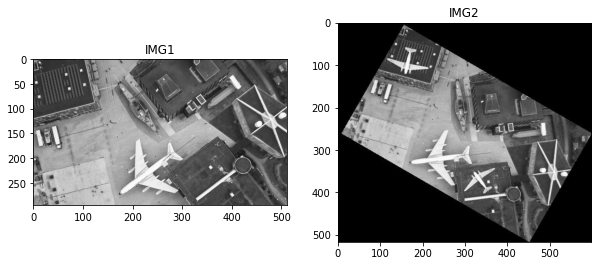

In [ ]:
# View images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax1.imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('IMG1')

ax2.imshow(img2, cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('IMG2')

plt.show()

## Occlusion Detection



We begin by writing a function for bilinear interpolation.

In [ ]:
def bilinear_interpolation(source_image, source_point):
    """
    Computes the intensity at `source_point` by bilinearly interpolating
    intensities in the immediate 2 X 2 neighborhood of the `source_point`.
    
    Args:
        source_image (np.array): The source image
        source_point (float, float): The source point
        
    Returns:
        uint8: Pixel intensity at source_point
    """
    i_s, j_s = source_point
    
    # Floor `i_s` to get `i`
    i = int(np.floor(i_s))
    
    # Similarly, compute `j`
    # <---
    j = int(np.floor(j_s))
    # --->
    
    # The co-ordinates of the top-left (`tl`) corner are simply (i, j)
    tl = i, j
    
    # Write down the co-ordinates of the remaining three corners
    # (top-right, bottom-left, bottom-right) below.
    # Use the variable names `tr`, `bl`, `br` respectively. 
    
    # <---
    tr = i, j + 1
    bl = i + 1, j
    br = i + 1, j + 1
    # --->
    
    # Next, we compute the distance of `source_point` from top-left corner along
    # vertical and horizontal directions separately.
    del_i, del_j = i_s - i, j_s - j
    
    # Create a variable called `pixel_intensity` and assign the
    # pixel value obtained by bilinearly interpolating pixel values
    # at tl, tr, bl, br.
    # Use `del_i`, `del_j` computed in the previous step to obtain
    # the weights for interpolation.
    # <---
    pixel_intensity = (1 - del_i) * (1 - del_j) * source_image[tl] + \
                      (1 - del_i) * del_j * source_image[tr] + \
                      del_i * (1 - del_j) * source_image[bl] + \
                      del_i * del_j * source_image[br]
    # --->
    
    return np.uint8(pixel_intensity)

Next, we use the above function to implement a function that performs
an arbitrary T-S transformation on a source image.

In [ ]:
def transform(source_image, transformation, target_size=None):
    """
    Transforms `source_image` as dictated by `transformation`. 
    
    Note that this function does T-S mapping. So, `transformation` is actually from Target to Source.
    
    Args:
    
        source_image (np.array): The source image
        transformation (np.array): 3 x 3 transformation matrix
        target_size (uint, uint): Size of the target_image
        
    Returns:
        np.array: Transformed image
    """
    source_rows, source_cols = image_size(source_image)
    
    # When no `target_size` is supplied, `target_image` will be the same size as `source_image`
    target_rows, target_cols = target_size if target_size else (source_rows, source_cols)
    target_image = np.zeros((target_rows, target_cols), dtype=np.uint8)
    
    # We iterate over each pixel in `target_image` and assign the appropriate intensity
    for i_t in range(target_rows):
        for j_t in range(target_cols):
            
            # Map each target point (`i_t`, `j_t`) through `transformation`
            # to obtain its corresponding source_point (`i_s`, `j_s`)
            # <---
            i_s, j_s, v = np.array([i_t, j_t, 1]) @ transformation.T
            i_s, j_s = i_s / v, j_s / v
            # --->
            
            # We ignore all target points whose source points lie outside the
            # source image. All these intensities remain 0.
            if 0 <= i_s < source_rows - 1 and 0 <= j_s < source_cols - 1:
                # Assign the intensity value of target_image at (i_t, j_t) using the
                # bilinear interpolation function above.
                
                # <---
                target_image[i_t, j_t] = bilinear_interpolation(source_image, (i_s, j_s))
                # --->
    
    return target_image

`IMG1.pgm`, `IMG2.pgm` are two aerial images of an airport parking bay. These images were
captured using two cameras placed at different locations and at different instants of time but over-
looking the same area. It is known that the images are related by an in-plane rotation and translation.
The following point correspondences are given:

| Correspondence | IMG1 (i, j) | IMG2 (i, j) |
|----------------|-------------|-------------|
| 1 | (29, 124) | (93, 248) |
| 2 | (157, 372) | (328, 399) |

Determine the changes in `IMG2.pgm` with respect to `IMG1.pgm`.

Finding the difference is a natural way to determine changes between two images. However, we must first ensure that the images we are subtracting were taking from the same position and orientation. 
Clearly, that is not the case here. We fix this by first finding the transformation from `IMG1` to `IMG2`. 
Next, we align `IMG2` to `IMG1` using this transformation (which acts as T-S mapping). Once aligned, we are free to subtract and look for any differences.

In [ ]:
def find_rt(points):
    """
    Computes the transformation (involving only rotation & translation) matrix
    given 2 pairs of corresponding points.
    
    Args:
        points (np.array): 2 x 2 x 2 np.array that holds the point correspondences.
                           Each slice holds points in one image. So, points[:, :, 0] has points
                           in IMG1, while points[:, :, 1] has points in IMG2
        
    Returns:
        np.array: Transformation matrix
    """
    
    A = np.zeros((4, 4), dtype=np.float)
    A[np.arange(4), [2, 3, 2, 3]] = 1
    A[0::2, 0:2] = points[0]
    A[1::2, 0:2] = np.flip(points[0], 1)
    A[0::2, 1] *= -1
    b = points[1].reshape(-1, order='C')
    x = np.linalg.solve(A, b)
    T = np.array([[x[0], -x[1], x[2]],
                  [x[1], x[0], x[3]],
                  [0, 0, 1]])
    return T

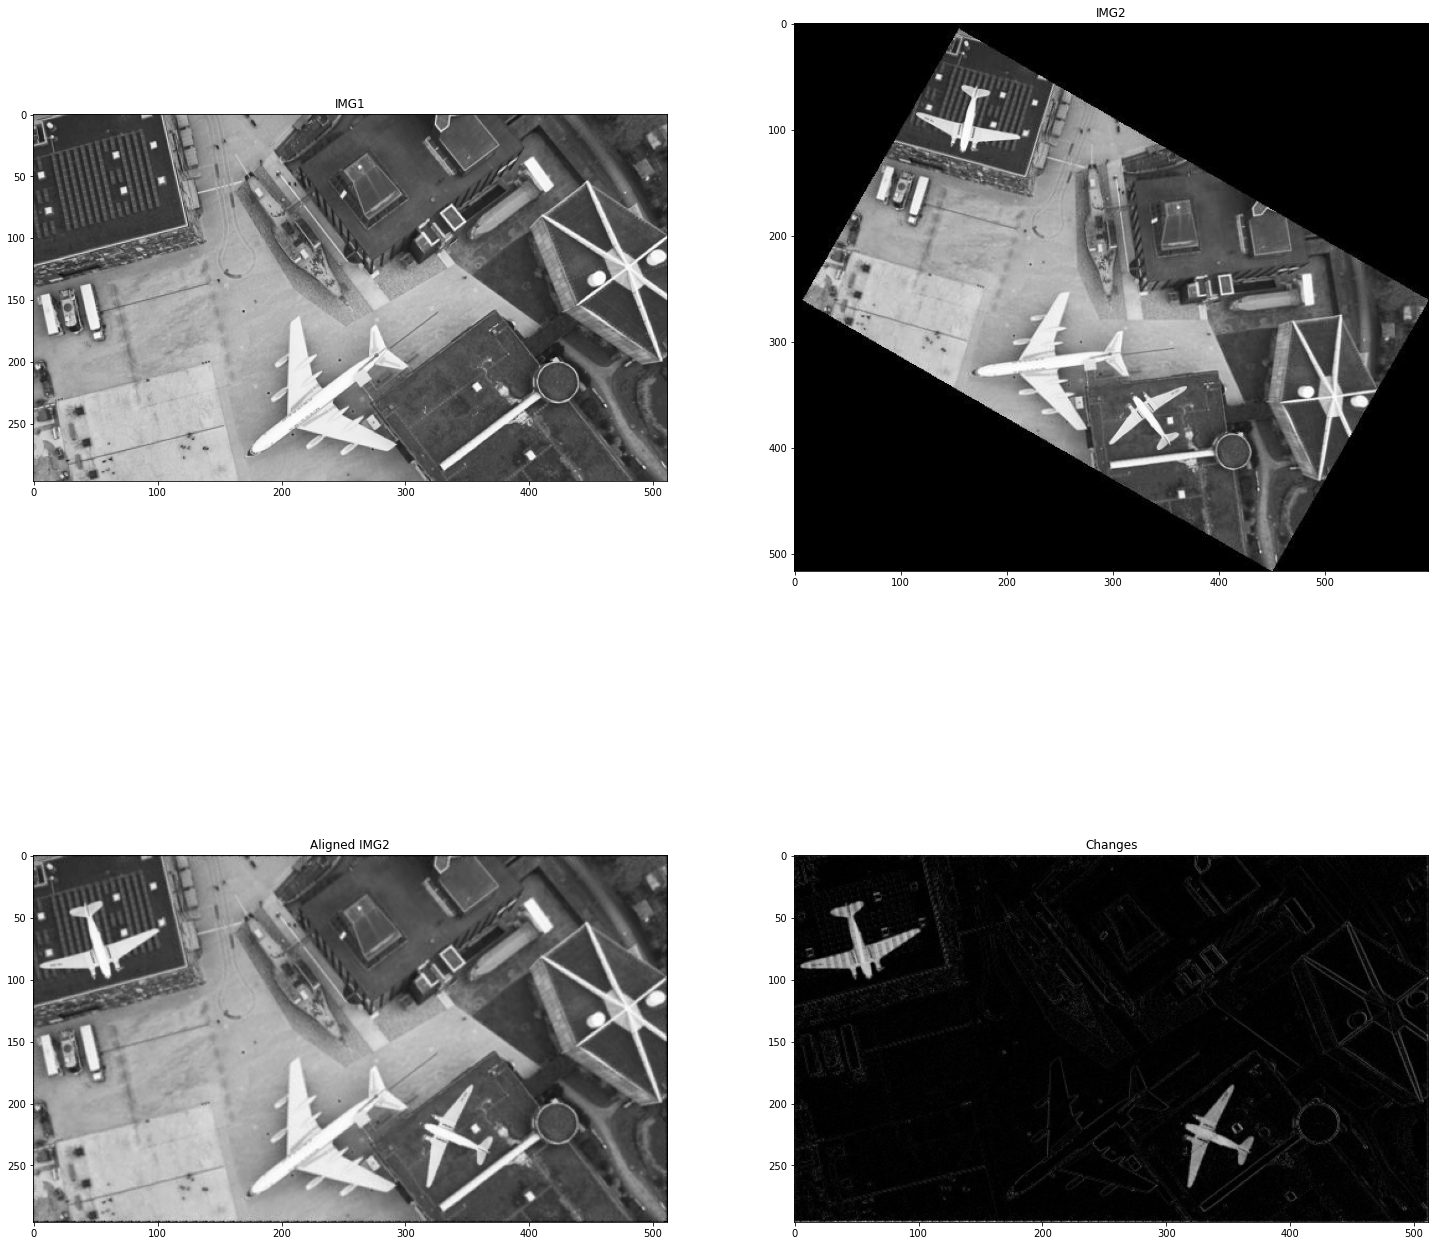

In [ ]:
# Create a variable called `correspondences` and fill
# it point correspondences given in the table above.
# Make sure that you fill it in the format expected
# by `find_rt` (read its documentation)
# <---
correspondences = np.array([
    [[29, 124],
     [157, 372]],
    [[93, 248],
     [328, 399]]
])
# --->
T = find_rt(correspondences)

img1 = imageio.imread(io.BytesIO(image_bytes1), format='PNG')
img2 = imageio.imread(io.BytesIO(image_bytes2), format='PNG')

# Align `img2` with `img1` using the `T` above and the `transform` function.
# Make sure that the aligned image is the same size as `img1`.
# <---
img2_aligned = transform(img2, T, img1.shape)
# --->

# Subtract the aligned img2 and img1 to notice any changes. 
# Name the difference as `diff_img`.
# <---
diff_img = np.abs(img2_aligned.astype(np.float) - img1.astype(np.float)).astype(np.uint8)
# --->

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 25))

ax1.imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('IMG1')

ax2.imshow(img2, cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('IMG2')

ax3.imshow(img2_aligned, cmap=plt.cm.gray, vmin=0, vmax=255)
ax3.set_title('Aligned IMG2')

ax4.imshow(diff_img, cmap=plt.cm.gray, vmin=0, vmax=255)
ax4.set_title('Changes')

plt.show()